<a href="https://colab.research.google.com/github/ANILESLAVATH12/customer-churn/blob/main/Predict_Customer_Churn_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
import pickle

# Load Dataset
df = pd.read_csv("/WA_Fn-UseC_-Telco-Customer-Churn.csv")  # Replace with your dataset

# Explore Data
print(df.head())
print(df.info())
print(df.describe())

# Handle Missing Values
df.fillna(df.mean(), inplace=True)

# Encode Categorical Variables
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])  # Example categorical column

# Data Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

# Feature Selection & Splitting Data
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Data (Optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

TypeError: Could not convert ['7590-VHVEG5575-GNVDE3668-QPYBK7795-CFOCW9237-HQITU9305-CDSKC1452-KIOVK6713-OKOMC7892-POOKP6388-TABGU9763-GRSKD7469-LKBCI8091-TTVAX0280-XJGEX5129-JLPIS3655-SNQYZ8191-XWSZG9959-WOFKT4190-MFLUW4183-MYFRB8779-QRDMV1680-VDCWW1066-JKSGK3638-WEABW6322-HRPFA6865-JZNKO6467-CHFZW8665-UTDHZ5248-YGIJN8773-HHUOZ3841-NFECX4929-XIHVW6827-IEAUQ7310-EGVHZ3413-BMNZE6234-RAAPL6047-YHPVI6572-ADKRS5380-WJKOV8168-UQWWF8865-TNMNX9489-DEDVP9867-JCZSP4671-VJLCL4080-IIARD3714-NTNFO5948-UJZLF7760-OYPDY7639-LIAYI2954-PIBKO8012-SOUDQ9420-LOJKX6575-SUVOI7495-OOKFY4667-QONEA1658-BYGOY8769-KKTPH5067-XJQFU3957-SQXML5954-BDFSG0434-CSFON1215-FIGMP0526-SXDJP0557-ASKVU5698-BQJOH5122-CYFXA8627-ZYGSZ3410-YOQBQ3170-NMYVV7410-OIEDU2273-QCKXA0731-EBJQB1891-QRQSA8028-PNXHQ5630-AHZIL2673-CXQEU6416-JNVRK5590-ZSKRV0191-ZHSKZ3887-PBQAO5919-TMRGD8108-UXRQN9191-MYQKX9919-YLNNG0318-ZOPWS4445-ZJNMU4808-YNLEU1862-QRWPE2796-NNUFI3016-KSVCP4767-HZZHQ2424-WVHPL7233-PAHHL6067-NGCEU9848-JQJTX8637-XJIVR9803-FTJCG0278-YXOOG3212-KXOCR4598-XLKNJ6380-ARCEH3679-XASPY7123-WQUHX5386-THSLQ3192-NQECA6180-YBIQI6728-DKUCO9750-BOOHV8597-CWYHH2848-YXSMW0486-HECZI4549-ZDQYY5712-AHQNN4846-WHAFZ5256-SKJGO3071-VBYPO9560-BBZXK5299-RULOA8402-OOOHJ9445-ZUEQE1091-SOZGA2928-HLDBA0404-SWRVG6497-TILVL7219-TLZHO4622-YNKIJ4412-YLTKF6734-PSBAW3930-ZGWVE2639-UGMAZ2876-GZYZC6207-WIOLX8587-XYZSF3091-FYHKI2372-HWUHI7799-LGRDP7850-VWJUU3774-VBNXY6217-KDYWC0390-DCFDQ3146-MSEGF4080-OGPJL1095-WGNGG2636-SJDOU1131-QQZEB5716-EZXZN6837-BJYDQ2135-RXIHG6440-DKQGE3466-BYAVD3780-YVMFA3874-EQOEP1679-JRFBR9073-ZZIAY3077-RSNTJ6551-GNYDG9167-APMXZ2749-CTKAJ6371-NZYEG7554-NEWDD8992-VONJD0867-MKZVY4482-EWFMI4648-YPBTM2907-ILJBN6345-FZOQH3376-BMGFE5997-OPVFA3445-HXXGF1159-WFSGR7654-YWJUF1875-QIVME6727-IOTLZ0691-JVSYA5918-VUKWP1744-JHKYS2656-FMOKZ2070-FNEXE5947-SGKCL3712-PKXZA6317-YPKDH6582-OIVSP9367-WXLCH5524-KHNJP1918-ZBFQJ1024-GUALD4827-USJHP8167-GJLRN0956-SYCWG8017-UVSZU7100-FQPRV2472-OVKUP2984-RGEYA9680-NIAUV2146-EGVDT2604-IJPDU9178-JHUVJ6168-YBYNP7255-SSFBC3645-DEYGF9323-HGFWY8544-GOQSH3363-DTIVD7018-WBJNK9142-KZXOP7674-YTAFD6348-SNFUS1285-OKIPP7825-ECJRF1347-KTTTA7841-TZDMQ4195-NZGTA7157-SMCFK4709-LKHYG2504-DSHIH0699-NDKJM9286-BHDQG0230-WEQUW2040-LDIWQ6496-JDSSB9408-SSNVZ4443-EMBNA6469-MRVET0742-MOABM5961-VUSRV6778-JFCMK6341-JVQGF2232-DMLXU4811-JBUVU0945-TSONX2651-ZCBXV3316-UWXUY8937-RDTHP7083-MIOPC1984-GPTEH1251-KRREG0621-JFHOL9903-LYSAB0094-OIFMO9227-UAQFT7301-ABVAD6614-FHDBO7576-ASEJU9058-HRZSV4522-AKYLR0221-WMXNQ0303-UNCIP9947-OTFQU0322-YINQP0959-WHOKV4075-JFPGR4629-NRXKX9514-JDSKI3282-ZISZV3675-YDUPJ4111-BNXIF7017-VFHAY6655-LHBYW4959-JOSRX5046-NUHWD7273-TEFQD3606-TWKGI7529-ZDFXI7605-BDWDC1950-KSVVJ0123-CRBRT6292-TOSSS3197-ARFOY6323-AYBRX7014-ZZXAW4385-GZQXV7633-MVPUY6366-ZGQGL4716-HHKQH5940-AHUHD6432-TWQLB4484-GLZOU3179-GBRWV8645-KWHJO4130-MZLCC0314-TKOSI8229-MYEJZ2080-SRCDE9577-WJVCQ9512-UIBFX6202-DYYFX3808-HFKDE5583-SXDAG3488-PGMQJ3580-REOAC7534-BFESC3727-OWVYD2294-SALNE4847-TAJYI1563-IWQEX8203-XJZRC6556-DBKZF6851-WEFYX2985-JUUBZ6390-DSAZX0895-LMRSF8098-LLAZX8266-VBFQL8181-YHCMF2240-HSJQD1248-DYXUB0265-EDXBD4115-BNPJY3167-SNQPL4091-TVOCN1098-TDVUQ7277-OZCGZ1557-EMYVT2799-ARNLO7563-BIUPC5027-YOCXN3973-SKMLN2321-OMBXY2840-XANRC6745-JEFZB5020-ZSTTY9880-TDQAC8705-WZCYL7102-JJVTX8626-PTQGE4983-CLMLV5701-YVSVF5804-LEPIM5697-GOMBF2739-CACDQ9385-EHGDO9498-FIMXL2379-GYFLQ0122-OAHPZ2868-SNELZ4322-RCYMT6680-NENYN2088-IEBAU7982-VCELR1343-EHPYB6035-BXTTY6885-PKOAM7520-HQWJU9639-BUJXT5924-SNGKP0021-IKXGC2034-GDRCN8966-SNIZF6243-OZGFH4654-DLAMQ0513-RBGPE5160-UXJED4115-NZRKS0219-YTZUE0623-IIHUG4572-DVCGN3351-NGXYI8984-EYLLL9057-MSWCO9833-TGFHX9294-TDIPC5229-DTFYB0104-PPXDV5176-LMJXE3583-KRKMD1010-DIAUQ9069-LGEUL7302-ZHMHP9571-EDEBV3520-FJGCV6563-VRERX0259-GBZSH6122-EFVKN2805-EDJPQ6862-CQUMB7156-MXBJE6158-HDPXZ9601-BRXPO2863-IMQDR5686-CMAWK5651-CRHKQ6905-NIQIN8204-YJCLA5167-ZFFMM6583-SZVGP4895-TMWIR0533-BNWKF1708-PBBOA8782-LKFPK5522-JBWMO3597-MVHJT9774-NRNAU0224-RLWWD9967-ATRFS3951-NJCVI2977-CEBSX0177-PXBAT6599-CEBNN2519-ERQOJ5876-QMYLD2277-AXSDC9442-JTWDL0979-PHULV3067-SVMTC5495-GPSRW7606-BPHHN4742-DRORA0111-KLBQG4800-VHZKI7989-CHGTL0334-GDDSO4163-NCJAK5233-AOZUF5973-EJGDP1996-DBMUS7916-VCCPB4686-GEFRM5249-QYHEX0578-SKVMF5564-NEMQO2233-FAGXV5605-IYGFG7663-ZTEGJ3935-TBRZZ8111-BKVDS2055-SIFSS2806-MLNTI8734-DKSTZ4360-PNRQB6152-ONASV9063-ZGTUY7781-HVGMK2181-UAESM2957-LOLHO6048-NJXHX2320-SLKMB4980-URKXC4376-KFVRS5886-VLQVU3577-AMVUX0771-WLCLA5628-RKIFK0206-TBWLC2937-FTHUR1910-FMXJM7752-XUSCI4110-PFEUZ0732-OCQOC5168-MSWXT1090-ESELR8592-PLTMQ5760-WRAHC8847-GEOOQ0256-LTHVJ4785-FCIFB8313-NDOIA5149-CUZUJ0942-KOWSM4237-CLSMM1452-VOQCH4719-UMSIY6614-VBEGU0880-TKATG3811-VBYBZ1480-BKXGA2996-XAUVF9076-AXYIK5968-XQIVE8896-RAZCR4640-UHDOS4933-IKULF3583-EKAPL1304-BCCFO4104-PVRPS9399-APLBT2359-KMGLI3780-DDGSE4431-EDMIQ0306-JAELE6227-HWPWX0486-LGCCH0447-BEMNG4612-SSVHJ5168-MQQCA5949-XIKAE7971-HLVXI9094-AZPHK3649-JPUGY4472-LVYGI8372-JUXUI3552-CTCYF6778-YSNIH0388-EOPEX5756-OZRIO6579-JPICP8205-OTCHB4134-BSXLX0505-SPOOW6235-VDHOM7783-YKGDV4374-YMUSQ4513-CXYIX3957-HHLMR7803-XOCCZ5736-YEJAX5609-CEBID8981-FJGLA7218-HKQFK4636-QRJKY1135-LMECX4332-MUOEZ8535-SFUTN5956-VKDTT8677-HDZEE2475-MROZF9412-GHEEC3482-ABPKK6705-LXORM0257-ZESQC7531-GQHME5174-ITUMV4109-CYRBD0913-XWSCN6825-UYPFK8397-MVTAZ0750-EBAIU8606-CIQUL3571-DPYUH7601-GNDYK0356-OBMAC8067-NIOYM1403-GYAFU4234-XTNEA1297-VQDRP9282-IZGQK5348-CAGXB0621-HJWXJ5844-QVTAT8905-IAZPF5394-MEITZ6859-QNXIQ2782-LFZVW2866-IKBTM1342-JPNKI2817-NTQDO7129-AZJDE6986-IJDHX2560-PPCHE4676-MQUEA8138-EALND3580-HYCSP1352-HNSAW2075-PUEPR1982-FEBTD5301-GAUUY5791-KAJFD2654-VBVPB1154-HYWWO2501-XWWTZ3716-UVSPD6815-ABQFQ7343-EOBEU3701-SFMUH6103-LIANB7319-VENRZ5846-NEQVZ6967-QIQRV5781-RFZRP0939-YAPAF0308-IVGOK7293-LSCDV7025-WCBNE5756-JYOJT4710-FDUIZ6030-REHUX9548-LIGTA5150-LJNSR8270-RKSAP6522-YRBXD2640-LYMOV1218-VKFPE3627-FHKBK2865-TCHJW1423-BMPBQ2393-DIVAI5192-EBGOV4568-KNYWR8752-IMQOS0742-LAFQK0795-LAFGP0619-OLYUR5512-IDZEI0459-SPZHJ0215-BQKGS9244-ZVAPM0719-SYFRB8208-EUMTE5172-MIGPM1710-RCXUS0374-FIUCA5839-SUYVZ5173-ZXXXL1096-ADRUX2001-MCUUW2731-GJRDG4723-BEGSG6516-NKQBO8672-OAUPW8207-DMRVL3419-SNJJD6543-CPZMK4765-OXPPD2804-ETQDK6689-VRRTK7138-GIRSH9396-ZSFLL6464-KEXXH7134-MJPDY5240-CAOYT4059-IIEBK4881-JVQOD0516-UXRMT4851-BQDNX5148-HKFIR1009-IRMNA3003-CMDUU5016-IBERQ6797-UCJHZ2469-DTSGX4554-YGZIH5099-BAILX9931-KGHOA1775-KWJKQ7665-VIGUD9411-TPQQV7207-RMRDB7954-MLBUN2077-DDHJK4913-EHYUI0195-IESCP9574-BOSMD4580-TMHJU0970-ETWGE4908-XAXAY8404-VLQFB1626-ERCMM0887-HJGAR2391-IPLOP5644-PDMZC3509-GWQGF9576-ANLXO2024-BASKD5845-BZZIB1140-UKVZG4160-AMJTL5183-SNMJQ8100-PNJMH7838-LAZFO4464-JCOLN2085-JVGAD5650-VDUDS8095-WANWK3030-ZKIWL9565-FLVCG8755-OGKNA2800-VEQXM7538-GWHML5533-RJFTJ3859-CVCET0214-JHPFW5642-MHDQT3088-FVYWK3276-HDUEG9092-GDZKO0823-HSCDJ3729-OWRVL2324-AALNO0822-GAVAP5760-IFJOZ2826-UWHIS1448-PWKYE7501-IWUNG4957-TREIR7251-LJBQN8040-MNRTF1536-HBSWP5313-FPXWG0067-DKWBL0946-FKYTX5076-YVXCM8262-COGGB6663-JOCQO9620-QJREV2276-YDAVZ2682-KEVRP2480-JZOSN0078-XZMHT5896-NPFWW9978-HYCIN8338-QIUNR1525-LNLOJ9450-TRJUU1766-GKNMI6942-LBFDP1456-TWCGB7133-VBDCG7596-ZYWBB8329-UTMVM3014-WJKSM3347-YJZZE1029-QFBEN7929-DMBCV9661-JALZV5433-KYGHE4312-KFRXN5575-TPIZQ0114-IGABW9944-AEXBM1853-ARAAQ6952-OMNWB4697-LUPSU8434-VGEQQ4952-YSOGZ1589-AGTLK5244-IRFIH6549-YMFAW4950-HKQTE6786-OBWQR2684-EIWEO2753-JMMCV6439-GTPCA6621-YOBKI1216-JWVUX7564-GHCVB1173-NOEYG7595-EHCDL6647-ZEDXT2521-NPUZR1307-TVUFB7503-MIOGA4381-MHQDC6923-JHPMP5138-WVKYJ4018-PPNDW1635-FJFCC2499-AJYUA6919-ELBGL3966-HRMZA6425-JWTDV8405-IGQFX8224-IVVPA9477-LGWQI1410-RSCMR3115-CZMZD0139-IVFJG6683-VLCTZ5730-DBDSI0030-FNXPP2189-WWOEW5684-FJVYR4013-GUXND1894-IGFSG7379-POKDZ1266-NZYUI7969-FFOWG4718-DHSMV5175-WLYXL7817-OMJNA8728-SKJLR3137-NYQQI7706-DZNKK0236-HFWSV3900-AQPHZ5842-POCOP2037-XJFUP8823-RLPWL9505-SQFSW7314-OXENN3758-CKOQL0322-CHQRU5676-CFLYY7521-AFHAB0285-INHLN4678-DVQEO5125-CNDSP0691-IFBQW4992-LTJNE2202-OUTMO0810-BDHAW0229-LFJAF7131-ZQZNK3442-ZHHCC5726-CVNYA9871-ELEYA4257-GAESD5173-WXOQV2040-OBMLJ6286-ZHAOK3807-XHCJH3009-JWMPU5671-RQRLP1450-GALXR8859-AXJZP3174-AKMAS3138-BKYAV9926-PJHDQ7382-DFJTU2798-NYLMZ4289-DTDKW1820-TQVEV2239-JALAW4853-RULSV8098-TDCBU3551-GAEGL4785-NKHCX3196-NVXLZ6275-YDUVO0036-IHMOT0115-TFERT4178-EGMON4220-TINQT5318-YKDPV7975-TZMLR0295-QVKPB4335-BSMJS2311-QYMUQ3643-AHCFP9146-JRIOX3104-OWCGK5337-IIWKZ9101-BWFSS9650-VBUOG3487-EARAT2672-TGEFF9231-ZJYAM4250-WAROZ8184-WMOFI6982-SSHFK6092-QZVPP4625-LAMOB0727-BMPLR0392-BZIUW1038-ZAGBI6549-NNDYT3027-ZTDHO0422-OHQHQ6916-HIJSE2316-ESMLS9778-OGKQZ7408-OFWXJ6007-TCTST2252-NKNSI8713-IGZSO7905-TVXTA7695-PKLCZ2382-BCKQJ8374-UULRV2207-NHRJK3224-DFQNQ5275-PMFUT4795-UXVCJ9777-IQHWP0947-MUGVO9944-HKVVB4124-MMETB3671-SHRSP0979-MOZQI2732-ISEZX3313-QKNKB0323-XWWTN1937-OTUKY1573-LGXBA1764-VUUMT5073-WXOYN4713-ZBURT3050-GBUSH0207-MDKNV7876-AEHIG7945-HLKEA9342-VNIMQ9851-KIELU3523-BRGUW3908-BLSYF3199-NPKCN5170-PTRKA4661-NJEUX2123-AGEEN1258-YMZNM0048-LUMLS7549-MYGPK5898-IGSLP3804-RVTGV6259-WJQLC9227-LUNBG7997-EASSD0730-KOAVE8975-SKGRX0678-RLHVP4315-MURBD2267-FPIMA1051-GEJLJ9734-YWGEX2719-BDAQO5285-MVEHD0379-DJQHR0781-LKXBR5543-QDCRY0297-RBCSG4694-PHWFW0835-JKADZ1907-UBQFC7508-SMHXL3865-YIOTT5993-BQHEA6024-RUGGH6513-EECDB3956-CJUST4079-WWQQQ6103-BOCOU5149-TGWDZ7471-WNSUF8942-DBMHZ4301-VVZKA9199-PWQVC4824-GUCBY5393-HJZSM7074-IEVOJ9625-QSTYE0862-PRCBS8812-ZRHFP5146-CBVOE0454-OKRCT5787-KXGIY4750-ZRXIU4198-VFOEA6630-UJZMY5709-LVOEQ6400-BWQKW2692-AQCPF0347-UBKUZ0835-DUUIQ0811-GSDTP7567-ECMCM6115-ZTBFQ6353-BRMMA6680-WKXRZ6231-WFGFH9904-EHEVJ7028-DVOIQ6169-PPETC4208-UFFGW8584-KMVXD8467-WYNSR0851-DFJKB5382-SOYZL9448-REEVD3261-CQXOL8388-FYNPZ4002-BQWPQ5651-YLPRD2826-DXLQO4378-BZYFP9489-UTFKA4849-PYRLQ9117-SHLZX9889-TMAHG4541-RMRLG7764-BDPEE3429-IFLEM3158-MOERK7294-TMAOP5002-GCQFH0556-FJEGU8919-FYFQZ0604-THJFP2834-JRTUA5875-YPQFJ5879-SESNB6646-QVXLR6461-PPAXN3318-ISQFQ1106-HRLKZ2483-XSSMZ8603-IJWDN8165-ZJRNM9369-XFEHK2604-XVDAM3717-OFRTN9046-JBFWA3280-NMUVX1206-EHBDD8361-LBRDI4883-KCPZJ9108-EQPNQ7277-KAMWT3842-IYKUE6641-XRPSU1374-DMZUI2545-LXYVJ3234-VKACU8357-EQXFO1989-PRJHP8120-JDCAM8917-FAEMR7047-YXDMZ2858-EIMXH9524-EGPJC6993-OHLXR8818-XYFCQ6419-ZTTLE0929-HYQEW6614-YOLAC7426-RHZGU4065-JJAVA4695-VADHF3863-IUBJR7649-SIJJF9361-YNQWJ3748-FVMZZ9391-TTOYH1452-XRSJV3422-WJOYD8242-SOQUO7460-ITWWP7147-AYBAA7868-TMWMZ4822-RVYBB6732-FZUGP8436-BJUMM4184-TJFAN8329-GWVPJ1352-VHKAJ4145-UQXUQ2632-TACXW8146-QQKZH1767-CJKBA6445-TNRXS4581-LNWUM4869-EPIUS9948-YPTDG1236-WFCDV1915-OAKWD7296-PIXQY4883-QICIH3354-OADJP3524-WQDSG0810-DHDBD4026-SKKHW2829-HYVZP8329-IBCTI1271-SJBGZ3845-JHAMY7013-PSXHK5669-SRAIP5981-ITEMU3486-NPGST6941-PMGEP1624-WOIWJ2074-GKOWZ0376-YMCJC6100-FJZDG4829-ZLJTK1730-VFMWO7143-BQIBA3800-LYTRK0634-SZPQA9646-NMHXE7030-NJVDP5536-RTPWK8883-GRDWQ6166-ILMNY3097-NNSPB7771-ZONAT0655-RBDUG2111-DWYHN4194-WHFCB4121-AGSIN4361-BKAXE9845-PEEKO0455-XFASS0301-KOBTQ1751-NCDLI4367-NUYAO9878-TNQGW9170-ARBTB4441-NIHPT8999-BOHSE7241-AJHFS7029-RPUAV4546-FOKWR9036-CSKBW5832-TRLPB8590-YFFQO8659-IOOPU1338-CECEE7439-DKZTW4646-QZXTF4607-CHPCA9742-XOKTS6921-OZMFH9578-FOMUK4712-UYOOI8824-RWFXJ7722-CVFXN8717-VCTXJ7363-QTBIW4159-NAAIX0971-QIFJK9397-TZSHA3391-JSQEW0343-QLUZP9763-PDTKK2176-LVPNX7627-JKIAZ3312-UUMZW1271-UODNO8461-EFQYM6900-RBKER6891-JPYFF1459-QNFQT1047-NNCBF3696-XRIEN4081-DYXAV0074-HDKDG8791-GFXLZ8111-SLLHI0927-LCSMG9330-DHBFL0098-BOWSO3452-ABWRL5859-HZYLF8257-RZAHR5293-WXJAK3156-QLHBO2208-NQBCT1779-PWPMG6621-NRZAK0831-JNISG0774-IFUVM3082-WQRVY9553-DLCLU1641-BYBTK2460-NGXBJ2446-ZKVAF0841-NULXI3522-CDKHF1430-SFQSA0411-EZJZE7851-WZEKY8844-TONUD8807-ARQET8992-CEUEN4320-QMLLA8777-PVYGU8292-ITGYJ6870-ZWMNX0621-CXBKL5268-DSMNQ5334-JLAXU4086-YQSNZ6242-MBHPK5868-CZJDR9359-UGBTK0135-NMXAP4782-OSFXZ6479-OAUSD7129-ACFOG4189-NAKJS5562-BETPV1282-IHQAC9127-FHJBZ6270-OMFIW1641-RQDAY0107-WESLM6994-ORCWG1346-UFHAX3992-YWPKO2933-XEUJM0125-LZQXK5461-QKNTN4835-YSJMR8399-YNDCH3164-YAXFY0887-WBJVH4660-IRIBM5673-FSSMF7670-ZBPOQ8089-UZWLX0080-OROZO3916-NRPAP6807-SIWJI8221-HVAYI1579-KLYDT5232-NXPAY8967-SZQAS4468-KAZHE0455-ENTCR8944-AILEF5542-NKVRU7126-RBHSD5370-IIVVL6789-HJBWG3927-NLNRY9087-EYCPR6791-YBNAK6358-LYNGM6077-BDPXA0013-MHZWF5494-HECPR8268-YDIXR9824-BEMCV1373-ORVIZ4291-SHSBH6980-IMXXE9866-QEVEE9897-KXHCM0040-HALCW0784-GTUUK7979-CORPM2294-DMMUS0872-JCPIB3055-MJDSB9091-WTUUY1618-CFHME3165-HDOEW6581-NQCBA7115-IRDHS8496-DMZUK2040-VZIKE9068-VPWQQ0178-SZBHO0384-RVBPI1689-MRZQR1299-AURJA4525-VZCZG1543-LLLFT5835-BEQEU2788-CJQAQ5565-FILXA0319-QZTCO2120-SMPEX0096-FCPUF0668-OGMHD5552-ZNFSJ2223-KAGMX6507-ZJSUR9408-HRXRK5593-SUAOO7321-PKUYW2833-SLKDQ6766-HFKLA7595-EUIVN7617-EYGLW2026-TGDHM9220-ZNKJI4030-VPZBD2226-ICFDO0723-VSOBE5529-GIBVH4187-CINZD9992-UJOEL4741-WWJQZ6625-UTXEW6818-WOBHJ6244-BESBM1004-NOZNR1251-STYSZ2612-PHGOX2408-TZMJL8480-PPONV8780-IHCRN4598-ZADCK1257-SXUXQ9681-KYGYB7182-OVLBJ5095-ETBRJ7005-CYUIL4821-WQOYN4730-AWNAU3452-FLHYD2388-LAESQ9531-NSBMR6260-ONULR4389-UEFCZ8711-LOBKY9134-CEQMF8985-OOPOS8800-ZKRFW2616-FLVQC9968-FFVVH3108-PCCGG7993-PYKOF8390-FESFV3022-BEXHZ5027-XWQHA6248-TKCQV6729-GDNGC6198-ZFIOJ5989-OMNJE4566-QVRRW1291-CUOCY9795-SHUHB3230-IUALN0042-RLHYP8519-IMDHU4945-RVMTE0201-OAMXR1866-NXPSP3372-KWFBM7831-QGOXH6393-WRYZE3941-XTSKM1661-CZBAU6599-RCLCJ9831-BPFRI5158-RIVOP9788-YTFGE9277-JOOMO1907-YLNYW1725-MIMXW8947-YRTDV3161-ONRWK0114-RSRRW4565-NLZBV0031-PVLZI7206-GZCDC6682-VCIXC4791-QRGMF6475-VHUIZ3910-MRQOY0661-WCQNQ7537-RBWEA4656-CAURT0121-SNYRK1768-ZAIFU4671-LXRDQ3733-LSYCE6265-FRMTQ1934-SJVJK3838-OZURD1371-DWPAZ9269-CQOOL2017-CCBLH7690-KPNCU0536-BGFMZ2293-IJWPS2845-HSJCY5469-NUJUR1184-PJVDB2625-TRCZQ4102-HLENU7266-GSSJX7722-VJRQD7073-QETQY9415-DPEWS5624-RYAMH0196-JTUQI7130-YXBRO9272-LSVYH7943-RQCHR3793-MMFUH3249-ZPQRG2568-BRGYX3084-DOWLE1084-MNSMJ7721-JXEAW7249-WBIYX4238-HFHSN6250-CGGUN5478-JJVZK7596-IIWYC6567-HOOPW9793-WECQC4291-HPAXL8999-YPYBV1839-FBNFR3164-AALRN3071-MVJCD1697-BCSHV0562-KBDVM1131-SUEKT3717-OEAUQ4538-WNTMJ3334-CTHOL4704-ERYFC9432-RUVSL8060-HIWJJ7684-XSZIY9089-UOWJG8621-MNIHH8039-ACLPL9885-AIBVB1934-MKPXS2592-YKDIF2272-JKMSI0471-LVHGK9518-RWHZL8714-CTZJW3569-EDBPQ3131-NWVFJ7521-YXVZY5419-CONWX6240-EURKS2373-NTKOD1970-KKFWL6960-HVYXR9337-SRRNI0895-UADGO5678-VFNEQ5977-CKHON7024-OHCCK2692-BUCFV7861-UVUFT1830-GGFNM5302-BDJNT5223-UZAVK4859-ZSRDZ5651-WYIPH9350-VLHMB3498-LZGQZ8785-CJSHH5357-TZHPP3870-SPZSI0680-DFNNY7560-QRBXH7077-XJMET8752-GHJFU6896-SRVYQ7767-UXAGJ4652-ODEVH6510-UPNKS6718-BDGHG9046-DQMTP6439-LAJXL1571-SAVHK9052-VKDUW9546-CQJSU1666-JZPZT5777-KJIRB0506-LVNGN7677-SJJJK2480-EJWYP3253-HKOKL7055-HNEOJ5514-YQENT3211-AAPKX8445-DNBAE2951-QOQTK2958-NHPPS6806-YDEUL1735-XMJVH6890-PFRQX0222-CNVPT5899-OUVKV8681-ICONS1621-YNCJH3473-XIIIT6362-QHAFM7893-IXHRQ3070-BDOQC2952-QAYZF6234-PFPXL9824-QCJPK4763-PGDPO4283-IVYCI1866-OBPNR8205-MQUGY8970-ANWXO9480-BQJEI5394-SVGJV6979-TNDEU9777-WJJPR9283-LZQOH7079-QRCBC9495-SKLKD6048-UWKAL5067-DGXLL5469-CTCWN9851-QXEEQ6281-FKEWS8898-KASCD9242-TKFSV9290-SHCMB0743-HNPFG2277-BKJKN9809-IMGCQ5208-HFSBT5035-PGZXH8695-WDYEA6543-JXSOO8016-ZMGMO8605-ITULD3254-YRILK6416-YJTTB2667-WYLWJ4472-VESGY3195-TQDZX3128-YOVTD0529-ONKER1728-CXQBE7041-TXQJH5014-GSOUQ5724-BIDBU0481-SUMCB1769-GRUIK5240-IJOQT8819-WFGGJ7427-AUFPY2811-POVEX1092-GANHU7898-PDWQE9972-EWRJS9314-IJWSQ0661-XEYAN5799-JRCZO1921-KYSAY6198-RTPMF2924-KHUVI1925-GMVBW7881-EVUAD6184-DYUOB9207-ZPANB5766-XQXMQ9327-QSDED1656-DRSMG3012-VFFMN2984-AFWNC0640-YJTPY8096-LOIST9764-REAFF3703-VAVCL7107-UBYKY4881-GQJTW8519-QJGJD7876-DNYAP7905-NJMXS2882-WDTBA2091-GPPIQ6326-MTTXK5071-FBJFS2796-UUZZO2429-AYKKO9798-OPFEM0330-IVZHA3794-NFNCH5193-QLVZB7114-AEOZE2886-KEFUM5522-NYKPB4237-RLAQD9957-YODKZ6518-KZXCB2245-ADZFJ7776-QGYJC9313-QOLTZ9651-GTSAQ3186-BAXNB4672-FOTSD0637-YLETY9818-XQCUV7338-ERIVA1157-BQCUW8259-NFJTV3223-DWFIO2660-EMUBI6968-GMKPR4751-ERMAN1436-ZMJAN3292-PBZEJ0799-DDIHE3070-FNFZQ2812-SFXMJ7675-OZCZG5014-WUQMG5312-TSZVC2003-CKLOR0993-OSGPT9254-RBFON1205-WNWPJ9391-EOYLI7108-DGVUU2782-JEEBU5127-BZENZ2720-FVBQP9906-NHHVC4522-XRWWI3766-EJLFL5939-SXWHM8152-UOBNY7351-KYHQH7643-RCHXS8246-SHFGA8387-MOJJT0620-XEFWH6485-QXWWE2761-OCIAX7321-VGNKU5327-CNLUQ7552-KEYGT5816-JMLGY3068-OMWZA2927-QRRQV6032-KRXXO7459-RRWQZ6265-SXWBU7941-RCJOW6374-NTQLP4154-AQUGT2387-KDZQY3584-WKTTW3399-BMLVW1971-DTCZB3092-IGHWF3374-PZLXD3813-DHBBB2812-REYAT6518-PPLMZ4939-KYYPY8017-LXHFA5930-GBIWP6022-KOUQO6352-TWCAU2361-UPSND6035-RIIOM2929-QNSRW1262-OPMFY9504-DSHWM5035-BVCXS6267-DCFFZ3533-UVMOM2439-LYPMQ4248-QPAVC1899-VXWXM1478-VPOAD9995-HOTOH2988-PLAHS1371-OJCEK4999-IEZLT8883-ANODQ4690-LLKUA2351-RRBUE5980-BDHPY1498-DQNRX9469-WEJBT3331-HQDTW9490-DFPMD2581-VKIRT5442-XSDCW7426-WEIJX2851-MMUTZ3049-NDXFL8580-AECUZ3307-TLCUD6625-FLENO2967-MXRAV7963-GQRMY8189-HBVRW4163-KIUHY1228-FZFRV3500-NSDOA1171-TYKUR3761-FLYZI2058-DCJBE5364-XYIRR4829-AUOAX1219-NNDDO8388-DMKAE4403-BWPAY9659-QEQSY5405-ZMYXQ5047-LHVLY1442-OKRJE4737-AQCPU9158-VCTQB2808-CHTDM6311-UEUME0793-TWELN3283-WCWXT1060-ENTOF0999-QXNSA5451-MHQOF4836-WNFNO9225-BZLNZ0354-VXMJC4422-QVIJA9365-SRSZE6839-ITVZJ8332-OSJDW4735-BJKOU0274-JKUJR5740-YHGTW8917-SZTTJ1696-MZVAU7359-WWYJV0375-HVGXO4906-ZHGPK8593-WHYHV3795-GWTRD1298-PHBTI6223-DHJGV6961-MJKBO6097-EQISJ4423-YLHDV8158-WPEZG0107-YHINA4918-FYJNT0727-BNRLG4854-CIDCF8640-SDGKB3280-MRDOF6435-SRWBJ9964-WBQDJ6303-KFWSL1702-CCFNJ8932-CZHRQ0386-CWRGM5515-RUGKN0404-AHASP7279-NMVJC2081-VEYEH6407-UTSLV4116-TZAQJ9060-HJJRW2587-YNLES7398-SKNQZ5935-FCCNB1958-RNRKS5136-RGMZO8345-MVDYC8226-BXGES3877-JRJIP8375-DKEBR9705-IOVQQ1015-OWJKI7511-YMXVQ2040-XBAVJ7551-JOHTI8887-IPQNC8646-JCOMS9804-ICWBG1222-KJNZD0106-GHRQR5318-IXUZF3768-VHXQO8952-WCVCD2418-TPEUN3963-RYFNS3198-VELRD8540-ZQGEA1320-REHCS4137-JOPHL9436-ZBZCT7801-CEDNV2057-BOYKM3658-QQJYD1803-BGNBD0134-XWXCE6950-TWMYB5848-FHRFC2243-FNMMI2511-MORQY5356-KZCKT9470-XCCEM6519-CFDBX3902-MIVLE0409-WTMPL8763-KIAFH3669-WHAFY3055-VTCGS3144-KMTWZ7279-BUYWN7156-MHUGY7198-GLXTC2007-QVGAW5207-PLSTK2307-FYNNL5605-XNWEN2155-AMQRX6181-AXXYF5091-HFAZW0516-VRYBW2519-LBNQL8623-ULFNQ8380-PEFPE5687-DKDTV1568-LJSZU7530-HDYDS7789-HKSBS7416-CKTEP2586-CWXVV3096-IZETN2348-KCJLT8401-EMUWF4193-IBKSW5377-NDTOU5922-ABDVO2474-LCNUE0839-QNXME3506-OVLKD9172-ANCRX6650-VJONK2178-PMGCJ7492-TAFJD2773-MADBQ6016-LVTJQ7860-KSUGX8966-KZXXA6910-HADCM4816-LXZYW9606-PBKBQ5149-QYTTU2070-XYMFH2085-BOJKI0817-HSUSE5442-PPTJY1927-QEWMY1663-MHLHE5663-QBGIS4450-MDZFX6701-DHKWQ7554-AKDQF3536-IQCTX4911-BANWH8496-EJAUI0794-YVSGE5423-BHIXO6908-VVYHM2959-EEXWB1839-UMACK3030-YDNRM7321-KKSDU3402-XRIUO3132-TVFDZ8286-AFUYI8080-DDEMJ8356-WUAOJ6365-MTGZX1349-WXNGG8058-DMYRU9350-ZXYJC6990-YNRIO8958-JPTRR6959-GQEGV3173-WSSUE1265-HVPZB4115-UMJFQ7369-TRPFD1098-KFQEC7190-XHTWJ0621-TWIEM3537-RYBHH2485-ITVKB3669-OYSJI1612-EOHDH6702-OHFWR5296-BFCYD4510-PYUSH9359-JANWS7517-SAWMO4143-HHPMK3279-DYZQM7054-LGEQW0523-VNGTF9575-IWCAZ7105-MXJLL7064-FRRSW7940-UQQUG0923-PNFUB3961-SXAXY7010-BRBUU3566-HJGPK3062-ICYZQ9938-PRCVK0973-KYVNF5129-HHMZC9637-CDTKZ3946-JEWRQ7873-CVMAW0463-WZZKO3494-JCHRQ6474-FVJLC4524-QCSSM5832-EXGTT8840-DQLGN2039-JONDJ7217-JYHOQ6695-FRVEC4547-LYTDD9894-QMIMJ8069-YQQAJ6770-XUAGN4193-ORFCL1636-NTNCO3466-WAESX9281-PKKZE3638-VBZTA7459-IMVYU7776-QWNFX6689-TCZHQ8563-OYMQY0754-EEBDC5777-ZPQNC1951-IEYXM3318-NMQXL3143-ILDAL1022-RKXDR2361-FJWNO2272-UOINI8232-UTFOZ3750-YHRYO6637-KYRCV5668-MEISB0129-QMPDR7188-CBBBA5356-CSVSQ3221-CJMSG4720-VSTSI3219-JQRSL2801-NISEI3946-MHCZW4623-ZKHLY6732-VAILE8201-AAXCB7696-CFTAT1845-CSBRZ2123-VSCOT6651-AZVTJ4566-GOLUK2484-DGXPZ2018-QKYGT2792-VPPET7409-JURKQ3247-MHJKM1964-SVLEA4587-NUKOX7297-DVYGA2239-CGBUZ0854-UYHZD7243-LCGGZ8267-KFGYD4890-VMUAV9261-WDCAF3764-MNMOI7442-YGZFK0420-BWTPW8229-BUJHX7449-HVPIV5504-WSIUR8183-ONMXC8466-PZBLH9614-RMGHA8735-IJJEG0564-MUUQK5054-IEXZT5834-ASPWA0701-RFGFI0019-EFAEP5619-PTMIK3737-XBQDD5882-CMAZQ5846-QFDFI4445-KWOKW3511-APPBJ7967-HYCDE2430-RRYUW3948-XHGNA3723-BFBGR0565-IYCGT5447-WZAFP5110-CHOPY5445-UTODQ4425-OWHWB7892-QVYKW9675-ICXCT1024-VRZHF4703-MQYKT9497-QCMMS5692-ICXLW0602-DDUML2208-MPXIO1960-UYCNN0348-SDKOL3190-FZATL7336-RLLRH4373-MAVJG8901-HJXTF7710-JSYOA5419-KLXBN3424-NMNBO9885-MFVSU4514-GFCFI0607-MVMGC3365-SAIGS9828-AOQLM8022-BECSI8000-REIQB9993-LHIEB0266-CLZKZ7615-ESMYF3858-VOBET7020-OZKXZ3977-QCRSL0017-DINOC1447-PJGGA8565-CLBZW9139-WQQDY0224-HJAPT8086-OVPWV9430-FRQOC7639-OPLNG3074-GQWYX1492-QGCLU6845-RGTYS7328-OWMOM4418-LZMSV5155-AZQPB8861-HGGKB1087-GRUYI7065-YUNRY7694-VLBWQ2546-KZAAT0181-RITDD5989-PGKJB4795-KTRTH8272-ONJLV1488-PBLJN0308-GIQJT3778-FOAQW4452-ROHMO6481-OGDOO3090-LETTY5349-AZPEW3753-TSEMP8305-VHZBZ9720-JJJOR8100-HZZLJ8775-ERLNB8309-IEYJD9172-JITSM6298-QDFNH7398-HPYZQ3546-GHEAE7361-YPXFS6557-BZXLQ2550-QHZGP7519-JTWQH2538-OIMXF8543-MSDMF9961-JBNMK1170-SASML4872-JCVCA5346-BZCHP2038-LLMLM6173-ITPWD9734-UYXQI1216-BGTSP4138-NAXED2189-UXTKY0744-BIKKF7483-IQWIB5248-KWLAR4958-GZWIY7996-MHXLW7833-PKIHD7061-OVMIM5153-RTHKF1852-QSWCD4832-VRBMR9079-LWTFD6356-ELRKD8624-GIOUT3392-EHMNK5986-WWXDV3061-BCKYI6179-GJPSO7901-TBKJX7228-PAQPD3177-LASXD7746-QYVCO5804-HYIEZ9919-FZDED5934-TSSAU3486-KHMLI4897-QSUYC1084-UQCHV8290-YWKHZ2955-BJZHG3806-DXQOM6784-XYJAE3933-DQPWX6661-EIPZC8957-THMOA2251-PYLPB5555-RNPGT1057-FOGLZ9300-RENDD0761-AETCS8087-LGYHQ4137-BTIKL2190-BCXEC6227-FBDXH2153-MREFK2911-WDXMV7206-PQBBZ3106-ULWFW0925-VYDLG4547-FZJWE7422-WNBTY0842-IWYCP3521-HTQTV3744-ZBHON3373-DIUUN8383-SGHJU7607-QKKTJ7707-PYBBH8984-HPEMB4349-GFQHK4139-DETXS9779-DPNEJ9805-FILKB5793-YOLJN0673-IGUQO4123-FCVCB8819-IMISP7802-EFKNY8311-UEUAB5858-EAFCZ8035-BUYVG1163-ONYEY9787-XVQIU8945-MUQUF5656-MJEFC6082-OQFBA8051-HJRLT8974-OVACP4010-YLMVT1379-FRVEB8612-GXIDD6288-CHQJB8160-HOWOX3023-GFLBR6648-INWPS4223-BKEOR4079-VTGLK1763-WQFUK1391-UBDAR8894-JVDCV2023-VQFDL1345-GKDZZ2014-MKGMH5628-FCGYG2560-WBWXF0248-IPDFW7978-DKUQH4335-UPJSI0524-IAVZO2737-YNGYW1784-EZDKJ9297-FVVDH8007-YYPWD7101-HRBLJ5159-YFPKQ6635-CPNUN4021-RQSNY5453-YBTWV5039-LZRQT2931-VUVJN9061-TIHDA8699-ASUFO6418-PIQSP8220-OCUFY3995-WFCSM1895-QTKDO2038-OEQZH1178-PZGAB7927-AUXBZ2626-VEEWG2878-RMWXY1657-DYMBM7311-MQJCH7375-WMVMT1136-XGEQU2530-FMFXO6844-DZKRF4695-WJZUE7619-ODSGN5970-GHJAW8879-XUAHX3689-MOZGR4195-PNGZS5003-XZWWO3988-RQIXO7622-FWGEW6922-NCEDI2514-GINMM9891-NQDBD6131-IUNXN8548-AWOFC9798-DRYDS8532-UEFWH6296-DDOOR7951-VRDVK5931-FLJJF4815-YOSUK2659-VXMWZ0380-NEAVX3207-OYBWH4285-GYRQC7216-EWTRS4365-MSDYN7036-TYDEC5802-ADBRC8076-FEZKJ5197-YPYBZ8337-MSSXB4312-GVYNH8495-LJDFO0839-JTCUD5494-WOZRZ1302-UHBDD2234-EOFPT8619-IJNDK8378-LKJAF8182-BJDSI2528-HFYZX1153-GNOLC3298-QEICA0788-DXBFY3597-YASZG3496-LFSZU5242-UOWHD2482-CZGBB6479-SZPLM8097-VBQTZ4500-HKANN9917-KWRBE3420-ZDBMA2212-LYASK1393-IMKZG8069-RHUXK3398-GCPMU2908-WGAXL3378-AJRAO1013-QCWAM0866-QLSIR6050-FFXES7181-BQYBV0362-RAOQO9554-DFKIC5527-ACHSO0829-DDVLK1399-UBQIU1813-JLKWR0336-PIKEI7322-OCWHC9537-VHDTA4957-TIALW2054-PJOCK9150-HEPMB9030-QGZNL6204-IEUXJ3126-WQMGH4529-CKBCL2506-CLAKW7176-WRTNX1583-IHQZE5732-IKGQH9239-GZHZE7205-BAIAD0151-ONTOV4140-MUHUG0093-EXYQL8064-RAVOH0219-QAERP0320-JDNQG7180-PISOG9168-INPSZ3571-RFHAR0015-UOCOJ5334-AFQJB2754-SDJRD9578-VRMNM1587-FKLZB6140-QNRQQ8963-JLGJT4307-KTUMW1465-LNTLJ5440-FLBQG2135-DQWAQ4056-QHXHZ7470-MCQTK7488-MXJIV7401-JIXNM9339-FIIJL2027-FECZV2672-DZUOY4706-DGAHW3870-MQAMG6670-MFRPK6177-PEVRA4800-CZMPC4813-HQMGZ7579-KKLOE7377-DMMRI8402-EIVQS4947-DSMXK7245-NIIWQ0002-ORFBO3324-OIRTO5414-OFQCB4967-WPNCF8552-OBVRU8499-BRXTD9154-QDGTH8197-BFWVU2577-GVSIL9367-OIUXP6770-UAYGJ6463-HHXJR7928-VJYAB1187-WILMM9776-OJUZI1306-RPWXZ8949-JTMAY2774-LVQUS3097-PYWXL2266-SJNAT0869-PAPRP4238-JSSWH2972-YDYUW1104-FEJAM2809-ILCYT5499-ECUTN4981-FLTMF9121-PHQSR3113-IWHLC3211-ILJTT4612-THJBS4277-BWBML4094-NSEDU0234-TEVTT4304-TSPVK1552-AAGRX2637-FKFSY9796-MVYXX7874-ECPQJ0020-INWCK7089-RKVSZ2683-JXWQQ9548-ZMVTX8739-XNIKG9755-JHNMN3981-QSVQI2789-HQBOU9424-CMPOG5067-WJEUN3450-WXOAT9251-WNSOD6974-DAFLI2616-UUTFK7064-JHXCE5103-MHMHY7989-AWGEH4373-VVHQL4559-UWIHT7268-IGMFD1846-XWOQN0235-KGSLC6650-BWFRT9570-KYEUA6993-YGFJV2712-SYWAY0730-BGQGF5498-IBWPI9101-NTIXF0013-SMEOE9314-QDMDW9308-ANMVE2884-GBPFB3757-NJYBX3413-DHLPB7649-PHJVR6114-TCFID3787-TRIAL2573-GYRUU5156-UMKOW1247-QBVSH6734-GMPVK9822-OAOVB6161-ERDGD1226-JZNKR7318-EIVKO3771-PZOBW5136-KCKGI8231-BSWXX6486-LHTMA4083-BFNYK3722-WPXTK7389-KBFIT7176-WIONM5141-ZUVBH1089-HDMKP7623-HKYRK0310-SUCIN5197-PYEPU2929-ERCFZ7548-SEPYI8835-VSDSE6619-RPLQZ3275-RHRNE3503-TYDAY6901-GOGZG1623-NLDOT7021-XSNYE9621-OUPYD9898-KZQDZ8982-NHAVY4307-KWMXE0141-YEAYS2450-ZKEED3694-DELSO3893-JRNFS9603-OAIHC1133-KXCGE5236-PERKL0142-GVYSN1049-FYSYG7854-FOKSF2519-FAKOD8406-LNMHF1821-BUCWY8263-JQAIK0023-UYUPN8314-DPQHL1465-WCZVT9481-SFCQY6360-SVNWV0567-GGCAC7089-IVVAZ8884-MRNSU2171-UDMFD9050-IKDZA2205-YMZZJ9802-CAQUT1254-IZEYF0187-WZNAB9492-TOKRI1475-VWVDO9221-OTIVJ1357-MVDOZ7602-MVRMB3325-FUYCG5908-QMGOE1197-BVMVG5406-KGRMX8481-YYXWG5968-HYJRZ5198-EFNBM7516-GMHUV7140-ADSMJ2230-XTUWL7706-YLMQA2585-KTFRE7994-UYIVZ2609-IAICY1740-CSDJP7717-BICXI6559-RAKOZ2636-OHFMN4716-MRVEN2143-LJULT1323-OOEPC3200-MNQTF6164-HXUGH5630-IXDXV0320-DWVTU9135-MGVPY1212-GLHMD7878-JGDKK1088-AUUZZ0397-GZBBC6614-YWYSC9588-OZDMQ7641-EUYET6476-EPYZR9921-ZVRHG1174-FGIFN6620-HVDUJ4701-MLJPN1032-MAELW7641-TQFHN1552-TKMXS9206-GVPEQ8622-ZLFKO1596-BBVTG6188-UXBBR2333-KWEWW5702-SKUOB1134-YWTYF6061-GWWAV0679-TDGAK6585-WCEWR9067-YGSCA9067-SQTNS8433-WXGNA1776-SPBWV8735-SDUFN9668-PUGNU9405-GPBBG1926-QUZNN3707-GNWHM7016-NVRIC5829-NVSQN9565-AXSMR8922-LIEGH8869-LIHMK8245-UMPYT5186-SAMNZ0447-RXSGD4927-WWOOZ5788-YPOEG5373-SFODM0661-KBKPA9081-WWXKP0784-ZQJZX3133-PZNSR5766-ZJYBB8931-GJJIQ4277-PVRAN0022-TCJCI0722-SVSFK3612-YVGSJ9825-YCXWZ5397-NSKQG8565-HBFNN2000-DHJUY0203-HHYIJ8670-ERCJH7758-UJWYS2050-ONYDQ7055-JCGNI0739-UUAJR4826-DXMUP0952-KMEEH7285-KLOTR0654-PQKDW7175-NTIXE7963-SHNDT9796-BPKIW0188-GWFLE8129-GMVGI2882-DDZPG3547-LQRIK9137-NOQKA5843-TTHGI1849-RJYIG8868-GAGIO4061-UKJWL5380-XPJNZ8263-QMNTJ8178-EYZUO3230-JCNZS0277-ORXQS5130-IEKQT3230-WYKIR7996-BPXHY3227-WLKLI0407-BDJKB2266-FUBDZ8237-ULIXL9600-UDOPK8216-AZUUZ9153-BTBVV4074-SJFFA3269-ATYWD5186-PEIZU1074-AMIOH4910-GMJOT0354-WYROK4361-FEBGN7748-UMTRK0380-ZCSBI7145-FEJWU6463-MVYRY3969-JQABI9624-EGDEQ1051-EQPZR5849-ASHZJ5780-INQIK7576-OYWBN4526-ZJJTM8384-FZBJK3750-RNQKR0962-CQPWQ3096-YXENJ1265-BCFEO5837-LXSDN5945-AZYHT8325-QRPZR6384-VMJHP2262-SLNVK7730-CLDSV1135-HIORI0164-APGRB6481-ESCNL1790-NESIO1550-EENBN5539-TMZLF4323-SADQS4446-BZKHU5202-IVJNU5976-JCJRH8198-RKSZG0137-OCGAB3351-NQLDI9297-EONCV7593-JNWRU4588-YBNIB1069-QJOEE3336-JORSO7799-DSEWS8766-PAFNE5315-CKEQK3130-ICDUP0820-FNRNX0880-FVFWF4611-ANLQC4213-HKBJO2792-LSHWX5028-GZLDO0014-BMAQU6861-XWTWQ9018-PCIOK4837-QUSFT6877-TJMBR9953-ZMKSM0907-HQNTS7665-NKLAV6769-DCQLI2433-KMEAS4391-LNRXK8250-ZNGGW2195-ZRVAX3550-SAHFP2011-TRQYE8562-GHPPI5893-PYOLZ4986-MXSFP6131-FOYAS3027-YNWZU5609-IMCGG4873-ILOLJ4727-MCYZG9481-WHGWY2725-KXXWT9565-DJPIB4328-VUFWD3301-LSLWQ7473-ZBDSN3166-PNEOF5639-NTUPK8780-YRMTT8348-HFYIV5140-FOMCQ6242-SGYTS8166-ORCHU8414-OOEEL8454-AATJP6849-WLEYG4659-NZRUF4531-AUZNK4191-XOVOM2150-OEGBV8429-XIBUM1855-CFULU4878-BUNFV1872-EBWSC2608-BHKFN7026-YMSBE7341-LXCAF6997-UVGOX9674-EHPPG9462-MJUAW8128-YVJRG5440-VHLUL5781-BKHOP4283-FUTGF5213-TWWJU1569-TTNYJ8628-MFKAX2397-BRLOM7629-WIXZF5445-GLVOT3976-HXHCE2466-NEJOJ0254-KCJGT5472-CVMDX6461-SZMCV8150-QUDFX9508-ILZDG2346-DJQTB1697-LYYYX1942-OQFRW4749-VFKVB9640-ZSLDC4231-LZUYM7598-UAASY7938-OUHIO8510-AWCXC6128-AQBMT3594-BDSOA0431-APWVY5133-VRSAB5996-DAOQL6838-YAUVY0484-JPBRU7883-ROJOC0244-LGNFY7274-CGTOD4295-YURET3426-NIYYL8225-BTJAU4635-EJYPD1866-ZSLJM4636-TVXVG4236-UJPWO9392-XBGTD3387-VATUS6402-SSEJG1143-NMNQJ1169-SAOCL1110-KYLGQ9929-PLVPA3518-PZXZQ2371-JUNGC7693-QPEFS0924-BJCRC5074-FBGHB2351-BKRZW4455-BFSPD0415-MOSGF1724-BQUHA3948-KXDUF2323-ARSVR0815-MFZGM4826-XTSOH5480-XTFFL8295-FHIVV2495-INZWQ9086-YJYXS1179-INLAT7909-FIOIY4139-SUGLD6857-VWJDT6351-SCJKT5468-BPMMO5624-BQSSA0197-PNKNK2439-QKJUL1194-SPVSP9534-NSXEM2408-WITXK8929-KSWIH2250-IVBWA1810-MVMAI9506-UXUSK1229-RCALF3572-UOLYZ1429-UYJSV5577-OTWWW6100-QQHEB6366-XIVKZ3470-OBUET2770-NSVDG9375-MHRRS2634-HCZGT7503-QQRVF4860-YZGZM6599-GZWCM2691-NZETQ4404-HIBDJ5533-NHFRF7037-MTYVW4760-THGOT7295-JOMMD4016-BJKTZ6584-VQMYT9838-BFCQT2790-XUYMV0581-MDMPW5013-SBUIH1023-BQXZE9163-GHAYE3904-UKFRE5353-WILCI0709-TVGUR0058-EVZWM6023-YEBUP7209-JCUDS7009-PCARS0519-DRGTI1017-FBQMM3001-CBHLQ1985-MBRYP6158-DWPZT9372-TXXPS3259-QMXUN1015-JPFYW6645-MXQJT4360-QRAVE8433-WPJTV5804-JMYIO3763-GCZHZ6484-LATFU7599-NTMDP0772-GYEQQ0536-ACXIP0936-NQLJU4831-EOBFE1575-KRZZE3251-YMVWZ4102-OQUPX9170-GYZJC4884-LEVMQ8857-CUPFQ7610-TVOPG3638-DIMPH1845-ZLLIG8559-WNQZS3999-QGRJH1699-UOTXU2454-RPBRZ0635-WKOLD5993-JSUWV4518-FZBSX5387-ASZNZ6988-CJEYV2002-MZHWP3097-FQTVJ5465-BUBFA7299-GNVPL9743-DQKQW1215-VFYVK9371-BITHB2265-CYWIV9093-FPDLG0541-FITGH6985-HAYWX7508-KBIMB6838-HVLXG2277-DJJDL1897-OKVMW5485-ITNPC0233-FTHAV4644-PIZRT8922-NPKBJ2740-TVLFN7771-CFQRQ9512-PHSMG6963-EZQEE2452-KDRRH2004-OCQXK5027-QPKTE4146-SVFUD1564-HJUVY3617-XLSGQ7517-LDMPS7244-KXYZN5226-NOZFC2672-HUYVI1400-WIVLL7508-MYBOG8148-NLEGT0148-DCDOS8347-GDTMP9992-RRAMN6746-WAUWT0310-MVLET0428-IKYCP4550-VBOFE2187-PKZAY4003-OCTMP6652-YFFJO7225-IILWY5248-RPYWW7923-IYJWY3170-GWYKC5696-QURRL7409-KIUTL9830-ECLEN1732-VHUBQ0495-RVCBF2668-TZSPS7854-EDSSA8869-TORSS7446-SFAOA9522-ZSINC8234-GSZYK6505-OZNPG6164-HAQTX0679-IDSTG7765-LWVVH1658-TJVOA0953-LGOVU2115-BFTIW4692-NNQRU7742-MYPGI0611-DFXKO7780-OTDSO9619-GSATL5622-UEJFI9747-DDZOS0674-DGMAQ6203-HBZPA0484-FFVBJ0301-FIDRB4139-JPIAM2181-TIDSV2761-XECQW1936-CZAKF9453-PATOS0564-JJHGS3348-CFRNX4402-FTBXC1428-GTBJJ2931-XIQBR0106-UGRDO5542-TBBWB1930-QPBVZ2606-PKWJB5322-ZSMZY8059-UDZFY7740-BTPUX5220-AGAAX0208-BPQEJ9435-JMLSX3352-ALMCK5312-IRCFR5294-IMHHT8802-UNOJF6313-GIDIT6176-YJWAS5310-NOOVA4526-EXKKN5311-IHLEI3987-KQDDU3404-JNXAX5131-PONJI2845-AFFTX3489-VSFRD3345-JHUEO5815-HGGHV5260-UMPWX2249-YPRNG7410-YTJIK4626-GYCZP5649-RXQTV2674-MIAHT2576-HXMPA7587-AOVVU5590-BYNII6898-MDLZW3237-AJGEH4707-YNOQA9357-UJRUN1591-NFNLQ8648-PFRMP7663-CUXZB0258-NOKBL1163-VIPRI2815-CPTUL9348-ROUAI9443-JUBUO0596-BQCEQ1481-ZUWZA3043-TYBNO4830-FAXFM5906-BFOZT2960-NKRSO8996-ZROXE5598-IKHQQ0397-ZXWQF5266-PFRQK4674-HGNUA6765-MBQNU9786-IJYDL1303-SRDOK3769-MHZNV6295-OSINB3308-MHOOC2309-OSFEU2207-QPJED4177-JPDFU2239-CFOUJ8046-DNVTL2209-XADXF6620-JDYNW1891-FZYSA4770-UEZOX1038-RQOST7613-LLQFO4568-TTZRT9513-DXHDA2640-PMGFL3801-HMYNL0516-QREYC9685-WKZGT6022-UGGSO8084-OIVBS8896-BQTTI3865-QBWSJ3352-RICWQ2160-GPFXD2065-MMKGR5857-TYBCJ1498-NHTLT4484-CGXFK1402-PTHGN4176-RELJR6214-EDAKZ5199-FPUSP6377-KSLXC1796-JANOW0238-WHBIQ8735-NBLWT6651-RLGGM6127-ISGTU1614-JBEBI8740-XLHDR1208-DNHLN1761-AEZZR3923-CSIHK5696-EXCYS5795-KTGUD7120-RFMVS7924-GJZFI4702-HDRKD8512-WIWYV5897-ZYEKH5456-ITGIC7317-GGVPB1406-PUQVY1322-AGOQM3677-IYRBF5692-FPTAH9114-AAFQH8715-KKTFG1550-LOAHA1728-BQDMA0268-QKIWO0876-WDUUZ5117-ZSMHQ5151-HQRDG0960-HUWBM6465-GSRCL0617-FHSGK0263-FJTQO7319-ZNRTR2858-MOFSQ7503-EPSZW7089-XXAYG8118-LSUEL8070-AAWZP1666-JXLKU7855-DIWPO5133-POWUA5652-MSDEY7005-CCBKV1810-BOHSY1784-BXEFA7351-MHQVU9224-VTYID9500-IWPXQ5762-TJXGK4504-YOULA5569-IDSEY4250-FDVOU7284-ZZLOH5277-ZLOOR2141-RRYGO1777-JYQPJ6376-GAHQE3401-URHDA1599-EAHXY8631-XVRZL5052-PNLOS3853-LYGAM6979-ZNSFF5751-USDBL5680-LQOGP2386-LAHRK8189-DUKMV6032-IGALN9931-DCEZH1898-JSNDC0315-LVCRK3911-RSNHI2410-CIYFZ4248-HCETZ5505-OVWQW7271-AJDTL1867-TJHTS0516-WJVXC9174-FKWZE6860-YRJZP4429-WYGFR2817-LVCPP5038-ETMLM5056-FIMPT4521-WFJAI6569-KTMDU8809-RIHDD8809-XKHMD0396-YCHWO0867-LDTTC4822-NGOCH9391-DXGGG9844-FELAJ2122-SZZZD5307-DZCVC3148-AOIQT8679-JOEVF8395-ETZKQ6692-YQHXC3889-VWBID5222-JCXZT9754-CLVZW1432-FPAXX2739-CCZMB7080-TNUWP0496-AHOOK8336-TAVKX2468-SJFLM3181-VTHOE7168-HDQHG4803-AXVYP3884-HCSWG4567-AKPIA5077-DXTCG1142-WACZW7901-HXJVA5649-ANRML4892-VLANZ5924-IFQTT7968-QUXNS2919-HBCJO4236-XPXAV8903-WMRNW2452-SNHFZ3629-WEAAM6029-CSMJE7993-NQLJE9909-DFRJA9099-FTUHS0581-BXBUB4962-CHQPW9467-ROOLM3030-YZADT7410-KTVFV5150-ITWWB2253-KPMNB1345-ZUKID6429-SHBCB9281-OFDMF2603-HVKCG1834-WULEG9097-ZUBYC5148-ORICT4893-GYUJU4578-PHJYZ7272-QDCKA8908-SLFCJ8393-DLHGA9766-HGEDE6968-MHOMU7395-IGJOS5044-XDPYX1814-WFGVS2834-SPCJV3721-WKIIL6734-CKRSM1265-ZFOSD6568-POCUI7890-VYYWG5197-LQXXH9907-SWKKF3457-PQBYH7682-AZNDK0587-DMGBH5384-ZTTWP3745-HRPHI7636-OWBPG1231-YNDEK1407-DIGZV6397-JNZZG0570-BFQHT4393-OBCRR3523-QRQLL8564-LDKFL3696-DFHHB0895-DQHEW4717-GHADL5501-TVMGM5879-HMFFH6772-WFQRD3810-DVDQQ6972-SNKKW3694-GLTJM8550-XSXUQ8149-RSOUN9055-MOJJJ4359-INNWN0585-EGDDA4032-RMHCI0549-CYCQN3481-JHUZH7250-EQKIY3594-IVHJZ6869-FGJJC3896-ZVNET8205-VSLRB5960-MVTUK6817-WTYHE3082-VQXNH4013-UBXWQ4931-TRZWN0750-EKNGL7669-LCRSD3567-PQTSO5519-NPHVG8043-PNYSD9938-EKRGF2703-AMTUL0928-JMXNP8173-RXAYP4825-XJGDM5402-HTOTQ6734-JDTTV7850-THJMU3890-RTCMS8849-GYOKR3148-BLQJT3717-FDJFU3665-JATSN7966-YOTQW0461-CVKMU8806-EAGWC8853-TZDGH7779-LGOVN4324-BZCKL6924-TDGMT9710-ZUSHQ1536-YHDOE8123-QBNAZ3629-ZNKXA4827-LTQRJ7711-YIJWC5482-VXSXJ7365-BVCJH9620-ENEJV4183-WCSEP2378-YIZKA5498-TXHLF0689-DSXGL6818-DJXAA9722-UJOJR0464-WJTKO8902-ZEOVF6778-EICRF2662-NNTDK4132-KALRO3902-FOIGH6772-KSATR7112-OPOTK2874-YXVVA1245-HARPS4210-QFJMF4323-ELYYB4293-ETKAP6064-PUPMC6504-VBLFL6322-PJJDJ0330-BGYZE1085-LDWAM7586-ZATGZ7197-VOJMM3318-OSATS5828-AVIPD1843-TLSGD9626-VFRGG7075-BNDVQ9143-CANJF7284-BUYEC2041-JIJCI1086-LXKFY4900-MSOMT2229-VWQJH9194-GFVOI1336-EZFZY4282-MSACW1403-LKLIK2636-ALXXZ7774-OJSXI7786-WBJYI0136-IFMYD5144-TVGLP9643-AVVWI0253-ZTEOB2706-QZIHY6061-PQHMK9885-CSMWE6137-MFAJN9122-UMROB4232-JGKIY2402-TAIRZ9659-ZTWSM9139-TWBAS6685-GBWJZ5016-ETTFF3866-MDTUB2195-VVRJF3913-RDSJZ8058-JMEQO4203-QGNZA5043-TRZWM0697-ZMSWS7657-DYEPJ9494-BDNNC1640-PLFMP5366-OBVMR8276-MQBYC7644-OMVMY7593-XFKDI4573-JKNAE0337-CNPZE9817-APLHW8380-MQINP0840-DFEZH1513-XNPPH8690-ZVLCL6015-VVHHE1125-SNVCK0384-LPITE4616-EWBNJ6347-DCUIK1335-HQMKX2545-EBUPK6923-AQONU2172-EJXVF0897-FEGMU7663-RGWBC1120-BMWUB9124-LHCJQ4536-PLEQY7029-IJEJK8871-JLMHM2235-ZGKPT3891-PUQOD5447-VYTKW3623-FQBOX0689-NKYLF8659-HDIYE3658-KIBGF3474-BAFSJ5519-YLDGW3865-ZFZIB1855-AGAWH7109-CQYUZ1370-GGAWX4680-KUTAJ5307-UVGNB4946-EDSEW2883-ILGWO2516-VQRRV7580-UGXNC3642-BYHDO9629-NHXFW2696-RZVZW5766-FTRTS0396-HUJBP5178-LMXOP8879-ZKJOF6285-FTQBF8185-UPYBR4585-HETAI7526-BEZQB1474-JUWSM3530-CRZSB8498-XXGWA9617-INGJY0621-TSSMU7234-KMNRQ7636-PEPNS4683-WYDOU9052-DHNKM6794-HKIAJ5578-NKCXI1642-HMARX3096-WPXBT8434-PNQZX5950-AAAGJ4299-OPXEJ4951-UKAAQ9618-LFJRU6693-DJWTY0744-GKNGE6447-EGDIV1167-OYZJF2108-YKQTY4806-DXQCE4918-QLLIW7056-IMHCC4854-SSLTN5294-DMSFH4837-PZTIC1625-JAIIY0603-OLQDC3272-VUHPV4176-FXYBO1063-DHQJF8663-UPDGF6719-FGEDO1837-YQUCE2947-DOMLJ4112-LUEIZ0369-ZGOVK4510-HIMLV9919-KNPOO8749-JMNKX7872-BAAZR9391-LMANN2430-USGXP8174-TBVCF1698-XFZCI1877-HKBQX4450-DLLMH0428-AXXLJ2746-DIJLO5955-ERIHD0917-EZOLA3508-VLHCZ4086-ATNFV0468-YRPXN5996-NRVXR3739-YBWAB7047-FWEYA2000-MPKCA9762-YAQAA5949-EBSQK5473-KHBPS0100-DUVFC5397-TUPSH8950-MTZNV0326-VDYXE6773-LQTVT7274-RTAPZ0436-TWFFZ8566-YPRGL0311-UNPFF6609-MXJHJ2669-OIDSD8400-WZICQ3834-XUIFC9576-SYUHJ0410-IPFTY2831-EBWRN9430-NKQLY8414-MYSHR0247-SLUJI9402-ORRAH6483-OATDN1293-HHSHJ4840-ORQXB7599-FKVXZ3982-DQLUS8610-ZIKJJ3756-VNWDH7801-KICAO7673-LPRNY8229-TNIQA6060-QBMGV7339-POGZN2828-SLQPF4465-VDKIQ2921-XWDJH6221-AVQYL2558-BUOZZ9257-AZMTZ0003-MKNFE0975-UYDTX7743-EXURX4682-BLBUC0975-VOOVL5968-VXZLG5569-KGJHX4988-IQIGL5201-FRKKS9799-CAYJJ7730-IUTDZ0426-TIRNE5443-SCMKX8295-KMENE6738-ISCBM9821-BESNZ3678-MNGZX1335-NTIUC2916-BQZLN4558-CGYCZ2368-GAKKQ8710-YGLWG3199-XGZCY3785-KTYSH6814-ZPWFQ4063-EIKNQ6993-YCOBK5206-HPJKM7587-RZNME0748-RDGGM8393-JMVMB5019-GQVCR6036-TTFYU2550-AEVRU0969-RGKCU0378-CJKPV4706-AXVKM5889-JTMUL9026-RNUJS3746-EUBYR2332-EFBJY2880-FPNAE1703-MGIAB4311-QTTAI9474-PHLYD4318-RAJVY2165-VOEGB3612-YUNGG2254-DLXRI5062-CJJKH9028-LIHRP2219-MVUSO1053-MXTTK1530-ZTDOZ1301-LOPVR0853-TWRVK8914-RBTSB6212-ATMLK8200-LGKSR1568-BEKZM0670-ANMUU6897-RWMUB0963-ZBDRN7594-RQHXR6999-CHVCF6134-KWTBV1077-HUUJM6331-EWIEB0895-LNKRC2045-BMBTJ8417-GSODA5171-EPLKN4452-QIIEB5998-VVEJY1624-NALOJ6741-EGCBI7820-ZYGNY4317-VTEOA9677-AVKED1670-SVOWZ2227-JRSJX9847-HNVGP6696-YDAYZ8980-WQFWL1730-ZMAME6506-EYCNH4634-JLRJT9501-UKKNL2560-QTSBS7541-YLXCL4795-WRNVT6080-TCMYC0260-ZDLGK7860-UXCRM6357-JJPQT2292-XQWSV9552-TGUZV5913-INRQV8722-NGNBH6210-KBBPI9643-YBLUR8734-FNWVH9447-YPTBX0133-BMFZO6128-CZOMY9540-JYROE9026-LHEVG2260-USTRB3656-TKRVZ7011-CVEUC6185-TASNN7925-PNRGI8623-TMRBY1552-CZCLL3038-PQIUY1501-SGHBW9313-CDOGY8148-BPLZQ2623-DRYAM9987-LUTYD3208-YPIOE4488-KQFDT2612-RANWT5693-PIPCS0491-KAPQG1925-LFCZZ8039-EQPIM6900-PXRMS8707-RMEZH3346-BRMIS3209-ZPKFI6479-VDGRK9373-WSLOY2933-FILNV3569-JFODW9819-FBNSV9544-PYPSJ1591-XWLGB0396-UKGAI3243-ZHOHY5186-EJEGL7527-QNRUS9986-BONCE2722-JMONI2203-GHNWN3878-AVSOQ3258-SYSWS5296-PSYVW6319-QSUSR4083-EUGRJ7579-OOPEC0512-FLFDW1771-OADNZ0487-CRLZF2107-FBPTK9451-WLYRI8219-VYBVI1991-VOPLL9738-QLWTP1016-DJTSV9419-IPPBE0174-QRVVY5699-BNCAS2900-PHPLN0612-RTZZA8106-GWQOK8751-EDEKA6878-GGDWG4039-PIMHX8450-LUGUK3604-WLABM0795-GMVQO2259-OUUSZ1142-IHLOO6410-LEFEN4633-MKHYU6257-RJOHI1545-JFUML3194-ORPIK7826-VVKWT1353-GHZOS2587-EKXTS5442-BXVND8816-VXNZD9378-FXTIZ1723-HKXJQ7825-GKXMW9753-OYLBX2364-UFROM6656-JWRQX6473-ULUHT1240-KNSEZ0836-SEYLU4433-JCGCG3716-BDVDB7688-AWMDX2842-BCQGE7244-QWYHG5899-MQZZL6849-OYAMU5312-UXESG9488-HGMJH6038-GCYEC2150-WLKUW7159-FVYPK7032-LMBHI1150-WFARN6088-BXMRG3144-AUDBS4821-SJHJV7346-MEDWM1137-DGOWI5616-PRTNT3812-LRZIR4818-QIUFN9483-GCPWE4227-OJHAL9220-CXRSC4993-JCRGJ9537-JALFH6698-OXETB2103-ZRXFN3724-BSCVH4877-TSOFF9209-NWPGU6961-VCPMC7306-YDSOI5288-AHOUP6688-UZPWD0655-YDGFJ8468-EHYJA6823-SIDFQ1097-FSPVW2839-RFSQE8328-SKJNO7010-ZMVBF5201-CBWYG0968-GSIKN1965-DDBWU9057-SIHCH6352-GIGGQ3635-QQRQD6771-XWBDM2897-DOVND3082-YVEKW0191-EQUUH7134-HBPBS3489-HHPFY2926-JEJJC8601-QACRS4950-BDEUX5789-LDFXO0508-OOLTO2984-TBYKU9822-WMWVG2391-SOORI9040-KZVWO2645-QTLMB4806-HIPDW1548-ARAGG6339-RZCBJ4424-TKOPW4415-WNGVR2522-AHJXR0412-UCCNP1816-FLZDK7096-UCLNH8443-ZRDBZ9136-ALYBR4615-PIVVU8885-QSQBX7479-NITWS8617-ENBDS9385-NXKDA0430-IHCDJ2959-MJHIC6674-KVJHG1814-DKOLC4201-JMNGR9351-HXDMR3537-HPKQT2129-ALKBS5821-MMEIL5960-WPXQM0684-AOSIH8260-NGFNY1309-XGFSN1866-RZZQS6968-URWQU4742-TXUEX9631-XEYKE8631-NBHFZ1335-MXCSE8873-TMKGR8800-JOOCF1469-LBJQJ4958-XCBDQ8337-UPOAQ0064-YIJGF2386-OWURY1725-IQNIY0310-VQXAM6598-RFFVI3453-RTHJQ6712-OAWRH6278-FEPBZ4280-DLSHD1508-DFXCU8614-VGMMV7868-BGSZA2800-QQUSO2930-UOTMB7973-DZRKH5914-DVBWJ7698-YFGEZ2533-QVMSK9773-PEQBZ8644-XLFBW0650-BWOZN8625-AZYZY7785-RDVIG9602-WCXPI2903-YYTBW3620-MWJNE8573-JGCZW6837-HAEVO6701-YVNQG9306-CPCBC4304-XUMGI9504-YAZWB8819-ZBYNA6174-NRBTZ9481-IEBZY1833-VGRUM6137-NICCO9065-ZCPQX6402-EJMWF3620-EHIMZ3213-VVOLG6870-ECSHE8747-UDCOI8374-XGEJJ2656-TABEH6946-LMSQS4626-OZDTJ9169-BSVIN2325-ZUSFD8194-PEEBY6872-HXFNF3932-CMDTD7714-YXSMB8387-UGUSU1080-BWSYE4039-HEUNW1194-HVAIF0812-WUPTB3594-UVONA0004-TLHLJ1767-TGTKO8439-LTUGF8805-JNRAZ5089-IFSDP6418-HNFED0206-OYVOC7291-CDTMJ7128-GGCNO0237-YFUTL7691-KGKGP6710-HSJRD3675-EQOZA0840-DCNZE1732-FEKLD9862-KJTYK0479-HMSWA5854-KSRBJ0365-BZUWY4817-VYYWS5701-SVCWR3129-AAQOU4922-CVPDX1396-QWFBJ1357-BIJKI1099-BTKWT5299-SJCZT2018-PZKMU7340-KEFQE4570-QHXHL2403-BCASL7392-YYPYJ2898-LSJGD2223-GDSHL7359-PTSXY9470-RTWDV2176-OSJUV9348-YVOMK8104-OSKWT4521-YEEHE4090-KPJIP3786-WOVKF4503-BDXBD6086-ESGRL2592-HODOV3886-CERTZ7995-ZHHNZ3824-RHKVR5816-SCGFC5989-AXPUC4979-HPRFL8590-OHDIW8015-IHCGW2332-TODQS9278-VZKCD8008-OTEZX2773-OVBPK5999-LCXAO5206-XZZQI4803-LBYPN5759-RCVCB6372-RFVNS2139-FQHLM8261-GWDBQ1093-YSWCA8938-UMKPI0991-BRRFB3882-IYOIJ8749-TZYEC1755-FZQEC3115-JPJDD5600-KTXFM3871-IKPYH6319-IEJWJ9025-AOMKI6339-TBELP7964-YESJC6173-GOLSU5275-SQEIZ7716-YTYHG9938-ZREHM7950-XWOVN4390-KYULV4647-MUZON9702-AIUJO8849-PRIQJ8851-RAGOV1304-NECVQ5396-IZEPB1729-VLAZJ8285-ABVLB0701-TJSEF5712-VBOXD6629-LADHQ8945-GRKHX1559-DTODC4797-MIWUM6959-UWKHF8720-RQSBJ4537-CIBHB3815-SLMEF5154-VEKBL4324-AHJKS4355-CVPVS4495-LHSSK5655-JSMZM5915-ANOEI9861-PDSZP4505-EXZHB7225-CBZPL6704-UTUKK4587-VVTOX2019-HDCZY4652-NNHNY8788-DOXSU7404-JLKQG7421-ZLUPA8972-HJWNV3274-NSDWE2632-IVXVF3692-JHONH8915-NNTRC5914-GXMDA7463-IFMQU2920-RNCEZ2541-YGPKE8515-OCTJS5382-TEMLV3441-CGZJH9592-ERDKV2860-RANUS5261-QSHQM4778-IZARL0432-CAJZV7008-LZVOZ8868-WOZGU1200-TUZHR9365-CSLBQ1334-FJSVR5884-FBCTL7130-CTCUS6242-FEGFD7625-XCQRH6194-HBGQN7634-WSWDB6986-IXNDM1731-TVIUK2987-BJXIK9769-TSBZE0406-BPDVR0618-XWMSS1395-WSWXR6023-GSSXW6752-APNJL5276-KQWHG0420-HLGXF7446-KQISO9823-EALYC0582-AVCLN5803-NQJZO2565-JSLRY2607-DHDAK1073-XXCZD0743-HRVFF4006-HKYHO3727-JEZTU8143-ETQTI6689-KXGBO9667-TKTVZ3657-COGMW8570-KLJYJ7754-IXRMC9473-CBZOP2969-WGHQO6615-NGGZJ4334-HOWRP4255-DDUOU5863-OOKCL1686-STUHN1329-VHWNP2984-MIIZL0266-GMEAO5590-YRFJT5574-NXZIU0019-GFNTW4256-ZWTZI8309-PPCED4098-NAUKP5196-WPYOW4608-LCIMN1485-YDHMM4054-CUMIA0603-TPMIB2525-GVKQU8161-QYMTT9581-GVBXT5862-BRIXZ5404-GGUKR3308-JSGML2126-GSEGL3677-TNKIO0440-QEXBZ2434-EEVDB6762-QVYJO6199-IWKGC2675-DHUTR8152-VETUR9667-EQRXU7446-YPODE9522-BNTHX4676-WLUHT3329-WDIOK7980-MHFLQ2873-ZLIWT3415-TAILE0757-WCUUZ1629-DQQVB1915-IOFGU3045-XETSH0374-AACSZ7239-HZZCX4872-VXRIL9140-CZQZZ3423-HHXAO9938-TKDGL0531-ZZJWQ6537-QLGEX2688-BHGOG7683-CBDKJ0946-CLJTI3160-TYXLT1325-USMEC0916-QOFDP0628-CNQRM5606-AMZBO6199-IPCAO7665-TOALD0112-QWPNC0324-BRPCJ2777-PHDEI5640-CAXOA2235-EZAIK3847-BAERP1196-AMORA4282-YMKNA1453-RZFON8263-OKETD0670-KDOMA2476-YGEFM8687-BAFGU0641-EVBOJ0829-XXPLX9974-JFBHQ5356-RHIPP6624-JDRDS0608-JDVEC9780-FKVVF1919-RTPQD5214-NLTIT3345-PBBFH5055-BRMNE9189-JWSHV2190-PHBHR2650-GYRYL0746-JTRFU5208-FVQKB7184-LRUUR6627-CFOSN3982-JGSFD1574-DYCWE7247-XOZPB2466-FCCPT6211-WWLTF4826-TZEVA6016-NXBNJ9138-EFSMO0576-WNXXC4632-XJMEX8910-LEDAG3452-GWUIN2716-GFZOR3724-UCSHY8626-XHBIE4628-CTTLA3192-LNKRK4439-YRNVD2876-VBBBL6834-NXDCA2208-UGTGR3005-TYFRD8670-MEFCP3079-BCHLN7777-UNYHB5597-GLBUC7278-CKDNC2748-MYRVK8450-UYIBU2969-VAPYH4822-YCXMX7181-OQCUT8474-UMLNT9821-POOTN3836-FZSDJ9142-XMYJH6559-ILWKJ0187-QSXOE7733-UDMTP2649-HWLYB5214-CHIWJ4229-CZMLL6904-JLBGY2465-BLLEU1685-VAYJF8874-EJNSR6917-YACBP5049-MUBWG4223-WOZCM0769-MURVM9253-VIFJQ7030-FZTFM9741-YLNTD5917-RYRMG5120-ZBLAI1194-BHJYC3663-MITLP0906-QVPMS9025-ZRPVR1905-OEILC7858-GTZSP3285-UCQVC6248-BSHKG4685-TFLLS3470-BTGQO1209-VFFOC8224-DWCKX5482-PLVPE4553-DVPZG4902-OHLSK6917-IAYHD0495-ZBNGW8620-RJPZN7572-KPVKK2642-MAWLJ2357-COQEK7103-ZGVNT3737-GCSPV2027-WKXMW7137-NAXML2428-ZMCTB2961-VNFKL1768-HNVGJ6963-KQYQB5934-RMPOV1207-BLKSA4088-YLDSU8316-BBQAY1166-PQLGG3146-JTQHR4291-YZODP4395-PZMSN6427-FEFIG0017-IUDMW8706-HRADD9955-QOPOY4385-ZKVNW5446-DKWYW2034-CGRHZ5797-APWZC3683-QKIUE4228-ZGYUW9031-ZVQPT2990-IAJSV8107-KNCIM9027-YFHQJ5176-LDKUH4644-OBGFZ7926-IJOOU6480-YAGIY4029-HPFVY7602-DBTOU5345-BMKWB3519-ZKXGG5457-COLHT6416-TVAIH5451-YHYPW5108-ADXWO7998-WNZEM3066-RRJIO4664-NJCMS0307-BCOPK7629-WFGLW2542-HYGIQ6715-OFDBP5016-LIPDW6481-LXPWL1567-DSCIC2150-UWTFY6124-ACRHJ9362-MWODR9975-GPKZU9625-RZFUK5153-LXKDT5161-UBZXI1020-JPQOW7919-ZODZZ0565-JUPYD6867-ACCZI5939-XAIXZ9054-FOWNV2683-BPJSO2157-MXBJS8207-VVMYB9732-EQMWY9360-AHGNL1087-UDSIH5269-NRGDP6195-MELTI5485-WUYWF2121-JAFOM8818-DOPVL2632-UCGVD5445-PZWGX1227-UDMZR5198-HQAEN9170-CCKOU2167-FQSTQ2819-GWENI1043-YCUTE3814-MLAXC3572-UUHRS2692-PFYTJ1226-UDFZR5955-EPOAZ6821-JPCDC8815-LMFLX9135-HSWOC8582-KRHPJ5811-IWXYM7044-YAACC8189-XRIKE1506-YJTYT4123-DVHPH6425-YQLLO5442-UTCVD2228-BZDEE7734-DBOAI2789-CZANW2091-RFFBA2114-MGINA7596-LDUXP3740-RLMVT4489-SNOJF2192-OZITF5651-CPDND2186-QZEYA1131-ALZWV7729-XBTWX9134-WYRVP3284-SVCRO9732-OUYRN0559-CKHUS2931-SVLTV6899-PPEEA7504-UWHNB2582-FFFZR8908-NMQTX2187-LZGPL1431-AIDJQ6288-LBEAR4597-NUCQV9019-QVLZD8413-YNHNV5808-TOTXO4369-NYSCF6333-YDVLT5324-KTGCG5599-HVLTW7394-LWLYN3707-LRWZD6873-UDNLD2700-LUEVA1455-ESIQH0958-YHXGP1101-SSWAG2979-SXESE4013-TLDHQ5743-KHMNA4194-FJARJ5325-UWTWJ3969-GYXEL9208-OLGAQ3244-CQPHU2674-MLXMN9708-HPXWZ6992-TKNYO4468-YDOVK3754-DXMRT5792-JALQC7130-VTEWQ2200-DSAAL4302-ZYFEL9351-LZYGF4366-CTOUZ6121-VZNQB7903-CMPEY1518-OMDIK6671-NGWON0595-ITUDF6996-KNSML1955-IBMMB0096-BXERS3806-YAZOV7998-ZLXWN6253-WRFHY9133-AYJZG2675-OTVVJ8680-CGLTP8430-TWCBX5018-GWURO6741-QRLUP4737-HOBAX0537-QYZZN3340-QBBFM1704-NRWYE2592-SEIFQ8200-KLNYW3372-CDXFJ4781-ZXYGU7632-YUTXB2718-YSKCS9896-UYMIE0853-NWIFK8212-CRQXP6980-CDGFC7691-XVTZH2520-SGTTA7481-ATQQS2277-VWCNI1088-CNNKB8642-GVWRF1930-BZLHI3400-ESFUW5868-YTYKS3525-DVKFN1482-OXZSY0377-JBKKT5778-BVOFB3373-YZZYM2057-ZBLPD0228-MAUWC5502-RLUYV0023-HGHWL7663-YJHSN4915-BFSXL3086-RUCRN5215-LNLDJ7576-JMYWV9039-RBEEE0257-KXZGU1307-ATKGB8417-FMLZI3714-XPXBW1850-AKQEP2824-DXNKN5227-JSCFE0848-ZGQIJ3621-CHYVB8042-RNLKO1792-UXAFY5372-FBKBN0420-TXVSG6217-TOWGS0515-YPMCW0378-XSZPU1045-LTCYT1544-JJMYL4636-JGAAI6874-SGLHU5951-AOFIH4729-XKASR3059-NGMXB8652-YHIYU5278-PNYOX5449-FIBXJ3486-HOOGQ5061-PBXFW8630-FJLIB3891-NLXJB4749-OJKQU0577-WHMEV5453-AXEPF3639-XJHKQ3716-LRGXK2263-SFSQZ9950-MTGYX3397-AVTKU4825-FUREZ9837-BMCLM2672-OJQZP0137-UDEUO3134-DSHVC6161-UUUTA7821-DPRQE6543-XRMYR2001-EWBQU4925-LMHOK1608-GMEWB6695-AMZUF1455-UGQVH8410-BGQXN8280-MQRQN1619-YWUBB7611-YKYTC2037-SGXHH3178-FESZO0365-GXEZS0082-OQIQY6087-MVHJH4603-JANFB3018-TFTSU3606-SBKRY4806-KEXQR0667-NSRGI7083-YNSKY6893-ODYYE8242-JSVBO2479-BRAMR9541-ZPSEA2665-NPTGL1139-WUOAH4693-VWVBO7434-SHXLS6937-GCDGQ0988-JRWWP5075-JSDKI7908-QCBCA8644-XYTSV6711-FLDFB3873-WOSBC7465-ZZRVX7975-JMZNT7251-XFOIL4116-IQRFR3714-JTVOV8259-DZLIZ0442-ZXKVS7853-WNZSY3120-FAZKD8606-OEGQZ0225-ZORZP4702-IOQDC9489-JMTTN0575-CUQOV0967-BMLBD6178-KFNHS2830-LEWOA5006-MXVRN1264-BYWMS9658-WYUFB8327-WKMIE6917-FIJHC5329-KRDTM7797-EJMDP3530-VWVGU2013-SGDXK6368-NWMCE3633-CDBUW0707-HOVVN8580-QVLOC3956-MGXOG9274-UARKJ4077-HWUYD2012-NWRPA8808-ELEHO0103-CSITQ3506-LCJDC8671-KKKOS7305-ZWMAJ9518-XXBXE3934-HXCFZ6578-KRMAW4860-IJUDE7666-WKRON9688-YGXVR0423-UDIJQ1945-XISKS4910-AQFFX2154-KVJFF5360-LJCNJ2607-FBDFF9647-ERGBE3428-XZMAZ1100-DDVRV0378-TOVMS4355-HBJHH6728-WYQBC9058-CBREO9029-FEGVJ7216-KAOID0318-QUUOB6145-NNPNO5520-FVEWJ5339-TJFEK5572-ZDXHY2074-GUHPQ4625-XMOYM5827-MWCZK1385-TQOZW5914-XRFQB4329-YPDDQ4804-NCPET3750-CKVKH5944-UGLLK8063-GBATB7787-BNTZM2252-ISRNH9415-TPKRV5322-TEUJK4547-KQRTM4877-EVATK1866-DIOQZ8375-KVTHK2697-NQBPF3709-OIJEA7639-SUPCW1386-ZIKUV0599-XNYDO6377-WHAOX6855-VLGOS8999-XXGNS8746-OQQRW3181-MIZBN0471-ARVMX7766-CLTIC5650-YLIBA0825-CPPQH9084-OAYKL6122-LJADA2400-XIWIO7524-VRLPL1069-XAIEM7569-NMZYQ5201-USSQZ2105-PHWON1494-EJZDW4884-TVUQF8003-EWNDZ1897-RCFUM9256-JTBNZ4658-HCOHW2211-RMNHO2432-TFSMK3440-JPSCL4929-ROART1834-ABKHQ1741-WTPON3932-IJWDZ1240-HCBOH3594-KADLU8065-BVEPF3796-ENZGF1734-ZMNTZ2853-CWQFQ0813-TAXXS2519-TWKFS2889-FPWRM0626-QXNGV6723-CEGQI6987-XQSJT4732-RRJZC9499-XPZXM4338-EYCER3007-FDPEA6350-XFYGW4290-BSXUX8513-OLYGY0311-QYWSS8705-DWKTI8755-IWJHN0325-XBFAC4480-QQRHC0929-PECLO3680-CTHUH1202-KKGFU6112-KTHFQ1852-XEMDW2462-XIIJB4760-XOHVN1820-DJFPH9426-SXNHE9068-FHQHD1269-FOYWN9470-YFUYI7817-BOQPW7402-EYFXX1853-UDXBW9895-VFOXH5458-CQJTA1230-QAJDW5701-ZIKJE5219-YIPTK5032-MIYKT7396-VJUZB9717-QEBGU5172-RKOCB6509-TSGWN3540-RZJYU3178-CIFOT2091-MJTFX4530-NDRKU5985-TBABQ9800-ONTFE6743-HHQPF8455-HIRAQ6616-AALSR0883-EIBTI9415-ZNBSX4018-KJYUY0722-TROQR7571-YXDAD3884-UEBXB8780-RSYYU5537-UXXVS1791-PQHBB8701-DGLVH8741-LQOBK3393-FMZPV8082-GHXOP6402-ZFPPI0980-FEXWF7486-KSRVI3011-WQKSZ8443-WVPSS3006-XIMLN8218-FFJDS1986-PHGZF9965-YOKZB0504-HHAPI9360-OMDZZ6305-YLBMM0345-XMMUG8024-XNAFQ3647-GMGDH2988-GBIVW2832-SCUCO7036-ZZKBD3791-LGQCY0265-PSUAE0463-TXOAK0594-UFTUL9509-MPYOD9128-CPXKI0129-KPTWJ8166-ZZTFS5855-EIBDE5365-LLFYV5956-YHHRX6008-NAIXK2956-GGUCQ1928-BXYIV5760-FXFVO6595-COKXZ0961-ZWLVI5181-OABFK4007-NHVHI7816-VGHTO5871-DGTXZ7550-WIQVA7544-ZVIKX0016-QLJIS7508-DQAKK5176-OLSKT9356-AXGMP3556-BVQGL0362-ZBZWJ8979-CAMGB4211-MMAZN7581-EBBOU4274-OWWYO5073-RZGBK1541-ETJZO2192-CKRLV3154-HMWUU6119-SPUDB6522-OIQSX7813-ZGGAW8748-HFWBO1052-QJIBV1319-YLZJG4106-HADHQ0723-FDLAY3050-RLLXC9298-WGMRW2369-UAPKZ3088-LHEFH2778-OCLGR6583-KQJLK8544-JNBOX6681-ZSEXG6139-ZZRBQ6116-RFVHN0637-KVDLV8884-FEEWR3125-RAHBV6633-MPWBS0373-AIVNJ8785-EPNCG1682-VCOIO5729-KLZAR2072-ZVJJX8849-AYPTR9518-IMLHK1582-RAFML3646-ITDGM8740-CRYFY3569-VLDHH8224-KDLKN7594-LZNWR4001-TSBTV2962-XPMCQ8727-XDPUD1043-UXOVO1064-FBXNK3996-ZNWYK2878-DHMIN7762-ONLJY1678-FYZOW5795-BKOYE8627-EHGIP7402-PWYJJ5480-TBGPH0018-NYROU7501-VTYLJ7608-RGIRO0480-BIXDE5895-QSXOD9814-AOUDH6175-IRFIT8760-ZRHKE1622-HSHSF8854-CCVSQ6749-UTDVX5542-DHSXL9102-OXKFY0511-JTEOY5216-WASFJ7808-DVWEP7067-KSAZT2284-VFLKH0366-NQSHS6532-YLWSI3807-BPOMJ3892-NXAZG4948-WBBKL4182-BGSIQ9300-AGZNL0988-AADSA9972-NKTFD3717-LNXKW5734-EJKXG2207-RYYRL6729-FZWSY9695-IDRZR8144-DGHXP7814-LEEVE1112-CUNAO5175-AOBHI5174-RNGBH8631-WUXGY7270-BDIOA9565-JSNFM5906-DVAPM6654-QGBZZ8348-JLBUG0607-DAAHE5641-DMBFJ9200-NLNPD2664-XJZNO9732-KPKBW3339-EAQNV0921-OHLVP3389-YGYAI9560-ARGQJ8350-NYMVI1600-DILPE0536-ESJEP4654-GGUII6478-HRRCZ8510-BBWMU6857-TKDJV2360-RDGRO0584-BJQGZ5134-IKDAY1360-XFJMR3070-DVEYC5730-RIITO9058-MJLZC5707-ORNDZ0902-XKXPN5177-RVZNU0056-EPFBG8993-IZEUX8696-JKZNU5380-AFSSK8190-ZTQFB0931-MHTEM2055-PDADH7515-LODFU0440-UEDAI1337-BOZWO0868-VJRDR8714-EUHJO6344-SFJVH3950-VPYJB8041-TMEID7321-ZNSLA6941-KXRRV3721-CNEYS8727-JQFHV9475-NNDGC1355-KUSBG3688-FTHLT0899-LIIBW2568-OIADY1384-RCUXW5825-XJOCM6848-YLDFR8125-QPFJD2320-YKQBO1193-RTSLK2302-ANTDP5923-GXUOC4973-RLZVI7869-ZYDST4501-UYKBC1215-EXRMO2305-MRGLV8404-VIOMB5233-GEEAX2359-KLTEK5304-EFJLP2673-ZALNP9184-GALIL4393-RYCRE9746-MDMBK3162-ZJZFU8404-GFGCZ8875-AKBYH4432-ADRLB0533-UCAAU1394-SUIUH3521-MNKLV2533-TIBIX8993-PHFWD1565-RHDJD7137-RYLPP3765-JXVKY5092-STPKP7330-WZLNC0114-PEGZZ3359-DSRKA8639-NHQEI7161-DFHUF3957-LXOLK3720-DBRWL6635-MYYYZ8565-WUXZU5281-BUZGT4994-OBRSZ0562-FGDCR2436-QBZFP3420-YJLQT6040-CGACY6582-PLFUU8242-PDSGJ0264-CNITK0089-IIQKO7839-NUIAA6075-QMNRR5378-IKEEG5966-EMAZU0440-EKDCF4774-HHGGS2718-GAXQD2055-BFOCC8180-AKMJV4298-OYIFC5566-SOEZD9842-EFSYY2272-WUSPA4584-LBNMK3898-GUYTS0930-EHUZA6413-XKKPU9975-SKRNR3703-KBKZP1449-XQEMT2626-URJFX4973-MGTON3682-YEUWS1223-UNPKS2612-RRIDN4735-ASGMA3446-QDSZF3669-LVWZB6892-EZDTG5117-IFGPS7379-FNIUJ1627-AFWVJ9725-SCPZG5884-GCYMI3217-FZDMN4486-EFAEB0060-FUALY7853-GVUDZ7480-QNVZJ6954-OOYZZ7088-FBAWU8313-AFGBW3943-KDREE9239-ZBZZV3097-IDVPU4398-HSCJH2197-OMWGI2303-PJYHN9795-VOWON1237-WIYYZ1987-AUELQ7852-LECYP4430-UZIPO4822-LPTYJ8165-CBKXO6527-PZFPV4855-SNKMY9593-CVZKR8595-SIZNC8008-HAWED7124-UGSUR1862-SKORY5236-XMZJY4827-DPADN2694-CIUMO5846-ABOBJ1439-LCGVL0909-SDHNU4647-XXZAM1502-XFCVR7740-KKCXF5360-XGYAZ9692-TUSXH7912-SYRQT3557-HTYWR4816-JBHOV8920-NAVAY1699-TLDLZ5600-PDUJF8292-TYSPY0567-XRHCU1867-BDVFH2067-QYTCF2359-QWQUL9103-TCIHJ7407-SUJIZ9150-KPBJQ0052-DCKON3654-ARMGP9699-UBQFS9367-TCUYN1261-FWTTE3528-HFRIQ0708-SJDIS4140-WJAWW2073-QBVBI6928-ONTRW3320-VEOYC5231-FIQPA6617-WLBQC2599-CIPQE6653-CBBOM8774-GSBUN7326-RIGQZ1401-FTHFQ3247-ZVOUO0254-FNMCI1848-LBZHY6101-IMRMM8118-TJAFG5429-LWCMV7298-IZWLY9758-MFWGD3955-JBZZM1268-ASBGA8943-URTMR4815-TUMEQ4713-LZDRV9909-IDLEK4092-OFQZS1561-BWHIN4325-NFSKC9927-DSWDF9500-LTVBP7252-NTGSS8149-AIQCG1360-JYXKQ2955-PSXOE7762-URZQH0899-WZRSD3255-GRXMG4828-FAZPK6094-ZIVKX6925-BAYGL3262-EIDHV7354-OIJLX1376-HHBDV6907-NZZIJ6133-OZILE4135-FRWKJ2911-UREFD3744-ZRRDZ5673-TIYIB6551-ZCOTS7191-ADRGF5018-LXQQG6892-BOGQE1602-IJQQE4628-WQCQQ1746-TGTWV5995-SNNEW8050-WYBND2821-WARNZ4879-GZLFH1644-IRKSF8314-HTWVE9402-ROUMJ2507-QZPQS7159-NOKYQ5707-ZMDJP8779-YIQQA7136-IHZJA8966-OIQHG7074-STDCN3705-PSNGL8739-QOTTN1399-OUPJN0277-BKSQP6502-HCJTI2606-RMDHZ5774-XZTQC2676-SSLTO6266-QHOJZ7269-JISCY0363-SVHYR8547-NSBBO8258-GSTJK6861-OKBCE9940-RHLFB6591-QGOYB9070-BCKQP6421-SZVEM1328-EUZHC2995-UPRYS8878-RYUKI9633-DENPU7811-JIVPF7113-HIPFI8541-QVFKM6686-YPGHK1383-EZRWL9258-CNWAC5371-VYLSX6374-AFWOX4759-TRPLW5317-FLPJF7621-VPNET6034-YMTOB8563-IIOXK4903-CNOZC4353-HYOJD8020-BWHYL7267-FRMJW2982-VPSGI4188-FRABG8199-ZLLSA4128-ETESU0620-DLSLK4625-EWPTF5980-NOPLP3850-OKINF6892-XPFPU8010-EZLOU1156-ZFYDO3295-YVUSR8016-NCFVO4119-ZYPZY5549-ZGHFB7577-SWIFR0303-WMMRN6408-OTUBZ5204-HMGYF1078-TDCRN3727-OVPRY3797-FKOGQ7622-NXQZR6196-HBOBZ3970-XGJDU7017-VFULY5562-YJQGT8807-OPMBM5439-WIKXB9874-QLCLH8294-UIMBA8109-YUOHE5840-NVDCG8092-NLTGF5928-QLDHB9840-EFJQB0696-UKTOX4801-KFYKL3472-OAOOR6135-OZQVA8062-YBDOE2252-JHJGE4188-PCPIG6000-APYLU7105-BENQF7721-DVEKZ3566-VVORZ9507-HSMMZ2480-SQIOB0947-IDHRQ7813-TKCVO0128-MKWSG3672-YITQD4350-ZTLPI9048-JVYVF0361-HJRDX5727-MYATE3823-KYNQY8988-ECPJR7570-WELNY3021-VLNRJ3776-EKTKM2080-CAZNM1028-FFNJK6907-FLBER3001-UNBTL5982-PSMKW3507-GASNP7096-ZNBZI1902-XBTFB1676-MQAOA0786-IVLAW7566-DSRLQ0643-OKLRP7245-JMTTQ6050-IJRHS6202-JVYEU8591-TKMZH0734-OXWBT4282-ACRXS0365-TRTPY7349-ALMUX9381-NDKME6502-KUGLL1841-YSJGV2794-XIMMO8382-SHQEH3511-BFTJW7668-XCFYV2983-ZANRP7845-URHJN3034-ZBEQN5018-HEKFO2923-ARZLG3976-NLDEZ2282-YGNOR5336-UFNZP6854-EXGSF1241-EZFMJ9233-PSYHO5376-PCKNB8044-BGWPI4060-LDNLU3589-PPVKW8327-LZKAS5887-IKKYO1075-BGWOH1755-RMCXH0302-JOIVN3858-XHYJO4299-SIMNS7025-IWFHT6261-LHRTG7841-FCRQD2056-EVGZL8777-MBMTS7753-USQYQ5366-IJEQJ7661-CPURM6233-HXJMX5902-WBLSE1981-INRFU4971-PUYQO3239-TPHPZ5115-GZDEL3338-CVVEH8485-GJCDN2615-YVMYX2851-STERV4393-GEADV8486-AYEQH1527-SXDPN6029-WTIPC8634-CILSZ5419-JKZNQ2495-KZNFB1409-PHXTF4560-WQAQW9591-YVTEB9309-BZGNT4274-DRSQT2027-DNKIV8075-GXIUB2885-HIJDH5424-RLQLC6682-QJDGB6507-DTJZV8780-IXSTS7673-BQGKU6723-WSNTY9530-EHPOH2725-IWWBA0345-HKJVM1061-PNTHC0394-YONDK6574-MCOEH7399-QHBJS3049-SOLAY0997-YTLNY3317-HRTNN9479-HYNYL3235-ETOOB9708-KFDBY8058-INTPH3642-GKTCT0774-RMNUW1334-PDUKM0756-MPZRL2242-MFOTG2927-CVULT2144-BFDSO8745-PVESG7647-GYYKX5647-FXOTP5569-OUICF8821-XNHVZ2082-OJVTK9700-ISPUP9839-ETQOE6078-VESFR9027-TMATR5940-NFXKV1941-HOSAM9110-HSGTV0704-VCUMB6171-ZTVYB8053-WWDRO9564-KCLHR1935-IMVBB2535-PBCGC2082-CEFLT1470-PSXNM1213-NGCUN2498-XLDZR9866-OCCKE5338-YHWYT7718-UPSKJ8731-WBBMB1448-CYWKC7901-IIDQV2690-DVRVK5688-KZTSN1270-XKUCC0334-ZFJSR2894-QOJRX5747-PMBSQ5583-EJXRD4565-EVZMJ3143-JQEGI6386-SZZKH3327-YBAKM9441-QHEVC6705-LNMDD2580-ASVVY3370-GQEAL5032-USPKF2982-IHMFT3521-SYVOR4254-QPEDE6283-GITPX9526-JAWYF0771-CHWSK9788-HNGUT9495-REDIY5375-XLDOF1172-VIYBP5649-VUKMC6559-PDZLR8992-OBVDG4273-MBHYA4724-WXVWF5701-GUXDC1460-UZPRJ6082-GLJIX5143-EGQFK4919-IKATY2495-TTHBQ0485-ZBSLN3810-PJUHR9050-QLROH0847-HGRML8232-CTLKO9227-YBAXE6168-WFVVF9860-LISIZ0112-QAWRZ0877-SDMBN2786-GCDPI4043-MKDTV8065-YKXKD9637-EIHEQ9229-RQABD8313-KTIHG5320-BRKGK6284-KMNUF9689-PTNPG9465-RWMXL6229-UOLQL2362-IBOOY3137-LUPIX0843-WTBXE6143-JQKEA8676-OOQEJ5515-IDEJJ9701-CDXHR7450-NWRTR8124-NZVGJ2162-FRZAA5376-DEQCP5118-MUEYH9095-HFAFX5627-TVBPP2379-ENZGV3936-QQFLL2589-AYCRP4067-HLYQI5124-EOGYE5057-RKGLH0292-WEGCH8910-ICHIU4097-YODCF9715-WZCLW9786-YWNHU6407-GSJNL6005-OBZPH4049-ZPALD7932-WPTDS3733-UOCWF6833-JMZYP2722-VOJQL1310-QRITU8961-QDZZJ9715-SBVSU8490-BXHEO7173-TETGO7929-SKFGK2300-RQGOI3563-SVYLG5228-EXCET6435-VWCCY4998-IKFSE8630-QSGXK2455-USLMV7394-FKDNK9488-FVZCC6331-LWDTQ5995-WWKKG1597-FZREH7879-CGSFV9921-EZKBY7432-FFVAR7246-ZGQDF7000-WCEVQ0727-IWKVK5959-BELXA4456-RHSNB3512-IZIKN2481-SBOYW7109-MFBYV1833-TCXKK1832-PEUTS6141-OOXUQ8660-BUETV0580-PIQHM5696-CEIQJ7503-ZGUZJ1696-HXOWK3026-ATZYV4012-YCFAI2506-TNFCO9970-QBCDA8718-PTMEZ9496-IVVRP2207-OBZNX2657-VPXTA6551-VLJMV1221-GHZEP9289-LBQVU6142-VSJQO3458-IDMFK6933-FHBZC0221-NAUXK9770-KXGQU6437-UKHMV6538-POCHL6726-NNFWD3002-WQZWT4277-UDIEF1208-NBVFH4912-PIGUY1114-CENIM6060-DRTNL2725-TTRIQ3374-TTZTK8990-ZXLSU2275-RBYQS8473-VUVJN6289-CPNLD5536-SLHPM4419-UJMUS7794-JASDG7609-YBPXG5519-TEEUH7856-GANIL0804-XBFBV2676-OXPPQ3703-TTEPD2799-TSLAG0196-VULGZ8837-VVWLQ2696-NARTR2208-NKVVH7614-QVWQL1976-CFOCS4631-OACRM7139-JZFVG4987-GQWPO3755-JBMNH1757-TCATG6345-ULYRW4776-XSKYQ8048-DSDFQ5753-QQWPW6010-DDPPW1809-DMJHQ6693-FRIRW6586-MYGKD3173-NVMPX0248-PGHBZ0623-GDISB2892-GESUL6923-EFPNL7472-EQOAV9574-RKJIF2043-WVTQJ8034-RYTVV3863-QSTYI2619-WFQWU5044-LRQAQ1716-LSAMB1333-PBMXB6546-OPBBH5985-BEHZK9127-QRZMH5919-VCZYM9644-KVCNC2137-DQMEV8174-LNWMW9279-CJEOJ7964-VEXDG2404-JIBFC0778-NELLA8029-XYPWT4614-NUVZD4632-PAOYU3803-KMQFW6804-GDMOI2990-OGYTD6646-JPPHA9572-MTILT7658-UYUQS7880-XSOJX9611-CTWIH4589-IUAJB0329-GTIAJ8746-BFOAJ8457-XIGKN6072-NUQCB6629-CZTTH8838-GPHZP8750-QWZAJ5364-EVNIB6918-UMQCG0675-NCDYU6339-DKLMK1346-PJWTK5088-QZLRL8023-QHAIO4397-FRLTA3057-VJJQE5087-SUURX2302-OUZXB8133-ANHHJ2270-CHBFN0013-EXCHZ5982-FPVQN9107-UKCKY4654-ULTTN5550-VFRLC5546-BYZSM1492-KGETH4929-BSTRX4163-HFTUK8215-NGSPE2225-ZRGSG8859-YSTWS5271-YNWVR7601-DHFWZ2657-ALMWY6330-JKLPC4667-OHGKG1998-VHJHK1707-HABPF1660-HSOOQ7253-UVNDW0487-VVUVK7228-OMTPN5063-IUOKK4508-OEBEY0027-KWYKW2308-STERM5982-XMDEX6284-AHOOQ6051-PTVNS2344-JMOGN3799-ISUZQ2877-VDUER9152-AMKAK1794-HBQTJ9432-VOFYX8049-WJCLQ6586-PSJOX2460-FPSYH9705-ZJBCG4818-DRBQT1320-HTRDR6847-KJLTS9670-BPNXF3913-FCUUW3301-VKTGC1493-AMTIE9555-SAHUZ0816-TSPHQ9932-WBWIK4619-EVPHY5286-YHCVC6424-ELEYH4391-RESHN9115-YQHGA4462-CYWMH8963-MQVYN2458-EOMRE9334-GWGOW6821-BUXUX5028-HTLJB9801-GDWGV6542-LWGXJ5567-GZKQY1222-LRYKO2320-JRSDE2087-QAREY0601-WZHJF4423-JWZJN5143-WMWOG6490-FGZAT5393-RXQSZ7452-FOLON2320-TZRRH0231-LXVAP9444-JTXHZ4942-VZZOM5510-BOIUJ7502-BNYGS4291-HYEBC6147-CBCRA6047-SUHPR4471-KXAUH9752-ZNQUT7638-QVMVY1576-PFZIW5666-MBJPT7312-XSBAT3096-GKWEB2371-JQHZZ0674-GCDXG1121-QSIVB4396-KLSEH3244-DCJWY2824-MYYBN0875-CABNR6345-HOVES8318-LCNBW6469-QJKZW0147-ESWWR1217-VASWC7812-FZHPE6370-ZVHDV5915-DGNVC6260-XLACS3566-CAAYU4983-CCWMC9103-CXVOK2896-TBNBE4797-AXPXK5229-PRWKT6982-UQZLY2522-WLNSF3841-CONLJ5057-LCOUI0193-ESZXP4475-NVTLU4369-HTUIF9386-LDCZR9585-KKMFD5399-ZIMKF0336-KXKFK5619-XZZKR3948-FVVRP5327-XOKKY0983-TATYJ1813-JYWTO0156-FVPTA1984-FCOWB0654-HMSHN6719-OXYBR3312-ZWLGF6476-YHMGA5287-QWLKY0795-XCCTE0168-XZKBB3785-NRHYR5196-SGOAK4537-DKTAL7072-MBHEV5602-BVFMK6297-NOOPG1891-UAWWU8204-TIFGJ8050-DVOJX6108-OQZDQ0363-QJVFX8903-XEBGX8169-SAEJD9840-DVNDC1089-XZWHH2325-WINES6064-ZATLR3096-JRDSO7824-PANSQ8042-JVNFH9648-BCHKM2888-ADFAO8707-HOEDG3374-LXDEV4072-IPYLT7167-PCEYD4936-YPJNK1580-BMCMR4817-KEQSP6408-WHTEF9251-AWQGT8749-CLJXC7989-VCQOH5049-GLYVG4199-QHJNM8882-TLVRW5883-GTGVD5135-GRQJV2384-OVPSA1371-WEPDS3580-GICBM4817-QRJSX9730-DRTMJ4686-UXDML3349-ANQNH2398-YPMUR0932-YIXYU7480-SPLEF7636-XUHWW1431-CYWMH5937-EORGB6349-JDHQP5539-HIVAK5847-MXBEO9985-MWVIX4583-PARNH1116-FRYVH1421-HCERK9633-XQABV0716-BQNDX1265-XTECC1183-CANVH1972-XMUWV8679-LZBMD3407-JMJQQ6252-DFGTK1539-LNKHM8645-KOMJQ0289-IVARM9761-XUJWD4057-FKCZK4291-TPNFG6087-YPWHO3090-QFUVD2237-ZFSMY1722-LDZJS1818-ESQMW4871-JTKJF1415-YFWLT7401-RUBNK0506-YLVKJ8661-BOYNW6711-VTNRE4815-GBTCD2805-AUFQN0980-PVMRC7233-DRTRF3500-RMZLT3873-NFTGI1162-ECVII7048-GXDAY8571-ZCMCX1169-WCVAK4548-SDBKE8066-POXGX7129-CAKJW8695-ARGXZ3570-YUEKJ4143-OOBWZ1555-HAPSU1697-NVVGY7854-EKTJL8464-EETCQ2419-FSORS8132-YPVBX9102-IAYHT6754-LZUKA3422-LYEPQ8099-MZPUJ0787-LHDYT2642-DTVCO0374-IOEGQ4361-JEIVL3197-NNYNB3396-DKDEL1752-OZXFY9066-QRSDU9112-WSNPU9867-NNXLC5321-NTRKC1363-TXLSL9507-EXLTT3161-GETRM0402-OAMEN6933-VLYFX6754-WKSHP9846-GKXAS6017-PPLPX4976-LNFVV5055-MGMGF4641-FROLU2862-JVEOY2969-QWUBZ9822-BIIGN2077-MPJQO1534-OULXE7136-RVDTZ2971-SGAFL1480-IVEVR2905-KFQUV4581-SSPWD3370-HXOPH9391-YZEJW9958-MEKUC0281-CNTZX6927-WTFIV4118-CEVPF3398-ZOUAA9114-VEPUF7876-BEUTG2338-BQEZT9873-MNDKV0378-NHQXU8241-JUIQO2194-IIQOF4512-ZUIYL9631-RXVJM9584-EXCDZ7969-AULMZ5093-FEGLU2621-UDNLU7526-IVLYU2428-HYUNX9214-EKVXR3410-MHHUM0568-ONFPC0733-VUNUW4550-EVXNY2122-YWVYA2968-SSGAA2296-DKZFP4844-JJWUY6777-TGHTM8909-BOLNL6603-YRDCJ3538-WZPHD3229-USWAR2138-VFAPZ6131-JLWZM4785-QRJHC0269-XFESX1709-EJDOX4316-XCSLJ8610-WFCJF9693-XMUOB0383-CLDDA4905-JEFDW2709-UQGNP3549-ZTMNH7881-INRLC8033-ATFAS1635-NZATJ0562-HKHML8277-RVRSV9943-VSZUV0117-LFRMW6172-FECYY7054-ENNGU1455-HFBXA9402-CXWPL1628-BIZYP1965-AKTSX0082-LDZUE4786-UKSNZ5343-SGUBI0856-NAOES1976-AZZPJ7248-VZQLC6156-UZDLF3099-OONVS9500-WBGRP5183-KLYEM5144-PQCDZ8514-VZHEB6625-IUTTT9355-NPPFS0068-FIGTF5965-GGPRW8035-PWSEV2236-HILPA1840-BIUOG1356-MKYSK6080-LNESI1830-IPXVJ5828-DWPIL8398-TBIYD0011-IGKFF4192-GORJT6496-SLWHQ9912-GVSEQ2931-FSOHN9418-RUKPH5383-MMTWC9971-ZWPBF4712-AUQZO9711-FJTBX2908-ZTPNF7240-ETPTR2202-CUYXZ5995-OIGLP8421-WZOOW6261-RCVNS7951-QKZPL1414-YADCW8756-RDDLT2862-PFNIK5816-QVHRX4430-YHXGG6888-SBYAI7395-XWZOY7169-YWAMK3640-PHQXK6877-LGWXO6859-RKMZJ2729-VNVAP2957-JIRMN2049-BAFNW3842-QTGDL7163-OCEQI9782-LGXMC5975-BAICR8019-ENHXU5167-GBFRE9033-EOXWV4673-KKSLS4853-OITSN9800-OUIGR1324-NLTJE2324-EFHVG7094-MSZAO1522-VVDMG6907-CQGPN0780-XNZFN0239-OXEXL2675-IJRGJ7049-GKVZY8577-QSOCG3721-CNZHX0212-ISBBF9185-TQCVP3585-YNADK5271-DBYSJ1099-GODLO6828-HMKWP5567-WSELE1472-TNCWL8063-RJYNF0687-ZVTHB2080-GKCWQ9661-ACXBS2193-SFWQW5656-JAMLX3462-BJQQA0442-TDYUO6733-LRIZX9503-XJUME4367-NHWMM3727-RJMEO3779-OSWCF6736-DHUQI3915-ODIYG1360-RCYRT2724-FJDYW4451-RWASJ6646-VRFOL3460-TJBWI5917-HBSDW5685-IIXLY5671-UUNXD0956-ACVZC2325-NBPZG4250-ZBWLV4482-FTFFX8859-DZTGQ0440-MOGPM0020-JDNXP3752-CQSJI5025-GOOKI4698-KVLLG5095-AESKG2887-JPYLU4770-QAZXN4896-CPRPF1871-MOWRM9714-EDSUC2027-OAQQC0282-NVSJS9090-SGQXL6595-YGXIT7353-YOWFP9835-ZIITK8008-ESFLK7537-CBQUZ1555-DJEQW5649-TJHOV0519-XUZJU3363-EWLGO4750-UKWJK6338-AVWCY1689-YQBYY4487-ZYJZK2959-FENLU0708-LGSMF9253-QXKBE7634-HLQJR0487-RPVUM4079-ULGFR2516-XSJKX0057-QBUQH9445-SZLCH6599-SFQVE8331-ZXFOE4003-FUSHP0356-ERHVT7325-ENZFI4884-ZTHVF3920-HIHMQ3055-OYMSE0613-WUXUM7568-PODML4458-KVRBJ5349-IECLD1397-XKKWR3945-GFWQL8097-OMULG6013-BHCAW0401-WDBXM3387-PLKUI6096-EGVTU3797-VTIDR5081-NWSUP2580-ATZSQ8085-MSNLK9691-HKOVS9881-VCZEP9526-BIHHD8757-TFHHJ4523-WXCEF1468-DEFNC5119-KEPFY8364-TRMMK0916-KNFAJ8319-QBEHW3063-QFSZL8775-LHDJH9625-QNLUX3097-NQYSN4024-CSNBY7110-BDTWG7493-GVFIO0690-SRQID9605-WGJVW9114-DPSIA4700-UBQMV7711-GQBZC3565-UNOCC4627-MIHJH9795-NREXC8573-CGOCC7356-AYNJP9249-FXSCK5493-SDRDQ6286-SUUWT4819-HJPIW8654-DHAOW5438-QMDDL9812-GHVRI5553-AOINX1228-ZLNBX4226-KKDON3831-YCPUO7445-WMRBW3308-DGHKL9924-JPRMC0080-EMYVY6218-KNUBD7337-CINUD7609-NRNCA0623-EJQEG7153-CHRBV0871-URUWO9190-MFJLN6198-PNNSZ3317-VLGQT4132-POCZS5614-DNZCE1095-JUDTC3896-RCYYE9638-JIQYA3258-SANFR3726-TBHQT3190-ITQXP0870-VEMYL4833-QTJNO3039-MJSLN0178-CIIKR5385-SUIRI3982-XWFZQ5774-QPLTF2322-VCZHZ5010-IPEAQ4009-ALQFH6383-ZTSIW8990-YOZLV3069-SSVSN5222-IMUKT3627-FCRDW7562-GSUHK6685-XSHHU8901-UPRHR4903-UYAVB0118-JPNOY6776-TLWOI3845-FXCYS5857-XRECV0725-CXOTM4343-EJVQB9000-PLFUZ3427-GGZZI7779-ORAEL0644-OQMDK4077-CROMM3154-CFSZG2868-MZAGQ4847-QNOKA2220-IAHLS1658-XUHBX6379-RXJRQ2378-HTWFW8650-RHRKE4377-VDHYI0475-RIJEP1260-TTRXI3719-TDVQB6328-ZPBGN0201-MIBOL4937-QPZPO2925-VDZHY6981-TDRFT3413-CSSTH8033-VCZGH4789-KWMXN0224-NIJLP7542-CYDDM4718-WXBGI2867-UIMSS8495-PRWFH0439-IFYUN5716-LIBJC2868-LLSKM8111-RKSPX2988-QRAJY1585-MQSSU0071-NDAFP2856-NNASM7328-ZJAJO6458-CYIDZ8559-CIZFV1090-PYKCI3058-WQDRE7547-EKNFS2279-AXJJK6769-DYBQN0909-SELIE3417-TSCIC1042-HFUCW4439-JMPMT6537-OTKMY8999-EXMNO6725-TPKJO2446-BEGGB7162-WPHPM1599-MMYRQ8821-KVZKQ1496-GGSUK6434-TTGJP0042-JVWOJ0130-SXOUN2575-GFSOE2330-PQGDQ1452-UZOSF2097-YVPKN2842-JTCCU8597-CTXVJ6631-HMANX9962-BFPDU3296-SILRA9681-OXGVC6394-HHHZM5995-LFTLE5180-UCIIQ1932-UEDCX7153-OANIO5188-HGMLP0665-XHDJU6521-YYTYI8878-HMWBV8265-HKSOW3544-FBCAS5331-RGMTT4759-PXTAN7054-DMVAS3428-MMGUB6549-BTYPG7823-JSOAG3705-RHRFR9374-YOLBJ9074-KGVOX6128-DAFVY9933-QRGTX4476-OSWTN3751-KTZEL1977-STDKI5066-GFJMM2661-GKBTK0458-HEUZG7268-WNTCP0824-VWDPO8409-WQJUX2578-JQPHZ3278-FSIXX5813-UECBU0328-GRPMV9746-UGFAC2946-KIQSP0625-AFOHS6726-WEXXK4636-OLWOE4342-HENTK4685-ERGHK0885-HMGPY5003-OKNNK4195-SMMNX7208-PSIHR4012-ZTHBR0489-WMEMG7435-ZNUYY1354-YZFNB6956-SMUCM2985-FMWYF2812-ENYMO2717-HVIZY3223-WZWJM3422-GALYP9053-JZFKV2530-ENDWQ2890-WFBHU0327-WFZSY7977-HXJKU6615-ZGEDR7033-CLAMM4023-RTIQM0864-FVJNJ7356-IWLFW9541-PWTWO3967-VQOGC7872-RDDLZ9250-WYPLL6308-CQRBU2754-XBHTB1597-LHYNC0186-CAERR3043-SUDUA5442-BHQNG2169-RRLFW5872-OEQNH3162-KKZXO7055-VKGDA0754-UKWQP8873-GLDMH5696-JVVQY8946-BFWSG7493-TPUWZ0547-HURJB8904-OPDCK8845-LWKGE1577-HKTFG8752-STIVR0691-NIKRI5022-JNQEQ4558-FANTW3249-VHRIP3736-BLEPA4701-LKOZD6603-QWSPR9921-QFQUL1929-ZCBHE4378-MYPGO8651-ENBZX4129-LYCOI7798-JVXYM8647-SDTWQ2696-ECXKC2081-KJSQF7623-TRNQN3323-CPBWR9330-IJWIO3384-CTMSF0902-RFHOF9286-DOJGF6048-QBXKL9661-MHUMO7718-RXDGG1025-FALIX3451-VAWLI3407-QGWLG1842-EZJMK2347-WKKAE8735-DCXNF3214-IYUUQ1936-UAFEH3587-PMCOY8079-XRJRS1027-LKKQQ7148-XZPHA8073-IJDCM5309-TAIKL6856-RAURS8778-LMWTJ9717-IOAAF8884-ADFVN2845-KDHVX0848-SOMKO2720-WGKHP6734-FQAJX2869-ADAWR1535-VTJOQ6368-TZZDT0943-ZQPXH1293-BSEUN9894-EZEWG1302-TPUBN7851-FLGGQ0637-UBJRP0940-OUQEC2378-VTKDH0927-CNGRH8608-OZTLB2335-GSODA1952-DVVSW0702-PGIBZ6656-GULJQ9853-JFZDU1963-VAUKV3777-XROBG6994-FGRHH4000-VGMQP3999-WRNGR3466-RITXD2680-XKKNJ3058-HJCUY2974-GGUXS7994-XIRTR3259-FDWOY2101-RANCD7921-BEPCI0807-ZABDG8510-TMWYB3258-ZKPAI1428-IEDPR5298-GSTLM4450-YOOHP6728-CZFEI5748-RNCJT3653-NCRDJ6121-TNHBO5119-NZPTV6519-ZHPXP7739-LAXOG3472-QPRCH8224-UAXBZ9610-WCESF9776-CLUJA2486-WYVVE3865-ZYKAD1422-DGUBX2999-AANRQ8668-KNZTI0480-KYJVA6034-ZRYCV9746-YKGXB3926-YZVVX6000-UKLWI2079-FBMZK6332-FBZRI2096-XOTMO3266-FTKHB8221-EQDGL2346-LOCWC6608-QQLVK0298-XACET7560-QJAVJ2995-YWTCD3551-HUAZH9137-UIYPG2809-ZMYOQ5084-OOVCJ0254-WWRKD7727-SHVZV6302-JGYRJ5339-PXDVH2205-LPVGL8782-NUUOL3685-YLCMQ7601-WFVZV4609-KNNWG4868-AADLV9529-OFXHY8634-MPHTR2669-QVCRG2478-EEWWM9174-IHETN2233-TXSIU9644-UMGQA3256-EZDBI8761-NSOBC0419-YAAPX8413-VONUO0872-CASZJ4726-DLWQN8164-OCKUJ3094-JOJAI9494-MRNYX2599-CZABP7945-PRBVF4544-RXFMG0859-YGKFW1150-FTQGN9223-UCPVT7196-LIWRH5448-VWNAM1177-XZBJL3518-FSTWG9330-VOFSZ4351-QLCSU0939-EREMR9389-ACWBI5419-JPRRN3644-QXEHN2911-IJORQ5921-NGYRH2100-BDNSN5998-DZLYR0488-GSLFR9318-NKNFC3985-HOYPM9728-FTTVZ9548-LERKT6576-FBXOJ4310-KEDTB7254-IQWOZ2474-BRUCM4062-HBMOS0742-NXBGR2676-ISHSF9236-NDUCW4753-PADAS6103-QCKFX7781-EWARA6110-OHIHY7018-FPXHH5889-LFOLL5708-EVONK8708-XPXHZ0616-ATFGB0572-ZJKLT5135-RDDQL1353-LJWEM1794-SWWKL6166-YIPFO7016-BPGEU6876-ADESB9332-GYWLO1963-SVUCV4184-VODJZ0220-EBGCE1092-WPIVQ7233-IOQNP2834-JKOOW2754-VDLTR2400-FEQME3190-XFANI7551-DACSP4957-SREEC7235-NXZCP0230-UBYPQ4923-ADWXJ1763-KUAAW1104-TNLZA5195-KPUNQ0520-FDVVT3439-GVUSX1444-VVSGW5712-PTIWW5949-HGVJL5203-XEHAX1635-HDGFT3315-TOTBP8050-XGRVL6661-HBGWL1518-VOWAV9828-QHFBK3908-MKIMJ5012-YSPJJ5909-ECHUI1309-BXVOQ6728-VOIFY9317-WZPGV4891-NLUBA2856-HYAPG8969-PRHFK0661-KQHNK8709-KRDVL4488-PSYCG1427-VERSM9801-NOSHQ6339-YPSAH3621-CEOVK6906-ANDWJ2159-TURXX1548-FEHVL3795-CAWEX6215-NQCPY5647-URDKA2229-DPMBI9626-WEQRM2188-SXWVT6258-PVZWJ1094-BKOSX6969-MVBAI2978-XXSOG2342-CKIAO6953-PBDIN3898-BSJYF3938-YFPXD7696-AMHOD2453-SAFNS9558-IHEZX9617-UDPEU6340-DACFT4955-VCWBI6813-GZQCG7426-GSWPO3389-KTRXV3118-UHVVQ1031-IIDEO5832-XKAES3205-MXZRA4701-AHWMW8317-BVKSO5702-KVQRD0083-PIVIK9210-IAHGH6169-PGNCD0023-XUOPT4592-IWTJI4909-JOUPP4657-FWVFY2257-BOVXD7729-JTEEC7632-MNYOY6518-LGAOV7242-QZLXF4576-CSAJH1000-AJSLD9696-RMYBA8690-UPCZI1062-LHZOD9770-LXDBK4086-WITJG8344-WFMFH9600-NAXZN8822-KNBHV8404-FYDIB2791-SFVEW6457-USBER6762-NSODU4662-EKDPQ9248-OJYKK9888-ZCUMM3398-FSHON3319-DWOEP1074-WVEVG9979-RGMZT6437-UDQJM1226-IENZN2108-GLPQB9259-PACGQ4415-IJZTP1465-VINDH5474-LAMUQ3468-DRVQJ1122-YJBCS4990-ALDGW4816-OKWNX3315-IKYZQ2810-FTLEM4747-LCAQL3411-WLRSQ0898-XCGTF8006-PYCSW8249-THVEC8722-PRFDV2164-SOQXL4020-KIUDI5850-BDWCY2038-YSEZE0827-ITJPH8799-OXZMD1925-TIBLE1705-GUHPV4779-ZGICK0048-PIHNL0818-OCPZO3967-KXAPS1447-GIQMR3704-IEAXF6810-VCAEX0674-EYYZV4480-MBMLB1395-OFUWC0822-QGCXA0872-NXJYS2832-KJCRD3588-WSTTJ4075-WKNIU5090-EMGTC2346-CZYIL3798-EPWRR6258-NGCNG4186-ZBUEW5274-XHAKY1442-BQPVU3978-YNKDD4940-KHCWD9412-ARGBX1389-CXMLU9589-ABEPT9388-ZEYVT0305-SQECB7605-SNLQG4670-TABXH5561-NWEVX0064-SUDOG8561-NMTBD5161-XEUVX8292-FRFZQ8591-NXRCV7895-VONWT4526-RMTLL6253-GNHWH4566-NECEV8080-POTJR6906-MPARY3662-FXJFO8107-RZLNV0516-OOHAR2027-CWDNU2737-WFVYW9912-OMZDS3733-ZEECP7878-RTCZG2452-MRMZF2272-QAGFO7103-IPXPJ4342-HFXWS3545-CNWRG1785-BPHTP4989-LIXVT7315-WYOAW1173-XZPYF9850-OWRHQ3768-NLUBH8676-TRMJS2509-TFPJU9530-GRMJG6898-RBTLU5481-NTDOH2068-WWXQZ7359-SSBJK2061-VVFST0685-MLYYM0749-IRGQE2380-DAMQP2256-YLYLP1272-ILHFG0164-XAIRP5666-CYCYZ4011-ARPHK8182-PNAGI6365-HITVU7558-IMLMT9488-FYQAU3590-TCXTB6994-KERXL7957-RYHQD2180-DXNEG1960-UOTYM2740-JFBOK6500-JVEGC5515-AKOAJ8976-OQHGT5245-VDBUR6230-BSUXY8469-SNFFH2144-ESWKO1241-FPMOF9928-BZVLZ4114-QMKVN2775-SEFEE9003-CPATH1754-GKYPY5294-CDGWY7956-XQWGU1591-MQJTP5295-PCJOO2369-FEVNO9863-JZAIC7471-MQPOS7660-HDPJV5115-SQAAU9845-QOMAD7672-VFMXZ9739-JLPQJ9916-AYHTC3855-ONCAR1488-SYSFC7931-PXHFC3990-QYKBE0970-QXPXW3259-KNMRR6120-RJKLU9572-WUKSB5893-KCLGT0076-LVEPS3640-JQGJG4919-MOAVT1596-OQSPS9867-XOBQA9546-KDTRB3090-HAWSU9820-RMCQV3174-RKMOW1760-CAZHT7839-QRKXN8441-SHIPE5204-QZXPU4597-ELFTS1320-GVNHT1047-RNXZV3541-ZNUHK8450-JOVAH8725-JEDFD7562-UXTPG8071-SBTRN1113-IUJYX6668-CNMFP5626-MGTUK5681-LLOEI8212-DJRCH4323-OHFOW4933-BSAIP2030-BTZRO1116-DXXDF9274-CNFMO7758-XKCBS8992-JQYUN6563-VNPMN0617-AQNWT2267-WTPYD0270-THENM2446-PLQVO4707-MAXGU2710-WYVXG3005-NFMTA6300-BWMJX8784-CGILN5389-FFVKB7009-LGECI8444-WRIDW5022-KVDQT7976-CICYS1036-GUDCL2005-DWQZJ8148-WOCMK7815-PDTHL9451-LPGOO9173-IVZVP9129-UXERG3635-JBPSG7964-ZRKKG5868-YWPDW6229-LSCKB2025-JKFWI4078-SAYYN1724-IQWNM8217-QYOHV5546-QUERU9940-HPQPG6897-UUBNU6127-IYJOZ6618-RYATB8930-XOTDP5916-QEWPT5060-TQUQN0531-XBKMM8465-SBRXP2408-PSJVE9079-YEXQJ9700-ZCLOT8738-JOKAR4534-WGCIR1930-WNXSB2685-SREOM3508-CFVZL0402-CQAJN6692-UDPJC1273-MTETI0657-DOGUM5480-HPRRX8792-AOROI0295-PPHDO5146-YYFRZ1195-OIYEJ5906-CVLHP3452-SRFEG4070-OKWVH5297-MDOIR6369-MCAKO4926-UMJZD6848-HJTXY6341-AEVKX4501-EQDRN2990-HWIML0682-USIXD6976-BWGLQ7078-NVFAM8065-QBYTO2133-TSRRM7384-GHBPI7603-USHJS7234-FECYN2511-ALLCS3191-CSNMG7952-OBOYL7470-DYNOE7853-OETYL1545-ACTAS5876-HZVZM1400-MMYXY5126-RCXYW3085-QUOZK2363-BJLSL1956-YIFGE3926-CUQZX7921-LMDFQ2925-MXLSX5820-PTRYM9609-BENEA6211-WHMYA4459-BBGHE9945-PSVIP1041-RXHRA1750-CSKKM9108-EJFJP0530-IJVDB0508-SQWPL2215-ZAFGX8213-TAZPM7142-HVGBG1304-SEGFY7242-EDTYC2904-GGUAZ8267-ZNYVZ5136-GFPMB2595-KIWPV5243-SAOTC9398-MMQTO7619-PLRLP6457-GIRWB6508-NJYRO1450-SKCVI4710-NKCAW5306-BVTKJ0357-NVCRI5570-PTWEH2371-KFUOG0463-ZSDNT6502-MJQAE6257-DTAYD4616-ULAOA7693-LCKZL7746-AWNQW5996-EBTKM2758-RNWXS2314-TNDJQ2405-LBMUW3454-JFUBC0032-PGELS9039-ZVJDC6797-LNAQX9013-AQORL2898-MRKPI2750-BJLSB3648-GZPHF2075-RMJIK9588-YRFHY6394-MFYNG1564-NTYXF9364-YKUVW5392-AKEMH2451-YMUXS3914-FDRHP3078-ZKNTS1024-KPRBB4690-PKDQG8155-IBNHG0886-QGENL9547-ITEFG1264-FUHCX7789-CRUVC6598-KELSS8739-WWKDU8685-WHQPW4745-LSPLO8083-YTZES7240-FQLHE6664-FPDAC9972-VAFJJ0422-UXFAP1904-WAJAA5130-YPIRV2843-CQMEG6439-PKTRR5351-QESIO0786-VSSUD5568-DMXZS8468-FZTOE6633-SYEUS6447-GORXK6967-PEJLL3976-BWUCK5981-ZVXOT1684-FLBGS1389-WNUIB0376-OIWME3585-ISXZP0218-QNVAS6583-QGCSI0804-YGEQV7164-BPTUT4174-LPGTI2523-EWWZL0928-XUTSN2108-XWMPY0052-YNYOT6304-IJFSQ9586-JGQKH4501-VCPFK6075-SLNIL9347-AERRL0093-XWZFY2274-XUATA1980-KXVPM7703-ZEKEF0723-DRCLG5482-NUPNA6691-CCIHA1685-BQULA9053-EJUNL0666-UXTJO1471-GIQKQ4807-IZYOZ1122-JWTJW9710-NJERN9837-FWLCH1699-HPSBG7203-OYKCT1035-IPQPU7398-LXGYX2823-LKABH8775-CEBBJ0550-DCXLH9281-CEDRU2235-DWLJU0871-OPBXW3605-JISKB6894-LFHLY9767-FFLEM0639-TSIQW8456-QDAVC7750-EYXWZ2569-WGERO6840-RESVB2234-XADUH4801-JZAZL8361-LTMKD3186-AJIEK'
 'FemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMale'
 'YesNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoYesNoNoYesNoYesYesNoYesYesYesNoYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoYesNoNoYesYesYesNoYesYesYesNoYesNoYesYesNoNoYesNoYesNoNoYesYesYesNoNoNoYesNoYesNoYesYesNoYesNoYesYesYesYesYesNoYesNoNoNoYesNoNoYesNoYesNoYesYesNoYesNoNoYesYesNoNoYesYesYesNoYesNoYesYesNoNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoYesNoYesYesNoYesNoYesYesNoNoNoYesYesNoYesYesYesYesNoYesYesNoNoYesNoNoYesYesNoYesYesYesYesYesYesYesNoYesNoNoYesYesNoNoNoYesNoYesNoNoNoYesYesYesYesYesYesYesYesNoYesNoYesNoYesNoNoNoYesNoNoYesNoNoNoYesYesYesYesYesYesNoNoYesYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoYesYesNoYesYesNoNoYesNoYesYesNoNoNoYesNoYesNoYesNoYesYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoYesNoYesYesYesYesNoNoNoNoYesNoYesNoYesYesYesNoYesNoYesNoYesYesNoYesNoYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoYesNoYesYesNoNoYesNoNoNoYesYesYesNoNoYesNoNoNoYesNoYesYesYesNoNoYesNoNoNoYesNoNoYesNoYesNoNoYesYesNoNoNoNoYesNoNoYesNoYesNoNoYesNoNoYesYesNoNoYesYesNoNoNoYesYesNoYesYesYesYesYesNoYesNoNoYesNoYesYesYesNoYesYesYesNoNoYesNoYesYesYesNoYesNoYesNoYesNoNoYesYesYesNoNoYesYesYesNoYesYesYesNoNoYesYesNoYesNoYesYesNoYesNoNoYesYesYesNoYesYesNoNoYesYesNoYesYesYesNoNoYesNoYesNoYesYesNoNoYesYesNoNoNoYesYesYesNoNoNoYesYesNoYesNoYesNoNoNoNoYesYesNoYesYesYesNoYesNoYesYesYesNoYesYesNoYesNoNoYesYesYesYesYesNoNoNoNoYesYesNoYesNoYesYesYesYesNoYesNoNoNoNoYesYesYesYesNoYesYesYesNoNoYesNoNoYesYesYesYesNoYesNoYesNoNoYesNoNoNoYesYesYesYesYesYesNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesYesNoYesYesYesYesNoNoYesNoYesYesYesYesYesNoNoYesYesNoYesNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoYesNoYesNoNoYesYesYesYesNoYesYesNoYesNoNoNoNoYesYesYesYesNoYesNoYesNoNoNoYesNoYesYesNoYesNoNoYesYesNoYesNoNoNoNoYesNoNoYesYesYesNoNoNoNoYesNoNoNoYesYesYesYesNoYesNoYesYesYesNoNoNoYesYesYesNoYesNoYesNoNoYesNoYesYesNoYesNoYesYesNoYesNoYesYesNoNoNoYesYesNoNoNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesYesNoYesYesNoNoNoNoYesYesNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoYesYesNoNoYesYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesYesNoNoYesNoYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesYesNoYesNoNoYesYesNoNoYesNoNoYesYesNoYesNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoYesNoNoYesYesNoNoNoYesYesNoYesYesNoNoNoNoYesNoNoYesYesNoNoYesNoNoYesYesNoYesNoNoYesYesYesNoNoNoYesYesNoYesNoYesNoNoYesYesYesYesNoYesYesNoYesNoYesYesNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoYesYesYesNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoYesNoYesYesNoYesNoNoNoYesNoNoNoYesYesYesNoYesYesYesYesNoYesYesYesNoYesNoYesNoYesNoNoNoYesYesNoNoNoYesYesNoNoNoYesNoYesNoYesNoNoYesYesYesNoYesYesYesYesYesYesNoNoYesYesNoYesNoNoNoYesNoNoNoYesYesYesNoYesYesYesYesNoNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoYesNoYesNoNoNoNoYesYesYesNoYesNoYesYesYesNoYesNoNoYesNoYesYesYesNoYesYesYesNoYesYesNoYesNoNoNoYesNoNoYesNoNoYesYesYesNoNoYesNoNoNoYesNoYesNoNoNoNoYesYesYesYesNoNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoNoYesYesYesNoYesNoNoYesYesNoYesNoYesNoNoYesYesYesYesYesYesYesNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoYesYesYesYesYesNoYesYesYesYesYesNoNoNoNoNoYesNoNoYesYesNoNoYesYesYesYesNoYesYesYesYesYesYesNoNoNoYesNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoYesYesNoYesNoYesNoYesNoNoYesYesYesYesYesYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoYesYesYesNoYesYesNoYesYesNoNoYesNoYesNoYesNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoYesYesNoNoYesYesNoNoNoNoYesYesNoYesYesNoYesNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoYesYesNoYesNoYesNoNoYesNoNoNoYesNoYesNoYesYesYesNoNoNoYesYesNoNoYesNoNoNoNoYesNoYesNoYesYesYesNoNoYesYesYesYesNoYesYesNoNoYesYesNoNoYesYesNoYesNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesNoNoYesNoNoYesYesNoYesYesNoYesYesNoYesYesYesNoNoYesNoYesYesNoNoYesYesYesYesNoYesNoNoYesNoYesYesNoYesYesYesYesNoYesYesYesNoNoNoYesNoYesNoYesYesNoNoYesYesYesYesNoNoYesNoNoNoYesNoYesYesYesYesNoNoYesYesYesNoNoNoYesYesYesYesNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoYesNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoYesNoYesNoYesNoYesNoNoNoNoNoYesYesNoYesNoNoYesNoNoYesNoNoYesNoYesYesNoYesNoNoYesYesYesNoYesYesNoNoNoYesYesNoNoNoYesNoNoYesNoYesNoYesYesYesYesNoYesNoNoNoYesYesNoYesNoYesNoNoYesNoNoNoYesNoYesYesYesNoYesYesYesYesYesYesNoNoNoNoNoYesNoYesYesYesNoNoYesYesNoYesNoYesYesNoYesYesYesYesYesNoNoYesNoYesYesNoNoNoYesYesNoNoYesNoNoNoNoYesYesNoYesYesNoNoYesNoNoYesYesNoNoNoYesNoYesYesNoYesNoNoYesYesNoYesNoNoYesNoYesYesYesYesYesYesNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoYesYesYesYesYesYesYesYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoYesNoYesNoYesYesYesYesYesYesYesNoYesNoYesNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoYesYesNoYesNoYesYesYesNoYesNoYesNoYesNoYesNoYesYesNoYesNoYesNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoYesNoYesYesYesNoYesYesNoYesYesNoNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoYesYesNoYesYesNoNoNoYesNoYesNoNoNoYesYesYesYesNoNoNoYesYesNoYesYesNoNoYesYesNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoYesNoYesYesYesNoYesYesYesYesNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesYesYesNoYesYesNoYesNoNoYesYesYesYesYesNoNoYesYesYesNoYesYesYesYesNoYesNoYesNoYesNoYesYesNoYesYesYesNoYesNoYesYesYesYesYesNoYesNoYesYesNoYesNoYesYesYesYesYesNoYesYesNoYesNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoYesYesYesNoYesYesNoYesYesNoNoNoYesYesNoYesYesYesNoYesYesNoYesYesNoNoYesNoYesYesYesNoYesYesYesYesNoNoNoYesYesYesYesYesNoYesYesYesYesYesNoYesNoYesNoYesYesNoYesNoNoYesYesYesYesNoNoNoNoYesYesNoYesYesYesYesNoYesNoYesNoNoNoYesNoYesNoYesYesNoYesNoNoYesYesYesNoNoYesYesNoYesNoNoYesYesNoNoYesNoYesYesNoYesYesNoNoNoYesYesYesNoYesYesYesYesNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoYesYesNoNoYesNoYesNoNoNoYesYesYesNoNoNoNoYesYesYesNoYesNoNoYesNoNoYesYesYesNoYesYesYesYesNoNoYesNoNoYesYesYesYesYesYesNoYesNoNoYesNoYesYesYesNoYesNoYesYesNoYesYesNoYesNoYesYesYesNoYesNoYesYesYesNoNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoYesNoYesYesYesNoNoYesYesNoYesNoNoYesYesNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoYesYesNoNoYesYesYesYesYesYesYesYesNoNoNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoYesYesNoYesYesYesYesYesNoNoNoYesYesNoNoNoNoNoYesYesNoYesYesNoYesNoYesNoYesNoNoYesYesNoYesNoYesNoNoNoYesYesNoYesYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoYesYesYesNoNoNoYesYesNoYesNoNoNoYesNoNoYesYesYesNoNoYesYesYesNoNoNoNoYesYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoYesYesYesYesNoNoYesNoYesYesNoNoYesNoYesNoNoNoNoNoYesYesNoYesNoNoNoYesYesYesYesNoYesYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoYesYesYesNoYesNoYesYesYesNoYesNoYesYesYesNoNoYesYesYesYesNoYesNoNoNoNoYesYesNoYesNoNoNoNoYesYesNoNoYesYesNoYesYesYesNoYesYesYesNoYesYesNoYesYesYesNoNoYesNoNoYesNoNoNoNoYesYesYesNoYesYesNoYesYesYesNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesNoYesNoYesYesYesYesNoYesNoYesNoNoYesNoYesYesYesYesNoYesNoNoYesYesNoYesNoYesNoYesYesYesYesNoYesYesNoNoYesNoNoNoNoYesYesYesNoNoYesYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoYesNoYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesNoYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoYesYesNoYesNoYesNoNoNoYesNoYesYesNoNoYesNoYesNoYesNoYesNoNoYesYesYesNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoYesYesNoYesNoYesNoYesNoNoYesYesYesNoYesYesNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesNoYesNoNoNoYesYesYesYesYesYesNoNoYesYesYesYesNoYesYesNoYesYesNoNoYesYesNoNoYesYesNoYesNoNoYesNoYesNoNoYesNoYesNoYesYesNoYesYesNoNoYesYesNoNoYesNoNoNoYesYesNoYesNoYesYesYesNoNoYesYesNoYesNoNoNoNoYesNoNoYesYesYesNoYesYesNoYesYesNoNoNoNoYesYesYesNoYesYesYesYesNoNoYesNoNoNoYesNoYesYesYesYesYesYesYesNoYesNoYesYesNoNoYesNoNoYesYesNoYesNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoNoYesNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoYesYesNoNoNoYesYesYesYesNoYesNoYesYesYesNoYesNoYesNoYesNoYesYesNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoYesNoYesYesYesNoYesNoYesYesYesNoYesNoNoNoYesNoYesYesYesNoYesYesNoNoNoNoNoYesYesYesYesNoYesYesYesNoNoYesYesYesYesNoYesYesNoNoNoNoYesYesYesNoNoYesNoYesNoYesNoYesNoNoYesYesYesYesNoNoNoYesNoNoNoYesNoNoYesNoYesYesYesNoNoYesNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesYesYesNoYesNoYesNoYesNoNoNoNoNoYesNoYesYesNoYesYesYesYesYesNoYesYesNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoYesNoNoYesNoYesNoYesYesYesNoNoYesYesYesNoNoNoNoNoNoYesNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesNoYesYesNoNoYesNoNoYesYesYesNoNoYesNoNoNoNoYesYesNoYesNoYesYesYesYesYesNoYesNoNoNoNoNoYesYesYesYesNoYesNoYesNoNoNoNoNoYesNoYesYesNoYesNoYesNoYesNoNoNoYesYesNoYesYesYesYesNoYesNoYesNoNoYesYesNoYesNoNoYesYesNoYesYesNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesYesYesNoYesNoYesNoYesYesNoYesYesNoNoYesNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoYesNoNoYesYesNoYesNoYesNoYesNoYesYesNoYesYesNoYesYesYesYesYesNoYesYesYesNoNoYesYesYesYesYesNoNoYesNoNoYesYesYesNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesYesYesYesYesNoYesYesNoYesNoYesYesNoYesYesNoNoYesNoYesNoNoNoYesYesNoNoYesYesYesYesNoYesYesYesNoNoYesNoYesNoYesNoNoNoYesYesNoYesYesNoYesNoNoYesYesNoYesYesNoYesYesYesYesYesNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesNoNoYesYesYesYesYesNoNoNoYesNoYesYesYesYesYesYesYesNoNoYesYesNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoYesNoYesYesYesNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoYesYesYesYesYesYesYesNoNoYesNoNoYesYesNoNoYesYesYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoYesYesYesYesYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesYesNoYesNoNoNoYesYesYesYesNoNoYesYesNoYesYesYesYesNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoYesNoNoNoYesYesYesNoNoYesYesNoYesNoNoNoNoYesYesNoYesNoNoYesNoNoYesNoNoYesNoYesYesYesNoNoYesNoYesNoYesYesNoYesYesNoNoYesYesNoYesYesYesNoNoNoNoYesNoYesNoNoYesNoNoNoYesYesYesYesYesYesNoNoNoYesNoYesNoNoYesYesNoYesNoNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesNoYesNoNoYesNoYesNoYesYesYesYesYesYesNoNoNoNoNoYesYesYesNoYesYesNoYesYesYesNoNoYesYesNoNoNoYesYesNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoYesNoYesYesNoYesNoYesYesNoYesYesYesNoNoYesYesYesYesYesNoNoYesYesYesYesNoNoYesYesNoYesNoNoNoYesNoYesYesNoYesNoYesYesNoYesYesNoYesNoYesNoNoYesYesYesYesNoNoNoYesYesNoYesYesNoYesNoNoNoYesNoNoYesYesYesNoNoNoYesYesNoYesYesYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesYesNoYesNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoYesYesNoYesNoYesNoYesYesYesYesNoYesNoNoNoYesYesYesNoYesNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoYesYesNoYesYesYesYesYesYesNoNoNoNoNoYesYesNoYesNoYesNoYesNoYesNoNoYesYesYesNoYesYesNoNoYesYesNoYesNoYesNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoYesYesYesYesNoYesYesNoNoYesNoYesYesNoNoYesYesYesYesNoNoYesNoYesYesNoNoNoYesYesNoNoYesNoYesYesNoNoYesYesYesNoNoYesYesYesNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoYesYesNoYesYesYesNoNoYesNoYesNoNoYesNoYesNoYesYesNoNoYesYesNoYesYesNoYesNoYesNoNoNoYesNoYesNoNoYesNoNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoYesYesNoYesYesYesNoYesNoNoYesYesYesNoNoNoYesNoNoNoNoYesNoYesNoYesYesYesNoYesYesYesNoNoNoNoNoYesNoYesYesNoYesNoYesYesYesYesNoYesYesNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesNoYesNoNoNoYesYesYesYesNoYesNoYesYesYesNoNoYesNoNoNoYesNoNoNoYesNoNoYesYesYesYesNoYesYesYesNoYesNoYesNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesNoYesNoYesYesYesNoYesNoNoNoNoNoYesNoYesNoYesYesNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesYesNoYesYesYesNoYesYesNoNoYesYesNoNoYesNoNoYesNoYesYesNoNoYesYesNoYesNoYesYesYesNoNoYesYesNoYesNoNoYesNoNoNoNoYesYesYesNoYesNoYesNoNoYesYesNoNoYesYesYesYesYesNoNoYesYesYesYesYesNoYesYesNoYesYesNoNoYesNoNoNoYesYesYesYesNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesYesYesNoNoYesNoYesYesNoNoYesYesNoYesYesYesNoYesYesNoYesYesNoYesNoYesYesNoYesNoYesYesNoNoNoNoNoYesNoNoYesYesYesYesNoNoNoYesNoYesNoNoYesNoNoYesYesNoNoYesYesNoYesYesYesYesNoYesNoYesNoNoYesNoYesNoNoNoYesYesYesNoYesNoNoNoYesNoYesNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoYesYesYesNoNoYesYesNoNoYesYesYesYesNoYesYesYesYesYesNoNoYesYesYesYesNoYesNoNoNoYesNoNoNoNoNoYesYesYesYesNoYesNoYesNoNoNoYesNoYesNoNoYesNoYesNoYesNoYesYesYesNoYesNoNoYesYesYesNoNoNoNoNoYesNoNoNoYesYesYesNoNoYesNoYesNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoYesNoYesYesNoNoYesNoYesYesNoNoNoYesNoYesYesNoYesNoNoNoYesYesNoYesNoYesNoYesNoNoYesYesYesYesYesYesYesYesYesYesNoYesNoNoYesNoYesNoYesYesNoNoYesYesYesYesYesYesNoNoNoYesYesYesNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesNoNoYesNoYesNoNoYesNoYesYesYesNoNoNoNoYesYesNoYesNoYesYesYesYesYesNoNoYesYesNoNoNoYesYesNoNoYesYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesYesNoYesNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesNoNoYesYesNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoYesYesNoNoYesNoYesYesNoNoYesYesNoNoYesNoNoYesNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesYesYesNoNoNoYesYesNoYesYesNoYesNoYesNoYesNoYesYesNoNoNoNoNoYesNoNoYesNoYesYesNoNoYesYesNoNoYesYesNoYesYesYesYesNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoNoNoYesYesYesNoNoNoYesNoNoNoYesYesNoNoYesYesYesNoYesNoYesYesYesYesNoNoYesNoNoYesYesNoNoYesNoYesYesYesNoNoNoYesYesYesYesYesYesNoNoYesNoNoNoYesNoYesNoYesYesNoYesNoYesYesNoNoYesNoNoNoYesNoNoYesNoNoYesNoYesNoYesNoNoYesYesNoYesYesYesYesYesNoNoYesNoNoYesYesNoYesNoYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesYesYesNoNoNoYesNoNoYesYesNoYesNoYesYesNoYesNoNoYesYesYesNoNoYesNoNoYesNoNoNoYesNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoYesYesYesYesYesNoNoYesNoNoYesYesNoNoNoNoYesNoNoYesYesYesYesYesYesYesNoYesNoYesYesNoNoYesYesYesNoYesYesNoNoYesNoNoNoYesYesYesYesYesYesYesNoYesYesYesNoYesNoNoNoYesNoYesYesNoNoYesNoNoYesNoYesNoNoYesNoNoYesYesYesNoYesNoNoNoYesYesYesNoYesNoYesYesNoYesNoYesYesNoYesNoNoYesNoYesNoYesYesNoYesNoNoYesYesYesNoNoYesYesYesYesYesYesNoYesNoNoYesYesYesNoNoYesNoNoNoYesYesYesNoYesNoYesYesNoNoYesNoYesYesNoNoNoYesNoYesYesYesNoNoYesNoYesYesYesYesNoNoNoNoNoYesYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesYesNoNoYesYesYesNoNoYesYesNoNoNoYesYesNoNoYesYesNoNoNoYesNoYesNoNoNoNoYesYesNoYesNoYesYesNoNoNoNoYesNoNoNoYesNoNoYesNoYesYesYesNoYesYesNoNoNoYesNoYesYesYesYesNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoYesYesNoYesYesNoYesNoYesYesYesNoYesNoYesNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesYesYesNoNoYesYesYesYesYesNoNoNoYesYesNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoYesYesYesNoNoYesNoNoYesNoNoYesNoNoNoYesYesYesNoYesNoYesYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoNoYesYesNoNoYesYesNoYesYesNoNoYesNoNoYesNoYesYesYesYesNoYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesYesYesYesYesNoYesYesYesYesNoNoYesYesYesNoYesNoNoYesYesYesYesYesNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesNoNoYesYesNoYesYesYesNoNoNoNoNoYesYesNoYesNoNoYesYesYesYesYesNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesYesNoNoYesNoNoYesNoNoYesYesYesNoYesYesYesNoYesNoNoNoNoYesNoNoNoYesNoYesNoYesYesNoYesYesNoYesNoNoYesNoYesNoNoYesYesYesNoYesNoNoYesYesYesNoNoNoYesYesYesNoNoNoYesYesNoYesYesNoNoYesYesYesYesNoNoYesNoYesYesYesNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesYesYesYesNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesYesYesNoNoYesYesNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoYesNoYesNoYesYesNoYesNoYesYesYesYesNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoYesNoYesNoYesYesNoYesYesYesYesNoNoYesYesNoYesNoNoNoYesYesNoNoNoNoNoYesNoYesYesYesYesYesNoYesYesYesYesNoNoYesYesYesNoNoNoYesYesNoYesYesNoYesNoYesNoYesNoYesYesNoNoNoYesNoNoNoYesYesNoYesNoYesNoYesYesYesNoYesNoYesNoYesNoNoYesNoYesYesYesNoNoNoYesYesYesNoNoYesNoYesNoYesYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesYesNoYesNoYesYesYesYesYesNoYesYesNoNoYesNoYesNoYesYesNoNoYesNoYesYesNoYesNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoYesYesNoYesYesNoYesNoNoYesNoNoYesNoNoYesYesNoYesYesNoYesYesNoNoYesYesNoNoNoYesNoNoYesNoNoNoYesYesYesNoYesYesNoNoNoYesNoYesNoNoNoYesYesYesYesYesYesNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoYesNoYesYesNoYesNoYesYesNoYesYesYesYesNoYesYesNoNoYesYesNoYesYesYesYesNoNoNoNoYesNoYesYesNoYesYesYesNoNoNoYesYesNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoYesNoNoYesYesYesYesYesYesNoNoNoYesYesNoNoNoNoYesYesYesNoYesYesNoYesNoYesYesYesYesNoNoNoYesYesNoYesYesYesYesNoNoYesNoYesYesYesYesNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoYesYesNoYesNoNoNoYesNoNoYesYesNoYesNoNoNoYesNoYesYesYesYesNoYesYesNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoYesYesNoYesYesYesYesYesNoYesNoYesNoYesYesYesNoYesNoNoYesNoYesNoNoNoNoYesYesYesNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesYesYesNoYesYesNoNoNoYesYesYesNoNoYesNoYesNoYesNoNoNoYesNoYesYesYesYesYesYesNoNoYesYesYesNoNoYesNoNoYesYesNoNoYesYesYesYesYesNoNoYesNoNoNoYesYesNoNoYesNoNoYesNoYesNoYesYesYesNoYesYesNoNoNoNoYesNoYesNoYesYesNoYesNoNoNoYesYesYesNoYesNoYesYesNoYesNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesNoNoNoNoNoYesNoYesYesYesYesNoYesNoNoNoYesNoNoYesYesNoYesYesYesNoYesYesYesNoYesYesNoNoNoNoYesNoNoYesNoYesNoNoYesNoYesNoNoYesNoNoYesNoYesNoNoYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesYesNo'
 'NoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoYesYesNoYesNoNoYesNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoYesNoNoNoNoYesNoNoYesYesYesYesNoNoYesNoYesYesYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoYesNoYesYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoYesYesYesNoYesYesYesYesNoYesYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesYesNoYesNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesYesNoYesNoYesYesNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoYesYesNoNoYesNoYesNoNoNoNoYesYesYesNoNoNoNoYesNoYesYesNoYesYesNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesYesNoYesYesNoYesNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoYesNoYesYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesYesNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoYesNoYesNoYesNoYesNoYesYesNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesNoYesYesYesNoYesYesYesNoYesYesNoNoNoNoNoYesNoNoYesNoYesNoYesYesYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoYesNoNoYesYesNoYesYesYesNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoYesNoYesYesNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoYesNoYesNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoYesNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesYesNoYesNoYesNoNoNoNoYesYesNoYesNoYesNoYesNoNoNoNoYesYesNoYesNoNoNoYesYesNoYesNoNoNoYesNoNoYesNoYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesYesYesNoYesYesNoNoYesNoNoNoNoYesYesNoNoYesYesNoNoYesNoYesYesYesNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesNoYesYesNoNoYesYesNoYesYesNoYesYesYesYesNoNoYesNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesYesYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoNoYesNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesNoNoYesNoNoYesYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesNoYesYesYesYesNoYesNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoYesYesNoYesNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesYesNoYesNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoNoYesYesYesYesNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoYesNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoNoYesYesNoNoYesNoYesNoYesYesNoYesNoYesYesYesYesNoNoNoYesNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoYesNoYesNoNoYesNoYesYesNoNoYesNoYesYesYesNoYesYesYesYesNoYesNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoYesYesYesYesYesNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoYesNoNoYesNoYesYesNoNoYesYesNoNoYesNoNoNoNoYesNoYesYesYesNoYesYesNoNoYesYesNoYesNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoNoYesNoYesNoNoNoYesYesYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoYesNoNoNoNoYesNoYesNoYesNoYesNoNoNoYesYesNoNoNoYesNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoYesNoYesNoYesNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoYesNoYesNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoYesYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoYesYesYesNoNoYesNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoYesNoYesNoYesYesNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoYesNoYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoYesNoYesNoNoYesYesNoNoNoYesNoNoYesNoNoNoYesNoNoYesYesNoYesYesNoNoNoNoYesYesYesYesYesYesYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoYesYesYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesYesYesNoYesNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoYesNoYesNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoYesNoNoYesYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoYesNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoYesNoNoYesYesNoYesYesYesNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesYesNoNoYesYesNoYesNoNoNoYesYesNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoYesNoNoYesYesNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoYesYesNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoYesYesYesNoNoYesNoYesNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesYesYesYesNoYesNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoYesNoNoYesNoNoYesNoYesYesNoYesNoYesNoYesYesNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesNoNoYesYesNoYesYesYesNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoNoYesYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoYesYesNoYesNoNoYesNoYesYesNoNoYesNoNoYesNoYesNoYesNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoYesYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoYesNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoYesNoYesNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesYesYesYesYesYesNoNoYesYesYesYesNoNoNoYesYesNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoYesNoYesNoNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesNoYesNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoYesNoNoYesNoYesYesYesYesNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoYesYesYesYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoYesYesYesNoNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoYesYesYesYesNoYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoYesNoNoYesYesNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoYesNoYesNoNoYesNoYesNoNoYesNoNoNoYesYesNoNoYesNoNoYesNoYesNoNoNoYesNoNoYesNoNoYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesYesNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesYesYesNoYesNoNoNoYesYesYesNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoYesYesNoNoNoYesNoYesNoNoNoNoYesNoNoYesYesYesYesNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoNoNoNoYesNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoYesNoYesNoNoYesNoYesNoNoYesNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoYesYesYesNoYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesYesYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoYesYesNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoYesYesYesNoYesNoNoYesYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesYesNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesNoNoNoYesYesNoNoNoNoNoYesYesNoYesNoYesYesNoYesNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoYesYesYesNoYesYesNoNoYesYesYesYesNoNoYesNoNoYesNoNoYesYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoYesNoYesNoYesNoYesNoYesYesNoYesNoYesNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoYesYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoYesYesNoYesYesNoYesNoNoYesYesNoYesNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesNoNoYesNoYesYesNoNoNoYesNoNoNoNoYesNoYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoYesNoYesYesNoYesNoYesYesNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoYesYesNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoYesNoYesNoYesYesNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoYesYesNoYesNoYesYesNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoYesNoYesYesNoYesNoYesYesYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoYesYesNoNoYesYesNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNo'
 'NoYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoNoNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesNoYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesNoNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesNoNoYesYesYesNoYesYesNoNoYesYesYesYesNoNoYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoNoYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoNoYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesNoNoYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesNoYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesNoYesNoYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesNoYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesNoNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesNoYesYesYesYesNoYesYesYesNoYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesNoYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesYesNoYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesNoYesNoYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesNoNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesNoYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoNoYesYesYesYesYesYesNoNoYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoNoYesYesNoYesYesYesNoYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesNoYesYesNoYesYesYesYesYesNoYesYesYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesNoNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoNoYesNoYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesNoYesYes'
 'No phone serviceNoNoNo phone serviceNoYesYesNo phone serviceYesNoNoNoYesYesNoYesNoYesNoNoNo phone serviceNoNoYesNoNoYesNo phone serviceYesNoYesNoNoNoNoYesNoNoYesYesNoYesNoYesYesYesNoNoYesYesYesNoYesYesNoYesYesYesYesYesYesYesNo phone serviceNoYesNoYesNoNoNoNoNoYesYesNoYesNoNoNoYesNoNo phone serviceNoNoNoYesNoNoNoNo phone serviceNoNoYesYesYesYesYesNoNoNoNoNoYesNo phone serviceYesNo phone serviceYesNo phone serviceYesNoYesNoNoYesNo phone serviceNoNo phone serviceYesNoYesYesNoYesNoNoNoYesYesNoNo phone serviceYesNo phone serviceNoNo phone serviceNoYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoYesYesNoNoNoYesNoNoYesNoYesNoYesNoNoNoYesNo phone serviceNoNoYesNoNoNoYesYesNoYesNoNo phone serviceNoYesNoNoNo phone serviceNoNo phone serviceNoYesYesNoNoYesNoNoYesYesYesNoNoNoYesNoNoNoNo phone serviceNoNoNoNoNo phone serviceNoNoYesNo phone serviceNo phone serviceNo phone serviceYesNoNoYesNoNoNoNo phone serviceNoNoYesYesYesNoNoNoYesYesNo phone serviceYesNoNoYesYesNoNoNoNoYesNoNoYesNoNoNo phone serviceYesNoNo phone serviceYesYesNoNo phone serviceNo phone serviceYesYesNo phone serviceYesYesYesNoNoYesNoNoNo phone serviceYesNoYesYesNoNo phone serviceNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesNoNo phone serviceYesYesYesNoYesYesNoNoYesNoNoYesNoNoNoYesYesNo phone serviceNoNoNo phone serviceYesNoNoNo phone serviceYesNoNoYesYesYesYesYesYesNoYesNoYesYesNoNoYesNoNoNo phone serviceNoYesNoNoYesNo phone serviceNoYesYesNo phone serviceYesNoNoNoNoNoNoNoNoYesYesNoYesNo phone serviceYesNoYesNo phone serviceYesYesYesNoNoNo phone serviceYesYesNoYesNo phone serviceYesNoYesYesNoNoYesYesYesNoNo phone serviceNoNoNoYesNoNoNoYesNoNoNoYesYesYesYesNoNoYesYesNoNoYesNoYesYesNo phone serviceYesYesYesYesYesNoNo phone serviceNoNoNoNo phone serviceNoYesYesNoYesYesYesYesNoYesNoYesNoNoYesNoNo phone serviceNoYesYesNoNoNoYesNoNoYesYesYesNo phone serviceYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNo phone serviceNoYesNoYesYesYesNo phone serviceYesYesNoNoYesNoNo phone serviceNoNoNo phone serviceYesYesYesYesNoYesYesYesNoYesNoNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoYesYesNoYesNoNoNoYesYesYesYesNoNoNoYesYesNoYesNo phone serviceNoNoYesYesNoYesYesNoYesYesYesNoNoNoNoYesYesNoYesNoNoNoYesYesNo phone serviceNoYesNoYesYesNoYesNoYesNoNoNoYesNoNoYesNoNoYesYesYesYesYesNoNoYesNo phone serviceYesYesNoNoNoYesYesYesYesNoNoYesYesNo phone serviceNoNoYesYesYesNo phone serviceYesYesYesNo phone serviceYesNoNoNoNoYesYesYesYesYesYesYesNoNo phone serviceYesNoYesYesYesYesNoNoNoYesYesNoYesYesNoNoNoNoYesNoNoYesNoNoNoNo phone serviceNoNoYesNoNoNoNo phone serviceNoNo phone serviceNoYesYesYesNo phone serviceYesYesNo phone serviceYesYesNoNoNoYesNoNoYesNoNo phone serviceYesNoYesNoYesNoNoYesNoNoYesYesYesYesNoNoNoNoYesNoYesNoNoYesYesYesYesNo phone serviceYesNo phone serviceYesNoNoYesNoYesNoYesNoYesYesYesNoNoYesYesNo phone serviceYesNoYesYesYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNo phone serviceYesNoNoNoNoYesNoNoNoYesNo phone serviceYesYesNoNoNoNoNoNo phone serviceYesYesYesYesYesNo phone serviceYesNoNoNo phone serviceNoYesYesNoYesYesYesYesNoNoYesNoYesYesNoYesYesYesNo phone serviceNoYesNoNoYesYesYesNoYesNoYesNoYesYesNoNo phone serviceYesYesNoYesNoYesNoNoNoNoYesYesNoNo phone serviceNoNoNoNo phone serviceYesYesYesYesYesNoNoYesYesNoYesNo phone serviceNoYesNoNoYesNoNo phone serviceNoYesYesYesNoNoNo phone serviceYesNo phone serviceNoNo phone serviceYesYesNoNoNoYesNo phone serviceNoNoYesNoYesYesYesYesNo phone serviceYesYesYesYesNoYesNoYesNoNoNoYesNoNoNoYesNoYesYesNoYesYesNoNo phone serviceYesNoYesNoYesYesNoNoYesNoYesNoNoNoNoYesNo phone serviceYesNoYesYesNoNoNo phone serviceNoNo phone serviceYesYesNoYesYesNoNoNoNoNoYesNoYesNoYesNoNo phone serviceNoNoYesNoNoNoNoNoYesNoYesNoNo phone serviceNoYesNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesYesNoYesNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoNo phone serviceNoNoNoNoYesYesNo phone serviceNoNoNoNoNoNoNoYesYesYesNoNoYesNoYesNoYesYesNo phone serviceNoNoNoNoNoNoNoYesYesNoNoNoNo phone serviceNo phone serviceYesNo phone serviceYesNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoNo phone serviceYesNoYesYesYesYesNoNoYesYesNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoYesYesYesNoNoYesNoNoYesYesYesNoNo phone serviceNoYesYesYesYesYesYesYesNo phone serviceNoYesNo phone serviceNoNoYesNoNoNoYesNoYesYesNoNoYesNoNoYesNoYesNoYesYesNo phone serviceNoNo phone serviceYesYesNoNo phone serviceNoNoNoYesYesNoYesYesNoNoNo phone serviceNoYesYesNoYesYesNoNo phone serviceYesNoYesNoYesYesYesYesNoYesNoNoNo phone serviceNoNoYesYesYesNoNoYesYesYesNoNoNoYesNoNoYesYesNoNoYesNo phone serviceYesNoNoNoYesNoYesNoNoYesNoNoYesYesYesYesNo phone serviceNoYesNoNo phone serviceYesYesYesYesYesNoNoYesNoYesYesNoYesNoNoYesNo phone serviceNoNoNoYesYesYesNoYesNoNoNoNoNo phone serviceYesNo phone serviceNoNoNoNoNoYesNoNoYesYesYesYesYesNo phone serviceNoYesYesNoNoNoNo phone serviceNoYesNoNoYesNoNoNoYesNoYesYesNoYesYesNoYesNoYesNo phone serviceNoYesNoNoNoYesNoYesNoYesYesYesNo phone serviceYesYesYesNoNoYesNoNoNoNoNoYesNoNoNo phone serviceYesNoNoNoNo phone serviceYesNo phone serviceNo phone serviceNoNoNoNoYesNo phone serviceNoNoNoNoYesYesNoNoNo phone serviceYesNoNo phone serviceNoYesNoYesYesNoYesYesYesNoYesNoNo phone serviceYesYesNoYesNoNoNoNoNoNoNoYesYesNo phone serviceNoNoYesYesNoNoYesYesNoYesNoYesNoNoYesYesYesNoYesNoNoNoNo phone serviceNoYesYesYesNo phone serviceYesYesYesNoNoYesYesNoNo phone serviceNoYesNoYesYesYesYesNoNoYesNoYesYesYesYesNoNoYesYesYesYesNoNoNoYesNoNoNoYesYesYesNoNoNoYesNo phone serviceNoNoYesYesYesNoNoYesYesNoNoNoNoNoYesYesYesNoYesYesYesYesYesNoYesYesNo phone serviceNo phone serviceNo phone serviceNoNoNoYesNoYesNoNoYesNoYesNoNoYesNoNoYesYesNo phone serviceNoYesYesNoYesNo phone serviceNoNoNoYesNoYesNo phone serviceNoYesYesYesNoNo phone serviceNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesNoNoYesYesYesNoNoNoNoYesYesNoNo phone serviceYesNo phone serviceNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNo phone serviceYesYesNo phone serviceYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoYesYesNoYesYesNoNoNoNoYesNoYesYesNoNo phone serviceNoNoYesNoYesNo phone serviceYesNoYesYesNoYesNoYesNoYesYesYesNoNo phone serviceNoYesNo phone serviceYesNoNoYesNoNoYesYesYesNoYesNoYesNoNo phone serviceNoNoNoYesYesYesYesYesYesNoYesYesYesNoYesYesYesNoNoYesYesYesNoYesYesYesNoYesYesYesNoYesNoYesYesNoNo phone serviceYesNoNo phone serviceYesNo phone serviceYesYesNoYesNoNoYesYesNo phone serviceYesYesYesNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNo phone serviceNoYesYesYesYesNoYesYesNoYesNoNo phone serviceYesNoNoYesNoNoYesNoYesNoNoYesYesNoYesNoYesNoYesNoNoNoNoNoNoYesYesYesNoYesYesNoYesNoYesYesNoNoNoNoYesYesYesYesNoNoYesYesNoNoYesNoYesNoNo phone serviceNoNoYesYesYesYesYesNoYesYesNoNoNo phone serviceNo phone serviceNoYesYesNoYesYesYesYesNoNoNoNoNoYesYesNo phone serviceNoYesYesNoNoYesYesNo phone serviceYesYesNoYesNo phone serviceNoNoNoNoNoYesYesYesYesNoNoNoNo phone serviceNoNoNoNoYesNo phone serviceNoNoNo phone serviceNoNoNoNoNoNoNoNo phone serviceYesNoYesYesNoNoYesNoYesNoNoYesYesYesYesNoNoYesNo phone serviceNoYesNoNoNoYesNoNo phone serviceNoNoNo phone serviceYesNo phone serviceYesYesNoNoNoNoNoYesNoYesYesNo phone serviceNoNoNoNo phone serviceYesNoYesYesNoYesYesNoNoNoYesYesNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNo phone serviceNoYesYesNoYesYesNoYesNoYesYesYesYesYesNo phone serviceYesYesNoNoNoNoYesYesNoNo phone serviceNoNoYesNoYesNoYesYesNoNoYesYesNoYesYesNo phone serviceYesNoYesNo phone serviceYesYesNoNoNoNoNoYesNo phone serviceYesNoNoNo phone serviceNoYesYesYesNoYesYesYesYesYesNoNoYesYesNoNoYesNoNoNoYesNoYesYesNoNoNoYesNo phone serviceNoNoNoNoYesNoNoYesYesNoYesNoNoYesNo phone serviceNoNoYesNo phone serviceNoYesYesYesYesYesYesYesYesYesNoYesNoNoYesYesYesYesNoYesYesNoNoNoYesNoNoNoYesYesNoYesNoNoYesNoNo phone serviceYesNo phone serviceNo phone serviceNoYesYesNoNoNoNoYesYesYesYesYesNoYesYesNoYesNoYesNoNoYesYesNoYesYesNo phone serviceNoNoNoNoYesYesNo phone serviceYesNoNo phone serviceYesYesYesNo phone serviceNoNoNoYesYesYesNoNoYesNoNoYesNoNoYesNoNoYesYesYesYesNoNoYesNoYesYesYesNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesYesNoYesNo phone serviceYesYesNoNoNoNoYesNoYesYesYesNoNoNoYesYesNoYesNoYesNoYesYesNoYesNoNo phone serviceYesYesNoNoNoNoYesYesNoNo phone serviceNo phone serviceNoYesNoNoNoNoNoYesYesNoNo phone serviceNoNo phone serviceYesYesYesYesYesYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesYesYesNoYesYesYesYesNoNoYesNoYesNoYesNo phone serviceYesYesYesYesNo phone serviceNoYesYesNoYesYesYesNoNoYesNoNoNoYesNo phone serviceNoNoYesYesYesNoYesYesNoYesYesNoYesYesNoYesNoYesYesYesYesNoYesYesNoNoYesNoYesNo phone serviceYesYesNoNo phone serviceNoYesYesNo phone serviceYesYesNoNoNoNoNoNoYesNoYesNoNoNo phone serviceNoYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoNo phone serviceNo phone serviceYesNo phone serviceNoYesNoYesNoYesYesYesYesYesYesNoNo phone serviceNo phone serviceNoNoNoNoYesNoNoNoNoNo phone serviceYesYesNo phone serviceNo phone serviceNoYesYesNo phone serviceYesNoNo phone serviceNo phone serviceNoNoYesNoNo phone serviceNo phone serviceYesNoNoNo phone serviceYesNo phone serviceNoNoNoNoYesNoNoNoYesYesYesNoYesNoYesNoYesYesYesYesYesNoYesNoYesNoNoNoNoYesYesNo phone serviceNoYesNo phone serviceNoYesYesYesNoYesNoNoNoNoYesYesYesNoYesNoYesYesNoNoYesYesNoNo phone serviceYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoNoNoYesYesYesNoYesYesNoYesYesNoNoYesNoYesNoNoNoYesNoNo phone serviceYesYesYesYesNo phone serviceYesYesNo phone serviceNoYesYesNoNoNo phone serviceNoNoNoNoYesNoNoNoYesNoNoYesYesYesNo phone serviceYesYesYesYesYesNoYesYesNoYesNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesNoYesNoNoYesYesNoYesNoNoNoYesYesYesYesNoYesNoNo phone serviceYesNo phone serviceNoYesYesYesYesNoNoNoYesNoNoYesYesYesYesNo phone serviceYesNoNoYesYesNoYesNoYesYesNo phone serviceNoYesNoNoNoYesNo phone serviceNoNoNoYesYesYesNoNoNoNoYesNoYesNoYesNoNo phone serviceNo phone serviceYesYesNoNoYesNoYesYesYesNoYesNoNoNoNoNoYesNoNo phone serviceYesYesYesYesYesNoYesYesNoNoNoNoNoYesNo phone serviceYesNoYesNo phone serviceNoNoYesNoYesNoNoYesNo phone serviceNoNoNo phone serviceNoYesYesNoYesNo phone serviceNoYesNoNoNoNoNo phone serviceNoYesNo phone serviceYesYesYesNoNoNoYesYesYesNoYesNoNoYesNoNoYesNoNoNo phone serviceYesNoNo phone serviceNo phone serviceYesNo phone serviceNoNoYesNoNoNoNo phone serviceNoNoYesNoYesYesNoNoYesNoYesNo phone serviceNoYesNoNoNoYesNoNo phone serviceYesYesNoYesNoYesYesYesYesNoNoYesNoYesYesYesNoNoNoYesYesNoNo phone serviceNoYesNoNoNo phone serviceYesNoYesYesNo phone serviceNoYesNoNoNoYesYesYesNoNoYesNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNo phone serviceNo phone serviceNoYesNoNoYesNoNoYesYesNoYesYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesYesYesNoYesNoYesNoYesNoNoNoYesYesYesNoNoNoNo phone serviceNoNoNoYesNoNoNoYesNo phone serviceNo phone serviceNoYesNoNo phone serviceNoNoNoNoYesNoYesNoYesNo phone serviceNoNo phone serviceNo phone serviceNoNo phone serviceNo phone serviceNoYesNoNoNoNoYesNoNoNo phone serviceYesYesYesYesNoNoYesYesYesNoNo phone serviceYesNoYesNo phone serviceNoYesNoYesNoNoNoNoYesYesYesNoYesNoYesYesNoNo phone serviceYesYesYesNo phone serviceYesNoYesNoYesNo phone serviceNoYesNoYesNoNoNoYesNoNoYesYesYesNoNoYesNoNo phone serviceNoNo phone serviceNoNo phone serviceNo phone serviceYesYesNoNoYesNoNoYesNoNoYesNoNoYesYesNoYesYesYesNoNoNoYesNoNo phone serviceNoNoYesNoYesYesNoNo phone serviceYesNoNoNoYesYesNoNo phone serviceNoYesNo phone serviceYesNoNo phone serviceNo phone serviceNoNoYesNoNoNoNoYesYesYesYesYesYesNoYesYesNo phone serviceYesNo phone serviceYesNoNoYesNoYesNoNo phone serviceYesYesNo phone serviceYesYesNoNoYesNoNo phone serviceNoYesYesNoYesYesYesNoNoNoNoNo phone serviceNoNoNoNo phone serviceNoNoNoYesYesNoNoYesNoNoYesNoYesNoYesYesYesNoYesNoYesNoYesYesNoNoNoNoNoNo phone serviceNo phone serviceNoYesNoYesNoNo phone serviceNoYesNoYesNoNo phone serviceNoNoNoYesNoNoNoNoNoNoNo phone serviceNoNoYesNoNoNoNoNoYesNo phone serviceNoYesYesNoNoNoNoNoNoYesNoNoNoNo phone serviceNoYesNo phone serviceNoNoNoYesNoNo phone serviceYesNo phone serviceNoNoNoNoNo phone serviceNo phone serviceNoNoNo phone serviceNoNoNoYesYesYesYesNoYesNoYesNoNoYesYesNoNoNoNo phone serviceYesYesNoNoNoYesYesNo phone serviceNoNo phone serviceYesNoNoNoYesYesNoNoNoNo phone serviceNoNo phone serviceYesNoNoNoYesNoNoNo phone serviceYesNoNoYesYesNoNoYesYesYesNoYesNoNoNo phone serviceNoNoNoYesNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoYesNoYesYesNoYesNo phone serviceNoNo phone serviceYesNoYesNoYesNoYesNoNoYesYesYesYesNoYesYesNoNoNo phone serviceNoNoNoYesNo phone serviceNoNo phone serviceNoNoYesYesNoNoYesNoYesNoNoYesNoNoNoYesYesNoYesNoYesYesNoNo phone serviceNoYesYesYesNoYesYesNoNoYesNoNo phone serviceYesYesNoNoNoNoYesNoNo phone serviceYesNoNoYesYesYesNo phone serviceNoYesYesNoNoNoYesNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoYesYesYesNoYesYesYesYesNoYesNoNoYesNoNoNoYesNoYesNoNoNo phone serviceYesNoNoYesNoYesYesNo phone serviceNoNoNoNoYesYesNoNoYesYesYesNoNoNoYesYesYesYesNoNoNoNo phone serviceYesYesYesNoYesYesNoNoYesNo phone serviceNoYesNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesNoNoNoYesYesNoYesYesNoNoNo phone serviceNoYesYesNoNoNoNoYesYesNo phone serviceYesNoNo phone serviceYesNoYesNoYesYesYesNoYesNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNo phone serviceNo phone serviceYesYesYesYesYesYesNoNoNoYesYesNoYesNoNo phone serviceYesNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNo phone serviceYesNoNoYesNoNoNoNo phone serviceNoNoNo phone serviceYesYesYesNoNoNoNoNo phone serviceNoNoNoNoYesYesNoYesNoNoNoYesNoYesYesYesNoYesNo phone serviceNo phone serviceYesNoNo phone serviceYesNoNo phone serviceNo phone serviceYesNoYesNoNoNoNoYesNoNoYesNoYesYesNoNoNoYesYesNoYesNoYesNoNoNoYesYesYesNoNo phone serviceNo phone serviceNoNoNoYesNoYesNo phone serviceNoNoNoNoYesYesNoNoYesYesYesYesYesNoNoNoNo phone serviceYesNoNo phone serviceYesNoNoYesNo phone serviceYesNoYesNoNo phone serviceYesYesYesYesYesNoYesYesNoNoYesYesNoYesYesYesNoNoYesNoYesNoNoNoNoYesNoYesNoNoNoNo phone serviceNoYesNoYesYesYesNoYesNoYesNo phone serviceYesYesNoYesNo phone serviceYesNoYesYesNoNoNoNoYesNoYesNoYesNoNo phone serviceNoYesNo phone serviceNoNoYesNoYesYesNoYesYesNoYesYesYesNoNoNoNo phone serviceYesYesNoNoYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoYesYesNoNoYesNoNoNoNoNoYesYesYesYesNoYesNo phone serviceYesYesYesYesNoNoYesNoNoYesYesYesYesYesNoNoYesNoYesNoYesYesYesNoYesNoNoNoNoYesNoNoNoYesYesNoYesNoNoYesNo phone serviceNoYesYesYesYesYesNoNoYesNo phone serviceYesNoNo phone serviceNoYesYesNo phone serviceYesNoYesYesNoYesYesYesYesNoNoNoYesYesNoNoYesYesNoYesYesYesNoYesNo phone serviceNoNoNo phone serviceNoNoYesNoYesNoYesYesNoNoNoNoNoYesYesYesYesNoYesYesNo phone serviceNoNoNoYesNoYesNoNo phone serviceNoNoNoNoNoNo phone serviceNoNoNoNoNo phone serviceNo phone serviceNoNoYesYesYesYesNoYesNo phone serviceYesYesYesNoNoNo phone serviceYesNoYesYesYesNoNoNoNoYesNoNo phone serviceYesYesNo phone serviceNoNoYesYesYesYesNo phone serviceYesNoYesYesYesNo phone serviceNoYesYesYesYesNoNoNoNoNoYesYesYesNoYesYesNoYesNo phone serviceNoNoNoNoYesYesYesNoYesNoYesNo phone serviceNoNoNoNo phone serviceNoYesNo phone serviceNoNo phone serviceNoYesYesNoNoYesNoYesNoYesNo phone serviceNo phone serviceNoNo phone serviceYesNoYesYesNo phone serviceYesYesYesNo phone serviceYesNo phone serviceNo phone serviceNo phone serviceYesYesNoYesNoNoYesNoNoYesNoNoNoYesNo phone serviceNoNoYesNo phone serviceYesYesNoYesYesNoYesYesNoNo phone serviceYesNoYesYesNoYesNoYesNoNoNoNoNoNo phone serviceNoNoNoYesNoYesYesYesNoNo phone serviceNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesNo phone serviceNoNo phone serviceNoNo phone serviceYesYesYesNoNoNoYesYesNo phone serviceNoYesYesNoYesYesNoNo phone serviceNoNo phone serviceYesNoYesYesNoNoYesYesNoNoNo phone serviceYesYesYesNoYesNo phone serviceNoYesNoNoYesNo phone serviceNoNoNoNo phone serviceYesNo phone serviceYesYesNo phone serviceYesNoYesNoYesYesYesYesNoNoYesYesYesYesYesYesNo phone serviceNoNoNoNoYesYesNo phone serviceNo phone serviceNoYesYesNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoNo phone serviceNoYesNoNoNoNo phone serviceYesNoNoNoNoNoYesNoYesNoYesNo phone serviceYesYesYesYesYesNoYesNoNoNoNoYesYesYesYesYesNoYesYesNoYesYesNoYesNoNoNoYesNoNo phone serviceYesNoNoYesYesYesYesNoNo phone serviceYesYesNoNoNoYesYesNoYesYesNoNoYesNoNoYesYesNoNo phone serviceNo phone serviceNo phone serviceNoNoYesNoYesNoNoYesNoYesNoYesNoNoNoNoYesYesNoYesYesYesNoNoYesYesNo phone serviceYesNoNoYesYesYesNoYesNoNoYesNoNoYesNoNoYesNoNoNoYesYesNoNoYesYesYesYesNoNoNo phone serviceNoYesNoNoNoYesNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoNoYesYesYesNo phone serviceYesYesYesNo phone serviceYesNo phone serviceYesNoNoYesNoYesNo phone serviceNoNo phone serviceYesNoNoYesYesNoNoNoNoYesNoNoNo phone serviceYesYesNoYesYesNoNoNo phone serviceYesYesYesNoYesYesNoNoNoNoNoNoYesNoYesYesYesYesYesNoYesNoNoYesNoYesYesNoNoYesNoNoNo phone serviceNoYesYesNoNoYesNoYesNo phone serviceNoNoNoNoYesNoNo phone serviceYesYesNoYesYesYesNoYesYesNoYesYesNoNoYesNoNoYesNoNoYesYesNoYesYesNoNoNoYesNoYesYesNoNoYesYesYesYesNoNo phone serviceNoNoYesNoNoNoNoNoNoYesYesYesNoYesNoNo phone serviceNoYesNoYesYesNoNoNoYesYesNoYesYesYesNoYesNoNoNoNo phone serviceYesNoYesYesYesYesNoNo phone serviceNoYesNoNoNoNoYesNoYesYesNoYesNoYesNoNoYesYesYesYesYesNoYesNoYesNoYesNoNoYesYesNoYesNoYesYesYesNo phone serviceNoYesYesNoYesYesYesYesNo phone serviceYesNoYesNoNoNoYesYesNoNoYesNoNoYesYesNoNoYesYesNoYesNoNoNoNoYesYesNoNo phone serviceNoYesNoYesNoNoNoYesYesNoNoNo phone serviceNoYesYesNo phone serviceNoYesNoYesNoYesYesNo phone serviceNoNoNoNoNo phone serviceYesNoYesNoYesNoNoYesYesYesYesYesYesNoYesYesNoYesNoNoYesNoYesNoNoNoNoYesYesNoYesNo phone serviceYesYesNoNoYesNoYesNo phone serviceNoYesYesYesYesYesYesNoYesYesNoNoNoYesYesNo phone serviceNoNo phone serviceNo phone serviceYesNoNoNoNoYesYesYesYesYesNo phone serviceNoNoYesNoYesYesNoNoNoNo phone serviceYesNoNoYesNoNoYesNoNoNoYesNoNoNoNo phone serviceYesNoNoNoNoNoNoNo phone serviceYesNoNoNoYesNoNoNoNoYesNoYesYesNoYesNoYesNoYesNoNoNoNoYesYesNoYesYesNoYesYesYesNoYesNoNoYesNoNoNoYesNoYesNoNoNoYesNo phone serviceNoNoYesYesYesNoNo phone serviceNoNoNo phone serviceNoNoYesYesYesNoYesYesNo phone serviceNoYesNoNoNo phone serviceNoYesYesNo phone serviceNoNoNoNoNo phone serviceNoYesNo phone serviceNoYesNo phone serviceNoNoNoYesYesYesYesYesYesYesNoYesNoNoYesNoNoYesYesNoNoNo phone serviceNo phone serviceNoYesNoNoNoYesNoYesYesNoYesNoNoNo phone serviceNo phone serviceYesYesNoNoYesYesNoYesYesYesNoNoNoYesNoYesNo phone serviceYesNoNoNo phone serviceNoYesYesNoNo phone serviceYesNoNoNoNoNoYesNoNo phone serviceYesYesYesNoNoNoYesNoYesNoYesNoNoYesNoNo phone serviceYesYesNoNoNoNoNoNoYesNoYesNoNoNoYesNo phone serviceYesYesNo phone serviceNoNo phone serviceNoYesYesNo phone serviceYesNo phone serviceNoNoYesYesNo phone serviceYesNo phone serviceNoYesYesYesNoNo phone serviceNoNoNo phone serviceNo phone serviceNoYesYesNoYesNoNoNoNo phone serviceYesYesNoYesNoNoYesYesYesNoNo phone serviceNo phone serviceYesNoNo phone serviceNoYesNoYesNoNoYesNoNoYesNoNoNoNoYesNoNo phone serviceNoYesNoNoNoYesNoNoYesNoYesNoYesNoNoYesYesNoYesNoYesYesYesNoYesNo phone serviceYesNo phone serviceYesNo phone serviceYesNo phone serviceNoNoYesNoNoYesNo phone serviceNoNoNoNoYesYesYesNoNoNoNoNo phone serviceNoNoNoNoYesNo phone serviceNoYesYesNoYesYesYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNo phone serviceYesNoNoYesNoNoNoYesYesYesYesNoNo phone serviceYesYesYesYesNoYesYesYesYesNoNoYesNoNo phone serviceYesYesNo phone serviceYesNoNoNoYesNoYesNoNoNoYesYesNoNoNoNo phone serviceYesNoYesNoNoNoNoNoNoNoNoNoNo phone serviceYesYesNoNo phone serviceYesYesYesYesNoNo phone serviceYesYesYesYesYesNoYesNoNoYesYesYesYesYesNoYesNoNo phone serviceYesNoNo phone serviceNoYesNo phone serviceYesNo phone serviceYesNoNoNo phone serviceYesNoNoNoYesYesYesYesYesNoYesNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoYesNoNo phone serviceYesNoYesNoYesYesYesYesYesYesYesYesYesNo phone serviceNo phone serviceYesNoNoYesNoNoNoYesNoYesYesNoNoYesYesYesYesYesNoNo phone serviceNoNoNoNoYesNo phone serviceYesNo phone serviceYesYesYesNo phone serviceNoYesYesNoYesNoNo phone serviceNoNoYesNoNoNoYesNoNoNoNo phone serviceNoYesNoNoYesNoNoNoYesYesNoNoNoYesNo phone serviceNoNo phone serviceNoNoYesNoNoNoNo phone serviceYesYesYesNoNo phone serviceNoNoYesYesNo phone serviceYesYesNoNoNoNoYesNo phone serviceNoNoNo phone serviceYesNoYesYesYesNoNoYesNoNoYesYesYesNoYesNoYesNoYesYesNoYesNo phone serviceYesYesYesNoNo phone serviceNoNoYesNo phone serviceNo phone serviceNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoYesYesNoNo phone serviceYesNoYesYesNoNoYesYesYesNoNoNoYesYesYesYesNoYesYesNoNoNoYesNoNoYesNoYesNoYesYesNoYesYesNoNoYesNoYesYesNoNoNoNoNo phone serviceNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesYesNoYesYesNoYesNoNoNoYesNoYesYesNoYesNoYesNo phone serviceNoNoYesYesNoNoYesNo phone serviceNoNoNoNo phone serviceNoNoYesNo phone serviceNoNoYesNoNoYesYesNoNoNoYesNoYesNoYesNoNoNoNoYesYesYesNoNoYesNo phone serviceNoYesYesYesNo phone serviceYesNoNoNoYesYesNoYesNoNo phone serviceNoYesNoNoNoNoNoNoNoNoNoYesNo phone serviceNoNoYesNoYesNo phone serviceYesYesYesNoYesYesYesNoNoYesNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNo phone serviceNoNoNoNoNoNo phone serviceNoYesYesYesNoYesYesNoNoNoNoNoYesYesYesNoYesNoNoYesYesNoYesNo phone serviceNoYesNoNoNo phone serviceYesNoNoNoYesNoNoNoYesNoNoNo phone serviceNoNoYesNoNoNoYesNoYesYesYesYesNoNoYesNoNo phone serviceNo phone serviceNoYesNoYesYesYesNoNo phone serviceNoNoNoNoYesNoNoNo phone serviceNo phone serviceNoNoNoNoNoNoNo phone serviceNoNoYesNoYesNoYesYesNoYesNoYesYesYesNoNoNoYesNoYesYesNoYesYesYesNoNo phone serviceNoNoYesNoYesYesNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoYesNo phone serviceYesYesNoNoYesYesYesYesYesNoNoYesNoNoYesNoYesNoNoNoNo phone serviceYesNoYesYesNoNoNoYesYesNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNo phone serviceNoNo phone serviceYesNoYesYesYesNo phone serviceYesYesNo phone serviceYesYesNoYesYesNoNoNoYesNoYesYesNoYesNoYesNoNoYesYesNoYesNoNoYesNoNoYesYesNo phone serviceYesNoNoNo phone serviceYesNoNoNo phone serviceYesYesNoNo phone serviceYesYesNoYesYesYesYesNoNoYesNoYesYesNoNoYesNoYesNoNoNoYesNoNoNoNoNoYesYesYesNoNoYesNoNoYesNoNoNo phone serviceNoNoNoNo phone serviceYesNoNoYesNo phone serviceYesNo phone serviceNoYesYesNoYesYesYesYesNo phone serviceYesNoYesYesNoYesNoNoYesNoNo phone serviceYesNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoYesYesNoNoYesYesNoNoYesYesNo phone serviceNoNo phone serviceNo phone serviceNoNoNoNoYesNoNo phone serviceNo phone serviceYesYesNoNo phone serviceNoYesNoNoNoYesNo phone serviceNoYesNoNoYesNo phone serviceYesNoYesNoYesYesNoNoNo phone serviceNoYesNoNoNoNoNo phone serviceYesYesNoNoNoYesNoNoYesNoYesNoNoYesNoYesNoNo phone serviceYesYesNoYesNo phone serviceNo phone serviceNoYesYesNoNoYesNoNoYesNoNoYesNo phone serviceNoNoNoYesNoNoYesNoNoNo phone serviceNo phone serviceYesYesNoYesNoYesYesNo phone serviceNoNoNoNo phone serviceYesNoNoYesYesNoYesNoNoYesYesNoYesNoNoNo phone serviceNoYesNoNoNo phone serviceYesNoNo phone serviceNoNoYesYesNoYesNo phone serviceNoNoYesYesYesNo phone serviceNoYesYesYesYesYesNo phone serviceNoYesNoYesYesNo phone serviceNoNoNoYesYesYesYesYesYesNoYesYesNoNoNo phone serviceYesNoYesYesYesNoNoYesNoYesNoNoNoNoYesNoYesNoYesNoNo phone serviceNoYesNo phone serviceNo phone serviceNoYesNoNoYesNoNoYesYesNoNoNo phone serviceNoNoYesNo phone serviceNoNoNoNoYesNoNoNoNoNoYesNoNo phone serviceYesYesNoYesNoNoNoNoYesNoYesNo phone serviceNoYesNoNoYesYesYesYesNo phone serviceYesYesYesNoNoYesNoYesNoYesYesYesYesNoYesNoNoNoYesYesNo phone serviceYesYesNoYesNo phone serviceNoNoNo phone serviceNoNoYesYesNoNo phone serviceNo phone serviceNo phone serviceNoYesNoYesYesYesNoYesYesNoNoYesNoYesNo phone serviceYesNoYesYesYesNoYesYesYesYesNoYesNo phone serviceYesYesNoNo phone serviceNo phone serviceNoYesNo phone serviceNoNoNoNo phone serviceNoYesNo phone serviceNoNoYesNoNoNo phone serviceNoYesNoNoYesYesNoNoYesNoNoNoNoNoYesNo phone serviceNoYesYesYesYesYesYesNoNoNoNo phone serviceYesYesYesYesYesYesYesNoYesYesNoNoYesNo phone serviceYesNoNoYesNoYesYesNoNo phone serviceNoNoNoYesNoNoNo phone serviceNoYesNoYesNo phone serviceNoYesYesNoYesYesNoNoYesYesYesNoYesYesNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoYesNoYesYesNoNo phone serviceYesNoYesYesNoNoNoNoNoNo phone serviceNoYesYesNoNoNo phone serviceNoYesYesNoNoNoNoYesNo phone serviceYesNoYesYesNoYesYesYesNoYesYesYesYesNo phone serviceNoYesNoYesNoNoYesYesNo phone serviceNo phone serviceYesYesYesYesNoNoYesNo phone serviceNo phone serviceNoNoNoYesNoNoNoNoNoNo phone serviceNoYesYesNoYesNoNoNoYesYesYesNoYesNoNoYesYesYesYesNo phone serviceNoNo phone serviceNoNo phone serviceNoNoNoYesYesNoYesYesNoNoNoNoYesNoNoYesYesYesYesNoNoNoYesNoYesNoYesYesNoNoNoNoNoNo phone serviceNo phone serviceNoYesYesNoNoNo phone serviceYesNoNo phone serviceNoNoYesYesYesNo phone serviceYesNoNoYesNo phone serviceNo phone serviceNoNoNoYesNoYesNo phone serviceNo phone serviceYesNoYesNoNoYesNo phone serviceNoNoYesNoNoNo phone serviceYesNoNoNoNoYesNoYesNoNoNo phone serviceNoNoYesNoNoNo phone serviceNoNoNoYesNoNoNoNoYesYesNoYesYesYesNoNoNo phone serviceNoYesNo phone serviceYesYesNoYesYesYesNoYesYesNoNoNoYesYesYesYesNoNoNoNo phone serviceNoNoYesNoNoYesNo phone serviceYesYesYesNoYesYesNo phone serviceNoNoNoYesNoNoNoNoYesYesYesNoNoNoYesYesNo phone serviceYesNoNoNoYesNoYesYesYesYesNoYesNoNoNoNo phone serviceNoNoNoYesNoNoNoNoNoNoYesNoNo phone serviceYesYesYesNoYesYesNoNo phone serviceNo phone serviceNoYesNo phone serviceYesNoYesYesYesNoNoNoYesYesYesNo phone serviceNoNo phone serviceNoYesYesNo phone serviceNo phone serviceNoYesYesNoYesYesNo phone serviceYesNo phone serviceYesYesYesYesNoNoYesNoNoNo phone serviceYesNoNoYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesNoNoNoNoNo phone serviceYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesYesNoNo phone serviceNoYesNo phone serviceNoNo phone serviceYesYesYesNoNo phone serviceNoYesNoNoNoYesNoYesNoNoYesNoNoNoNoYesNoYesNoNo phone serviceNoNo phone serviceNoNoNoNo phone serviceYesYesNoYesNoNoYesNo phone serviceYesYesNoYesYesNoNoYesNoYesYesYesNoYesNoNoNoYesNo phone serviceNo phone serviceNoNo phone serviceYesYesNoYesNoYesYesYesNoNoYesYesNoNoNoNoNoYesNoYesNo phone serviceYesNoNoYesYesNoNoNoYesNoNoYesNoNoYesYesYesNoYesNoNoYesNoYesYesYesYesYesYesNo phone serviceNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoYesNo phone serviceYesNoNo phone serviceYesYesYesNoNoNoNo phone serviceNoNoYesNo phone serviceNoNoNoNoNoYesYesYesNo phone serviceNo phone serviceNoNoNoNoYesNoYesYesYesYesNoYesNoYesNoYesNoYesNoNoNoYesNoNoYesNoNoNoYesYesYesNo phone serviceYesNoNo phone serviceNo phone serviceNoNo phone serviceNoYesNo phone serviceYesNoNo phone serviceNoNoYesYesNoNoYesNoNoNoYesYesNoYesNo phone serviceYesNo phone serviceYesYesNoYesYesYesNoYesYesNoNoYesNo phone serviceNo phone serviceNoNoNoNo phone serviceNo phone serviceYesYesYesYesNoYesYesYesYesYesNoNoNoNo phone serviceNoNoYesNo phone serviceYesNoYesNo phone serviceYesYesYesNoYesYesYesNoNoNoNoNoNoNoYesYesYesYesNoNoNoNo phone serviceNoYesYesNoYesNoNo phone serviceNoYesYesNo phone serviceYesNo'
 'DSLDSLDSLDSLFiber opticFiber opticFiber opticDSLFiber opticDSLDSLNoFiber opticFiber opticFiber opticFiber opticNoFiber opticDSLFiber opticDSLNoNoDSLDSLDSLFiber opticDSLDSLDSLFiber opticFiber opticDSLNoDSLFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLNoDSLDSLFiber opticDSLFiber opticDSLDSLFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticDSLDSLFiber opticDSLFiber opticDSLNoFiber opticDSLNoFiber opticNoDSLFiber opticDSLDSLDSLNoFiber opticDSLFiber opticFiber opticNoFiber opticDSLNoNoDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLNoNoFiber opticNoNoFiber opticDSLFiber opticDSLFiber opticDSLFiber opticNoFiber opticDSLFiber opticFiber opticDSLFiber opticDSLFiber opticNoFiber opticFiber opticNoFiber opticDSLNoFiber opticFiber opticNoNoDSLFiber opticDSLDSLDSLDSLNoFiber opticNoNoFiber opticDSLDSLFiber opticFiber opticNoFiber opticNoDSLDSLDSLDSLFiber opticFiber opticDSLNoFiber opticFiber opticNoDSLNoDSLFiber opticFiber opticDSLNoNoFiber opticDSLDSLNoFiber opticFiber opticDSLFiber opticNoNoFiber opticFiber opticFiber opticNoDSLDSLFiber opticDSLFiber opticDSLDSLDSLNoDSLDSLFiber opticNoFiber opticNoFiber opticNoFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLDSLNoNoFiber opticDSLDSLDSLDSLFiber opticFiber opticNoNoDSLNoDSLDSLDSLFiber opticDSLFiber opticFiber opticFiber opticNoNoDSLDSLFiber opticFiber opticNoDSLFiber opticDSLFiber opticDSLFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticDSLDSLNoDSLFiber opticFiber opticDSLDSLDSLFiber opticFiber opticDSLFiber opticDSLNoFiber opticNoNoFiber opticDSLDSLFiber opticFiber opticFiber opticFiber opticDSLDSLDSLDSLDSLNoDSLFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticNoNoFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticDSLFiber opticNoFiber opticDSLFiber opticDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticNoDSLFiber opticFiber opticDSLDSLDSLDSLDSLFiber opticFiber opticFiber opticDSLFiber opticNoNoFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticDSLDSLDSLNoNoFiber opticFiber opticNoDSLFiber opticDSLDSLFiber opticFiber opticDSLFiber opticDSLFiber opticDSLFiber opticNoFiber opticDSLNoFiber opticFiber opticDSLNoFiber opticFiber opticNoFiber opticDSLFiber opticFiber opticDSLDSLFiber opticDSLFiber opticFiber opticDSLDSLFiber opticFiber opticNoFiber opticDSLFiber opticDSLFiber opticDSLDSLNoFiber opticDSLFiber opticFiber opticDSLNoNoNoFiber opticDSLNoNoFiber opticFiber opticNoNoFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticNoFiber opticFiber opticNoDSLDSLFiber opticFiber opticFiber opticDSLNoDSLDSLDSLNoDSLNoFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoFiber opticFiber opticNoDSLDSLFiber opticNoFiber opticFiber opticDSLNoFiber opticNoDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoDSLNoDSLDSLDSLFiber opticFiber opticDSLDSLFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticDSLFiber opticDSLNoDSLDSLNoDSLFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticNoNoFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticDSLNoFiber opticDSLFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticNoNoFiber opticDSLNoDSLFiber opticDSLFiber opticNoDSLFiber opticDSLDSLFiber opticDSLFiber opticDSLNoDSLDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoNoFiber opticFiber opticNoNoFiber opticDSLNoFiber opticDSLFiber opticNoDSLFiber opticDSLDSLDSLDSLFiber opticNoFiber opticNoFiber opticFiber opticFiber opticDSLDSLDSLFiber opticFiber opticDSLDSLNoFiber opticDSLDSLDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLNoDSLFiber opticFiber opticDSLFiber opticFiber opticNoDSLFiber opticFiber opticNoFiber opticDSLDSLFiber opticFiber opticFiber opticFiber opticNoNoNoFiber opticDSLDSLNoNoDSLDSLNoDSLNoFiber opticFiber opticDSLDSLDSLNoNoFiber opticNoDSLFiber opticNoDSLFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticDSLNoDSLDSLFiber opticNoDSLNoFiber opticNoNoDSLDSLFiber opticDSLDSLFiber opticFiber opticNoDSLFiber opticDSLFiber opticFiber opticDSLNoFiber opticNoFiber opticNoFiber opticDSLFiber opticDSLFiber opticNoNoFiber opticDSLFiber opticNoNoFiber opticFiber opticDSLFiber opticNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticNoFiber opticDSLDSLDSLNoFiber opticFiber opticNoNoFiber opticFiber opticNoFiber opticFiber opticDSLNoDSLFiber opticNoFiber opticDSLNoFiber opticNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLDSLDSLDSLDSLDSLFiber opticDSLDSLDSLDSLDSLDSLNoDSLDSLDSLFiber opticNoNoFiber opticFiber opticFiber opticNoDSLFiber opticDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticNoDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLNoFiber opticFiber opticNoFiber opticDSLFiber opticNoDSLFiber opticFiber opticFiber opticDSLDSLDSLNoFiber opticFiber opticNoDSLFiber opticNoDSLDSLDSLDSLFiber opticDSLNoDSLNoFiber opticDSLDSLFiber opticDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticDSLNoFiber opticNoFiber opticFiber opticNoDSLFiber opticDSLFiber opticDSLDSLDSLFiber opticNoFiber opticFiber opticDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticDSLFiber opticDSLDSLNoFiber opticFiber opticFiber opticFiber opticNoNoFiber opticFiber opticDSLFiber opticFiber opticNoNoFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticDSLFiber opticDSLFiber opticFiber opticNoNoDSLFiber opticDSLFiber opticFiber opticNoFiber opticFiber opticNoDSLFiber opticDSLDSLFiber opticDSLNoDSLDSLFiber opticDSLNoDSLDSLDSLFiber opticNoNoDSLFiber opticFiber opticFiber opticDSLDSLDSLFiber opticFiber opticFiber opticFiber opticDSLNoNoDSLFiber opticNoFiber opticDSLNoNoNoFiber opticNoNoNoNoFiber opticFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticNoNoFiber opticFiber opticFiber opticFiber opticNoDSLDSLFiber opticDSLDSLDSLDSLNoDSLNoDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticNoDSLNoFiber opticDSLFiber opticFiber opticFiber opticNoFiber opticFiber opticDSLFiber opticDSLDSLNoNoDSLDSLDSLDSLFiber opticNoFiber opticFiber opticFiber opticFiber opticNoFiber opticDSLDSLDSLFiber opticNoFiber opticFiber opticDSLFiber opticDSLDSLFiber opticNoFiber opticNoFiber opticFiber opticFiber opticNoFiber opticNoFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticDSLFiber opticDSLFiber opticFiber opticDSLNoNoDSLFiber opticNoFiber opticFiber opticNoNoDSLDSLFiber opticDSLFiber opticFiber opticDSLNoFiber opticFiber opticDSLFiber opticDSLDSLDSLDSLFiber opticFiber opticDSLNoFiber opticNoDSLFiber opticNoFiber opticFiber opticNoNoDSLNoDSLNoFiber opticDSLDSLFiber opticDSLDSLFiber opticFiber opticDSLNoDSLDSLNoDSLNoFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticDSLNoDSLDSLNoDSLFiber opticFiber opticFiber opticNoDSLFiber opticFiber opticDSLFiber opticFiber opticDSLDSLDSLFiber opticFiber opticDSLDSLFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLDSLDSLDSLNoNoFiber opticFiber opticDSLFiber opticNoDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticNoFiber opticFiber opticNoNoFiber opticDSLDSLDSLDSLFiber opticDSLDSLNoFiber opticFiber opticDSLFiber opticDSLFiber opticNoFiber opticFiber opticFiber opticNoFiber opticDSLNoDSLDSLDSLNoFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoFiber opticFiber opticDSLDSLDSLNoFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoDSLNoFiber opticFiber opticDSLFiber opticNoDSLNoFiber opticNoDSLFiber opticNoFiber opticDSLFiber opticNoDSLDSLFiber opticDSLFiber opticDSLDSLFiber opticFiber opticDSLDSLFiber opticDSLDSLNoFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticNoNoNoDSLNoFiber opticDSLNoNoNoFiber opticDSLFiber opticDSLNoDSLDSLNoDSLDSLDSLFiber opticNoNoFiber opticDSLDSLNoDSLNoFiber opticFiber opticNoFiber opticDSLDSLNoDSLNoFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLDSLFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticNoDSLNoDSLDSLDSLDSLFiber opticFiber opticNoDSLFiber opticFiber opticDSLNoDSLFiber opticDSLFiber opticNoNoFiber opticDSLFiber opticFiber opticFiber opticNoNoFiber opticDSLDSLNoFiber opticNoDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticNoFiber opticFiber opticFiber opticFiber opticNoDSLFiber opticFiber opticDSLNoNoDSLNoDSLFiber opticFiber opticFiber opticDSLDSLFiber opticNoFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticNoNoNoDSLDSLFiber opticNoFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticNoFiber opticDSLFiber opticDSLDSLFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticDSLDSLDSLFiber opticDSLFiber opticFiber opticDSLFiber opticDSLDSLDSLNoFiber opticFiber opticNoFiber opticNoFiber opticFiber opticFiber opticDSLNoDSLFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticDSLNoFiber opticDSLNoDSLFiber opticFiber opticNoDSLNoDSLDSLDSLFiber opticNoFiber opticNoDSLNoFiber opticNoNoFiber opticNoDSLDSLDSLFiber opticDSLFiber opticNoNoFiber opticDSLFiber opticNoFiber opticFiber opticDSLFiber opticNoDSLFiber opticNoFiber opticFiber opticDSLFiber opticNoDSLFiber opticDSLFiber opticFiber opticFiber opticDSLDSLFiber opticDSLNoNoDSLFiber opticNoFiber opticDSLFiber opticDSLFiber opticDSLDSLDSLDSLDSLDSLFiber opticNoFiber opticDSLNoNoFiber opticNoNoFiber opticFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticDSLFiber opticNoFiber opticFiber opticNoFiber opticDSLDSLFiber opticNoDSLNoNoDSLFiber opticDSLDSLFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLDSLDSLNoDSLFiber opticDSLNoDSLNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticFiber opticDSLNoNoDSLFiber opticNoFiber opticDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticNoNoFiber opticFiber opticDSLFiber opticDSLFiber opticNoFiber opticFiber opticNoFiber opticDSLNoNoDSLNoDSLFiber opticDSLNoNoDSLFiber opticNoDSLFiber opticDSLDSLFiber opticDSLFiber opticNoNoFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticNoDSLDSLDSLNoDSLNoNoFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticDSLDSLDSLFiber opticDSLFiber opticFiber opticNoDSLFiber opticNoDSLFiber opticFiber opticNoDSLFiber opticNoFiber opticNoFiber opticFiber opticNoFiber opticFiber opticFiber opticDSLFiber opticDSLDSLDSLFiber opticNoNoDSLNoFiber opticDSLDSLFiber opticNoFiber opticDSLFiber opticFiber opticFiber opticFiber opticNoDSLFiber opticNoDSLNoFiber opticNoFiber opticDSLFiber opticNoDSLFiber opticFiber opticNoDSLFiber opticDSLDSLNoDSLFiber opticDSLNoNoFiber opticDSLFiber opticDSLDSLNoDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLNoNoNoFiber opticFiber opticDSLDSLFiber opticFiber opticFiber opticNoDSLFiber opticDSLNoFiber opticNoDSLDSLDSLDSLDSLFiber opticNoFiber opticNoFiber opticNoDSLNoDSLDSLNoNoNoDSLDSLDSLDSLDSLDSLNoDSLDSLFiber opticFiber opticNoDSLDSLNoDSLFiber opticFiber opticFiber opticDSLNoDSLFiber opticNoDSLDSLFiber opticFiber opticDSLNoFiber opticFiber opticDSLDSLFiber opticDSLDSLDSLFiber opticDSLDSLNoDSLDSLDSLDSLDSLDSLDSLFiber opticFiber opticNoNoDSLFiber opticFiber opticNoDSLDSLNoNoDSLFiber opticNoFiber opticDSLDSLFiber opticDSLDSLDSLNoDSLDSLNoFiber opticDSLFiber opticFiber opticNoFiber opticNoFiber opticNoNoFiber opticNoDSLNoNoNoDSLDSLNoDSLDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticDSLFiber opticFiber opticDSLDSLDSLDSLFiber opticDSLFiber opticNoFiber opticDSLFiber opticNoFiber opticFiber opticDSLNoFiber opticFiber opticNoDSLFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticDSLNoFiber opticDSLFiber opticDSLFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticDSLFiber opticNoDSLDSLFiber opticNoDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoNoFiber opticDSLDSLFiber opticNoDSLDSLFiber opticFiber opticFiber opticFiber opticDSLNoDSLFiber opticNoFiber opticDSLDSLFiber opticFiber opticDSLNoFiber opticFiber opticDSLFiber opticFiber opticDSLDSLFiber opticDSLDSLNoDSLNoFiber opticNoFiber opticFiber opticFiber opticDSLFiber opticNoNoFiber opticFiber opticDSLFiber opticDSLFiber opticDSLFiber opticNoNoFiber opticFiber opticFiber opticDSLDSLDSLDSLNoDSLNoNoFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLNoNoNoDSLFiber opticDSLFiber opticDSLDSLFiber opticNoNoNoDSLFiber opticDSLDSLDSLDSLDSLFiber opticFiber opticDSLNoFiber opticNoFiber opticFiber opticNoDSLDSLFiber opticNoDSLDSLDSLFiber opticFiber opticNoNoFiber opticFiber opticNoDSLFiber opticNoFiber opticFiber opticFiber opticDSLNoDSLFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticDSLDSLDSLDSLFiber opticNoFiber opticNoFiber opticNoNoFiber opticDSLFiber opticDSLFiber opticDSLNoFiber opticDSLNoDSLFiber opticDSLNoFiber opticNoNoDSLDSLNoDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticNoNoFiber opticDSLFiber opticDSLDSLFiber opticDSLDSLFiber opticFiber opticFiber opticDSLDSLNoFiber opticFiber opticNoFiber opticNoDSLDSLDSLFiber opticDSLFiber opticDSLDSLNoNoFiber opticDSLFiber opticFiber opticNoDSLDSLNoDSLNoDSLFiber opticDSLDSLDSLDSLNoFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticFiber opticFiber opticDSLNoFiber opticDSLFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticDSLDSLFiber opticDSLDSLFiber opticFiber opticDSLFiber opticFiber opticDSLDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticNoFiber opticDSLDSLNoNoFiber opticFiber opticDSLFiber opticNoFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticDSLNoDSLDSLFiber opticDSLFiber opticFiber opticNoFiber opticDSLFiber opticFiber opticDSLDSLNoFiber opticNoDSLFiber opticFiber opticDSLNoFiber opticNoDSLDSLDSLNoDSLNoDSLDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoDSLDSLNoFiber opticDSLDSLFiber opticFiber opticFiber opticNoDSLDSLFiber opticDSLDSLFiber opticDSLDSLNoDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticDSLNoDSLFiber opticFiber opticFiber opticFiber opticNoDSLFiber opticDSLDSLDSLNoFiber opticFiber opticDSLFiber opticDSLDSLDSLFiber opticNoFiber opticNoDSLDSLFiber opticFiber opticDSLDSLNoDSLNoDSLFiber opticDSLFiber opticNoNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticNoFiber opticNoFiber opticFiber opticNoNoNoDSLFiber opticFiber opticDSLNoFiber opticDSLNoNoFiber opticDSLNoFiber opticFiber opticDSLFiber opticDSLDSLFiber opticNoDSLFiber opticNoFiber opticFiber opticDSLDSLDSLFiber opticNoDSLFiber opticFiber opticNoNoNoDSLDSLDSLNoNoNoFiber opticNoNoNoFiber opticNoFiber opticFiber opticDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLNoNoFiber opticNoFiber opticFiber opticDSLFiber opticNoFiber opticDSLFiber opticDSLNoFiber opticDSLNoFiber opticDSLDSLFiber opticDSLDSLDSLDSLFiber opticNoNoNoNoNoDSLDSLFiber opticDSLNoFiber opticFiber opticFiber opticDSLFiber opticDSLNoDSLFiber opticNoNoFiber opticFiber opticNoDSLFiber opticNoFiber opticFiber opticFiber opticNoFiber opticNoFiber opticDSLDSLNoNoNoDSLFiber opticFiber opticFiber opticNoNoFiber opticDSLDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticDSLFiber opticDSLFiber opticDSLFiber opticFiber opticDSLDSLNoNoFiber opticDSLDSLDSLFiber opticDSLFiber opticDSLNoFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoFiber opticDSLFiber opticDSLFiber opticDSLFiber opticFiber opticDSLNoDSLNoDSLNoFiber opticFiber opticDSLDSLFiber opticFiber opticDSLDSLNoDSLDSLDSLDSLFiber opticFiber opticFiber opticDSLFiber opticNoFiber opticFiber opticFiber opticNoFiber opticNoNoNoFiber opticNoFiber opticDSLDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLNoNoDSLDSLDSLNoFiber opticDSLNoDSLDSLDSLNoFiber opticFiber opticFiber opticDSLNoFiber opticDSLNoFiber opticNoDSLDSLDSLDSLDSLFiber opticNoNoNoDSLNoFiber opticDSLFiber opticFiber opticFiber opticNoDSLNoFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticNoNoDSLDSLNoDSLDSLFiber opticDSLNoNoFiber opticNoNoNoDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoNoFiber opticDSLDSLDSLDSLDSLFiber opticNoFiber opticFiber opticDSLDSLDSLFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticFiber opticDSLDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticNoNoFiber opticFiber opticNoDSLDSLDSLNoFiber opticDSLFiber opticNoFiber opticNoDSLFiber opticFiber opticNoFiber opticDSLNoFiber opticDSLNoNoNoDSLDSLNoFiber opticDSLFiber opticDSLDSLNoDSLFiber opticNoNoNoFiber opticDSLDSLNoFiber opticFiber opticDSLFiber opticDSLNoFiber opticDSLDSLFiber opticDSLNoDSLDSLNoDSLFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticNoFiber opticNoFiber opticNoFiber opticFiber opticFiber opticFiber opticDSLDSLNoDSLFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticNoDSLDSLNoNoNoDSLDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticFiber opticDSLNoFiber opticFiber opticDSLDSLDSLDSLNoDSLDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticNoNoDSLFiber opticFiber opticFiber opticFiber opticDSLFiber opticNoNoDSLFiber opticFiber opticFiber opticFiber opticDSLNoDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticDSLDSLNoDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticDSLNoNoFiber opticDSLNoNoNoDSLNoFiber opticFiber opticNoFiber opticNoDSLFiber opticDSLNoDSLDSLDSLFiber opticFiber opticNoFiber opticNoDSLFiber opticFiber opticNoFiber opticFiber opticNoNoFiber opticNoDSLDSLFiber opticDSLDSLDSLNoDSLDSLNoNoDSLNoNoFiber opticNoDSLDSLFiber opticFiber opticNoFiber opticFiber opticFiber opticDSLNoFiber opticDSLFiber opticDSLDSLDSLDSLDSLFiber opticFiber opticDSLNoFiber opticDSLDSLFiber opticFiber opticFiber opticDSLNoDSLNoDSLFiber opticDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoDSLDSLDSLDSLDSLFiber opticDSLDSLFiber opticDSLDSLFiber opticDSLNoNoFiber opticFiber opticFiber opticDSLDSLDSLNoDSLDSLDSLFiber opticDSLNoFiber opticNoFiber opticFiber opticDSLNoFiber opticDSLNoFiber opticFiber opticNoNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoFiber opticNoDSLNoFiber opticDSLNoDSLDSLNoFiber opticDSLDSLFiber opticDSLNoFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticNoDSLNoFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticDSLFiber opticNoNoDSLDSLFiber opticDSLNoDSLFiber opticFiber opticNoDSLDSLNoDSLFiber opticNoFiber opticNoDSLFiber opticNoDSLFiber opticNoNoDSLFiber opticDSLDSLDSLNoFiber opticDSLNoDSLDSLNoNoDSLFiber opticNoDSLFiber opticNoFiber opticDSLDSLDSLNoFiber opticNoNoDSLFiber opticDSLNoFiber opticDSLFiber opticFiber opticDSLNoFiber opticNoDSLDSLDSLDSLDSLDSLNoDSLFiber opticFiber opticNoDSLDSLDSLNoDSLDSLNoNoDSLFiber opticNoNoDSLDSLFiber opticDSLFiber opticFiber opticDSLNoFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticNoNoDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticNoDSLDSLDSLFiber opticFiber opticNoFiber opticDSLFiber opticFiber opticNoFiber opticDSLDSLDSLDSLFiber opticDSLDSLDSLNoFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLNoNoFiber opticDSLNoNoFiber opticFiber opticDSLDSLDSLDSLDSLNoFiber opticNoFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticNoDSLNoFiber opticNoNoFiber opticFiber opticDSLFiber opticDSLDSLNoFiber opticFiber opticFiber opticNoFiber opticFiber opticDSLDSLFiber opticFiber opticDSLFiber opticDSLDSLDSLNoFiber opticDSLDSLDSLFiber opticNoFiber opticDSLFiber opticDSLDSLNoFiber opticFiber opticDSLNoNoNoDSLNoFiber opticDSLNoFiber opticFiber opticFiber opticDSLNoDSLFiber opticNoNoDSLFiber opticDSLFiber opticFiber opticDSLFiber opticDSLFiber opticNoFiber opticNoDSLFiber opticNoNoDSLFiber opticDSLFiber opticDSLFiber opticDSLFiber opticDSLDSLFiber opticFiber opticDSLFiber opticDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticDSLFiber opticDSLFiber opticNoDSLFiber opticFiber opticDSLDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticDSLNoFiber opticNoFiber opticDSLFiber opticFiber opticFiber opticDSLNoFiber opticNoFiber opticDSLNoFiber opticFiber opticFiber opticNoFiber opticFiber opticDSLDSLNoDSLDSLFiber opticFiber opticFiber opticFiber opticNoDSLDSLDSLDSLDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticDSLDSLFiber opticNoDSLFiber opticNoFiber opticDSLFiber opticNoNoNoFiber opticDSLDSLFiber opticNoFiber opticNoDSLNoFiber opticFiber opticFiber opticDSLFiber opticNoFiber opticDSLNoDSLNoFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticDSLDSLFiber opticFiber opticFiber opticDSLDSLFiber opticDSLFiber opticFiber opticFiber opticNoFiber opticFiber opticNoDSLFiber opticNoDSLFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticNoNoDSLFiber opticNoNoDSLNoDSLDSLFiber opticDSLDSLFiber opticDSLFiber opticFiber opticDSLFiber opticDSLDSLNoFiber opticDSLFiber opticDSLFiber opticDSLFiber opticDSLDSLFiber opticNoDSLDSLNoDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticDSLDSLDSLDSLDSLDSLFiber opticFiber opticNoDSLNoDSLNoNoDSLFiber opticFiber opticFiber opticNoNoNoDSLFiber opticFiber opticDSLFiber opticNoNoNoFiber opticFiber opticFiber opticNoNoNoDSLDSLFiber opticNoDSLNoDSLFiber opticDSLFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticNoFiber opticDSLFiber opticDSLNoDSLDSLDSLNoDSLFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLDSLDSLDSLFiber opticFiber opticDSLFiber opticFiber opticDSLNoNoFiber opticNoDSLDSLFiber opticNoNoDSLNoDSLDSLFiber opticDSLFiber opticFiber opticDSLFiber opticNoDSLNoDSLNoNoFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticDSLDSLFiber opticFiber opticNoDSLDSLNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLDSLFiber opticDSLFiber opticDSLDSLNoFiber opticDSLDSLDSLFiber opticFiber opticDSLDSLFiber opticNoNoDSLFiber opticFiber opticNoNoFiber opticFiber opticDSLDSLFiber opticDSLNoDSLDSLDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoNoFiber opticFiber opticNoDSLFiber opticDSLDSLFiber opticDSLFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticNoNoDSLDSLNoFiber opticDSLFiber opticDSLNoFiber opticDSLFiber opticFiber opticFiber opticDSLDSLNoNoNoNoFiber opticFiber opticFiber opticDSLDSLDSLNoDSLFiber opticFiber opticNoNoFiber opticFiber opticFiber opticDSLFiber opticDSLNoDSLFiber opticDSLNoNoFiber opticFiber opticDSLFiber opticNoDSLFiber opticDSLFiber opticNoFiber opticFiber opticNoNoDSLFiber opticFiber opticDSLFiber opticFiber opticDSLDSLFiber opticFiber opticDSLFiber opticDSLDSLDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticDSLNoDSLFiber opticNoNoFiber opticNoFiber opticNoFiber opticDSLFiber opticNoDSLFiber opticFiber opticFiber opticNoFiber opticDSLFiber opticNoNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLDSLNoFiber opticDSLFiber opticDSLFiber opticNoDSLNoDSLNoDSLFiber opticDSLNoDSLDSLNoDSLDSLDSLFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLDSLDSLFiber opticNoFiber opticFiber opticFiber opticNoNoFiber opticDSLNoDSLDSLDSLFiber opticDSLFiber opticFiber opticNoFiber opticFiber opticNoDSLNoDSLFiber opticFiber opticDSLDSLFiber opticFiber opticDSLDSLFiber opticFiber opticNoDSLDSLFiber opticFiber opticFiber opticDSLNoDSLNoNoNoDSLDSLNoNoDSLDSLFiber opticDSLDSLDSLDSLFiber opticDSLNoNoNoDSLFiber opticFiber opticDSLFiber opticDSLDSLFiber opticFiber opticDSLDSLFiber opticNoNoNoFiber opticDSLDSLDSLDSLDSLFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticDSLDSLDSLDSLDSLNoFiber opticDSLDSLDSLFiber opticFiber opticDSLNoDSLDSLNoFiber opticFiber opticDSLFiber opticDSLFiber opticDSLFiber opticFiber opticDSLFiber opticNoFiber opticDSLFiber opticFiber opticDSLDSLNoFiber opticFiber opticDSLDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticNoDSLNoDSLDSLFiber opticDSLFiber opticFiber opticFiber opticNoDSLDSLDSLFiber opticNoNoDSLNoFiber opticFiber opticNoFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoNoDSLFiber opticDSLNoDSLFiber opticFiber opticDSLNoNoFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticDSLFiber opticNoNoDSLFiber opticDSLDSLNoFiber opticFiber opticNoDSLNoFiber opticDSLDSLDSLDSLFiber opticFiber opticNoDSLDSLFiber opticFiber opticNoNoFiber opticDSLNoNoDSLDSLFiber opticDSLFiber opticFiber opticDSLFiber opticNoFiber opticNoFiber opticDSLFiber opticFiber opticNoNoNoDSLNoFiber opticNoFiber opticDSLNoNoNoFiber opticDSLFiber opticDSLDSLDSLDSLFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticNoFiber opticNoNoFiber opticFiber opticNoNoFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticDSLNoFiber opticNoDSLNoDSLFiber opticDSLNoDSLNoNoFiber opticFiber opticFiber opticDSLFiber opticDSLDSLFiber opticFiber opticDSLNoFiber opticFiber opticNoDSLDSLDSLFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLNoNoFiber opticNoNoDSLNoFiber opticNoNoDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticFiber opticDSLDSLDSLDSLDSLNoNoFiber opticNoNoNoFiber opticFiber opticFiber opticDSLDSLDSLDSLFiber opticFiber opticFiber opticDSLNoDSLFiber opticNoFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticDSLFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLDSLDSLDSLFiber opticDSLNoDSLFiber opticNoFiber opticDSLNoFiber opticFiber opticNoDSLNoNoDSLFiber opticFiber opticDSLNoFiber opticDSLDSLFiber opticDSLFiber opticDSLDSLNoNoNoNoFiber opticFiber opticFiber opticNoFiber opticNoFiber opticDSLDSLFiber opticNoDSLNoNoFiber opticDSLDSLNoFiber opticDSLFiber opticDSLFiber opticDSLFiber opticDSLFiber opticDSLDSLFiber opticFiber opticDSLNoDSLDSLFiber opticDSLNoFiber opticNoDSLDSLFiber opticDSLNoDSLFiber opticFiber opticDSLDSLDSLFiber opticFiber opticFiber opticDSLDSLFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticNoNoDSLNoFiber opticDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticNoDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLNoFiber opticDSLFiber opticFiber opticFiber opticDSLNoNoDSLDSLNoFiber opticDSLFiber opticNoFiber opticDSLFiber opticNoFiber opticDSLFiber opticNoNoNoFiber opticFiber opticDSLFiber opticNoFiber opticFiber opticNoFiber opticFiber opticNoNoDSLDSLNoFiber opticDSLDSLDSLDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticDSLNoDSLFiber opticNoFiber opticDSLFiber opticFiber opticFiber opticFiber opticNoFiber opticNoFiber opticFiber opticNoFiber opticDSLFiber opticNoFiber opticDSLFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticNoFiber opticNoNoFiber opticDSLFiber opticNoNoDSLDSLDSLFiber opticFiber opticFiber opticFiber opticNoFiber opticNoNoNoFiber opticDSLFiber opticFiber opticDSLDSLFiber opticFiber opticNoDSLFiber opticDSLNoDSLDSLDSLFiber opticNoDSLFiber opticNoDSLDSLNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLNoDSLFiber opticNoNoNoNoNoDSLFiber opticFiber opticFiber opticDSLDSLDSLDSLFiber opticFiber opticDSLFiber opticFiber opticNoFiber opticNoDSLNoDSLFiber opticDSLDSLFiber opticNoDSLNoFiber opticFiber opticDSLNoNoDSLNoDSLFiber opticDSLFiber opticDSLFiber opticNoFiber opticFiber opticDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoDSLFiber opticFiber opticNoNoNoFiber opticFiber opticDSLFiber opticDSLFiber opticDSLFiber opticDSLFiber opticDSLFiber opticDSLFiber opticDSLNoFiber opticFiber opticDSLDSLDSLFiber opticNoFiber opticFiber opticNoDSLFiber opticDSLDSLDSLNoDSLDSLFiber opticNoNoFiber opticDSLDSLDSLFiber opticFiber opticFiber opticDSLFiber opticNoDSLNoFiber opticFiber opticNoNoDSLDSLNoNoFiber opticNoFiber opticDSLDSLNoFiber opticDSLNoFiber opticFiber opticDSLDSLFiber opticNoNoNoNoFiber opticDSLDSLFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticNoFiber opticDSLNoFiber opticFiber opticDSLDSLFiber opticFiber opticNoFiber opticFiber opticNoNoFiber opticFiber opticFiber opticNoFiber opticDSLDSLFiber opticFiber opticNoNoFiber opticDSLNoFiber opticDSLDSLFiber opticFiber opticFiber opticDSLNoFiber opticNoDSLDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLDSLDSLDSLDSLNoNoFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticDSLNoNoDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoFiber opticDSLFiber opticFiber opticDSLDSLFiber opticDSLDSLFiber opticNoFiber opticDSLDSLFiber opticFiber opticFiber opticDSLDSLDSLNoFiber opticFiber opticFiber opticDSLDSLDSLNoFiber opticDSLDSLFiber opticFiber opticNoNoFiber opticFiber opticFiber opticDSLFiber opticDSLDSLFiber opticDSLDSLDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoFiber opticNoFiber opticDSLDSLFiber opticFiber opticDSLDSLDSLFiber opticNoNoDSLNoFiber opticDSLDSLDSLFiber opticDSLNoDSLDSLDSLFiber opticFiber opticDSLFiber opticNoFiber opticDSLFiber opticNoFiber opticNoDSLDSLNoNoFiber opticFiber opticDSLDSLFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticNoFiber opticNoFiber opticDSLDSLDSLFiber opticDSLDSLDSLDSLNoDSLNoNoFiber opticDSLFiber opticDSLNoDSLNoNoDSLFiber opticDSLDSLDSLFiber opticNoNoDSLDSLFiber opticDSLDSLFiber opticFiber opticDSLDSLFiber opticNoDSLDSLDSLFiber opticFiber opticFiber opticDSLNoNoFiber opticDSLFiber opticNoDSLDSLDSLNoDSLNoFiber opticNoFiber opticFiber opticFiber opticNoFiber opticNoFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticNoFiber opticFiber opticNoNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoFiber opticFiber opticDSLFiber opticDSLNoDSLFiber opticDSLFiber opticDSLDSLDSLFiber opticDSLNoDSLDSLNoFiber opticFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticNoFiber opticFiber opticFiber opticDSLNoDSLNoDSLNoNoNoDSLFiber opticDSLNoDSLFiber opticDSLDSLFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticNoFiber opticDSLDSLDSLDSLFiber opticFiber opticNoFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticDSLDSLDSLFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticNoFiber opticFiber opticFiber opticNoFiber opticNoFiber opticDSLDSLNoFiber opticDSLFiber opticNoNoNoNoFiber opticFiber opticFiber opticDSLDSLNoFiber opticFiber opticDSLNoDSLDSLFiber opticFiber opticDSLFiber opticDSLNoDSLNoDSLFiber opticNoDSLFiber opticFiber opticDSLDSLDSLNoFiber opticFiber opticDSLDSLFiber opticFiber opticDSLFiber opticDSLNoNoFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticDSLDSLFiber opticDSLDSLDSLFiber opticDSLFiber opticDSLFiber opticFiber opticNoDSLNoNoNoDSLFiber opticDSLNoFiber opticFiber opticNoFiber opticDSLFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLDSLFiber opticDSLNoDSLDSLDSLDSLFiber opticNoFiber opticDSLDSLFiber opticFiber opticNoDSLDSLFiber opticDSLDSLDSLFiber opticNoFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticDSLFiber opticFiber opticDSLNoDSLNoDSLFiber opticDSLDSLFiber opticDSLDSLFiber opticDSLFiber opticDSLFiber opticDSLNoNoNoDSLDSLFiber opticDSLDSLFiber opticFiber opticFiber opticNoDSLDSLFiber opticDSLFiber opticDSLDSLDSLFiber opticDSLFiber opticDSLFiber opticDSLFiber opticFiber opticDSLFiber opticFiber opticDSLNoNoDSLFiber opticNoNoNoFiber opticNoDSLDSLFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticDSLNoDSLDSLFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticDSLDSLNoFiber opticFiber opticDSLDSLFiber opticFiber opticFiber opticNoFiber opticNoNoFiber opticNoNoDSLFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLDSLNoDSLFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticDSLDSLNoDSLFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticNoDSLDSLDSLFiber opticNoDSLDSLDSLNoDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticDSLFiber opticDSLFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticDSLDSLNoFiber opticDSLDSLDSLNoFiber opticFiber opticFiber opticNoDSLDSLFiber opticDSLDSLFiber opticNoFiber opticDSLNoDSLNoDSLFiber opticDSLDSLFiber opticDSLNoDSLFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticDSLNoNoFiber opticDSLNoFiber opticDSLNoFiber opticFiber opticDSLDSLFiber opticFiber opticNoNoFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticNoFiber opticNoNoNoDSLNoNoFiber opticFiber opticFiber opticDSLFiber opticNoFiber opticNoDSLDSLDSLFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticNoDSLDSLNoNoFiber opticNoFiber opticNoFiber opticFiber opticNoNoFiber opticDSLDSLNoFiber opticNoDSLFiber opticNoNoFiber opticNoFiber opticFiber opticDSLDSLDSLFiber opticDSLDSLDSLDSLFiber opticFiber opticFiber opticDSLDSLFiber opticNoDSLNoNoFiber opticFiber opticFiber opticFiber opticDSLFiber opticNoDSLFiber opticFiber opticNoFiber opticDSLNoNoNoDSLDSLFiber opticNoNoFiber opticNoNoFiber opticFiber opticDSLNoDSLDSLNoDSLFiber opticDSLFiber opticFiber opticNoDSLFiber opticFiber opticDSLDSLNoFiber opticFiber opticFiber opticDSLDSLNoFiber opticFiber opticNoNoDSLNoDSLFiber opticNoFiber opticDSLFiber opticNoDSLDSLDSLFiber opticNoFiber opticFiber opticNoFiber opticDSLNoDSLDSLDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLFiber opticNoFiber opticNoFiber opticDSLFiber opticNoFiber opticFiber opticNoDSLFiber opticFiber opticDSLDSLFiber opticNoFiber opticDSLFiber opticFiber opticFiber opticNoNoFiber opticFiber opticDSLNoNoFiber opticNoDSLNoNoDSLNoFiber opticDSLFiber opticFiber opticNoDSLNoFiber opticDSLFiber opticFiber opticFiber opticNoNoNoNoFiber opticNoNoNoFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticDSLNoDSLDSLDSLFiber opticDSLDSLNoFiber opticNoFiber opticFiber opticFiber opticFiber opticNoDSLFiber opticDSLNoDSLFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticFiber opticDSLFiber opticNoDSLNoNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoFiber opticDSLDSLFiber opticFiber opticDSLNoFiber opticNoDSLFiber opticFiber opticFiber opticNoDSLNoFiber opticFiber opticDSLFiber opticNoNoDSLDSLFiber opticDSLDSLDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticDSLDSLDSLFiber opticNoDSLFiber opticNoFiber opticFiber opticNoNoNoNoDSLFiber opticNoDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoDSLDSLDSLNoNoDSLNoNoDSLFiber opticDSLDSLDSLDSLNoFiber opticDSLNoNoNoFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLNoFiber opticDSLDSLFiber opticFiber opticDSLNoFiber opticNoNoDSLFiber opticDSLFiber opticFiber opticNoDSLDSLNoNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticDSLFiber opticDSLDSLFiber opticDSLFiber opticDSLNoFiber opticDSLDSLFiber opticNoDSLDSLDSLFiber opticFiber opticDSLNoFiber opticDSLFiber opticDSLDSLDSLFiber opticDSLDSLFiber opticFiber opticNoDSLFiber opticNoFiber opticDSLNoFiber opticNoDSLNoNoDSLFiber opticDSLFiber opticNoNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticFiber opticNoFiber opticNoFiber opticNoDSLFiber opticDSLFiber opticDSLDSLDSLNoFiber opticNoNoFiber opticFiber opticFiber opticFiber opticFiber opticDSLNoDSLDSLNoNoNoFiber opticDSLNoNoFiber opticFiber opticDSLDSLFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticDSLFiber opticNoNoDSLFiber opticNoFiber opticDSLFiber opticNoFiber opticNoDSLNoFiber opticDSLDSLDSLDSLDSLFiber opticDSLFiber opticNoDSLNoFiber opticDSLDSLDSLDSLFiber opticNoNoDSLDSLDSLFiber opticDSLDSLDSLDSLFiber opticNoFiber opticDSLDSLDSLDSLFiber opticFiber opticFiber opticFiber opticDSLNoNoFiber opticDSLDSLNoFiber opticFiber opticDSLNoNoFiber opticDSLNoDSLDSLDSLFiber opticFiber opticFiber opticDSLFiber opticDSLNoFiber opticDSLDSLNoNoFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticDSLDSLDSLFiber opticNoDSLFiber opticNoNoFiber opticDSLNoFiber opticDSLFiber opticFiber opticDSLDSLFiber opticFiber opticFiber opticNoFiber opticNoFiber opticNoNoNoDSLFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLNoFiber opticFiber opticFiber opticDSLDSLDSLFiber opticFiber opticNoNoDSLFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticDSLNoFiber opticNoFiber opticDSLFiber opticDSLFiber opticFiber opticFiber opticDSLDSLDSLFiber opticDSLNoNoFiber opticDSLFiber opticDSLDSLDSLNoFiber opticFiber opticFiber opticFiber opticNoDSLDSLDSLNoFiber opticFiber opticNoNoDSLFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticDSLDSLFiber opticDSLFiber opticFiber opticNoDSLDSLFiber opticFiber opticDSLFiber opticNoDSLDSLNoFiber opticDSLFiber opticDSLFiber opticFiber opticNoDSLNoFiber opticDSLFiber opticFiber opticDSLNoNoFiber opticDSLDSLNoNoFiber opticFiber opticDSLNoFiber opticFiber opticFiber opticFiber opticDSLFiber opticNoNoNoDSLFiber opticFiber opticDSLNoDSLFiber opticFiber opticFiber opticFiber opticFiber opticNoFiber opticNoDSLFiber opticFiber opticFiber opticFiber opticDSLNoFiber opticNoDSLDSLNoFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoDSLFiber opticFiber opticFiber opticNoFiber opticDSLDSLFiber opticFiber opticNoNoFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLFiber opticNoDSLFiber opticFiber opticNoFiber opticDSLDSLFiber opticFiber opticFiber opticNoNoFiber opticNoFiber opticNoDSLFiber opticFiber opticFiber opticNoDSLDSLNoFiber opticDSLDSLNoNoFiber opticDSLDSLFiber opticDSLFiber opticFiber opticDSLFiber opticFiber opticDSLDSLDSLFiber opticFiber opticFiber opticDSLDSLFiber opticNoDSLFiber opticFiber opticFiber opticNoDSLDSLFiber opticDSLFiber opticFiber opticDSLDSLNoDSLDSLDSLNoFiber opticDSLNoNoDSLNoDSLDSLDSLNoFiber opticFiber opticFiber opticDSLDSLNoDSLFiber opticFiber opticDSLFiber opticNoNoFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLDSLDSLFiber opticFiber opticFiber opticDSLDSLNoFiber opticFiber opticDSLNoDSLNoFiber opticFiber opticNoDSLDSLFiber opticFiber opticDSLDSLFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticNoNoFiber opticNoDSLDSLFiber opticFiber opticFiber opticFiber opticNoDSLFiber opticDSLDSLFiber opticDSLFiber opticFiber opticFiber opticDSLFiber opticDSLDSLDSLDSLDSLDSLDSLDSLFiber opticFiber opticNoDSLDSLFiber opticNoFiber opticDSLNoFiber opticDSLDSLNoFiber opticFiber opticFiber opticDSLFiber opticFiber opticDSLDSLNoFiber opticDSLFiber opticDSLDSLDSLDSLDSLFiber opticFiber opticFiber opticDSLFiber opticNoNoFiber opticNoFiber opticNoFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticNoNoDSLDSLDSLDSLFiber opticDSLNoDSLDSLDSLDSLDSLFiber opticNoNoNoNoFiber opticNoNoFiber opticFiber opticDSLDSLNoDSLDSLDSLDSLFiber opticDSLFiber opticFiber opticDSLDSLFiber opticFiber opticDSLDSLNoFiber opticDSLFiber opticNoNoDSLFiber opticDSLFiber opticNoFiber opticNoDSLFiber opticDSLFiber opticFiber opticNoFiber opticDSLFiber opticDSLDSLFiber opticFiber opticNoDSLDSLNoFiber opticDSLDSLDSLFiber opticFiber opticNoNoDSLNoNoNoDSLNoDSLFiber opticNoNoNoFiber opticDSLFiber opticDSLDSLDSLFiber opticDSLDSLFiber opticFiber opticFiber opticDSLFiber opticNoDSLNoDSLFiber opticDSLNoDSLFiber opticFiber opticFiber opticDSLDSLDSLFiber opticFiber opticNoFiber opticFiber opticDSLDSLDSLDSLDSLFiber opticDSLFiber opticNoFiber opticFiber opticFiber opticDSLFiber opticDSLNoNoFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoDSLDSLFiber opticNoDSLNoFiber opticDSLFiber opticDSLNoNoFiber opticDSLDSLDSLNoFiber opticNoDSLFiber opticFiber opticDSLNoFiber opticFiber opticDSLDSLFiber opticDSLDSLNoDSLDSLDSLFiber opticFiber opticDSLNoFiber opticDSLNoDSLDSLFiber opticNoNoDSLFiber opticNoFiber opticNoDSLFiber opticNoDSLDSLDSLNoDSLDSLFiber opticDSLDSLNoFiber opticDSLFiber opticNoNoNoDSLNoFiber opticNoFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticNoNoFiber opticFiber opticDSLDSLFiber opticDSLFiber opticDSLFiber opticNoDSLFiber opticFiber opticFiber opticFiber opticDSLFiber opticFiber opticNoDSLNoNoNoFiber opticNoFiber opticDSLFiber opticFiber opticFiber opticFiber opticFiber opticNoDSLNoFiber opticFiber opticDSLFiber opticDSLDSLFiber opticDSLFiber opticDSLFiber opticNoDSLNoFiber opticFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLDSLFiber opticNoFiber opticDSLFiber opticFiber opticFiber opticDSLDSLNoFiber opticFiber opticFiber opticFiber opticNoDSLFiber opticFiber opticDSLFiber opticFiber opticNoFiber opticFiber opticDSLDSLFiber opticDSLFiber opticDSLDSLDSLFiber opticDSLFiber opticDSLDSLDSLDSLDSLNoFiber opticDSLDSLFiber opticNoFiber opticFiber opticFiber opticFiber opticNoFiber opticFiber opticFiber opticNoFiber opticFiber opticDSLFiber opticNoFiber opticDSLDSLNoFiber opticFiber opticDSLFiber opticFiber opticFiber opticFiber opticDSLDSLFiber opticDSLDSLNoDSLNoFiber opticDSLFiber opticFiber opticDSLDSLNoFiber opticFiber opticNoDSLDSLFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticDSLFiber opticDSLFiber opticFiber opticNoFiber opticFiber opticFiber opticFiber opticFiber opticDSLDSLDSLDSLDSLDSLDSLDSLFiber opticDSLDSLFiber opticFiber opticDSLDSLFiber opticFiber opticFiber opticFiber opticNoDSLDSLFiber opticFiber opticDSLNoDSLFiber opticDSLFiber opticNoFiber opticDSLFiber opticFiber opticFiber opticDSLDSLFiber opticFiber opticFiber opticDSLNoFiber opticNoNoDSLFiber opticFiber opticFiber opticFiber opticDSLDSLDSLDSLNoDSLFiber opticFiber opticFiber opticFiber opticDSLNoDSLFiber opticDSLFiber opticFiber optic'
 'NoYesYesYesNoNoNoYesNoYesYesNo internet serviceNoNoYesYesNo internet serviceYesNoNoNoNo internet serviceNo internet serviceNoYesYesNoNoYesNoYesNoYesNo internet serviceNoYesNoNoNoNoNoYesNo internet serviceYesYesNoNoNoYesYesNoYesYesNoYesNoYesNoNo internet serviceNoNoNoYesNoNoNoNoNoNo internet serviceYesNoNo internet serviceYesNo internet serviceYesYesNoYesYesNo internet serviceNoYesNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNoYesYesNoYesYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoNoNoYesYesNoNo internet serviceYesYesNoNoNoYesYesYesNo internet serviceNoNoNo internet serviceNoYesNo internet serviceYesNoNo internet serviceNo internet serviceYesNoYesNoNoNoNo internet serviceYesNo internet serviceNo internet serviceNoYesYesNoYesNo internet serviceYesNo internet serviceNoNoNoNoNoYesYesNo internet serviceNoNoNo internet serviceYesNo internet serviceYesYesNoNoNo internet serviceNo internet serviceNoYesNoNo internet serviceYesNoNoNoNo internet serviceNo internet serviceNoYesNoNo internet serviceNoNoNoYesNoNoNoNoNo internet serviceNoYesNoNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNo internet serviceYesNoYesNoNoNoYesNoYesNoNoNoNo internet serviceNo internet serviceNoYesYesYesNoNoNoNo internet serviceNo internet serviceNoNo internet serviceYesYesNoNoYesYesYesYesNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNoNoYesYesNoYesNoNoYesYesYesNoNoNoNo internet serviceNoYesYesNoYesNoNoNoYesYesYesNo internet serviceYesNo internet serviceNo internet serviceNoYesNoNoNoNoNoYesNoNoYesNoNo internet serviceYesNoNoNoNoNoNoNoYesNoNoNo internet serviceNo internet serviceNoNoNoYesNoNoNoNoNoNo internet serviceNoNoNoYesNo internet serviceYesYesNoNoYesNo internet serviceYesNoNoYesNoNoYesYesNoNoNoNoNoNo internet serviceNo internet serviceNoNoNoNoNoYesNoNoNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoYesYesNoNoNoYesNoYesNoYesYesNo internet serviceNoNoNo internet serviceNoNoYesNo internet serviceNoYesNo internet serviceNoYesNoNoNoNoNoYesNoNoNoYesNoNoNo internet serviceNoYesNoNoNoNoNoNo internet serviceNoYesYesNoNoNo internet serviceNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoNoNo internet serviceNoNoNo internet serviceNoNoNo internet serviceYesNoNoNoNoYesNo internet serviceYesYesNoNo internet serviceNoNo internet serviceYesNoNoYesYesYesYesNoNoNoNo internet serviceNoYesNo internet serviceYesNoNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoNoNoYesNoNoNoNo internet serviceNoNo internet serviceNoNoYesNoNoNoYesNoNoNo internet serviceYesNoNoNoNoNoNoYesNoNoNoYesNoNo internet serviceNoYesNo internet serviceNoYesYesYesYesYesYesNoNoNoNoNo internet serviceYesYesNoNoYesNoYesNoYesNo internet serviceNoNoNoNoNoYesYesNoNo internet serviceNoNo internet serviceNo internet serviceNoNoNoNoNoYesNoNoYesNoNo internet serviceNoYesNoNoNoYesNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNo internet serviceYesNoNoNoNo internet serviceYesNoNoYesYesYesNoNoNo internet serviceNoNoNoNoYesYesNoYesNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNo internet serviceYesYesYesNo internet serviceYesYesNoYesYesNoNoNo internet serviceNoNo internet serviceNoNoYesYesYesNoYesYesNoYesNo internet serviceYesNoNoNoNoYesNoNoYesNoNo internet serviceNo internet serviceNoNoNoNoNoNoYesYesNo internet serviceYesNoNoYesYesNoNo internet serviceNoNoNoNo internet serviceNoNoNoNoNoNoNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceYesNo internet serviceNoNoNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesNo internet serviceNoNoNoNoNoYesNoNoNoNo internet serviceYesNoNoNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceNoNoNoYesNoNoNoNo internet serviceNoYesYesNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceYesNoNoNoNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceNoYesNoNoNo internet serviceNoYesNoNoNoYesNoYesYesYesYesNo internet serviceNoNoYesNoNo internet serviceNoYesYesYesNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNoNoYesNo internet serviceNoNoNo internet serviceNoYesNo internet serviceNoNo internet serviceYesNoYesNoNoYesNoNoNoYesNoYesYesYesYesYesYesYesYesNo internet serviceYesNoNoNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNoNoNoNoYesNoNoNoYesNo internet serviceYesNo internet serviceNoNoNoNoYesNoYesNoNoNo internet serviceNoNoNo internet serviceNoNoYesNo internet serviceYesNoNoYesYesNoYesNo internet serviceNoYesNo internet serviceYesNoNo internet serviceYesYesYesYesYesYesNo internet serviceYesNo internet serviceNoYesNoYesYesNo internet serviceYesNoNoNoNoNoNo internet serviceNoNo internet serviceYesNoNo internet serviceNoNoNoYesYesYesNoYesNo internet serviceNoYesYesNo internet serviceNoYesNoYesYesNoNoNoNoYesYesNoYesYesNo internet serviceNoYesYesYesNoNoNoNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNoYesYesNoNoNo internet serviceNo internet serviceNoYesYesYesNoNoNoNoNoNoNo internet serviceNoYesNoYesYesNoNo internet serviceNo internet serviceNoNoYesYesNoNo internet serviceNoNoNo internet serviceNoNoYesYesNoNoNo internet serviceYesYesNoYesNo internet serviceYesYesNoYesNo internet serviceNo internet serviceYesNoNoYesNoNoNoYesNoNoNoYesNo internet serviceNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceNoNoNoNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesYesNoNoNoNoYesNo internet serviceNoNo internet serviceYesYesNoNoNoYesNoYesNoYesNoNoNoNo internet serviceYesNo internet serviceYesNoNoYesNoNo internet serviceNoNoYesNoYesNoNo internet serviceNo internet serviceNoNoNoNoNoNo internet serviceNoYesNoNoNo internet serviceYesNoYesYesYesNo internet serviceYesNoYesNoNoNoNoNo internet serviceNoNo internet serviceYesNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNoNoYesNoNoYesNoYesYesNoNoYesNoYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesYesYesNoNoNoNo internet serviceNoYesYesNoYesNoYesNoNoNoYesNo internet serviceNoNo internet serviceYesNoNo internet serviceYesYesNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNoYesYesNoNoNoNoNo internet serviceNoYesNo internet serviceNoNo internet serviceNoYesNoYesNoYesNoYesNo internet serviceYesNoNo internet serviceNoYesNoNoNo internet serviceNoYesNoYesNoNoNoNoYesNoYesNoYesNoNoNoYesYesNoNoNoNoYesNo internet serviceNo internet serviceYesNoNoNoNo internet serviceNoNoNoNoNoYesNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoNoYesNoYesNoNoNoNo internet serviceYesYesYesNoYesNoNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceYesYesNoNo internet serviceNoYesNoNoNoNoNoNo internet serviceNoNoNoYesNoNo internet serviceNoNoYesNoNoNoYesYesNoYesYesNo internet serviceYesNo internet serviceYesYesYesYesNo internet serviceYesNo internet serviceYesNo internet serviceNoYesNo internet serviceNoNoNoNo internet serviceYesYesYesNoNoNoYesNoNoYesNoNoYesYesNo internet serviceNoNoYesYesNoNoNoNoYesNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNo internet serviceYesNoNo internet serviceYesNoNoNoNo internet serviceNo internet serviceNoYesNoNo internet serviceYesNo internet serviceNoNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoNoNoNoNoYesYesNoNoNoYesYesNo internet serviceNoNoNo internet serviceYesNo internet serviceNoYesNoYesNoNoNo internet serviceNoNoYesNoNo internet serviceNoNoYesNoNo internet serviceNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNoNoNoNo internet serviceNoNo internet serviceYesYesNoNoNoNoYesNoYesNoNoNoNo internet serviceNoNoYesNoNo internet serviceNoYesNoNoNo internet serviceNo internet serviceNoNo internet serviceYesNoYesNoNoNoNoNo internet serviceNoYesNoYesNoNoNoNo internet serviceNo internet serviceNo internet serviceYesYesNoNo internet serviceYesNoNoNo internet serviceNoNoYesNo internet serviceNoYesNoYesNoYesNoNo internet serviceNoNoNoNoNoNo internet serviceYesNoNoNoYesNoYesNoNoNoNoYesYesNoNo internet serviceNoYesNo internet serviceYesNo internet serviceYesNoNoNoNo internet serviceYesNoNoNoYesNo internet serviceNoNoYesNo internet serviceNoNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceYesYesNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceYesYesNoNoYesNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNoNoNoNoNo internet serviceNoNoNo internet serviceYesNoYesNoNo internet serviceYesNoYesNoNoNoNoNoNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoNoNoNoNoYesNoNoYesYesNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoYesNo internet serviceNoNoNoNoYesNoNo internet serviceYesNoNo internet serviceYesYesYesNoNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNoNoYesNoNoNoYesNoNoYesNoYesNoNoYesNoNo internet serviceNoNoNoNo internet serviceYesNo internet serviceNoYesNoYesNoYesNoNoNoYesNo internet serviceNo internet serviceNoYesNo internet serviceYesNoNo internet serviceNoNoNoNoNoNo internet serviceNo internet serviceYesNoNoYesYesYesNo internet serviceNoYesNo internet serviceYesNoNo internet serviceNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNo internet serviceYesYesNo internet serviceNoYesNoNoNoYesNoNo internet serviceNo internet serviceNoYesNoNoNoNoNoNoNoNoNo internet serviceNoNoYesNo internet serviceNoNo internet serviceNo internet serviceNoNoYesNoNo internet serviceNoNoNoNoYesYesNoNoNoNo internet serviceNoYesNo internet serviceNoNoNoNo internet serviceNoNoNo internet serviceYesNo internet serviceYesNoNo internet serviceNoNoNoYesYesYesNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNoNoYesYesNo internet serviceYesNoNoYesNoNoNo internet serviceYesYesNo internet serviceNoNo internet serviceYesNo internet serviceNoNoNoNo internet serviceYesNoYesNo internet serviceNoNoYesYesNo internet serviceYesNoNoNo internet serviceNo internet serviceYesNoNoYesYesNo internet serviceYesNo internet serviceNoNoNoYesNoNoNoNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNoNoNoNo internet serviceNoNoYesNo internet serviceNoNo internet serviceYesNoYesNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceYesNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNoNoNo internet serviceYesYesYesNoNo internet serviceNoNoNo internet serviceNoNoYesNoNoNo internet serviceNoYesNo internet serviceYesYesYesNoYesNo internet serviceNoNoYesYesYesYesYesYesNoNoNoNo internet serviceNoNoYesNoYesYesNoNoNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoNoYesYesNoNo internet serviceNoNoNo internet serviceNoNoNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoYesYesNoYesYesNoYesNoYesNoNo internet serviceNoYesNoNo internet serviceNoNoNoNo internet serviceNoNoNo internet serviceYesNoNoNoNoYesYesNoNoNoNoNo internet serviceNoYesNoNoNoNoNo internet serviceYesNoNoNoNoNoNoYesNoYesYesNo internet serviceNoNoNoNo internet serviceNoNoYesYesNoNoNoYesNoNo internet serviceNo internet serviceYesYesNoNoNo internet serviceYesYesNoNoNoNoYesNo internet serviceNoNoNo internet serviceNoNoYesNoNoYesNo internet serviceNoNoNoYesNoYesYesNoYesNoNo internet serviceYesNo internet serviceNoNo internet serviceNoYesYesYesNoNo internet serviceNo internet serviceYesNoNoNoYesYesYesNoNo internet serviceNo internet serviceNoNoNoYesNoNoNoNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoYesNoNoNoNoYesNoNoNo internet serviceNo internet serviceNo internet serviceYesNoYesYesNoYesNoNo internet serviceNo internet serviceNo internet serviceNoNoNoYesNoYesYesNoYesYesNo internet serviceNoNo internet serviceYesNoNo internet serviceYesNoNoNo internet serviceYesNoNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNoNoYesNo internet serviceYesNoNoNoYesNo internet serviceYesNoNoYesYesNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNoNoNoNoYesNo internet serviceYesNoNo internet serviceNoNoYesNo internet serviceNoNo internet serviceNo internet serviceNoNoNo internet serviceNoYesNoYesYesNoNoNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNoYesYesYesYesNoYesYesNoNoNoNoYesNo internet serviceNoNoNo internet serviceNoNo internet serviceYesNoYesNoNoNoYesYesNo internet serviceNo internet serviceNoYesNoYesNo internet serviceYesNoNo internet serviceNoNo internet serviceYesYesYesYesNoYesNo internet serviceNoNoNoYesYesNoYesYesNo internet serviceNoNoNoNoNo internet serviceYesNoNoNoYesNo internet serviceNoNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesNoYesYesYesNoNoNoYesNoYesYesNo internet serviceNoYesNoNo internet serviceNo internet serviceYesNoYesNoNo internet serviceNoNoNo internet serviceNoNoNoNoNoNo internet serviceYesYesNoYesNoNoNo internet serviceNoYesYesYesNoYesNo internet serviceNoNo internet serviceYesNoNoYesNo internet serviceNoNo internet serviceYesNoYesNo internet serviceYesNo internet serviceNoYesNoNoNoNoNoYesYesYesNo internet serviceYesNoNo internet serviceYesNoYesNoNoNoNo internet serviceYesNoNoNoNoNoNoYesNo internet serviceNoNoYesNoNoYesNoNoNoYesNoNo internet serviceYesYesNoNoNoNo internet serviceNoNoYesNoYesNo internet serviceNoNoNoNoNoYesNoNoNo internet serviceYesNo internet serviceNoNoNoYesYesNoNo internet serviceYesNo internet serviceNoYesYesYesNo internet serviceNo internet serviceNoNoYesNoYesNoNoNoNoYesYesNoNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceYesNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNoYesYesYesNoYesNoNo internet serviceNoYesNo internet serviceNoNoYesNoYesNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesYesNo internet serviceNoYesNoNoNoNoYesNoNoNo internet serviceNo internet serviceYesNo internet serviceNoNoYesNoNo internet serviceNoYesYesYesNo internet serviceYesNoNo internet serviceYesYesNoYesYesYesYesYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoYesYesNoNo internet serviceYesYesYesNoNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoYesYesNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNo internet serviceNoNoNoYesNoYesNoNoNoYesNoNo internet serviceYesNoYesNoNoNoNoNoYesYesNoNo internet serviceNo internet serviceNoYesNoNoYesNoYesYesNo internet serviceYesNoYesNoNoYesNoNo internet serviceYesYesNoYesNoYesNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceYesNoNoYesNoNoNoYesNo internet serviceYesYesYesNoYesYesYesNoYesNo internet serviceYesYesNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesYesNoYesNoYesNoNoNoYesNoYesYesNo internet serviceNo internet serviceYesYesYesNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceNoNoYesNoNo internet serviceNoYesNo internet serviceNoNo internet serviceNoYesYesYesNoNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoYesNo internet serviceNoNo internet serviceNoNoNoYesNoNoNoYesYesNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNoYesNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNoYesNoNo internet serviceNo internet serviceNoYesYesNoNoYesNoNo internet serviceNoNoYesNoYesYesNoNoYesNo internet serviceYesNoYesYesNoYesYesNoYesNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNoYesYesNo internet serviceYesNoNoNo internet serviceNoNo internet serviceYesNoYesNo internet serviceYesYesNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNoYesNoNoYesNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceYesNoYesNo internet serviceYesNoYesNoYesNo internet serviceNoYesYesNoYesNo internet serviceNoNoNo internet serviceYesNoNoNoNoNoYesNoNo internet serviceNoNoNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNoNoNoNoYesNoNo internet serviceYesYesYesNoNoYesNoNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceYesYesNoYesYesNoNoNoNoNoYesNoNo internet serviceNoNoYesNoYesYesNo internet serviceNoNoYesNoYesYesNoNoYesNoYesYesNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNoNoNoNoYesNo internet serviceNo internet serviceYesYesNoNoNoYesNo internet serviceYesNo internet serviceNoNoNoNoNoNo internet serviceYesYesNoNoNo internet serviceYesNoNoYesNoYesNoYesYesNoYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceYesNo internet serviceNoNoNoNo internet serviceYesNoYesNoNoNo internet serviceNoNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNo internet serviceYesNoNoYesNoYesNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNoNo internet serviceYesNoNoYesNo internet serviceYesYesNoNoNoNoNoNoNoNoNoNo internet serviceNoYesYesNoNoNoYesNo internet serviceNoNo internet serviceNoNoNoNoNoNoNoNoYesNo internet serviceYesYesYesYesYesNoYesYesNoNoNoNoYesNo internet serviceNo internet serviceNoNoNoYesYesNoNo internet serviceNoNoNoNoNoNo internet serviceNoNo internet serviceNoYesYesNo internet serviceNoNoNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNoNoNoNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNoYesNo internet serviceYesNoNo internet serviceNoYesYesNoNoNo internet serviceNoNoNoNoNoNoNoNo internet serviceNoNo internet serviceNoNoYesYesNoNoYesYesYesNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNoNoNoNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNoNo internet serviceNoNoNo internet serviceYesYesNo internet serviceNo internet serviceYesNoNoNoNoNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNoNoYesNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNo internet serviceNoYesNoNoNoNo internet serviceNoNo internet serviceYesNoNoNoNoYesNo internet serviceNoNoNoNo internet serviceYesYesNoNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNoNoNoNoNoNo internet serviceYesYesYesNoYesYesNoNoNoNoYesNoNoNoNoNo internet serviceNo internet serviceYesNo internet serviceNoNoYesNoNoNo internet serviceNoNo internet serviceNoYesYesNoNoNo internet serviceNoYesNoNoNo internet serviceNoYesYesNoNoNoYesNoYesNo internet serviceYesNo internet serviceNoNoNoNoNoNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoNoYesYesNoYesYesNo internet serviceNoNo internet serviceNoNoNoNoNoNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNoNoYesNoNoYesNo internet serviceNoNoNoNo internet serviceNoNoNoNoNoNoYesNoNoNoYesNo internet serviceNoNoYesNoYesNo internet serviceNoYesNoYesYesNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoYesNo internet serviceNoNoNoYesNo internet serviceYesNoNo internet serviceNo internet serviceNoNoYesYesYesYesYesNoNoNo internet serviceNoNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNoNoYesNoYesNoYesNoYesNoYesYesYesYesNoNoNoNoYesNo internet serviceYesNoYesYesYesNoNo internet serviceNoNoNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNo internet serviceNoNo internet serviceNoYesNoYesNoNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNoNoYesNo internet serviceYesNoYesNoNo internet serviceNoNoNoYesNoYesNo internet serviceNoYesNoNoNoNoNoNoYesNoYesNo internet serviceNoYesYesNoNo internet serviceNoYesNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceYesYesNoYesNo internet serviceNoNo internet serviceYesNo internet serviceYesNoNoNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceYesNoNoNoYesNoYesYesYesYesNoNoYesYesYesYesNoNoYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNoNoNoYesNoNoNoNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoYesNoNoYesYesYesNoNoNoNo internet serviceYesNoNoNoNoYesNoNoYesNoNo internet serviceYesNoNo internet serviceNoNoYesNoNoNoNoNoNoYesNoYesNoNoYesNoNoYesNoNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNoNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNo internet serviceNoNo internet serviceNoYesNoNoNoNoNoYesNoNoYesYesNo internet serviceNoNoNoNoNo internet serviceYesNoYesNo internet serviceNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNo internet serviceNo internet serviceYesNo internet serviceYesYesNoNo internet serviceNo internet serviceNoNo internet serviceYesYesNoYesNoNoNoYesNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNoNoYesYesNoNoNo internet serviceNoNoNo internet serviceNoYesYesYesNoNoNoNoNoNoYesYesYesNoNo internet serviceNoNoNoYesNoNoYesNoNoNo internet serviceNo internet serviceYesYesNoNo internet serviceNo internet serviceNoYesNoNoNoNoNo internet serviceNoYesNoNo internet serviceNoNoNoNoNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoYesNoYesYesNoNo internet serviceNoNoNoNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNoYesNoYesNo internet serviceYesYesYesNoNoYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoYesNoNoYesNo internet serviceNoNoNoNo internet serviceNo internet serviceNoNoNoYesNoNoNo internet serviceNoYesYesNo internet serviceNo internet serviceNoYesNoNoNo internet serviceYesNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNoYesNoNoYesNoNoNoYesYesNoNoYesNoYesNoNoYesNoNoNo internet serviceNoYesNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNoYesNoNo internet serviceNoNoNoYesNo internet serviceNoYesYesNo internet serviceNo internet serviceYesNoNoNoNoNoYesNoNoNoNoNoNo internet serviceNoNoYesYesNoNo internet serviceYesNo internet serviceYesNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceYesYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNo internet serviceYesNoYesNo internet serviceNo internet serviceNoYesNo internet serviceYesYesYesNoNoYesNoNo internet serviceNoNoNo internet serviceNoNo internet serviceYesYesNoYesYesNoNoYesYesNoYesNo internet serviceNoYesNoNoNoYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoNoYesYesNoYesYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoYesYesNoNoNoYesNoNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNoYesNoNoNoYesYesNoNoNoNoYesNoYesNoNo internet serviceNoNoNoYesNoNoYesNo internet serviceYesYesNo internet serviceYesNoYesNoYesNoYesYesNoYesYesNo internet serviceNoYesNoNoNoYesNo internet serviceNoNoYesNoNo internet serviceNoNoYesYesNoNo internet serviceYesNo internet serviceYesNoNoNoYesNoYesNo internet serviceNoYesNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceNoNoYesNoNoYesNo internet serviceNo internet serviceNoNoNoNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNoNoNoNoYesNoYesYesNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNoYesNo internet serviceNoNo internet serviceYesYesNoYesYesNoNoNo internet serviceNoYesNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoNoNoNoNoNoNo internet serviceNoNo internet serviceNoYesYesNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoYesYesYesNoNoNoNoNoNoNoNoYesNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoYesYesYesNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceNo internet serviceYesYesNoNoYesYesNoNoYesNoNo internet serviceNoYesNo internet serviceNoNoYesYesNoNoYesYesNoYesYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNoNoYesYesNoNoNo internet serviceNoYesNoNoYesYesYesYesNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesNoNoNoYesNoNoNoNoNoYesNo internet serviceNoYesNo internet serviceNoNoNoYesNo internet serviceNoNoNoYesNoNo internet serviceYesYesYesNoYesNoNoNoNoNoYesNoNoNo internet serviceYesNoNo internet serviceYesNoNo internet serviceYesNoNo internet serviceNoNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNoYesNoYesNoNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesYesNoNo internet serviceNoNo internet serviceNoNoYesNoNo internet serviceYesNo internet serviceNo internet serviceYesYesNoNo internet serviceNoNoNoNoYesYesYesNoYesYesNoNoNoYesNo internet serviceYesYesNoYesNo internet serviceNoNo internet serviceYesNoNoYesNo internet serviceYesNoNoNoNoYesNoNoNoYesYesNoYesNoYesNoYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNo internet serviceYesNoYesNoNoNoNoYesNoNo internet serviceNoNo internet serviceYesNoNoNoNoNoNoYesNoNoNoNo internet serviceYesNoYesYesNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoYesNoNo internet serviceNoYesNoNo internet serviceYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoNoYesNoNoYesNoNoNoNo internet serviceYesNo internet serviceYesYesYesYesNoNoNoNo internet serviceNoNoNoNoNoNoNoNoYesNo internet serviceNoNoNo internet serviceNoNoNoYesNoNoNo internet serviceNoNo internet serviceYesYesNo internet serviceNoNoNoNo internet serviceNoNoYesNoNo internet serviceYesNoNoNoYesNo internet serviceNoNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNo internet serviceYesYesYesNoYesNoNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNoNoNoYesNoYesNoNo internet serviceYesNoNoNo internet serviceNoNoNoYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNoNoYesYesNoNoNoNoNoYesYesNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoNoNoNoYesNoNoNoNoNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceYesNoNoNoYesNo internet serviceYesNo internet serviceNoNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNoNoYesNoNoNo internet serviceNoNoYesYesNoNoNoNoNoYesNoYesNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNoYesNoNoNoYesYesYesNoYesYesYesNoNo internet serviceYesNoYesYesYesYesNo internet serviceNoNoNo internet serviceNoNoYesNoYesNo internet serviceYesNoNoNo internet serviceNo internet serviceYesYesNoYesYesNoYesYesNoNo internet serviceNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNo internet serviceNoYesNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNoNoNoNo internet serviceNoNoNo internet serviceNoYesNo internet serviceNoNoYesNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesYesNoNo internet serviceNoYesNoYesYesNo internet serviceNo internet serviceYesYesNo internet serviceNoNoNoNoNoNoYesNo internet serviceYesNo internet serviceYesNoYesYesNoNoNoNoNoNoYesYesYesNo internet serviceNo internet serviceYesYesNoNoNoYesYesYesNo internet serviceNo internet serviceYesNoNoNoNoYesNoNo internet serviceNoNoYesNoNoYesYesYesNoNoNo internet serviceNoNoNoNoNoNoYesNoYesNo internet serviceYesYesYesYesNoNoNo internet serviceNoYesNoNoNoNo internet serviceNo internet serviceYesYesNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNo internet serviceYesNo internet serviceNoYesYesYesYesYesYesNoNoNo internet serviceNo internet serviceYesNo internet serviceNoYesYesNoYesNoNo internet serviceNoYesNoNoYesYesYesNo internet serviceYesYesYesNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNoNoNoNoYesNo internet serviceNoNoNoNo internet serviceYesNo internet serviceNoNoYesNoNoNoNoNoNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNoNoNo internet serviceNoNo internet serviceNo internet serviceNoNoNoYesYesNoNo internet serviceNo internet serviceYesNoYesNoYesYesNoYesNoNoNo internet serviceNoNoYesNoNoYesYesNo internet serviceNo internet serviceYesNoYesNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoNo internet serviceYesYesNoNo internet serviceNoNo internet serviceNoYesYesNoNoNoNo internet serviceNoNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesYesNoNoNoNoNo internet serviceYesYesNoNoYesNo internet serviceYesNoYesNoNoYesYesNoNoNo internet serviceNoYesNo internet serviceNoNoNoNoNoNo internet serviceNoNoNo internet serviceYesNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNo internet serviceNoYesNoYesYesNoNo internet serviceNoYesYesYesNo internet serviceNoNoNoNoYesNoYesNo internet serviceYesYesYesNoYesNoNoYesNoNoNoNo internet serviceNoYesYesNoNoYesNoYesNoNoNo internet serviceNoYesNoNo internet serviceNoNo internet serviceYesYesNoNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoYesNoYesYesNo internet serviceNoNoNoNo internet serviceYesYesNoYesYesNoYesNo internet serviceNoNo internet serviceNoNoNo internet serviceYesNoNoNoYesYesNo internet serviceNoYesYesNoNoNoNoNoYesNo internet serviceNo internet serviceNoYesNoNoYesNoNoNo internet serviceYesNoNoYesYesNoYesYesNoNoYesNoNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNoYesNo internet serviceNoNoNo internet serviceNoNoNoNoNoNo internet serviceNoYesYesNoNoNoNoNoNoNoNoNoNo internet serviceNoNoNo internet serviceYesNoNoYesNoYesNoNoNoNoNoYesNoYesYesNoNoYesNo internet serviceYesNoYesNoNoNo internet serviceNoNoYesNoYesNo internet serviceNoYesNoNoNoNoYesNo internet serviceNoYesYesNoNoYesYesYesYesNo internet serviceNoNoNoNoNoYesNoYesNoNoYesNo internet serviceYesNo internet serviceNoNoYesNoNoNoYesYesYesYesNoNoNoNo internet serviceNo internet serviceNo internet serviceYesNoNoYesYesNoNoYesNo internet serviceNoYesNoYesNoNoYesYesNoYesYesYesYesYesNoNoNoNoYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesYesNoNo internet serviceNoYesNoNoNoNoNo internet serviceNoYesYesNoNoYesNoNoNoNoNoNo internet serviceNoNoNoNoNoNoNoNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoYesYesYesYesNo internet serviceNoYesNoNoNoNoNoNoYesNoYesYesNo internet serviceYesNoYesNoNoYesNoYesNoNo internet serviceNoYesYesNoYesNoNoNoNoYesNo internet serviceNoNoNoNo internet serviceNoYesNoNoYesYesYesNoNo internet serviceNoYesYesNoNo internet serviceYesNoNoNo internet serviceNoNo internet serviceYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesYesNo internet serviceNoNoYesYesNo internet serviceNoYesNoNo internet serviceNoNoNoYesNoNoNo internet serviceNoNoNo internet serviceYesNo internet serviceNoNoYesNoYesYesNo internet serviceNoYesYesYesYesNoNoNoYesNo internet serviceNo internet serviceNoYesNo internet serviceNoYesNo internet serviceNoYesYesNoYesNoNo internet serviceNo internet serviceNoNoYesYesNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoYesNoNoNo internet serviceNoNo internet serviceYesNoNoYesYesNoNoNoYesNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNoYesYesNoNoNoYesYesNoNoNoYesYesYesNo internet serviceYesNo internet serviceNo internet serviceNoNoNoNoNoNoNo internet serviceYesNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoYesNo internet serviceNoNoNo internet serviceYesNoNoNoYesNo internet serviceYesNoNoYesNoNo internet serviceNoNoNoNoYesNo internet serviceNoNoNo internet serviceNo internet serviceYesNo internet serviceNoNoNo internet serviceNoYesNoNo internet serviceNoNoNoYesNo internet serviceYesYesNo internet serviceNoYesNo internet serviceNoNoNoYesYesNoNoNoNoNoYesNo internet serviceNoNo internet serviceNoNoNoNo internet serviceNoNoNo internet serviceYesNoYesNoYesNoNo internet serviceNoYesYesNoNoNo internet serviceNo internet serviceNoNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceYesNo internet serviceNoYesNoYesNo internet serviceNoNo internet serviceNoYesNoNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNoYesYesNoNoNoYesYesNo internet serviceNoYesNoNoYesYesNo internet serviceYesNo internet serviceNoNoNoYesNo internet serviceYesNoNoNo internet serviceNoNoYesNoNoYesYesYesNoNoNoNoNoNoNo internet serviceYesNo internet serviceNo internet serviceNoNoNoNoNoYesNo internet serviceNoNoNoNoYesYesNo internet serviceNoNo internet serviceNoNoNoNoNo internet serviceYesNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNoYesNoYesNoYesNoNoNoNoNoYesNo internet serviceNoYesNoYesNoYesNoNoNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceYesNoYesNoYesNoYesNo internet serviceYesNoYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesNoNoYesNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNoYesNoNoNoNoNo internet serviceNoNoYesNoYesYesNo internet serviceYesNo internet serviceNo internet serviceYesNoNoYesNoNo internet serviceNoYesNo internet serviceNo internet serviceYesYesNoNoNoNoNoNo internet serviceNoNoYesNoNoNoNoYesNoYesNo internet serviceYesNoNoNoNo internet serviceYesYesYesNoNoNoNo internet serviceNoNoYesNoYesYesNoNoNoYesYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNo internet serviceNoNoYesYesNoYesYesNo internet serviceNoNo internet serviceYesNo internet serviceNoNoYesYesYesNoNoNo internet serviceNoNo internet serviceNo internet serviceNoNoNoYesNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceYesYesNoNoNoNoNo internet serviceNoYesYesYesNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNoYesNoNo internet serviceYesNo internet serviceYesNo internet serviceNoNoYesNoNoYesNoNoNoNo internet serviceNoNo internet serviceNoYesNoNoNoYesNo internet serviceNo internet serviceNoNoYesYesYesNoYesYesNoNo internet serviceNoNoYesNoNoNoYesNoYesNoNo internet serviceNo internet serviceNoYesYesNo internet serviceNoYesYesNo internet serviceNo internet serviceYesYesNo internet serviceNoNoNoNoNoNoNoYesNoNo internet serviceYesNoNoNo internet serviceNo internet serviceYesYesNoNoYesNoYesYesNoNoNoNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNoNo internet serviceYesYesNoYesYesNoNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesYesNoNoYesNoNoYesNoNoNo internet serviceNoNoYesNoYesNoNoNo internet serviceNoYesNoYesNoNoYesYesNo internet serviceNo internet serviceYesNoNoNoNoNoNoYesNoNo internet serviceNoNo internet serviceYesYesYesNoNoNoYesYesNoNoNoNoNo internet serviceNo internet serviceNoYesYesNoNoYesNo internet serviceNoNoNoYesNo internet serviceNoYesNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesNo internet serviceYesNoYesYesNoNoNo internet serviceNoNoNo internet serviceYesNoNoNoNoNoNo internet serviceNoNo internet serviceYesNoNoNoYesNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceYesNoYesNo internet serviceNoNoYesNoYesNoNo internet serviceNo internet serviceNo internet serviceYesYesNoNoNo internet serviceNoNoNoNoYesYesNo internet serviceNoNo internet serviceYesNoYesNoNoYesNo internet serviceNoNo internet serviceNoNoNo internet serviceNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoYesNo internet serviceNoNoYesNoNo internet serviceNoNoNoNoNoNo internet serviceNo internet serviceNoYesYesYesYesYesYesYesNoNo internet serviceNoNoYesNo internet serviceNoNoYesNoYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceNoYesNoNoNo internet serviceYesYesNo internet serviceNoYesNoNo internet serviceNo internet serviceNoNoNoYesYesNoNoNoNoNoYesYesNoYesYesYesNoNoNoNo internet serviceYesNoYesNoNo internet serviceYesYesYesNoYesNoYesYesNo internet serviceNoYesNoNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceNoNoYesNo internet serviceNoYesNoYesNoNo internet serviceNoYesYesYesNoNo internet serviceNo internet serviceYesYesNoYesNoNoYesYesNoNoNoNoYesYesNo internet serviceNoNoNoNo internet serviceNoNo internet serviceYesNoNo internet serviceYesYesYesNoNoNoNoNoNoYesYesNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNoYesNoNoNo internet serviceYesNoYesNoNoYesNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNo internet serviceYesYesNoNo internet serviceNoNoNo internet serviceNoYesNoNo internet serviceNoYesNoNoYesNoNoYesNo internet serviceNoYesNoYesYesYesNoNoNoNoNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceNoNoNoNo internet serviceYesYesYesNo internet serviceNo internet serviceYesYesYesNoNoYesNo internet serviceNoYesYesNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoNoNoNo internet serviceYesYesNoYesNoYesNoNoNoNoNoNoNoNoNo internet serviceNoYesNoNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNoNo internet serviceNoNoYesNoNoNo internet serviceNoYesNoNoYesNoNoNo internet serviceYesYesNo internet serviceNoYesYesYesNoNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNoYesNoNoNoNoNoNoYesNoNoNo internet serviceNoNo internet serviceNoYesNoNo internet serviceYesNoNoNoNoYesNoNoNoNo internet serviceNoNoYesYesNoYesYesNoYesNoNo internet serviceNoNoNoNoNoNoNo internet serviceNo internet serviceNoNoYesNoNoNoNoNoNoNoNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceNoNoYesNoNo internet serviceNo internet serviceNoYesNoYesNo internet serviceNoNo internet serviceNoYesNoYesNo internet serviceYesNoNoYesNoYesYesNo internet serviceYesYesYesNoNoYesNo internet serviceYesYesNo internet serviceNoNoNoNo internet serviceNo internet serviceYesYesNo internet serviceNoNo internet serviceNoNoNo internet serviceNoYesNoNo internet serviceYesNoNoNoYesNo internet serviceYesYesNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceYesYesNoNoYesYesNoYesYesYesNoNo internet serviceNo internet serviceYesNoNoNoYesYesNoYesNoNo internet serviceYesYesNoNoNoYesNoNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoNoNoNoNo internet serviceYesNo internet serviceYesNoNoNoNoNoNoYesNoNoNoNo internet serviceYesNo internet serviceNoNoYesNoNoNoYesNoYesNoNo internet serviceNoNoNoNoYesYesNoNo internet serviceYesNoNoNoNo internet serviceYesYesYesNoNoNoNo internet serviceNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNo internet serviceNoNoYesYesNo internet serviceNoNoNoNoNo internet serviceYesYesNoNo internet serviceNoNoYesNoNo internet serviceNoYesNoNo internet serviceNoYesNoNoNoNoNoNoNoYesYesYesNo internet serviceYesNo internet serviceNoNoNoYesNoYesNo internet serviceNoNoNo internet serviceNoYesNoNo internet serviceNoNoNoYesNoNoYesYesNoNoNo internet serviceNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoYesNoYesNoYesYesNoNoNoNo internet serviceYesNoNoNoYesNo internet serviceNoNoNoNoNo internet serviceNoYesNoNoNoYesYesNoNoNoNoNo internet serviceNoNo internet serviceNo internet serviceNoNoNoYesNoNoNoNoNoNo internet serviceYesNoNoYesNoNoNo internet serviceYesNoYesNoYes'
 'YesNoYesNoNoNoYesNoNoYesNoNo internet serviceNoYesNoYesNo internet serviceNoNoYesNoNo internet serviceNo internet serviceYesYesYesYesYesYesNoYesNoYesNo internet serviceNoYesNoNoYesNoYesYesNo internet serviceYesYesNoYesNoNoNoYesYesNoYesYesNoNoYesNo internet serviceNoNoYesYesNoNoYesYesYesNo internet serviceNoNoNo internet serviceNoNo internet serviceNoYesNoYesYesNo internet serviceNoNoNoYesNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoNoYesYesNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoYesYesNoYesNoNoNo internet serviceYesNoYesNoYesYesNoNoNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNoYesNoNoNoNo internet serviceNoNo internet serviceNo internet serviceNoYesNoYesYesNo internet serviceYesNo internet serviceNoYesYesNoNoYesYesNo internet serviceNoNoNo internet serviceNoNo internet serviceYesNoNoYesNo internet serviceNo internet serviceNoYesYesNo internet serviceNoNoYesNoNo internet serviceNo internet serviceNoNoYesNo internet serviceYesNoNoNoYesNoYesNoNo internet serviceYesNoYesNo internet serviceYesNo internet serviceYesNo internet serviceYesYesNo internet serviceNoYesNoNoNoYesYesNoNoYesNoNoNo internet serviceNo internet serviceNoYesYesYesYesNoNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoYesYesYesNoNo internet serviceNo internet serviceYesNoNoYesNo internet serviceYesYesNoYesYesNoNoYesNoYesYesNoYesYesNo internet serviceYesYesYesNoNoNoYesYesYesYesYesNo internet serviceYesNo internet serviceNo internet serviceNoYesNoYesNoYesYesYesNoYesYesYesNo internet serviceNoNoNoNoNoYesNoNoYesYesNoNo internet serviceNo internet serviceNoNoNoNoNoNoNoYesYesNo internet serviceNoNoYesNoNo internet serviceNoYesNoNoYesNo internet serviceYesNoNoYesYesNoNoYesYesNoNoNoNoNo internet serviceNo internet serviceYesNoNoYesYesYesYesYesYesYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoYesNoNoNoYesNoNoNoYesNoNoNo internet serviceYesNoNo internet serviceNoNoNoNo internet serviceNoYesNo internet serviceNoNoYesYesYesNoNoYesNoYesYesYesYesYesNo internet serviceYesYesNoNoNoYesNoNo internet serviceNoYesNoYesNoNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceNoYesNoYesYesNo internet serviceYesNoNo internet serviceNoYesNo internet serviceYesNoYesNoNoNoNo internet serviceYesNoNoNo internet serviceNoNo internet serviceYesNoNoNoNoYesNoNoYesNoNo internet serviceNoYesNo internet serviceNoYesNoNo internet serviceYesYesYesNo internet serviceNoNo internet serviceYesNoYesYesNoNoYesNo internet serviceNoNo internet serviceNoNoNoYesYesYesYesNoNoNo internet serviceNoNoYesYesNoYesYesNoNoYesYesNoYesNo internet serviceYesYesNo internet serviceYesYesYesNoNoNoYesYesNoNoNoNo internet serviceNoNoNoYesYesNoNoNoNoNo internet serviceYesNoNoNoNoNoYesYesNo internet serviceYesNo internet serviceNo internet serviceNoNoNoNoYesYesYesYesYesNoNo internet serviceNoNoNoYesYesYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNoNo internet serviceYesNoNoYesNo internet serviceNoNoNoNoNoYesNoYesNo internet serviceYesNoYesYesYesNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNo internet serviceYesYesNoNo internet serviceYesYesNoNoYesNoYesNo internet serviceNoNo internet serviceNoYesNoNoNoNoYesNoYesYesNo internet serviceYesNoNoNoNoYesYesNoYesNoNo internet serviceNo internet serviceNoYesYesYesYesYesNoYesNo internet serviceNoYesNoYesNoNoNo internet serviceNoNoYesNo internet serviceNoNoNoYesNoNoNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceYesNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNo internet serviceNoYesYesNoNoNoNoNoNoNo internet serviceNoYesNoNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceYesNoYesNoNoNoNoNo internet serviceYesYesYesYesNoYesNo internet serviceNoNo internet serviceNoNo internet serviceNoYesNoNoNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceNoYesYesNoNo internet serviceYesNoNoNoYesYesYesYesNoNoNoNo internet serviceNoYesYesNoNo internet serviceNoYesYesNoNo internet serviceYesNoNo internet serviceNo internet serviceYesYesNo internet serviceNoNoNoNo internet serviceNoYesNo internet serviceNoYesNo internet serviceNoNo internet serviceNoNoYesYesYesYesNoYesNoYesNoYesYesNoNoYesYesNoYesNo internet serviceNoNoYesNoNo internet serviceNo internet serviceNoNoNoNo internet serviceYesYesNoNoNoYesNoYesNoNo internet serviceNoNo internet serviceNoNoYesYesYesNoNoYesNoNo internet serviceYesNoNo internet serviceYesNoYesNo internet serviceYesYesNoYesNoNoNoNo internet serviceNoNoNo internet serviceNoNoNo internet serviceYesNoYesYesYesYesNo internet serviceNoNo internet serviceNoYesYesYesYesNo internet serviceNoYesYesNoNoNoNo internet serviceNoNo internet serviceNoYesNo internet serviceYesNoNoNoNoNoYesYesNo internet serviceNoNoNoNo internet serviceNoYesNoYesNoYesNoNoNoYesYesYesNoYesNo internet serviceNoNoYesYesNoNoYesNo internet serviceYesYesYesNoNo internet serviceNo internet serviceNoNoYesNoYesNo internet serviceNo internet serviceNoYesYesYesYesYesYesNoYesYesNo internet serviceNoNoNoYesNoYesNo internet serviceNo internet serviceYesNoYesYesNoNo internet serviceNoNoNo internet serviceNoYesNoNoNoNoNo internet serviceNoYesYesNoNo internet serviceNoNoNoNoNo internet serviceNo internet serviceYesNoNoYesYesYesYesNoNoNoYesNoNo internet serviceNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoNoNo internet serviceNoNoNoNoNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNoYesNoYesNoNoYesNo internet serviceNoNo internet serviceNoNoYesNoNoYesNoNoNoNoNoNoNoNo internet serviceNoNo internet serviceYesNoNoYesNoNo internet serviceNoNoNoNoNoNoNo internet serviceNo internet serviceNoNoNoNoNoNo internet serviceNoNoNoNoNo internet serviceYesNoNoNoNoNo internet serviceNoYesNoNoYesNoNoNo internet serviceYesNo internet serviceYesYesNoNo internet serviceNoNo internet serviceNoNo internet serviceNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoNo internet serviceNo internet serviceYesYesNo internet serviceNoYesNo internet serviceNo internet serviceYesYesNoYesNoYesNoNo internet serviceNoYesNoNoNoNoYesYesYesNoYesNo internet serviceNoNo internet serviceNoNoNo internet serviceYesYesNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNoYesNoNoNoNoNoNoYesNo internet serviceNoNoNo internet serviceYesNo internet serviceYesYesNoNoYesNoYesYesNo internet serviceNoNoNo internet serviceYesYesYesYesNo internet serviceYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNo internet serviceNo internet serviceNoYesYesYesNo internet serviceNoNoNoNoNoYesNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNoNoNoNoNoNoNo internet serviceYesNoNoYesNoNoNo internet serviceYesYesNoNo internet serviceNoYesNo internet serviceNoNoNoNo internet serviceNoYesYesNoNoNoYesNo internet serviceNoNoNoNoNoNo internet serviceYesYesNoYesYesNoNoNoYesYesYesNo internet serviceYesNo internet serviceYesNoYesYesNo internet serviceNoNo internet serviceYesNo internet serviceNoNoNo internet serviceNoNoYesNo internet serviceYesYesNoYesYesNoNoNoNoYesNoYesYesNoNo internet serviceNoNoYesYesNoNoNoYesNoYesYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNo internet serviceNoNoNo internet serviceNoNoNoYesNo internet serviceNo internet serviceYesYesNoNo internet serviceNoNo internet serviceNoNoNo internet serviceNoYesYesNo internet serviceNoNo internet serviceNoNo internet serviceNoYesNoNoNoYesNoYesYesYesNoYesNoYesNo internet serviceNoYesNo internet serviceYesNo internet serviceNoYesYesYesYesNoNo internet serviceNoNoNoYesNo internet serviceNoYesYesYesNo internet serviceNo internet serviceYesNoNoNoNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNoNo internet serviceNoNoNoNoYesNoYesNoYesNoYesYesNo internet serviceYesNoYesNoNo internet serviceNoYesNoNoNo internet serviceNo internet serviceNoNo internet serviceYesNoYesNoNoNoNoNo internet serviceYesNoNoYesNoNoNoNo internet serviceNo internet serviceNo internet serviceNoNoYesNo internet serviceYesYesNoNo internet serviceYesYesNoNo internet serviceNoNoYesNoNoYesNoNo internet serviceNoNoNoYesYesNo internet serviceYesYesNoNoYesNoYesYesNoYesYesNoYesYesNo internet serviceYesNoNo internet serviceYesNo internet serviceYesNoYesNoNo internet serviceNoNoNoNoNoNo internet serviceYesNoYesNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceYesNo internet serviceYesYesNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceYesYesYesYesNoYesNo internet serviceNo internet serviceNoNoYesNo internet serviceYesNoNoNoNo internet serviceYesNoNo internet serviceYesYesYesYesNo internet serviceNoNoNoNoNoYesYesNoYesNoNo internet serviceNo internet serviceNoYesNo internet serviceYesYesNoNoNoYesYesNoNoYesNoNoNo internet serviceYesYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesNoYesNo internet serviceYesNoYesNoNoYesNo internet serviceNoYesNo internet serviceNoYesYesYesNo internet serviceYesNo internet serviceNo internet serviceNoYesYesNoNoYesYesYesNoNoYesYesYesYesNoYesNoYesNoNo internet serviceNoYesNoNo internet serviceYesNo internet serviceNoYesNoYesNoNoYesNoNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNoYesNo internet serviceYesNoNoNoNoNo internet serviceNo internet serviceYesNoNoYesYesYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNo internet serviceNoNoYesNo internet serviceNo internet serviceYesYesNo internet serviceNoYesNoYesNoYesYesNo internet serviceNo internet serviceYesNoYesNoYesYesNoNoNoNoNo internet serviceYesYesYesNo internet serviceNoNo internet serviceNo internet serviceYesYesNoYesNo internet serviceNoNoNoYesNoYesNoNoYesNo internet serviceNoYesNo internet serviceNoYesNoNo internet serviceYesYesNo internet serviceYesNo internet serviceYesNoNo internet serviceYesNoNoNoYesYesYesNoYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNoYesNo internet serviceYesNoYesYesNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceYesNo internet serviceYesNoNoNo internet serviceYesYesNoNo internet serviceYesNoYesYesNo internet serviceYesNoNoNo internet serviceNo internet serviceNoNoNoYesYesNo internet serviceYesNo internet serviceNoYesNoYesNoNoNoNo internet serviceNo internet serviceNo internet serviceYesNoYesNoNoNoYesNo internet serviceYesYesNoNo internet serviceNoNo internet serviceYesNoNoNoNoNoNo internet serviceYesNo internet serviceNoNo internet serviceNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNoYesNo internet serviceYesNoNoYesNo internet serviceNoYesNo internet serviceNoYesNoYesNoNo internet serviceNoYesNo internet serviceYesYesYesNoYesNo internet serviceNoNoYesNoYesYesYesNoNoYesYesNo internet serviceNoYesYesNoYesYesYesNoYesNo internet serviceNo internet serviceYesNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesYesNo internet serviceYesNoNoYesYesNoNoNo internet serviceYesNoNo internet serviceNoNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNoYesNoNoYesNoNoYesNoNoYesNoYesYesYesYesNoNoYesNoYesYesYesNoNoNo internet serviceNoNoNoNo internet serviceNoYesYesNo internet serviceYesNoNo internet serviceNoYesYesYesYesYesNoNoYesYesNoNo internet serviceNoNoNoNoNoNoNo internet serviceNoNoNoYesNoNoNoYesNoNoYesNo internet serviceYesNoNoNo internet serviceNoYesYesYesYesYesNoYesYesNo internet serviceNo internet serviceYesYesNoNoNo internet serviceYesYesNoNoNoYesYesNo internet serviceYesNoNo internet serviceYesNoNoNoYesYesNo internet serviceNoYesNoNoYesNoYesYesYesNoNo internet serviceNoNo internet serviceNoNo internet serviceYesYesNoYesYesNo internet serviceNo internet serviceYesNoNoNoYesYesYesNoNo internet serviceNo internet serviceNoNoNoYesNoYesNoNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoNoNoNoNoNoNoYesNoNo internet serviceNo internet serviceNo internet serviceNoYesYesYesNoYesNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNoYesYesNoYesNoNo internet serviceNoNo internet serviceYesYesNo internet serviceNoNoNoNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNoYesNoNo internet serviceYesNoYesNoYesNo internet serviceYesNoNoNoNoNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesYesNoNoNoNoNo internet serviceYesNoNo internet serviceYesNoYesNo internet serviceNoNo internet serviceNo internet serviceNoNoNo internet serviceYesYesNoYesYesYesYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNoYesNoNoYesYesNoYesYesYesNoNo internet serviceYesNoNo internet serviceNoNo internet serviceYesYesYesNoYesNoNoYesNo internet serviceNo internet serviceYesYesNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceYesYesNoYesNoNoNo internet serviceNoNoNoYesYesYesNoYesNo internet serviceNoNoNoNoNo internet serviceNoNoNoYesNoNo internet serviceNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoYesNoYesYesNoYesNoYesYesNoYesYesNoYesNoNo internet serviceNoYesNoNo internet serviceNo internet serviceYesNoYesYesNo internet serviceNoNoNo internet serviceYesNoNoYesYesNo internet serviceNoYesNoNoNoYesNo internet serviceNoNoYesNoNoNoNo internet serviceYesNo internet serviceNoYesNoYesNo internet serviceNoNo internet serviceYesNoYesNo internet serviceYesNo internet serviceNoNoNoYesNoNoNoYesNoYesNo internet serviceYesNoNo internet serviceYesYesYesNoYesYesNo internet serviceYesNoNoYesYesYesNoNoNo internet serviceNoNoNoYesNoYesNoYesNoNoYesNo internet serviceYesYesNoYesNoNo internet serviceYesYesNoYesNoNo internet serviceNoNoYesYesNoNoNoNoNo internet serviceYesNo internet serviceYesNoNoYesNoNoNo internet serviceNoNo internet serviceNoNoYesNoNo internet serviceNo internet serviceNoNoYesYesNoYesNoYesNoNoYesNoNoNo internet serviceYesNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNoNo internet serviceNoYesNo internet serviceNo internet serviceYesYesNo internet serviceYesYesYesNoNoYesNoNo internet serviceNoYesNo internet serviceNoNoYesNoYesNoNo internet serviceNoYesNoNo internet serviceNo internet serviceNo internet serviceYesYesNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoNoNoNo internet serviceYesYesNoNoYesNoYesNoNoNo internet serviceNo internet serviceYesNo internet serviceNoNoNoNoNo internet serviceNoNoYesYesNo internet serviceYesNoNo internet serviceYesNoNoNoNoNoNoYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNo internet serviceYesYesYesNoYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceNoNo internet serviceYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNo internet serviceYesNoYesYesNoYesNoYesYesYesNoNo internet serviceYesNoNoYesNoNoYesYesNoYesNoNo internet serviceNo internet serviceYesNoYesNoNoYesYesYesNo internet serviceYesNoNoNoYesYesNoNo internet serviceYesNoYesNoYesYesNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNoNoNoNoNoYesNoNoNo internet serviceNoNoYesNoYesYesYesYesYesNo internet serviceYesNoYesNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoNoYesYesNoNoYesYesNoNoNoNo internet serviceNo internet serviceYesNoYesNo internet serviceYesNoNo internet serviceNoNoNoNo internet serviceNoNoNoYesNo internet serviceNoNoNo internet serviceNoNo internet serviceNoYesYesNoNoNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesNoYesYesNo internet serviceNoNo internet serviceNoYesNoNoNoNoNoYesYesNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNoYesNoNo internet serviceNo internet serviceNoNoYesNoNoNoYesNo internet serviceYesNoYesYesNoYesNoYesYesNo internet serviceYesNoYesNoYesNoYesNoNoNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoYesYesNo internet serviceNoYesNoNo internet serviceYesNo internet serviceYesNoYesNo internet serviceNoYesNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoYesNo internet serviceNoYesYesYesYesNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceYesNoNoNo internet serviceNoYesNoYesNoNo internet serviceNoYesYesNoNoNo internet serviceNoYesNo internet serviceYesNoNoNoNoYesYesYesNo internet serviceYesNoNoNoNo internet serviceNoNo internet serviceNoNo internet serviceYesNoYesNoNoNoNo internet serviceYesYesNoNoNoYesNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceYesYesNoYesNoYesNoNoNoNoNoYesNo internet serviceNoYesYesNoYesNoNo internet serviceYesYesYesNoNoNoYesNoYesNoYesYesNo internet serviceYesYesNo internet serviceNo internet serviceYesYesYesYesYesYesYesNo internet serviceNo internet serviceYesNoNoYesNoNoNo internet serviceNoNo internet serviceYesNoNoYesYesNo internet serviceYesNoYesNoNo internet serviceNoNoNoYesYesNoNoYesYesYesYesNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceYesNo internet serviceNoNoYesNo internet serviceYesNoNoYesYesNo internet serviceNoNo internet serviceNoNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNoYesNoYesNo internet serviceYesNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNoNo internet serviceYesNoNoNoNo internet serviceYesYesYesYesYesNoNoYesNoYesNoNo internet serviceNoYesNoNoYesNoNoNo internet serviceNoNo internet serviceNoYesNoNoNoNoNoYesYesNo internet serviceYesYesYesYesYesYesYesNoNoYesNoNoNoNo internet serviceNo internet serviceYesNoNoNoYesNoNo internet serviceNoYesYesNoYesNo internet serviceYesNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceYesYesNo internet serviceNo internet serviceYesYesNoNoYesYesYesNo internet serviceNoNo internet serviceNoNo internet serviceNoYesNo internet serviceYesYesNo internet serviceYesNoYesNoYesNo internet serviceNoNoYesNoNoNoYesNo internet serviceYesNo internet serviceYesYesNoNoNoNoNoNoNoYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNoYesYesNo internet serviceNoYesNo internet serviceYesYesNo internet serviceYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNoYesNoNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNo internet serviceYesYesNo internet serviceYesYesNo internet serviceYesYesNoYesNo internet serviceYesNo internet serviceNo internet serviceYesNoNoNo internet serviceYesNoYesYesNoNo internet serviceYesNo internet serviceNoNoNoYesNoNoNo internet serviceNoYesNoNo internet serviceYesYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceYesNoYesNoYesNoYesNo internet serviceYesNoNoYesYesYesYesNoNoYesYesNoYesNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoYesNo internet serviceNoNo internet serviceYesNoYesYesYesNo internet serviceNoYesNoNoNo internet serviceYesNoNoYesYesNoYesNoNoNo internet serviceYesNo internet serviceNoYesYesYesNoYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceYesYesYesYesNoNoNoNo internet serviceNoNo internet serviceNoNoYesYesNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNoNoYesNo internet serviceNoYesNoNo internet serviceYesNoNoYesNoYesNoYesNoNoNoNo internet serviceNoYesYesYesNoNo internet serviceNoYesYesNoYesNo internet serviceYesNoYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoNoNo internet serviceNoNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoNoYesYesYesYesYesNoNoNo internet serviceYesNo internet serviceYesNoNo internet serviceNo internet serviceYesYesNoYesYesNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoNo internet serviceYesNoYesYesNoNoNo internet serviceYesNoYesYesYesNoYesNoYesYesYesNoYesYesNoNoNoYesNoNoNo internet serviceNoNo internet serviceNoYesNoNoYesNoNo internet serviceNoNo internet serviceNoNoNo internet serviceYesNoYesNo internet serviceNoNoNoNoNo internet serviceNoNoYesNoNoYesNo internet serviceNoYesNoYesYesNoNoNoNoNoNoNo internet serviceYesNoNoYesNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNo internet serviceNoNo internet serviceYesNo internet serviceYesNoYesNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceYesYesYesYesYesNoYesNoYesYesYesNoNoYesNoYesNoNoYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNoNoYesNoYesYesYesYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceYesYesNoNoYesNoYesNoNoNoYesYesNoNo internet serviceYesNoNoYesNoYesNoNoYesYesNo internet serviceYesNoNo internet serviceYesNoNoNoYesNoYesNoNoNoYesYesNoYesYesYesNoYesNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNo internet serviceYesNoYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceYesNo internet serviceNoYesNoNoNoNoNoYesNoNoNoYesNo internet serviceNoNoYesNoNo internet serviceYesNoYesNo internet serviceNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoNoYesYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoYesNoYesNoNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesNoNoNoYesNoNo internet serviceNoNoNo internet serviceNoYesYesNoYesYesNoYesYesNoNoNoNoNoNo internet serviceNoNoNoNoNoNoYesNoNoNo internet serviceNo internet serviceNoNoYesNo internet serviceNo internet serviceNoNoNoYesNoNoNo internet serviceNoYesNoNo internet serviceNoYesNoNoNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceYesNoNoNoNoNoNoYesNo internet serviceYesYesNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceYesYesNoYesNo internet serviceYesNoYesNoYesYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesYesNoYesNoNoNo internet serviceNoYesNoNo internet serviceNo internet serviceYesNoNoNoNoNoNo internet serviceYesYesYesNo internet serviceNo internet serviceNoYesYesYesNo internet serviceYesYesNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesYesYesNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesYesNoNo internet serviceYesNoNo internet serviceYesYesNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceYesNoYesNo internet serviceNoNoNoYesNo internet serviceYesNoYesNo internet serviceNo internet serviceNoNoNoNoNoNoYesNoNoNoYesYesNo internet serviceNoNoNoYesNoNo internet serviceYesNo internet serviceNoNo internet serviceNoNoNoNo internet serviceNoNoNo internet serviceNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesNoNo internet serviceNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNoNoYesNoNo internet serviceYesNoNo internet serviceNoNo internet serviceYesYesNoYesNoNoYesYesYesYesNoNo internet serviceYesYesNoNoYesYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceYesNoYesNoNoNoYesYesYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoYesYesNoYesYesYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNoYesNoYesNoNoNoNoNoYesYesNoYesYesYesYesNo internet serviceNoNoNoNoNoYesNoNo internet serviceYesYesNo internet serviceNoNoNoNoYesNoYesYesNoNoNoNo internet serviceNoNoYesNoNoYesNo internet serviceNoNoNoYesNo internet serviceNoNoNoNoYesNo internet serviceNoNo internet serviceNoNoNoYesNoNoYesNo internet serviceNoYesYesYesNo internet serviceNo internet serviceNoNo internet serviceNoYesNo internet serviceNoYesYesNoNoYesNo internet serviceNo internet serviceYesNoYesNo internet serviceNoYesYesYesNo internet serviceNo internet serviceNoYesYesNoYesNoNoYesNoNo internet serviceNo internet serviceYesNoYesNoNo internet serviceNoYesNo internet serviceNoNo internet serviceYesNoNoYesYesYesNoNo internet serviceNoNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoNoNoNoYesNoNo internet serviceNoNo internet serviceNoYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesNoYesNoYesYesNoYesNoNoYesYesYesNoNo internet serviceYesNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoYesNoYesNoNoNo internet serviceYesNo internet serviceNoNo internet serviceYesYesYesNo internet serviceNoNo internet serviceNo internet serviceYesYesYesYesYesYesNoNoYesNoNo internet serviceYesNoNo internet serviceNoYesNoYesYesNoYesYesYesYesYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceYesNoNoNoYesNoNoNoNo internet serviceNoYesNoNoNoYesNoNoNoYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNoYesYesYesYesYesNoYesNo internet serviceYesNoNo internet serviceNoNoNoNoNo internet serviceNoNoNoNoYesNo internet serviceNoYesNoNoYesYesNoNoNoNoNoNoYesNo internet serviceYesYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNoNo internet serviceNo internet serviceNoYesNoYesNo internet serviceNoYesNoNoNoNoNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesYesNoNo internet serviceNoNo internet serviceNoNoYesYesNo internet serviceYesNo internet serviceNo internet serviceNoYesNoNo internet serviceNoNoYesNoYesNoYesNoYesYesYesYesYesYesNo internet serviceNoYesYesNoNo internet serviceYesNo internet serviceYesYesNoYesNo internet serviceNoYesYesYesNoYesNoNoNoYesYesNoYesNoYesYesYesNoNo internet serviceNo internet serviceYesNo internet serviceNoNoNo internet serviceYesNoYesYesYesYesNoYesNoNo internet serviceNoNo internet serviceNoYesYesNoNoNoNoNoNoNoNoNo internet serviceYesNoNoNoNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceNoYesNoNo internet serviceNoYesYesNo internet serviceNo internet serviceNo internet serviceYesNoYesYesNo internet serviceNoYesNo internet serviceNoYesNo internet serviceNo internet serviceYesNoNo internet serviceYesYesYesYesYesNoYesYesNoNoYesNo internet serviceYesNo internet serviceNoYesYesNoNoYesNoNo internet serviceNoYesYesNoNoNoYesNoNoNo internet serviceNoNoNo internet serviceNoNoYesYesYesYesNo internet serviceYesNo internet serviceYesYesNo internet serviceNoNoNoNo internet serviceNoYesYesYesNo internet serviceYesYesYesYesNoNo internet serviceNoYesNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNo internet serviceNo internet serviceYesYesNoNoYesNoNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesYesNoNoNoNoYesNoNo internet serviceNoYesYesNo internet serviceNoNoNoYesNo internet serviceYesYesNo internet serviceYesNoNo internet serviceNoNoYesNoNoYesNoNoNoYesNoNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoNoNoNoNoNoNoYesNoNoNoYesNo internet serviceNoNo internet serviceNoNo internet serviceNoNoNoNoNoNo internet serviceYesNo internet serviceNoNoYesNo internet serviceNo internet serviceNoNo internet serviceYesYesNoYesNoNoNo internet serviceYesNoYesYesNoNoNoYesYesYesNoNoNo internet serviceNoNoNoNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNoYesYesNoYesYesNoYesYesYesYesNo internet serviceYesNoYesYesYesNoNo internet serviceNoNoNo internet serviceYesYesYesNoYesNo internet serviceNoYesNoNo internet serviceNo internet serviceYesNoYesYesYesYesNoNoYesNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceNoYesYesNo internet serviceNoYesNo internet serviceNoYesNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoYesYesNoYesNoYesNo internet serviceNoNoNo internet serviceNoYesNo internet serviceYesYesYesNoNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoNo internet serviceNoYesYesNoYesNo internet serviceNo internet serviceYesNoNo internet serviceYesNoYesYesNoNoYesNo internet serviceNoNo internet serviceNoNoNoNoYesNoYesNoYesNoYesYesYesNo internet serviceNo internet serviceNoYesNoYesNoYesNoNoNo internet serviceNo internet serviceNoNoNoNoNoYesNoNo internet serviceYesYesYesYesNoYesYesYesYesNoNo internet serviceYesNoNoNoNoYesYesYesNoNo internet serviceYesYesYesYesNoNoNo internet serviceNoYesNoNoYesNo internet serviceNo internet serviceYesYesYesNoNoNoYesYesNoNoNoYesNoYesNoYesYesNo internet serviceYesNo internet serviceYesYesYesYesNoYesYesYesYesNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoNoYesNo internet serviceNoYesNoNoYesYesYesNo internet serviceYesYesNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNoYesYesNoYesNo internet serviceNoNoNoNo internet serviceYesNo internet serviceNoNoYesYesNoNoNoNoYesNo internet serviceNoNo internet serviceNo internet serviceYesYesYesYesNo internet serviceNoNo internet serviceNo internet serviceNoYesYesYesNoNoNo internet serviceNo internet serviceNoNoYesYesYesNoNoYesNoYesNo internet serviceNoNoNoNoYesNoNoNo internet serviceNo internet serviceYesYesYesNo internet serviceNoYesNoNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoNo internet serviceNoNo internet serviceNoYesNoNoYesYesNo internet serviceYesNoNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNoNoNoNoNo internet serviceNoNoNoYesNoNo internet serviceNoNoNoYesNoNoNoYesYesNo internet serviceYesNoNo internet serviceNoNoNoYesNoNo internet serviceNoNoNo internet serviceNoYesYesYesNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceNoYesNoYesYesNoNo internet serviceNoYesNoNoNo internet serviceYesNoYesNoYesNoNoNo internet serviceYesYesYesNoNoNoNoNoYesYesYesNo internet serviceNoYesYesNoNoNoNoNoYesYesNo internet serviceNoYesYesNo internet serviceNoNo internet serviceYesYesYesNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoNoYesYesNo internet serviceNoYesYesNo internet serviceYesNoNoNoYesNoNoNo internet serviceNoNo internet serviceNoNoNo internet serviceNoNoYesNoYesYesNo internet serviceYesYesNoNoYesNoYesNoYesNo internet serviceNo internet serviceYesYesYesYesNoYesYesNo internet serviceYesNoNoYesYesNoYesYesYesNoYesNoYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceNoYesNo internet serviceNoNoNoNoNoNo internet serviceYesNoNoYesYesYesYesYesYesNoNoNoNo internet serviceNoNoNo internet serviceYesNoNoYesNoYesNoNoNoYesNoNoYesNoYesNoYesNoNo internet serviceNoYesYesNoYesNo internet serviceYesNoNoNoNoNo internet serviceNoYesNoNoNoYesNoNo internet serviceNoYesYesYesNoNoYesYesNoNo internet serviceYesNoNoNoYesYesNoNoNoNoNoNo internet serviceYesNo internet serviceNoNoYesNoYesNoYesNoYesYesYesYesNoNo internet serviceNo internet serviceNo internet serviceYesNoYesYesYesNoYesNoNo internet serviceNoNoNoYesNoNoYesYesYesYesYesNoYesYesNoNoNoNoNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNo internet serviceNoNoNoYesNoNoNo internet serviceNoNoNoNoNoYesNoNoNoNoNoNo internet serviceNoNoNoYesNoYesNoNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesYesYesNoYesNo internet serviceYesNoNoYesNoYesNoYesYesYesNoYesNo internet serviceYesNoYesNoNoNoNoYesNoNo internet serviceNoYesNoNoNoNoYesNoNoNoNo internet serviceNoYesNoNo internet serviceNoYesYesNoYesYesYesNoNo internet serviceYesNoNoNoNo internet serviceNoYesNoNo internet serviceYesNo internet serviceYesNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNo internet serviceYesNoYesNoNo internet serviceNoNoNoNo internet serviceYesNoNoYesNoNoNo internet serviceYesNoNo internet serviceYesNo internet serviceNoYesNoYesYesNoNo internet serviceNoYesYesNoNoNoNoNoNoNo internet serviceNo internet serviceYesYesNo internet serviceNoYesNo internet serviceNoNoNoNoYesNoNo internet serviceNo internet serviceNoYesYesYesNoYesNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesNoYesYesYesNo internet serviceNoNo internet serviceNoNoYesYesYesNoYesYesNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNoNoNo internet serviceNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNoNoNoNoNoYesNoYesNoNoYesYesYesNo internet serviceYesNo internet serviceNo internet serviceNoYesNoNoNoYesNo internet serviceNoNoYesNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoNoNo internet serviceYesYesNo internet serviceYesNoYesNoYesNo internet serviceNoNoNoNoYesNo internet serviceNoNoNoNoNoNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceYesYesNoNo internet serviceNoNoNoYesNo internet serviceNoYesNo internet serviceYesNoNo internet serviceYesNoNoNoNoYesYesNoNoYesYesNo internet serviceNoNo internet serviceYesNoNoNo internet serviceYesNoNo internet serviceYesYesYesNoYesNoNo internet serviceYesYesNoNoNoNo internet serviceNo internet serviceYesYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceYesNoYesYesNo internet serviceNoNo internet serviceYesNoYesNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNoNoYesNoNoNoYesNoNo internet serviceYesYesYesNoYesYesNo internet serviceNoNo internet serviceNoNoNoNoNo internet serviceNoNoNoNo internet serviceYesYesNoYesYesYesYesYesNoNoNoNoYesYesNo internet serviceNoNo internet serviceNo internet serviceYesYesNoYesNoYesNo internet serviceNoNoNoYesYesNoNo internet serviceNoNo internet serviceYesNoNoNoNo internet serviceNoNo internet serviceNoNoYesNoNo internet serviceNo internet serviceYesNoNoNoNoNoNoNoNoNoNoYesNo internet serviceNoYesNoYesNoNoNoNoNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoNoYesYesNoNo internet serviceYesYesNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNoNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNoYesYesYesNoNo internet serviceYesNoYesYesNoNoNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNoYesNoYesYesYesNo internet serviceNoYesNoYesYesNoNoNoYesYesNo internet serviceYesYesNoNoNo internet serviceNoYesYesNoNoNoNo internet serviceNoNoYesNoNoNoYesNoNoNoNoNo internet serviceNoYesNo internet serviceYesYesNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceYesNoYesNoNo internet serviceNo internet serviceNoYesNoYesYesNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNoNoYesYesYesNoNoNo internet serviceYesNo internet serviceNo internet serviceYesNoNoNoYesNoNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoNoYesYesNo internet serviceYesYesYesYesNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceYesNoYesNoNoYesYesNoYesNo internet serviceNoNo internet serviceNoNoNoYesNoNoNo internet serviceNo internet serviceNoYesYesYesYesYesNoNoYesNo internet serviceNoNoNoYesNoYesYesNoYesNoNo internet serviceNo internet serviceNoYesNoNo internet serviceNoNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoYesYesNoYesNoYesYesYesNo internet serviceYesYesYesNo internet serviceNo internet serviceNoNoNoNoYesNoNoYesYesNoNoNoYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNo internet serviceYesYesYesYesYesNoNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNoNoNoNoNoNoNo internet serviceNoNoNoNoYesYesNoNo internet serviceNoNoNoYesNoNoNoNoNo internet serviceNo internet serviceYesNoNoYesYesYesNoYesNoNo internet serviceNoNo internet serviceYesYesYesNoYesYesNoYesNoYesNoNoNo internet serviceNo internet serviceYesYesYesYesNoYesNo internet serviceYesNoYesYesNo internet serviceNoYesYesNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoNoYesNoNoYesYesNoYesYesNoYesNoNoNo internet serviceNoNoNoNoNoYesNo internet serviceYesNoNo internet serviceYesNoNoNoYesNoNo internet serviceNoNo internet serviceNoYesNoNoYesNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNoYesYesNoYesNoNo internet serviceNo internet serviceNo internet serviceYesYesYesNoNo internet serviceYesNoYesNoYesYesNo internet serviceNoNo internet serviceNoNoYesNoNoYesNo internet serviceYesNo internet serviceNoNoNo internet serviceNoNoNoNoYesYesYesYesNoNoYesNoYesNoNoNoNo internet serviceNoNoNoYesNo internet serviceNoYesNoNoNoNo internet serviceNo internet serviceYesNoNoYesYesNoYesNoYesNo internet serviceNoNoNoNo internet serviceNoYesNoNoYesYesNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceYesNoYesYesNo internet serviceYesNoNo internet serviceYesNoYesNo internet serviceNo internet serviceYesYesYesYesYesNoYesNoYesNoYesNoYesYesNoNoNoNoNoNo internet serviceYesNoYesNoNo internet serviceYesNoNoNoYesNoYesNoNo internet serviceYesNoNoNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceNoYesNoNo internet serviceNoNoNoNoYesNo internet serviceYesNoYesNoNoNo internet serviceNo internet serviceYesNoNoNoNoNoNoNoYesYesYesYesNoYesNo internet serviceNoNoNoNo internet serviceNoNo internet serviceYesNoNo internet serviceYesYesYesYesNoNoNoNoNoYesNoNoYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoYesYesNo internet serviceNoYesNoYesNoYesNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoNo internet serviceNoYesNoNo internet serviceNoYesNo internet serviceNoNoYesNo internet serviceYesYesYesNoYesNoYesYesNo internet serviceNoNoYesYesNoYesNoNoNoYesNoYesNoNo internet serviceNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoNo internet serviceYesYesNoNo internet serviceNo internet serviceNoYesYesYesNoNoNo internet serviceYesNoNoYesYesYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNoYesNoYesYesNoYesYesNoNoYesNoNoYesNo internet serviceNoNoNoNo internet serviceNo internet serviceYesYesYesYesNo internet serviceNoNo internet serviceNoNoNoYesNoNo internet serviceYesYesNoNoYesNoYesNo internet serviceYesYesNo internet serviceYesNoNoYesYesNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesYesNoYesYesNoYesYesYesNoNoNoYesYesNo internet serviceNoNo internet serviceYesYesYesNo internet serviceYesYesNoYesNoNoNoYesNoNo internet serviceYesNoYesNoNoYesYesYesNoYesNo internet serviceYesYesNoNoYesNoNo internet serviceNo internet serviceNoNoNoYesNoYesNoNoNoNoNoNo internet serviceYesYesNoNo internet serviceYesNo internet serviceNoNoYesNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesNo internet serviceNoYesNoYesNo internet serviceYesNoYesNoNoYesNoNo internet serviceNoYesYesNoNoYesNo internet serviceNoNoNo internet serviceNoYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNoNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceYesNoNoYesYesNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceYesNoNoNoYesYesNoNoNoNoYesNo internet serviceNo internet serviceNoNoNoNoYesNoYesYesNoNo internet serviceYesNoNoNoNoNoYesNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesYesYesYesNoNoNoNo internet serviceNoNo internet serviceYesYesNoNoNoNoYesYesNoYesYesNo internet serviceYesNo internet serviceYesNoYesYesNoNoNoNoNoNoNo internet serviceNoYesNoYesNoYesNoNo internet serviceNoNoNoNoNo internet serviceYesYesYesNoNoNoNo internet serviceNoNoNoNoNoYesYesNoNoYesYesNoNoYesYesYesYesNoNo internet serviceNoNoYesYesNo internet serviceNoYesYesNoNo internet serviceYesNoNoNo internet serviceYesYesYesNoNo internet serviceYesYesYesNo internet serviceNoYesNoNoYesYesYesNoNoNoYesYesNo internet serviceNoNo internet serviceYesYesYesNoNoNoNo internet serviceYesNoNo internet serviceNoYesNoNo internet serviceNoYesNoNoYesYesYesYesYesNoNo internet serviceNoNoYesYesNoYesYesYesYesNoYesYesYesYesNoNoYesYesYesNoNoNoYesYesNo internet serviceYesYesYesNoYesNo internet serviceYesYesNoYesNo internet serviceYesYesNoNoNoYesYesYesYesNoYesNo internet serviceNoNo internet serviceNo internet serviceNoYesYesNoNoNoYesYesNoNo internet serviceYesNoNoYesNoYesNo internet serviceNoYesNoNoNo'
 'NoYesNoYesNoYesNoNoYesNoNoNo internet serviceYesYesYesYesNo internet serviceYesYesYesYesNo internet serviceNo internet serviceNoNoNoNoNoYesNoYesYesYesNo internet serviceNoNoNoYesYesYesNoNoNo internet serviceYesNoNoNoNoNoYesNoNoNoNoYesNoNoYesNo internet serviceYesYesNoYesYesNoNoNoYesNo internet serviceYesNoNo internet serviceYesNo internet serviceNoYesNoNoNoNo internet serviceNoNoYesYesNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoYesYesYesNoNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceYesYesYesNoNoNoNoNo internet serviceNoYesYesNoNoNoNoNoNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNoNoYesNoNoNoNo internet serviceNoNo internet serviceNo internet serviceNoYesNoNoNoNo internet serviceNoNo internet serviceNoYesYesNoNoYesYesNo internet serviceNoNoNo internet serviceYesNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNoYesYesNo internet serviceYesYesYesYesNo internet serviceNo internet serviceNoNoYesNo internet serviceNoNoNoYesYesNoNoNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceYesYesNo internet serviceNoNoYesNoNoNoYesNoYesYesNoNoNo internet serviceNo internet serviceNoYesYesYesYesNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoNoNoNoNoNo internet serviceNo internet serviceNoNoNoNoNo internet serviceYesYesNoYesYesNoYesNoNoYesYesNoNoYesNo internet serviceYesYesYesNoYesYesYesNoNoYesYesNo internet serviceNoNo internet serviceNo internet serviceNoNoNoNoNoNoYesNoYesNoNoNoNo internet serviceNoYesNoNoNoNoNoNoYesYesNoNo internet serviceNo internet serviceYesYesYesNoNoNoYesYesNoNo internet serviceNoYesNoYesNo internet serviceNoYesNoNoNoNo internet serviceNoYesNoNoYesNoNoNoNoNoNoNoYesNo internet serviceNo internet serviceYesNoYesYesYesYesNoYesNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoYesYesNoNoYesNoNoNoNoNoNoNo internet serviceNoYesNo internet serviceNoYesNoNo internet serviceYesYesNo internet serviceNoNoYesNoYesNoYesYesYesYesNoYesNoYesNo internet serviceYesYesYesNoNoYesNoNo internet serviceNoYesYesNoYesNo internet serviceNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoYesNo internet serviceNoYesNo internet serviceNoYesNo internet serviceYesNoYesNoNoNoNo internet serviceYesYesNoNo internet serviceYesNo internet serviceYesNoYesYesNoYesNoNoYesNoNo internet serviceYesNoNo internet serviceYesYesNoNo internet serviceYesYesYesNo internet serviceNoNo internet serviceNoYesNoYesNoYesNoNo internet serviceNoNo internet serviceNoYesNoNoNoNoYesNoNoNo internet serviceYesNoYesNoNoNoYesYesNoYesNoNoNoNo internet serviceYesNoNo internet serviceNoYesYesNoNoYesYesYesYesNoNoNo internet serviceYesYesNoNoYesYesNoNoNoNo internet serviceYesNoNoNoYesYesYesNoNo internet serviceYesNo internet serviceNo internet serviceNoYesNoYesNoYesNoYesYesNoNo internet serviceNoNoNoNoNoYesNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoNoNo internet serviceNoYesYesYesNoNoYesYesNo internet serviceNoYesNoYesNoYesNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNo internet serviceYesYesYesNo internet serviceYesYesNoYesYesNoNoNo internet serviceNoNo internet serviceNoYesYesYesYesNoYesYesNoYesNo internet serviceYesYesNoNoYesNoNoNoYesYesNo internet serviceNo internet serviceNoYesYesYesNoYesNoYesNo internet serviceNoYesYesYesYesNoNo internet serviceNoNoYesNo internet serviceNoNoYesNoNoNoYesNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNo internet serviceYesNoYesNoYesNo internet serviceNo internet serviceNoNo internet serviceNoYesNo internet serviceNoYesNoNoYesNoYesNoNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceYesYesNoYesYesNoNoNo internet serviceNoNoNoNoYesYesNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoYesYesNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceNoYesYesYesNo internet serviceNoNoYesYesYesYesNoYesYesYesNoNo internet serviceNoYesYesYesNo internet serviceYesNoYesYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceYesYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesYesNo internet serviceYesNoNoNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNoNoYesYesYesNoNoYesNoNo internet serviceNoNo internet serviceNoYesYesYesNoYesYesYesYesNo internet serviceYesNoNo internet serviceYesYesNoNo internet serviceYesNoNoNoYesNoYesNo internet serviceYesYesNo internet serviceNoNoNo internet serviceYesNoYesYesYesNoNo internet serviceNoNo internet serviceYesNoNoNoYesNo internet serviceYesNoNoNoYesNoNo internet serviceNoNo internet serviceYesYesNo internet serviceNoYesNoYesYesYesNoYesNo internet serviceYesYesNoNo internet serviceYesYesNoYesYesYesYesNoNoNoYesYesNoNoNo internet serviceYesNoYesYesYesNoNoNo internet serviceYesNoNoYesNo internet serviceNo internet serviceNoNoYesYesYesNo internet serviceNo internet serviceNoNoNoYesNoYesNoYesNoNoNo internet serviceNoNoNoYesNoYesNo internet serviceNo internet serviceNoNoYesNoNoNo internet serviceYesYesNo internet serviceNoNoNoYesNoNoNo internet serviceYesYesNoNoNo internet serviceNoYesNoNoNo internet serviceNo internet serviceYesNoNoNoYesNoNoYesNoNoYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceNoYesNoNoNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNoNoNoNoYesNoYesNo internet serviceNoNo internet serviceNoNoNoYesNoYesYesYesNoNoNoNoYesNo internet serviceYesNo internet serviceYesYesNoNoNoNo internet serviceNoNoNoYesYesNoNo internet serviceNo internet serviceYesNoYesYesNoNo internet serviceNoNoNoNoNo internet serviceYesNoNoNoNoNo internet serviceNoNoNoNoNoYesYesNo internet serviceNoNo internet serviceYesNoNoNo internet serviceYesNo internet serviceNoNo internet serviceYesNoNoYesNoYesYesYesYesYesNoYesNoNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesYesYesYesNoNoNo internet serviceYesNoYesNoYesNoYesNoYesYesYesNo internet serviceNoNo internet serviceNoYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNoNoNoNoNoNoNoYesNoNo internet serviceNoYesNo internet serviceYesNo internet serviceYesNoNoNoNoYesNoYesNo internet serviceNoNoNo internet serviceYesYesNoNoNo internet serviceNoNoYesYesYesNoNoYesYesNoYesNoNoYesYesYesNoYesYesYesNoNoNoNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNoNoNoNoNoYesNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNoNoYesNoNoNoNo internet serviceYesNoYesNoYesNoNo internet serviceNoYesNoNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceNoNoYesNoNoYesNoNo internet serviceNoYesNoYesNoNo internet serviceNoNoNoNoNoNoNoNoYesYesYesNo internet serviceYesNo internet serviceYesNoNoYesNo internet serviceYesNo internet serviceYesNo internet serviceNoYesNo internet serviceNoYesYesNo internet serviceYesYesNoYesYesNoNoNoNoYesNoYesNoYesNo internet serviceNoYesYesYesNoNoNoYesNoYesYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNoNoNo internet serviceNoNoNoNoNo internet serviceNo internet serviceYesYesNoNo internet serviceYesNo internet serviceYesYesNo internet serviceNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoNoNoNoNoYesYesNoNoNoYesNoNo internet serviceNoNoNo internet serviceYesNo internet serviceYesYesNoYesNoNoNo internet serviceNoNoYesYesNo internet serviceYesYesYesYesNo internet serviceNo internet serviceYesYesYesYesNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNoNo internet serviceNoYesYesNoYesYesYesYesNoYesNoNoNo internet serviceNoNoYesYesNo internet serviceYesYesYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNoYesYesNoYesYesNo internet serviceNoYesYesYesNoNoNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNo internet serviceYesNoYesNo internet serviceYesYesNoNo internet serviceNoNoNoNoNoNoNoNo internet serviceYesNoYesYesNoNo internet serviceNoYesYesYesYesYesNoYesNoNoYesNoNoYesNo internet serviceNoYesNo internet serviceYesNo internet serviceNoNoYesYesNo internet serviceNoYesNoNoYesNo internet serviceYesYesYesNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceNoNo internet serviceYesYesNoYesNo internet serviceNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesNo internet serviceNoYesNoNoNoYesNo internet serviceNo internet serviceNoYesYesNo internet serviceYesNoNoYesNo internet serviceNoYesNo internet serviceYesNoNoYesNo internet serviceNoNoNoNoNoYesYesYesYesNoNo internet serviceNo internet serviceNoYesNo internet serviceYesYesYesNoNoYesNoNoNoYesNoYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoYesNo internet serviceYesYesYesNoNoYesNo internet serviceYesNoNo internet serviceYesNoYesYesNo internet serviceNoNo internet serviceNo internet serviceYesNoYesNoNoNoNoNoYesNoNoNoYesYesYesYesNoYesYesNo internet serviceNoYesNoNo internet serviceYesNo internet serviceYesYesNoNoNoNoNoNoNoYesNo internet serviceNo internet serviceNoYesNo internet serviceYesNoNo internet serviceYesNoNoNoNoNo internet serviceNo internet serviceYesNoYesYesYesYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoYesNoNoNoYesNoNo internet serviceNo internet serviceYesYesNoYesYesYesYesYesYesYesNo internet serviceNoNoYesNo internet serviceNoNo internet serviceNo internet serviceYesNoNoYesNo internet serviceNoNoNoNoYesYesNoNoNoNo internet serviceNoYesNo internet serviceNoYesNoNo internet serviceYesNoNo internet serviceYesNo internet serviceYesNoNo internet serviceYesYesNoNoYesNoNoYesNoNo internet serviceNo internet serviceYesNo internet serviceNoNoYesYesNo internet serviceYesYesYesYesNoNoNo internet serviceNoYesNo internet serviceNoNo internet serviceNoNo internet serviceYesNoNoNo internet serviceYesYesYesNo internet serviceNoNoYesNoNo internet serviceYesYesNoNo internet serviceNo internet serviceNoNoNoYesYesNo internet serviceYesNo internet serviceYesNoNoYesYesYesYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoNoNoNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoNoNoNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceYesNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNoYesNo internet serviceNoYesNoNoNo internet serviceNoYesNo internet serviceYesNoNoNoNoNo internet serviceNoNoNo internet serviceYesNoYesNoYesNo internet serviceNoNoNoNoNoNoNoYesNoYesNoNo internet serviceNoNoNoNoNoYesNoNoYesNo internet serviceNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNo internet serviceYesNoNoYesYesNoYesNo internet serviceYesNoNo internet serviceNoYesYesYesNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNoNo internet serviceNoNoNo internet serviceYesYesNoNoNoYesYesNoNoNoYesNoYesNoYesNoYesNoNoNoNoYesYesYesNoNo internet serviceNoYesNoNo internet serviceNoNoYesNo internet serviceYesYesNo internet serviceNoNoNoNoYesYesNoNoYesNoNoNo internet serviceNoYesYesNoNoYesNo internet serviceNoYesYesNoNoNoYesYesNoYesYesNo internet serviceYesNoNoNo internet serviceNoYesNoYesNoNoYesYesNoNo internet serviceNo internet serviceNoNoNoNoNo internet serviceYesNoNoNoNoNoYesNo internet serviceYesNoNo internet serviceYesNoYesYesYesYesNo internet serviceYesYesNoYesNoNoYesYesYesYesNo internet serviceNoNo internet serviceNoNo internet serviceYesNoNoNoNoNo internet serviceNo internet serviceNoYesNoNoNoNoYesYesNo internet serviceNo internet serviceNoNoNoNoYesYesNoNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNoYesYesYesNoNoNoNoYesNoNo internet serviceNo internet serviceNo internet serviceNoYesNoYesYesYesNoNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNoYesYesNoNoYesNo internet serviceNoNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceYesYesNoYesYesNo internet serviceNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNoNoYesYesNo internet serviceYesYesYesYesYesNo internet serviceYesNoNoYesYesYesNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesYesYesNoYesNoNo internet serviceYesNoNo internet serviceYesNoYesNo internet serviceNoNo internet serviceNo internet serviceNoYesNo internet serviceNoYesNoYesYesYesYesYesYesNo internet serviceYesYesNo internet serviceNo internet serviceNoYesYesYesYesNoNoYesYesNoNoNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceNoNoYesNoYesNoNoYesNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNoNoNo internet serviceYesNo internet serviceYesYesNoYesYesYesNo internet serviceYesNoNoYesYesYesYesYesNo internet serviceNoYesNoYesNo internet serviceNoNoYesYesNoNo internet serviceNoYesYesNoYesYesYesYesNoYesYesNoYesYesYesNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoYesYesNo internet serviceYesYesNoNo internet serviceNo internet serviceYesNoYesYesNo internet serviceYesYesNo internet serviceYesYesYesNoNoNo internet serviceYesNoNoYesNoYesNo internet serviceNoYesYesNoNoYesNo internet serviceYesNo internet serviceYesYesNoYesNo internet serviceNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceNoNoNoYesYesNoYesYesYesYesNo internet serviceYesNoNo internet serviceYesNoNoNoYesNoNo internet serviceNoNoYesNoNoYesNoYesNo internet serviceNoYesYesNoYesNoNoNoYesYesNoNo internet serviceYesNoYesNoNoNo internet serviceYesNoYesNoYesNo internet serviceNoYesNoYesYesNoYesNoNo internet serviceYesNo internet serviceYesNoYesYesYesNoNo internet serviceYesNo internet serviceYesNoYesNoNo internet serviceNo internet serviceNoNoYesNoNoNoYesYesYesYesNoNoNoNo internet serviceNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNo internet serviceYesYesYesNoNoNoNoNo internet serviceNoYesNo internet serviceYesNoNoYesYesNoNo internet serviceNoNoNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoYesYesNo internet serviceNoYesNoNoNoYesYesNoYesNo internet serviceNo internet serviceNoNo internet serviceNoNoYesYesNo internet serviceYesNoYesYesNo internet serviceYesNoNo internet serviceYesYesNoNoYesYesNoNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoYesNoNo internet serviceYesNoYesNoYesYesNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNo internet serviceYesNoYesNo internet serviceNoNo internet serviceYesYesNoNo internet serviceNo internet serviceNo internet serviceNoNoYesNoNo internet serviceNo internet serviceYesYesNoYesYesYesNoYesYesYesYesNo internet serviceNoNoNoYesYesNoNoNoNoYesNoNo internet serviceNo internet serviceYesYesYesNoNoYesNoYesNo internet serviceNoNoNoYesYesNoNoNo internet serviceYesYesYesNoYesNoYesNoYesNo internet serviceYesNo internet serviceYesNo internet serviceYesNoNoNoNoNoNoNoNo internet serviceYesNoYesYesYesNoNoYesYesNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesYesNoNoNoYesYesYesNoYesNoNoNoNo internet serviceNo internet serviceYesYesYesNo internet serviceNoNoNo internet serviceNoNoYesNo internet serviceYesYesNoYesNo internet serviceNoNoNo internet serviceYesNo internet serviceNoYesYesNoNoNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoYesNo internet serviceNoNo internet serviceNoNoYesYesNoNoNoYesYesYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNoYesYesNo internet serviceNo internet serviceNoYesNoYesNoNoNoNo internet serviceNoNoYesNoYesNoYesYesNoNo internet serviceNoYesNoYesNoNoNoNoNoYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoNoYesNo internet serviceNoYesYesNo internet serviceNoNo internet serviceNoYesYesNo internet serviceNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNoYesYesNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNoYesNo internet serviceNoYesNoNoYesNo internet serviceNoYesYesYesYesNo internet serviceNoNoNo internet serviceYesYesNoNoNoNoYesNoNo internet serviceNoNoYesNoNo internet serviceNoNo internet serviceNoNo internet serviceNoYesYesNoNoNoNo internet serviceYesYesYesNoNoYesNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceYesYesNoNoNoNoNoYesNoNoNoNoNo internet serviceYesYesYesNoYesNoNo internet serviceYesNoYesNoNoYesNoYesYesNoNoNoNo internet serviceYesYesNo internet serviceNo internet serviceYesYesYesNoYesYesYesNo internet serviceNo internet serviceNoNoNoYesYesYesNo internet serviceNoNo internet serviceYesNoNoYesNoNo internet serviceNoNoNoNoNo internet serviceNoYesNoYesYesYesNoYesYesYesNoNoNo internet serviceNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceYesNo internet serviceNoYesNoNo internet serviceNoNoYesNoNoNo internet serviceNoNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceNoNoYesYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNoNo internet serviceYesNoNoYesNo internet serviceNoYesYesNoNoYesNoYesYesNoNoNo internet serviceNoYesNoYesNoNoNoNo internet serviceYesNo internet serviceYesYesYesYesNoNoNoNoNoNo internet serviceNoYesYesYesNoYesNoYesNoNoNoNoNoNo internet serviceNo internet serviceYesYesNoYesYesNoNo internet serviceNoNoNoYesYesNo internet serviceYesNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNoNoYesYesYesYesNo internet serviceNoNo internet serviceNoNo internet serviceNoNoNo internet serviceNoNoNo internet serviceYesNoYesNoYesNo internet serviceNoNoYesNoNoYesYesNo internet serviceYesNo internet serviceNoNoYesNoYesNoNoYesNoNoNo internet serviceNo internet serviceNoYesNoYesNo internet serviceNoNoYesNo internet serviceNoYesNo internet serviceYesNoNo internet serviceNoNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNoNoYesNoNo internet serviceYesNoNo internet serviceYesNoNo internet serviceNo internet serviceYesYesNo internet serviceNoYesNo internet serviceYesNoNoYesNo internet serviceYesNo internet serviceNo internet serviceYesNoNoNo internet serviceYesYesNoNoYesNo internet serviceYesNo internet serviceYesNoNoNoNoNoNo internet serviceNoYesNoNo internet serviceYesNoYesNo internet serviceYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoNoYesNoYesNoYesNo internet serviceNoNoYesYesNoYesNoNoNoNoYesYesYesYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoYesNo internet serviceNoNo internet serviceNoNoYesNoYesNo internet serviceNoNoNoNoNo internet serviceNoYesNoNoNoNoYesYesYesNo internet serviceYesNo internet serviceNoYesNoYesNoNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceYesYesYesNoYesNoNoNo internet serviceNoNo internet serviceYesNoYesYesNoNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoYesYesNoNoYesNo internet serviceNoYesNoNo internet serviceYesYesNoNoNoNoNoYesNoYesNoNo internet serviceYesYesNoYesYesNo internet serviceYesYesYesNoYesNo internet serviceNoNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoYesNo internet serviceNoYesNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoYesNoYesYesYesNoNo internet serviceNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoYesNo internet serviceYesYesYesYesNoNoNo internet serviceNoNoYesYesYesYesYesYesNoYesNoNoYesYesNoNoYesYesNoYesNo internet serviceNoNo internet serviceYesNoNoNoNoNoNo internet serviceNoNo internet serviceNoNoNo internet serviceYesYesNoNo internet serviceNoNoYesNoNo internet serviceNoNoYesNoNoNoNo internet serviceNoYesYesYesNoNoNoNoNoNoNoNo internet serviceYesYesYesNoNo internet serviceNoYesNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceYesNoNoYesNo internet serviceNoNo internet serviceNoNo internet serviceYesNoYesYesNoNo internet serviceYesYesNo internet serviceYesNo internet serviceNoYesNoYesYesNoYesNoYesYesYesNoYesYesNoYesNoNoYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNoNoNoNoNoNoYesNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNoYesYesYesNoYesNoNoYesNoYesNoNo internet serviceNoNoNoNoNoNoNoNoYesYesNo internet serviceYesNoNo internet serviceNoYesNoNoYesYesNoNoYesYesYesNoYesNoYesYesNoYesNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoYesNoYesNo internet serviceNo internet serviceNo internet serviceNoYesYesYesYesNo internet serviceNo internet serviceNo internet serviceYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNo internet serviceNoNo internet serviceYesYesYesNoNoNoNoYesNoYesNoYesNo internet serviceNoNoNoNoNo internet serviceNoNoNoNo internet serviceNoYesNoNoNoNoNoNoYesNoYesNoYesNoYesNoNoNoYesYesNo internet serviceNo internet serviceNoNo internet serviceYesNoYesNo internet serviceNo internet serviceNoNo internet serviceNoNoNoYesNoNoYesNoNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesNoYesNoYesNoNo internet serviceNoYesNo internet serviceNoYesYesNoNoNoNoNoYesNoYesYesYesNoNo internet serviceNoNoYesNoYesYesYesNoNoNo internet serviceNo internet serviceYesYesNoNo internet serviceNo internet serviceNoNoNoYesYesNoNo internet serviceNoYesYesNo internet serviceNoYesYesYesNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceYesNoNoYesNoYesYesNoNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceYesYesNoYesNo internet serviceNoNoYesNoYesYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNoNoYesNoNo internet serviceYesYesYesNo internet serviceNo internet serviceNoNoNoYesYesNoNo internet serviceNoYesYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesYesNoYesNo internet serviceYesNoNo internet serviceNo internet serviceYesNoNoYesYesYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceYesNoNoNo internet serviceNoNoYesYesNo internet serviceYesNoYesNo internet serviceNo internet serviceYesNoNoNoNoYesYesNoNoNoNoYesNo internet serviceYesNoYesNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNoNoNo internet serviceNoYesYesNoNoNoYesYesYesNoNoYesYesNoYesYesNoNoNo internet serviceYesYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoYesYesNoNoYesNoNo internet serviceYesNoNo internet serviceNoNo internet serviceNoYesNoYesNoNoNoYesNoNoNoNo internet serviceNoNoNoYesYesYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesYesNo internet serviceNo internet serviceNoNoYesNoNoYesYesNoYesNo internet serviceNo internet serviceNo internet serviceNoYesYesNoYesYesNoYesYesNoNoNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNoYesYesNoNoYesYesNoNoNoYesNoYesNoNoNo internet serviceYesNoYesNoNoYesNoNo internet serviceNoNoNo internet serviceNoNoNoNoNoYesNoYesNoYesNoNo internet serviceNoYesNoNoNoYesNo internet serviceNoNoNoNoNo internet serviceNoNoNoYesNoNo internet serviceNoNo internet serviceNoNoYesNoNoNoNoNo internet serviceNoNoYesYesNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceNoYesNoNoNoYesNo internet serviceNo internet serviceNoYesNoNo internet serviceNoNoYesYesNo internet serviceNo internet serviceYesNoNoYesNoNoYesNoNoNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNoYesNo internet serviceNoNo internet serviceYesNoYesYesYesYesNoNo internet serviceYesYesYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoNoYesNoNoYesNo internet serviceYesNo internet serviceYesNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoYesYesNoYesNoYesYesNoNoNoYesYesNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoNoNoYesNoYesNoYesNo internet serviceYesNo internet serviceYesNo internet serviceYesYesYesNo internet serviceNoNo internet serviceNo internet serviceYesNoYesYesYesYesYesYesNoYesNo internet serviceYesYesNo internet serviceYesNoYesYesYesNoNoYesNoYesYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoYesNoNoNoNoYesYesNo internet serviceNoNoNoNoNoNoYesNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNoNoYesYesNoYesNoNoNoYesNo internet serviceNoYesNo internet serviceYesNoNoYesNo internet serviceNoNoNoYesYesNo internet serviceNoNoNoYesNoNoYesYesNoNoYesNoYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceYesYesNo internet serviceNoNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNoYesYesNoYesNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoNoNo internet serviceYesNo internet serviceYesNoYesYesNo internet serviceNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNoYesYesNoYesYesYesNoNoNoYesYesNoYesNo internet serviceYesYesNoYesNo internet serviceYesNo internet serviceYesNoNoYesNo internet serviceYesNoNoYesNoNoNoYesYesYesNoNoNoNoYesNoYesYesNo internet serviceNo internet serviceNoNo internet serviceNoNoNo internet serviceYesNoNoNoYesNoNoYesYesNo internet serviceYesNo internet serviceNoYesNoYesNoYesNoYesYesNoYesNo internet serviceYesNoYesYesYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceNoYesYesNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoNoYesYesYesNoNoYesYesYesYesNo internet serviceNoNo internet serviceNoYesYesNoYesYesNoNo internet serviceYesNoYesNoYesNoNoNoYesNo internet serviceNoYesNo internet serviceNoNoYesNoNoYesNo internet serviceNoNo internet serviceYesYesNo internet serviceNoYesNoNo internet serviceYesNoYesNoNo internet serviceYesNoNoYesNoNo internet serviceNoYesNo internet serviceYesNo internet serviceNo internet serviceYesNoNoNo internet serviceNo internet serviceYesYesYesNoYesNoYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesYesYesYesNoYesYesYesNo internet serviceNoYesNoNo internet serviceNoYesNoYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceYesNoYesNoYesYesYesYesYesYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNoNoNoNoYesNoNoNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNoNoNoNoYesNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoYesNoNo internet serviceNoNoNoNoNoYesNoYesYesYesYesNoNo internet serviceYesYesYesNo internet serviceNo internet serviceNo internet serviceYesYesYesYesNoYesYesNoNoNoNoYesYesNoYesNo internet serviceYesYesYesYesYesYesNo internet serviceNoYesNo internet serviceYesNoYesYesYesNo internet serviceYesYesYesNo internet serviceNo internet serviceYesYesYesYesYesYesNoNoNoNo internet serviceYesNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNo internet serviceNoYesNo internet serviceNoYesNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoYesYesNoYesNoNoNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNoYesNoYesNoNoNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNoNo internet serviceNoYesNoNoYesNo internet serviceNo internet serviceYesYesNo internet serviceNoNoNoYesNoNoNoNo internet serviceYesNo internet serviceYesYesYesNoNoNoYesNoYesNoNoNoNoNo internet serviceNo internet serviceYesYesNoYesNoNoNoNoNo internet serviceNo internet serviceYesNoNoNoYesNoNoNo internet serviceYesYesNoNoNoNoYesNoNoNoNo internet serviceYesNoNoYesYesNoYesNoYesNo internet serviceYesYesYesYesNoYesNo internet serviceNoYesYesYesYesNo internet serviceNo internet serviceYesYesNoYesNoNoYesNoYesNoNoYesNoNoNoNoYesNo internet serviceNoNo internet serviceYesYesYesNoNoYesNoNoNoNo internet serviceNo internet serviceYesNo internet serviceNoNoNoNoYesYesNo internet serviceNoYesNoYesNoYesYesNo internet serviceNoYesYesNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNoNoNoNoNoNo internet serviceNoNoYesNo internet serviceNoNo internet serviceNoNoNoYesNoYesNoNoYesNo internet serviceNoNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNoNo internet serviceNo internet serviceYesYesNoYesYesNoNo internet serviceNo internet serviceNoNoYesNoYesNoNoNoNoYesNo internet serviceNoYesYesNoYesYesNoNo internet serviceNo internet serviceYesYesNoNo internet serviceNoYesNoNo internet serviceNoNo internet serviceNoNo internet serviceNoYesNoNo internet serviceNoNo internet serviceNoYesNoYesNoNoNo internet serviceNoNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNoNoNoYesNo internet serviceYesNoNoNoYesNo internet serviceYesNoNoNoYesYesYesNoYesNo internet serviceYesNoNo internet serviceNoYesYesYesYesNo internet serviceYesYesNo internet serviceYesNoYesNoNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceNoNoNoYesYesNoNo internet serviceYesYesYesNoNo internet serviceNoYesNoYesYesNoNoNo internet serviceYesNoYesNoYesYesNoNoYesNoNoNo internet serviceNoYesYesYesNoNoNoNoYesNoNo internet serviceNoYesNoNo internet serviceNoNo internet serviceYesYesNoNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNoNo internet serviceNoNoNoNo internet serviceNoNoNoYesNoNoYesNo internet serviceNoNo internet serviceNoNoNo internet serviceNoNoYesNoYesYesNo internet serviceNoNoYesNoYesNoNoYesYesNo internet serviceNo internet serviceYesYesYesYesNoYesYesNo internet serviceNoNoNoYesYesYesNoNoYesNoYesNoNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesYesYesNo internet serviceYesYesNo internet serviceNoNoYesYesYesNo internet serviceYesYesNoNoYesNoYesYesNoYesNoYesNo internet serviceNoNoNo internet serviceYesNoNoYesYesYesNoYesYesNoNoNoYesNoNoYesNoYesNo internet serviceYesNoNoNoNoNo internet serviceYesYesYesNoYesNo internet serviceYesNoNoNoNoYesNoNo internet serviceNoYesNoYesYesNoYesYesYesNo internet serviceYesNoNoYesNoYesNoYesNoNoYesNo internet serviceNoNo internet serviceNoNoYesNoYesNoYesYesNoNoYesYesNoNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNoNoYesNoNo internet serviceNoNoNoYesNoNoYesYesYesYesYesNoYesNoYesYesYesNoNoYesNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoNoNoNo internet serviceYesYesYesYesNoNoNo internet serviceNoYesNoNoYesNoNoNoNoNoNoNo internet serviceNoYesNoYesNoNoNoNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesYesNoNoYesNo internet serviceNoYesNoNoYesNoNoNoNoNoNoYesNo internet serviceYesNoNoYesNoYesNoYesNoNo internet serviceYesNoYesYesNoNoYesNoYesYesNo internet serviceNoYesYesNo internet serviceNoYesYesNoNoNoNoNoNo internet serviceNoNoNoNoNo internet serviceNoNoNoNo internet serviceYesNo internet serviceYesNoYesYesNoNoYesNoNoYesYesYesNoNoNoYesYesNoNoYesNo internet serviceYesNoNoYesNo internet serviceNoNoNoNo internet serviceNoNoNoYesNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceNoYesNoNoNoNoNo internet serviceNoYesNoYesYesYesNoNoNoNo internet serviceNo internet serviceYesNoNo internet serviceYesNoNo internet serviceNoNoYesNoYesNoNo internet serviceNo internet serviceYesYesNoYesYesNoNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesNoYesNoYesNo internet serviceNoNo internet serviceNoYesYesYesYesNoYesYesYesNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceYesYesYesNo internet serviceNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNoYesNoYesNoNoNo internet serviceYesNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceYesNoYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoYesNoNo internet serviceNoNoNo internet serviceYesYesNoNoYesNo internet serviceNoNoNoYesNoNo internet serviceNoNoYesNoYesNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceYesNoNoNo internet serviceYesNoYesNoNo internet serviceNoYesNo internet serviceNoYesNo internet serviceNoYesNoNoNoYesYesYesNoYesNoNo internet serviceNoNo internet serviceNoNoYesNo internet serviceYesYesNo internet serviceYesNoNoNoNoNoNo internet serviceYesNoNoNoNoNo internet serviceNo internet serviceYesYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesNo internet serviceNoYesNoYesNo internet serviceNoNo internet serviceNoNoNoYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNoNoNoNoNoNoYesYesNo internet serviceYesYesNoNoYesYesNo internet serviceYesNo internet serviceYesNoNoNoNo internet serviceYesYesNoNo internet serviceNoYesYesNoYesNoYesNoNoNoYesNoNoNoNo internet serviceYesNo internet serviceNo internet serviceYesNoNoYesNoYesNo internet serviceNoNoNoYesYesNoNo internet serviceNoNo internet serviceYesNoNoYesNo internet serviceYesNo internet serviceNoNoYesYesNo internet serviceNo internet serviceNoNoNoNoNoYesYesNoNoNoNoYesNo internet serviceNoYesNoNoNoNoNoYesNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoYesYesNoYesNo internet serviceNoNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoNoYesYesNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoYesNoNoYesNoNoNoNoNo internet serviceNoYesNoYesYesNoNo internet serviceYesNo internet serviceNo internet serviceYesNoYesYesYesNo internet serviceNoYesNo internet serviceNo internet serviceYesNoYesYesYesYesNoNo internet serviceNoYesYesYesNoYesYesNoYesYesNo internet serviceNoNoNoNoNo internet serviceNoYesNoYesNoNoNo internet serviceNoYesNoYesYesYesYesNoNoYesNoNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNoNoYesNoNo internet serviceNo internet serviceNoNoNoYesNoYesYesNo internet serviceNoNo internet serviceYesNo internet serviceNoNoYesYesNoNoYesNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNoYesYesNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoNoYesNoYesNoNo internet serviceYesYesYesYesNoNoNo internet serviceNo internet serviceYesNoNo internet serviceYesNoNoNo internet serviceYesNo internet serviceNoNo internet serviceYesNoYesNoNoNoNoNoNoNo internet serviceNoNo internet serviceYesYesNoYesYesYesNo internet serviceNo internet serviceNoNoYesYesYesNoNoNoNoNo internet serviceNoNoYesNoNoNoYesNoYesYesNo internet serviceNo internet serviceNoYesNoNo internet serviceYesYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoNoYesNoNoYesYesNo internet serviceYesNoNoNo internet serviceNo internet serviceNoYesYesYesYesNoNoYesNoYesNoNoYesNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoYesYesNoNoNoNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNoYesNoYesYesNoNoNo internet serviceYesNoNoYesNoNoNoNo internet serviceNoNoYesYesYesYesYesYesNo internet serviceNo internet serviceYesNoYesNoYesNoNoYesNoNo internet serviceNoNo internet serviceNoNoYesNoYesNoNoYesNoNoNoYesNo internet serviceNo internet serviceNoYesNoYesNoYesNo internet serviceNoNoNoYesNo internet serviceNoNoYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNoNoNoNoYesYesYesYesNoNoYesYesNoNoNo internet serviceNoNoNoYesNoNoNo internet serviceNoYesNo internet serviceNoYesYesNoYesNoNo internet serviceYesNo internet serviceYesYesNoNoYesNo internet serviceNo internet serviceYesNoNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNoNoYesNoYesYesNo internet serviceNo internet serviceNo internet serviceYesYesNoYesNo internet serviceNoNoYesNoNoYesNo internet serviceNoNo internet serviceYesYesNoYesNoYesNo internet serviceNoNo internet serviceNoYesNo internet serviceNoYesNoNoYesNoYesYesYesYesYesYesNoNoNoNoNo internet serviceNoYesNoYesNo internet serviceNoNoNoNoNoNo internet serviceNo internet serviceNoYesNoNoNoYesYesYesNoNo internet serviceYesNoNoNo internet serviceYesYesYesNoNoNoNo internet serviceNo internet serviceYesNo internet serviceNoNo internet serviceNoNoNoYesNo internet serviceYesYesNo internet serviceNoYesNoNo internet serviceNo internet serviceYesYesNoNoNoYesNoYesYesNoNoNoYesYesYesNoYesNoYesNo internet serviceYesNoYesYesNo internet serviceNoNoNoYesNoNoNoYesNo internet serviceYesYesNoNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceYesYesYesNo internet serviceNoYesYesNoNoNo internet serviceNoNoNoYesYesNo internet serviceNo internet serviceYesNoYesNoNoNoYesNoNoNoNoNoNoNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNoNoYesYesNoYesNoYesYesYesNoYesNoNoNo internet serviceNo internet serviceNoNo internet serviceYesYesNoNoYesYesNo internet serviceNoYesNoYesNoYesNoNoNoNoYesNoYesYesYesNoYesNoNoNoYesNo internet serviceNoYesNoNo internet serviceNoYesNo internet serviceNoNoNoNo internet serviceNoNoYesNoYesYesNoNoNo internet serviceNoYesYesNoNoYesYesNoYesNoNoYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceYesNoNoNo internet serviceNoYesNoNo internet serviceNo internet serviceNoNoYesYesYesNoNo internet serviceYesYesYesYesNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesYesNoYesYesNoYesYesNoNoYesYesNoNoNo internet serviceNoNoNoNo internet serviceNo internet serviceNoNoYesNoNo internet serviceNoNo internet serviceNoNoYesNoYesNo internet serviceNoYesNoYesNoNoYesNo internet serviceNoNoNo internet serviceYesYesNoNoNoNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNoNoYesNoYesNoYesNoYesNoNo internet serviceNoNo internet serviceNoNoNoNo internet serviceNoYesYesNoYesNoYesYesYesNo internet serviceYesYesNoYesYesNoYesYesYesNoNo internet serviceYesYesNoNoYesNoNo internet serviceNo internet serviceNoNoYesNoYesYesNoYesNoYesNoNo internet serviceYesNoYesNo internet serviceNoNo internet serviceNoNoYesYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesNo internet serviceNoNoYesYesNo internet serviceYesNoNoYesYesYesYesNo internet serviceYesNoNoYesNoYesNo internet serviceYesNoNo internet serviceNoYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNoNo internet serviceYesNoNo internet serviceYesYesNoNo internet serviceYesNoNoNoYesNo internet serviceYesNoYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNoNoYesNoNoNoYesYesNoNo internet serviceNo internet serviceYesNoNoYesNoYesYesYesNoNo internet serviceNoNoYesNoNoNoNoYesNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoNoNoYesNo internet serviceNoNo internet serviceYesNoNoYesNoYesNoNoYesYesYesNo internet serviceNoNo internet serviceNoYesYesYesNoYesNoNoNoNoNo internet serviceNoNoNoYesYesYesNoNo internet serviceYesNoNoNoNo internet serviceNoNoYesNoNoYesNo internet serviceNoYesYesNoYesNoYesYesNoYesYesNoYesYesYesNoNoNoNo internet serviceNoNoNoYesNo internet serviceNoYesYesYesNo internet serviceNoYesYesNo internet serviceNoNoYesNoNo internet serviceNoNoYesNo internet serviceNoNoNoNoNoYesNoYesYesNoYesNoNo internet serviceNoNo internet serviceNoYesNoYesYesNoNo internet serviceYesNoNo internet serviceNoNoNoNo internet serviceNoYesNoYesYesNoYesNoNoNoNo internet serviceNoNoYesYesYesYesYesNoYesNoNoNoYesYesNoYesNoYesNoNoNoNoNoNoNo internet serviceYesNoNoNoNoNo internet serviceNoNoYesYesNo internet serviceYesYesNoYesNoNoNoYesNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNoYesYesYesYesNoNoNoNoNo internet serviceNoNoNoYesNoYesNo internet serviceYesYesNoNoYes'
 'NoNoNoYesNoNoNoNoYesNoNoNo internet serviceNoNoYesYesNo internet serviceNoYesNoNoNo internet serviceNo internet serviceYesYesNoNoNoYesNoYesNoYesNo internet serviceNoYesNoNoNoNoNoNoNo internet serviceYesYesNoNoNoYesYesNoNoYesNoYesNoNoYesNo internet serviceYesNoNoNoYesNoYesNoYesNo internet serviceNoYesNo internet serviceYesNo internet serviceYesNoNoNoNoNo internet serviceNoNoNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNoNoYesYesNoNoNoYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesNoYesNoNoNoNoNo internet serviceNoYesNoNoYesNoNoNoNo internet serviceYesNoNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNoNoYesNoNoNo internet serviceNoNo internet serviceNo internet serviceNoYesYesNoNoNo internet serviceYesNo internet serviceNoNoYesYesNoNoYesNo internet serviceNoNoNo internet serviceNoNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNoYesNoNo internet serviceYesYesYesNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNoNoNoNoNoNoNoYesNo internet serviceNoYesNoNo internet serviceNoNo internet serviceYesNo internet serviceYesYesNo internet serviceYesYesNoNoNoYesYesNoYesYesNoNoNo internet serviceNo internet serviceNoNoYesYesYesNoNoNo internet serviceNo internet serviceYesNo internet serviceNoYesNoYesYesYesYesNoNo internet serviceNo internet serviceNoYesNoNoNo internet serviceYesYesYesNoNoNoNoNoNoNoNoNoNoYesNo internet serviceYesYesYesNoNoNoNoNoYesYesYesNo internet serviceYesNo internet serviceNo internet serviceYesYesNoYesNoYesNoNoYesNoNoNoNo internet serviceNoNoNoNoNoNoNoNoNoYesNoNo internet serviceNo internet serviceNoNoNoNoNoNoYesYesNoNo internet serviceNoYesNoNoNo internet serviceYesYesNoNoYesNo internet serviceYesNoYesYesYesNoNoYesYesYesNoNoNoNo internet serviceNo internet serviceNoNoNoYesNoYesNoNoYesYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoYesNoNoNoNoNoNoYesNoNoNo internet serviceYesNoNo internet serviceYesNoNoNo internet serviceNoYesNo internet serviceNoYesYesNoYesNoYesYesYesYesNoYesNoNoNo internet serviceNoYesNoNoNoYesNoNo internet serviceNoYesYesNoYesNo internet serviceNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoYesNo internet serviceNoNoNo internet serviceNoYesNo internet serviceNoNoNoNoNoYesNo internet serviceYesNoNoNo internet serviceYesNo internet serviceYesYesYesYesNoYesNoNoNoNoNo internet serviceNoYesNo internet serviceYesYesNoNo internet serviceNoYesYesNo internet serviceNoNo internet serviceNoNoNoYesYesYesNoNo internet serviceNoNo internet serviceNoNoYesNoNoYesYesYesNoNo internet serviceNoNoYesNoNoNoYesYesNoNoNoNoNoNo internet serviceNoYesNo internet serviceNoNoYesNoNoYesYesNoNoYesYesNo internet serviceYesNoNoYesYesYesYesNoNoNo internet serviceNoNoNoNoNoNoYesYesNo internet serviceYesNo internet serviceNo internet serviceNoYesNoNoNoNoNoYesYesNoNo internet serviceNoYesNoNoYesNoNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNo internet serviceYesNoYesYesNo internet serviceNoNoYesYesYesYesNoYesNo internet serviceYesYesNoYesYesNoNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNoYesYesNo internet serviceNoNoNoYesYesYesNoNo internet serviceYesNo internet serviceNoYesYesYesYesYesYesNoNoYesNo internet serviceNoYesNoNoYesYesNoNoNoNoNo internet serviceNo internet serviceYesNoNoYesNoYesNoYesNo internet serviceYesNoYesYesNoNoNo internet serviceNoNoNoNo internet serviceNoNoYesNoNoNoNoNo internet serviceNo internet serviceNo internet serviceYesYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNoNo internet serviceNoYesNo internet serviceNoNoNoNoYesYesYesNoYesNo internet serviceNoNoNoNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceYesNoNoYesNoNoNoNo internet serviceNoNoYesYesNoNoNo internet serviceYesNo internet serviceYesNo internet serviceNoYesNoNoNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNoNoNoNoYesYesNoYesYesNoNoNo internet serviceNoYesYesNoNo internet serviceYesNoNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNoNoYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNoNo internet serviceNoNoNoNoNoYesNoYesNoNoYesYesNoNoYesNoYesYesNoNo internet serviceYesNoYesYesNo internet serviceNo internet serviceNoNoYesNo internet serviceYesNoNoYesYesNoNoNoYesNo internet serviceNoNo internet serviceNoNoYesYesYesYesYesNoYesNo internet serviceNoNoNo internet serviceNoYesYesNo internet serviceYesNoNoNoYesNoYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceYesYesYesYesYesYesNo internet serviceYesNo internet serviceNoYesNoYesYesNo internet serviceNoNoNoNoYesYesNo internet serviceNoNo internet serviceYesNoNo internet serviceNoNoNoYesYesYesNoYesNo internet serviceNoYesYesNo internet serviceNoNoNoNoYesNoNoNoYesNoYesNoYesNoNo internet serviceNoNoNoNoNoNoYesNo internet serviceYesNoNoNoNo internet serviceNo internet serviceNoNoYesNoYesNo internet serviceNo internet serviceNoNoNoYesNoNoYesNoNoYesNo internet serviceNoYesNoNoNoYesNo internet serviceNo internet serviceNoNoYesNoNoNo internet serviceNoNoNo internet serviceNoNoYesYesNoNoNo internet serviceNoYesNoNoNo internet serviceNoYesNoYesNo internet serviceNo internet serviceYesNoNoNoYesNoYesYesNoNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoNoNo internet serviceYesNoNoNoNo internet serviceNo internet serviceNoYesNoNoNo internet serviceNoYesYesNoNoNoYesNo internet serviceYesNo internet serviceNoYesNoNoNoYesNoNoNoYesNoYesNoNo internet serviceYesNo internet serviceYesNoNoNoNoNo internet serviceNoNoYesNoYesYesNo internet serviceNo internet serviceYesNoYesNoNoNo internet serviceNoNoNoYesNo internet serviceNoYesYesYesNoNo internet serviceYesNoYesNoNoYesNoNo internet serviceYesNo internet serviceYesNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNoNoYesNoNoNoYesYesYesNoNoYesNoYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNoNoYesYesNoNoYesNo internet serviceNoNoYesNoYesNoNoNoNoNoYesNo internet serviceNoNo internet serviceNoYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNoNoNoNoYesNoNoNoNoNo internet serviceNoNoNo internet serviceYesNo internet serviceNoNoNoNoNoYesNoYesNo internet serviceNoNoNo internet serviceNoYesNoNoNo internet serviceNoNoYesNoYesYesYesNoNoYesNoNoYesNoYesNoNoYesNoYesNoNoYesNo internet serviceNo internet serviceNoYesNoNoNo internet serviceNoNoNoYesNoNoNoYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNoNoYesNoNoYesNo internet serviceNoNoYesNoNoNoNo internet serviceYesYesNoNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceNoNoNoYesNoYesNoNo internet serviceNoYesYesYesNoNo internet serviceNoNoYesNoNoYesNoNoYesNoYesNo internet serviceYesNo internet serviceNoNoYesYesNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNo internet serviceNoYesYesNo internet serviceYesNoNoYesYesNoYesNoNoNoNoYesYesYesNo internet serviceNoNoYesYesNoNoNoNoYesYesYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNo internet serviceYesNoNo internet serviceYesNoNoNoNo internet serviceNo internet serviceNoYesNoNo internet serviceNoNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNoNoNoNoNoYesYesNoNoNoYesNoNo internet serviceNoNoNo internet serviceYesNo internet serviceNoYesNoYesYesNoNo internet serviceNoNoYesYesNo internet serviceNoNoNoNoNo internet serviceNo internet serviceYesNoNoNoYesNo internet serviceNo internet serviceNoNoNoNo internet serviceNoNo internet serviceYesNoNoNoNoNoYesYesNoYesNoNoNo internet serviceNoNoYesNoNo internet serviceYesYesNoNoNo internet serviceNo internet serviceYesNo internet serviceYesYesNoNoNoNoNoNo internet serviceNoNoYesYesYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceYesNoYesNo internet serviceNoNoYesNo internet serviceNoYesNoNoYesNoYesNo internet serviceNoNoNoNoYesNo internet serviceNoNoNoYesYesNoYesNoNoYesNoNoYesNoNo internet serviceNoNoNo internet serviceNoNo internet serviceNoNoNoNoNo internet serviceNoNoNoNoNoNo internet serviceNoNoYesNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceNoNo internet serviceYesNoNoYesNo internet serviceNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceYesYesYesNoNoNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNoYesNoNoNo internet serviceYesYesNo internet serviceNoYesYesNoNo internet serviceYesNoYesNoNoNoNoNoYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoYesYesYesNoNoYesNoNoNoYesYesNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoNoNo internet serviceYesNoNoNoNoNoNo internet serviceYesYesNo internet serviceYesYesYesNoNo internet serviceYesNo internet serviceNo internet serviceYesNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNo internet serviceYesNoNoNo internet serviceYesNo internet serviceYesNoNoYesNoNoYesNoNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNoYesNo internet serviceNoNoNoNoNoNo internet serviceNo internet serviceYesNoNoNoYesYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNoYesNoYesNoYesYesNo internet serviceNo internet serviceNoNoYesNoYesYesNoYesYesYesNo internet serviceNoYesNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNoNoNo internet serviceNoNoNoYesYesNoNoNoNoNo internet serviceNoYesNo internet serviceNoYesNoNo internet serviceNoNoNo internet serviceNoNo internet serviceYesNoNo internet serviceYesYesYesNoYesNoYesYesYesNo internet serviceNo internet serviceNoNo internet serviceNoNoYesNoNo internet serviceYesNoNoNoNoNoNo internet serviceNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoNo internet serviceYesYesNoNo internet serviceNoNoNoNoNo internet serviceYesNoYesNo internet serviceNo internet serviceNoNoNoNoYesNo internet serviceNoNo internet serviceNoNoNoYesNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoNoNoNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceYesNoNoNoNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNoNoNo internet serviceNoYesNoNoNo internet serviceNoYesNo internet serviceNoNoYesNoNoNo internet serviceNoNoNo internet serviceNoYesYesNoYesNo internet serviceNoNoNoNoYesNoYesYesNoNoNoNo internet serviceNoNoNoNoYesYesNoNoNoNo internet serviceNo internet serviceYesNoYesNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoYesYesNoYesYesNoNo internet serviceYesNoNo internet serviceNoYesNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNoYesNoYesNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNo internet serviceNoYesNoNo internet serviceNoNoYesNo internet serviceNoYesNo internet serviceYesNoNoYesNoNoYesNoNoNoNoNo internet serviceNoYesYesNoNoNoNo internet serviceYesNoNoNoNoNoYesYesNoYesNoNo internet serviceYesNoNoNo internet serviceNoNoNoYesNoNoNoYesYesNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNoNoNoNoNoNoYesNo internet serviceYesNoNo internet serviceYesNoNoNoNoYesNo internet serviceYesNoNoYesNoYesYesNoYesNoNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoNoYesNo internet serviceNo internet serviceYesNoYesNoNoNoNoNoNo internet serviceNo internet serviceNoNoNoNoNoYesYesNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNoNoYesNoYesNoNoNoNoNoNoNoNo internet serviceNo internet serviceNo internet serviceYesNoYesYesNoYesNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNoNoNoNoNoNoYesNo internet serviceNoNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceNoNoYesNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNoNoYesNo internet serviceYesNoNoNoYesNo internet serviceYesNoNoYesYesNoNoNoNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceYesYesYesYesNoNoNo internet serviceYesYesNo internet serviceYesNoYesNo internet serviceNoNo internet serviceNo internet serviceYesYesNo internet serviceNoYesNoYesNoNoNoNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNoYesYesYesYesNoYesYesNoNoNoNoYesNo internet serviceYesNoNo internet serviceNoNo internet serviceYesYesNoNoNoYesYesYesNo internet serviceNo internet serviceNoYesYesNoNo internet serviceNoYesNo internet serviceNoNo internet serviceYesYesNoYesYesNoNo internet serviceYesNoNoYesYesYesYesYesNo internet serviceNoNoNoNoNo internet serviceYesNoYesYesNoNo internet serviceYesNoNoNoNoNoYesYesNoYesNoNoYesYesNoNoNoYesNoNoNoYesYesNoNoNoNoYesNoYesYesYesNo internet serviceYesYesYesNo internet serviceNo internet serviceNoNoYesNoNo internet serviceNoYesNo internet serviceYesNoNoYesNoNo internet serviceNoYesNoNoNoNoNo internet serviceNoNoYesYesNoYesNo internet serviceNoNo internet serviceNoYesNoYesNo internet serviceNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoNoNoNoYesNoNoYesYesYesNo internet serviceYesYesNo internet serviceYesNoNoNoNoYesNo internet serviceYesNoNoNoNoNoNoYesNo internet serviceNoNoNoNoNoNoNoNoNoYesYesNo internet serviceYesNoNoNoNoNo internet serviceYesNoYesYesYesNo internet serviceNoNoYesNoYesNoNoNoNo internet serviceNoNo internet serviceNoNoNoNoNoNoNo internet serviceYesNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNoNoNoNoNoNoNoNoNoYesNoNoNoNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNoYesYesNoNoYesNoNo internet serviceNoNoNo internet serviceNoYesYesYesYesYesNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoNoYesNo internet serviceNoYesNoNoNoNoYesNoYesNo internet serviceNo internet serviceYesNo internet serviceNoNoNoYesNo internet serviceYesNoYesYesNo internet serviceYesYesNo internet serviceYesNoYesNoNoYesYesYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNo internet serviceYesNoNoYesNoYesNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNo internet serviceYesNoYesNo internet serviceYesNo internet serviceNoYesNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNoNo internet serviceNo internet serviceYesYesNoNoNoYesNoYesYesYesNoNo internet serviceNoNoYesNoNoNoYesNoYesYesNoNo internet serviceNo internet serviceYesYesYesNoNoYesNoNoNo internet serviceYesNoYesNoNoYesYesNo internet serviceYesYesYesNoYesYesNoNoNoNo internet serviceYesNo internet serviceNoNo internet serviceNoNoNoYesNoNoYesNoNo internet serviceYesNoYesNoNoNoYesYesYesNo internet serviceNoYesYesNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesYesNoNoYesNoNoYesNoYesNoNoNoNo internet serviceNo internet serviceYesYesYesNo internet serviceYesNoNo internet serviceNoNoNoNo internet serviceNoYesNoNoNo internet serviceNoNoNo internet serviceYesNo internet serviceNoYesYesYesNoNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoNoNoYesNoNo internet serviceNoNo internet serviceNoNoYesNoYesNoNoYesYesYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoYesNoYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNoYesYesNo internet serviceNo internet serviceNoNoYesNoYesYesNoNo internet serviceNoNoYesYesYesNoYesYesNoNo internet serviceNoNoYesNoNoNoNoNoNoNoNoNo internet serviceNo internet serviceYesYesNo internet serviceNoYesNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceYesYesNoNo internet serviceNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoYesNoNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceYesNoYesNo internet serviceNoYesNoNoNoNo internet serviceYesYesYesNoNoNo internet serviceNoYesNo internet serviceYesNoNoNoNoYesNoNoNo internet serviceNoNoYesNoNo internet serviceNoNo internet serviceNoNo internet serviceNoNoNoNoYesNoNo internet serviceYesYesYesNoNoNoNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceYesYesNoNoNoYesNoYesYesNoNoYesNo internet serviceNoNoYesNoYesYesNo internet serviceNoNoYesNoNoNoNoYesYesNoYesYesNo internet serviceNoYesNo internet serviceNo internet serviceYesNoNoYesYesNoNoNo internet serviceNo internet serviceYesNoYesNoNoYesNo internet serviceYesNo internet serviceNoNoNoNoNoNo internet serviceYesNoYesYesNo internet serviceYesNoNoYesNoYesNoYesYesNoNoYesNo internet serviceNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceNoNo internet serviceNoYesYesNo internet serviceYesNoNoNoNoNo internet serviceNoNo internet serviceYesYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoYesNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNoNo internet serviceNoNoNoYesNo internet serviceNoYesYesNoNoNoNoNoYesNoNoNo internet serviceYesYesNoYesYesNoYesNo internet serviceNoNo internet serviceNoNoYesNoNoNoNoNoNoNo internet serviceYesYesYesNoNoNoNoNoNoNoNoNoYesNo internet serviceNo internet serviceNoYesNoYesYesNoNo internet serviceNoYesNoNoYesNo internet serviceNoNo internet serviceNoNoYesNo internet serviceNoYesNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNoYesNoNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNoYesNo internet serviceYesNoNo internet serviceNoYesYesYesYesNo internet serviceYesNoYesNoYesNoYesNo internet serviceYesNo internet serviceNoYesNoNoYesNoNoYesNoNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNoNoNoNo internet serviceYesYesNo internet serviceYesNoNo internet serviceNoNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesYesNoYesNoNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoYesNoYesNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNo internet serviceNoNoNoNoNoNo internet serviceNoNo internet serviceYesYesNoNoYesNoNo internet serviceNoNoNoNo internet serviceYesNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoNoYesNoYesNoNoNo internet serviceNoYesNoNoYesYesNoNoNoYesYesNoYesYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNoYesNo internet serviceNoNo internet serviceYesYesNoNoNoNo internet serviceNoYesNoYesNo internet serviceNoNoYesNoNoNoYesNoYesNo internet serviceYesNo internet serviceNoNoNoYesNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoYesNoNoNoNo internet serviceNoNo internet serviceNoNoYesNoNoYesNoNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNoYesYesNoNoNoNo internet serviceNoNoNoNo internet serviceNoNoNoYesNoNoYesYesNoNoYesNo internet serviceNoYesNoYesNoNo internet serviceNoYesNoNoNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoYesNo internet serviceNoNoNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoNoNoYesNoYesNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNoNoYesNoYesNoNoYesNoYesNoYesYesNoNoNoNoNoNoNo internet serviceNoNoYesNoYesNoNo internet serviceNoNoNoYesNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoYesNo internet serviceNoNo internet serviceYesNoNoNoNoNoNo internet serviceNoNo internet serviceNoNoNo internet serviceNoYesNoNo internet serviceNoNoNoNoNo internet serviceNoNoNoNoNoNoNo internet serviceNoYesNoYesNoNoNoNoNoNoNoNo internet serviceNoYesNoYesNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceYesNoNoYesNo internet serviceNoNo internet serviceNoNo internet serviceYesNoNoNoNoNo internet serviceNoYesNo internet serviceNoNo internet serviceYesYesNoNoYesNoYesNoYesYesNoNoYesYesYesYesYesNoNoNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoYesNoNoNoNoYesYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceYesNo internet serviceYesNoNoYesYesNoYesNoYesYesNoNoNoNo internet serviceYesNoNoNoNoNoYesNoYesNoNo internet serviceNoNoNo internet serviceNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesYesNoYesNoNoNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNoYesNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNo internet serviceNoNo internet serviceYesNoYesNoNoNoYesNoNoNoNoNoNo internet serviceNoNoNoNoNo internet serviceYesYesYesNo internet serviceYesNoNoYesNoYesNoYesNoNoNoNoNoNoYesNoYesNoNoYesNo internet serviceNo internet serviceNoNo internet serviceNoYesYesNo internet serviceNo internet serviceNoNo internet serviceYesYesNoNoNoNoNoNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoYesNoYesNo internet serviceNoNoYesYesYesNoNo internet serviceNoNoNo internet serviceNoYesYesNoNoNoNoYesYesNoYesYesYesYesNo internet serviceNoNoYesNoNoNoNoNoNoNo internet serviceNo internet serviceNoYesNoNo internet serviceNo internet serviceNoNoNoNoNoNoNo internet serviceNoYesYesNo internet serviceNoNoNoNoNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNoYesYesYesYesNo internet serviceYesNoNoNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNoYesNoNoNo internet serviceYesNoYesNoNoYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNoYesNoNoNo internet serviceYesYesNoNo internet serviceNo internet serviceNoNoNoYesNoNoNo internet serviceNoNoYesNo internet serviceNo internet serviceNoYesYesYesNo internet serviceYesNoNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNoNoNoYesYesNoYesNoNoYesNoYesYesNoNoYesNoNoNoNoNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceNoNo internet serviceYesNoYesNo internet serviceNoNoYesYesNo internet serviceNoNoYesNo internet serviceNo internet serviceNoNoNoNoNoYesNoNoNoNoYesNoNo internet serviceNoNoYesYesNoNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNoNoNo internet serviceYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNo internet serviceYesNoYesNo internet serviceNo internet serviceNoYesNo internet serviceNoYesNoNoNoYesNoNo internet serviceNoNoNo internet serviceNoNo internet serviceNoYesNoYesNoNoYesNoYesNoNoNo internet serviceNoNoNoNoYesYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNoNoNoNoNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoYesYesYesYesNoYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNo internet serviceYesNoNoNoNoNoNoNo internet serviceYesYesNo internet serviceYesNoNoNoNoNoNoNoNoYesNoNo internet serviceNoYesNoNoYesYesNo internet serviceNoNoNoYesNo internet serviceNoYesYesNoYesNo internet serviceNoNo internet serviceNoNoNoNoYesNoNoNo internet serviceNoYesNoNoNo internet serviceNo internet serviceYesNo internet serviceNoNoNo internet serviceNoNoYesNoNoNoNo internet serviceNo internet serviceNoNoYesNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNoNoNoNoYesNoNoYesNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNoYesNo internet serviceNoNo internet serviceNoYesNoYesNoYesYesNo internet serviceNoYesNoYesNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNoNoNoYesYesNoNo internet serviceYesNo internet serviceYesYesYesYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoNoYesYesYesYesNoNoNoYesNoYesYesNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoYesNoYesNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNoNoNoNo internet serviceYesNo internet serviceNo internet serviceNoYesYesNoYesYesNoNoNoNoNo internet serviceNoYesNo internet serviceYesYesNoYesNoYesYesYesYesNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNoNoNoNoYesNoYesNoNo internet serviceYesYesNoNoNoYesYesYesNoNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNoYesNoYesYesNoNoYesNo internet serviceYesYesNo internet serviceNoNoNoNoNo internet serviceNoNoNoNoNoNo internet serviceYesYesNoNoYesNoYesYesYesNoNoNoNoNo internet serviceYesYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNoYesYesNoYesNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoNoNo internet serviceNoNo internet serviceNoNoYesNoNo internet serviceYesNo internet serviceNo internet serviceNoYesYesNo internet serviceNoYesNoNoYesNoYesNoYesYesNoNoNoYesNo internet serviceNoYesNoYesNo internet serviceNoNo internet serviceNoNoNoNoNo internet serviceYesNoNoNoNoNoYesYesYesYesYesNoYesNoNoNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNo internet serviceNoNoYesNoNoYesNoYesNoNo internet serviceNoNo internet serviceNoNoNoYesYesNoNoNoNoNoYesNo internet serviceYesNoNoNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceNoYesNoNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNo internet serviceYesYesNo internet serviceNoYesYesYesYesNoNoYesNoNoYesNo internet serviceNoNo internet serviceNoNoNoNoYesNoYesNo internet serviceNoNoNoYesNoNoNoYesNoNo internet serviceNoNoNo internet serviceNoNoNoNoNoYesNo internet serviceYesNo internet serviceYesYesNo internet serviceNoYesNoNo internet serviceNoNoYesNoNo internet serviceYesYesYesYesNoNo internet serviceNoNoNo internet serviceNoNo internet serviceNo internet serviceNoYesNoNo internet serviceNo internet serviceYesYesYesNoYesYesYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesYesNoYesNoNoYesYesNo internet serviceYesNoYesNo internet serviceYesNoYesYesNo internet serviceYesNoNo internet serviceYesNoNo internet serviceNoYesYesNoNoNoNoNoNoYesYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoNoNoNoYesYesYesNoNoNoNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNoNoNoNoNoNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoNoYesNo internet serviceYesNoYesNoNoNoNoYesYesYesNoNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNo internet serviceNoYesYesYesNoYesNo internet serviceNoYesNo internet serviceYesNoYesYesNoNo internet serviceYesNoYesNo internet serviceNo internet serviceNoYesYesYesYesNoNoNoNoNo internet serviceNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceNoYesYesNo internet serviceNoYesNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNoNoNoNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNoNoNoNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNoNo internet serviceNoYesYesNoYesNo internet serviceNo internet serviceYesYesNo internet serviceNoNoYesNoYesNoYesNo internet serviceNoNo internet serviceYesYesYesYesNoNoNoNoYesNoNoYesYesNo internet serviceNo internet serviceNoYesNoYesNoNoNoNoNo internet serviceNo internet serviceYesNoNoNoNoNoNoNo internet serviceYesNoYesNoNoYesNoYesNoNoNo internet serviceYesNoNoNoNoNoNoYesYesNo internet serviceNoYesNoYesNoYesNo internet serviceYesYesNoNoYesNo internet serviceNo internet serviceNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNo internet serviceNoNo internet serviceNoYesYesYesNoYesYesNoNoNo internet serviceNo internet serviceYesNo internet serviceYesNoNoNoYesYesNo internet serviceNoYesNoYesNoNoNoNo internet serviceYesYesNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNoNoNoNoNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoNoNoNoNoNoNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNoYesNoNoNo internet serviceNoNo internet serviceNo internet serviceNoNoNoNoYesYesNo internet serviceNo internet serviceNoNoNoNoYesNoNoYesNoYesNo internet serviceYesYesNoNoYesYesNoNo internet serviceNo internet serviceYesYesNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoNo internet serviceNoNo internet serviceNoYesNoNoYesNoNo internet serviceNoNoNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNoYesYesNoNoYesNo internet serviceNoYesNoNoNoNo internet serviceYesNoNoNoYesYesNoNoYesNo internet serviceNoYesNo internet serviceNoNoNoNoNoNo internet serviceNoNoNo internet serviceYesYesNoYesNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceYesYesNoYesYesNoNo internet serviceNoYesYesNoNo internet serviceYesNoNoNoYesNoNoNo internet serviceYesNoYesNoYesYesYesNoNoNoNoNo internet serviceNoYesYesNoNoNoNoNoNoNoNo internet serviceNoYesYesNo internet serviceNoNo internet serviceYesYesNoNo internet serviceNoYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoYesNoYesNo internet serviceNoNoYesNo internet serviceNoNoNoNoYesNoNoNo internet serviceNoNo internet serviceNoNoNo internet serviceYesNoYesYesYesYesNo internet serviceNoNoYesNoNoYesNoNoYesNo internet serviceNo internet serviceNoYesNoYesNoYesNoNo internet serviceYesYesNoNoYesNoYesYesYesNoNoNoNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceNoNoYesYesNoNo internet serviceNoNoNoYesNoYesYesYesYesNoYesNoNo internet serviceNoNoNo internet serviceYesNoNoNoYesYesNoYesNoYesNoNoYesYesNoNoNoYesNo internet serviceYesNoNoNoNoNo internet serviceYesNoYesNoYesNo internet serviceYesYesNoYesNoYesNoNo internet serviceNoYesYesNoYesNoYesNoYesNo internet serviceNoYesNoNoYesNoNoYesNoNoYesNo internet serviceYesNo internet serviceYesNoYesNoNoYesYesYesYesYesYesNoYesNo internet serviceNo internet serviceNo internet serviceYesNoYesYesYesNoYesYesNo internet serviceYesYesNoNoNoNoYesYesNoNoYesNoYesNoNoYesNoNoYesNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNo internet serviceNoNoYesYesNoYesNo internet serviceYesYesNoNoNoYesNoYesNoNoYesNo internet serviceNoNoYesYesNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesNoNoNoYesNo internet serviceNoNoNoYesNoYesNoNoNoNoNoYesNo internet serviceYesNoNoNoYesNoNoYesNoNo internet serviceYesNoNoYesYesNoNoNoNoYesNo internet serviceNoNoNoNo internet serviceNoNoYesNoNoNoYesNoNo internet serviceNoNoNoNoNo internet serviceYesYesNoNo internet serviceNoNo internet serviceNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoYesNoYesNo internet serviceYesNoNoNoNo internet serviceNoNoYesNo internet serviceNoNoNoNoNoNoNo internet serviceNoYesNo internet serviceYesNo internet serviceNoNoYesNoYesNoNo internet serviceNoNoNoNoNoYesNoNoYesNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNoNoYesNoYesNoNo internet serviceNo internet serviceYesYesNoYesNoYesNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoYesNoYesNo internet serviceYesNo internet serviceNoNoNoYesYesYesNoNoYesNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceNoNoYesNo internet serviceNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNo internet serviceYesNoYesYesNoNoNoYesNoYesNoNoYesYesYesNoNo internet serviceNoNo internet serviceNo internet serviceNoNoNoYesYesNoNo internet serviceNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceNoYesNoNoNoNo internet serviceNoNoNoYesNoNo internet serviceNoNoNoNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNo internet serviceNoYesNoNo internet serviceYesNoNoYesNo internet serviceNoYesNo internet serviceNoYesNo internet serviceYesNoYesNoYesYesNoNoYesYesNoNo internet serviceNoNo internet serviceNoNoNoNo internet serviceYesNoNo internet serviceYesNoYesNoNoNoNo internet serviceNoNoYesYesNoNo internet serviceNo internet serviceYesYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesNo internet serviceYesYesNoYesNo internet serviceNoNo internet serviceNoYesNoNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoYesYesYesNoYesNoYesYesNoNoYesNo internet serviceYesNoYesNoYesYesNo internet serviceYesNo internet serviceYesNoNoNoNo internet serviceYesYesNoNo internet serviceNoNoYesNoYesNoNoYesNoNoNoNoNoNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNoNoNoYesNo internet serviceNoNoNoNoYesNoNo internet serviceNoNo internet serviceNoNoNoNoNo internet serviceYesNo internet serviceNoNoNoNoNo internet serviceNo internet serviceNoYesNoNoNoNoNoNoNoNoNoYesNo internet serviceNoYesNoNoNoNoNoNoNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNoNoNoNoNo internet serviceYesNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoNoYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNoNoNoYesNoNoNoNoNo internet serviceNoNoNoNoYesYesNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNoYesNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNoNoNoNoNoNo internet serviceNoYesNoYesYesNoNoYesYesYesNo internet serviceYesYesNoYesNo internet serviceNoYesYesNoNoNoNo internet serviceNoYesNoYesYesNoYesNoYesYesNoNo internet serviceYesNoNo internet serviceYesYesNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNoNo internet serviceNo internet serviceNoNoNoNoNoNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNoNoYesNoNoYesYesNo internet serviceNoNo internet serviceNo internet serviceNoYesNoNoYesYesNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceYesYesNoYesNoNoNo internet serviceYesYesNoYesNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceYesNo internet serviceYesNo internet serviceNoNoYesYesNoYesNoNoNoNo internet serviceNoNo internet serviceNoNoNoYesYesNoNo internet serviceNo internet serviceNoYesNoYesYesNoNoNoNoNo internet serviceNoNoNoNoNoNoNoNoYesYesNo internet serviceNo internet serviceNoYesNoNo internet serviceNoYesYesNo internet serviceNo internet serviceYesNoNo internet serviceNoNoNoNoNoNoYesYesYesNo internet serviceYesNoNoNo internet serviceNo internet serviceYesYesNoNoNoNoNoYesYesYesNoNoYesNo internet serviceYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoYesNoNoYesNoNoNoNoNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNoYesNoYesNoNoNoNo internet serviceNoNoNoNoNoNoNoNo internet serviceNoNoNoYesYesNoNoYesNo internet serviceNo internet serviceYesNoNoNoNoYesNoNoYesNo internet serviceNoNo internet serviceNoYesYesNoNoYesNoYesNoYesYesNoNo internet serviceNo internet serviceNoYesNoYesNoYesNo internet serviceNoNoYesYesNo internet serviceNoYesYesNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNo internet serviceNoNoYesYesNoNoNo internet serviceYesYesNo internet serviceNoYesYesNoNoNoNo internet serviceYesNo internet serviceNoYesNoNoYesNo internet serviceNo internet serviceYesNoYesNo internet serviceNo internet serviceNoNoYesNo internet serviceNoNoYesNoYesNoNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNo internet serviceNoNoYesNoNoYesNo internet serviceNoNo internet serviceNoNoYesNoNoNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNoYesYesYesNoYesYesYesNoYesNoYesYesYesNoNoNo internet serviceYesYesNoNoNo internet serviceNoNoYesNoNoNo internet serviceNo internet serviceYesNoYesYesYesNoNoYesYesNo internet serviceYesNoNoNo internet serviceNoYesYesNoYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceYesNoNoNoNo internet serviceYesYesNo internet serviceNoYesYesNo internet serviceNo internet serviceYesNoNoNoYesYesNoYesNoNoNoYesNoYesYesNoNoNoYesNo internet serviceYesNoYesNoNo internet serviceNoYesNoYesNoYesYesNoNo internet serviceNoNoYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceNoYesYesNo internet serviceNoYesNoYesNoNo internet serviceYesNoYesYesYesNo internet serviceNo internet serviceYesNoNoNoNoNoNoNoNoYesNoNoYesNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoNoNo internet serviceYesYesNoYesNoYesNoNoNoYesNoYesYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNoNoNoNo internet serviceYesNoYesYesNoNoNoNoNoNoYesNoYesYesYesNoNoNoNoNoNoNo internet serviceYesYesNoNo internet serviceYesNoNo internet serviceNoYesYesNo internet serviceYesYesNoNoYesYesYesNoNo internet serviceNoNoNoNoNoNoYesNoYesNoNoYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNoYesNoNo internet serviceNo internet serviceNoNoYesYesNoYesNo internet serviceYesYesYesNoYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoYesYesNo internet serviceYesYesYesYesNoNoYesNoYesNoYesYesNoYesNo internet serviceNoYesNoNo internet serviceNo internet serviceNoNoNoNoNo internet serviceNoNo internet serviceNoNoYesNoNoNo internet serviceNoNoNoNoYesNoNoNo internet serviceNoNoNo internet serviceYesYesNoYesNoNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoYesNoYesYesNoNoNoYesNoYesNoYesYesNo internet serviceNoNo internet serviceYesNoNoNo internet serviceYesYesNoYesYesYesNoYesNoNo internet serviceYesYesYesYesNoYesYesNoNoYesNo internet serviceNoNoYesNoNoYesNo internet serviceNo internet serviceNoYesYesNoNoNoYesNoNoNoNoNo internet serviceYesYesNoNo internet serviceYesNo internet serviceNoNoYesYesNo internet serviceNo internet serviceYesNoYesYesNo internet serviceYesNo internet serviceNoNoNoNoNo internet serviceNoYesYesNoNoYesNoNo internet serviceYesNoYesNoNoNoNo internet serviceNoNoNo internet serviceNoYesNoNo internet serviceNo internet serviceYesYesNo internet serviceNoNo internet serviceYesNoNo internet serviceNoYesYesNo internet serviceYesNoNoNoYesNo internet serviceYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceNoNoNoNoNoYesYesNoYesNoYesNo internet serviceNo internet serviceNoNoYesNoYesYesNoYesNoNo internet serviceYesNoYesYesNoNoNoNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNoNoYesNoNo internet serviceYesNo internet serviceNoYesNoNoNoNoYesYesYesYesYesNo internet serviceYesNo internet serviceNoNoYesNoYesNoYesNoYesNoNo internet serviceNoYesNoNoNoYesYesNo internet serviceYesNoNoYesNo internet serviceNoYesNoNoNoNoNo internet serviceNoYesNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesNoNo internet serviceNoNoNoYesNo internet serviceNoYesNoNoNo internet serviceNoYesNoNo internet serviceNoNoNoNoNo internet serviceNoYesNoNo internet serviceNoNoNoNoYesYesNoYesYesYesYesYesNo internet serviceNoNo internet serviceNoNoNoYesYesNoNo internet serviceNoNoNo internet serviceNoYesYesNo internet serviceNoNoNoNoNoYesYesNoNoNoNo internet serviceNoYesYesYesNoNoNoNoYesNoNoYesYesYesNoYesYesNoYesNoNoNoNoNoNo internet serviceYesYesNoNoNoNo internet serviceNoYesYesNoNo internet serviceNoYesNoNoNoYesYesNoNoNoNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNoNoYesNoYesYesNoNo internet serviceNoNoNoNoNoYesNo internet serviceYesNoNoNoYes'
 'NoNoNoNoNoYesYesNoYesNoNoNo internet serviceYesYesYesYesNo internet serviceYesNoNoNoNo internet serviceNo internet serviceNoNoNoYesNoYesYesNoYesNoNo internet serviceNoYesNoNoYesYesNoYesNo internet serviceYesYesNoNoYesYesNoYesYesYesNoNoYesYesYesNo internet serviceYesYesYesNoNoYesYesNoYesNo internet serviceNoNoNo internet serviceYesNo internet serviceNoYesNoNoYesNo internet serviceYesYesNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNoNoYesYesYesNoNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceYesYesYesNoYesNoYesNo internet serviceYesNoYesNoYesYesNoYesNo internet serviceNoYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNoYesNoNoNoNo internet serviceNoNo internet serviceNo internet serviceNoYesNoYesNoNo internet serviceYesNo internet serviceNoYesNoYesYesYesYesNo internet serviceNoYesNo internet serviceYesNo internet serviceNoNoNoNoNo internet serviceNo internet serviceNoYesNoNo internet serviceNoYesYesYesNo internet serviceNo internet serviceNoNoYesNo internet serviceNoNoNoYesNoNoNoNoNo internet serviceNoNoNoNo internet serviceYesNo internet serviceYesNo internet serviceYesYesNo internet serviceYesNoYesYesNoNoNoNoYesYesNoNoNo internet serviceNo internet serviceNoYesNoYesYesYesNoNo internet serviceNo internet serviceNoNo internet serviceYesYesYesNoYesYesNoNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesYesYesNoNoNoNoNoNoNoYesNoYesYesNo internet serviceYesYesYesNoNoNoYesNoNoYesYesNo internet serviceYesNo internet serviceNo internet serviceYesNoNoYesNoNoYesNoYesNoNoNoNo internet serviceNoYesNoNoNoNoNoNoNoNoYesNo internet serviceNo internet serviceNoYesYesNoYesYesNoYesNoNo internet serviceNoYesYesYesNo internet serviceNoYesNoYesYesNo internet serviceYesYesYesYesYesNoNoYesYesYesNoYesNoNo internet serviceNo internet serviceYesNoNoNoYesYesYesYesNoYesNoNo internet serviceNo internet serviceNoYesNo internet serviceYesNoNoNoYesNoYesNoNoYesNoYesNo internet serviceYesNoNo internet serviceNoYesNoNo internet serviceYesYesNo internet serviceYesNoNoYesYesNoYesYesNoNoNoYesNoYesNo internet serviceNoNoNoNoYesYesNoNo internet serviceYesYesYesNoYesNo internet serviceNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceYesYesNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoNoNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNoYesNoNoNoNo internet serviceYesNoNoNo internet serviceYesNo internet serviceYesNoNoYesYesYesNoNoYesNoNo internet serviceYesYesNo internet serviceNoYesNoNo internet serviceYesYesYesNo internet serviceNoNo internet serviceYesYesYesYesNoYesYesNo internet serviceNoNo internet serviceNoYesNoNoNoYesYesYesNoNo internet serviceNoNoYesYesNoYesYesYesNoYesYesNoNoNo internet serviceNoNoNo internet serviceNoNoYesNoNoNoYesNoNoYesNoNo internet serviceNoYesNoYesNoYesNoNoNoNo internet serviceYesNoNoNoYesYesYesYesNo internet serviceYesNo internet serviceNo internet serviceYesYesNoYesNoNoYesYesYesNoNo internet serviceYesYesNoYesYesYesNo internet serviceYesYesNo internet serviceNo internet serviceNoNoNo internet serviceYesNoNoYesNo internet serviceYesYesYesNoYesYesYesNoNo internet serviceNoNoYesYesYesYesNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceYesYesNo internet serviceNoYesYesNo internet serviceYesNoNoNoYesNoNoNo internet serviceNoNo internet serviceNoYesYesYesYesNoYesYesNoNoNo internet serviceYesNoNoNoYesNoNoNoNoYesNo internet serviceNo internet serviceYesNoYesYesNoYesNoYesNo internet serviceYesYesYesNoYesNoNo internet serviceYesYesNoNo internet serviceYesNoYesNoNoNoNoNo internet serviceNo internet serviceNo internet serviceYesYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNoNo internet serviceYesYesNo internet serviceNoYesNoNoYesYesYesNoNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceYesNoYesNoYesYesNoNo internet serviceNoNoNoYesNoYesNo internet serviceNoNo internet serviceNoNo internet serviceYesYesNoYesNoNo internet serviceNo internet serviceNoNoYesNo internet serviceNo internet serviceYesNoNoNoNo internet serviceNoNoNoYesYesNoNoYesNoNoYesNo internet serviceNoYesYesNoNo internet serviceYesNoYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceYesNoNo internet serviceNoNoNo internet serviceYesNo internet serviceNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoNo internet serviceYesYesNoNoNo internet serviceNo internet serviceYesNoYesNo internet serviceYesYesYesNoYesYesNoYesYesNo internet serviceNoNo internet serviceYesNoYesYesNoYesYesYesYesNo internet serviceYesYesNo internet serviceYesYesYesNo internet serviceNoYesYesNoNoNoYesNo internet serviceYesYesNo internet serviceNoYesNo internet serviceYesNoYesYesYesYesNo internet serviceYesNo internet serviceYesYesNoNoYesNo internet serviceNoNoYesYesNoYesNo internet serviceNoNo internet serviceYesYesNo internet serviceYesYesYesYesYesNoNoYesNo internet serviceNoYesNoNo internet serviceYesYesYesYesNoYesNoNoNoNoYesYesYesNoNo internet serviceYesYesYesYesYesYesNoNo internet serviceYesNoYesYesNo internet serviceNo internet serviceNoNoYesNoYesNo internet serviceNo internet serviceNoYesNoNoNoNoYesNoNoNoNo internet serviceNoNoYesYesNoYesNo internet serviceNo internet serviceNoNoYesYesNoNo internet serviceYesYesNo internet serviceNoNoNoNoYesNoNo internet serviceNoNoYesNoNo internet serviceYesNoNoYesNo internet serviceNo internet serviceYesYesYesYesYesNoYesYesNoNoYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoYesNo internet serviceYesYesNoNoNo internet serviceNo internet serviceYesNoNoYesNo internet serviceNoYesYesNoNoNoNoNo internet serviceNoNo internet serviceNoNoYesNoNoYesYesYesYesYesNoYesYesNo internet serviceYesNo internet serviceYesYesNoNoYesNo internet serviceNoNoNoYesYesNoNo internet serviceNo internet serviceNoNoYesNoYesNo internet serviceNoYesYesYesNo internet serviceYesNoYesNoYesNo internet serviceNoYesNoNoNoYesYesNo internet serviceNoNo internet serviceYesNoNoNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoYesNoYesYesNoNoYesYesYesYesNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNoYesNoYesNoNo internet serviceNoYesYesNoYesYesNoNoYesNoNoNo internet serviceYesNo internet serviceYesYesNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNoNoNoYesYesYesNoNo internet serviceYesYesNo internet serviceYesNo internet serviceYesNoYesYesNoNoYesNoNo internet serviceNoNoNo internet serviceYesYesYesYesNo internet serviceNoNoYesYesYesYesNoYesYesYesYesNoNoYesYesNoYesNoYesYesNoNoYesNo internet serviceNo internet serviceNoYesNoYesNo internet serviceNoNoNoYesYesNoNoNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesYesNoNoYesNoNoYesNo internet serviceNoYesNoYesNoYesNo internet serviceYesYesNoNo internet serviceYesYesNo internet serviceNoNoNoNo internet serviceYesYesNoYesNoYesNoNo internet serviceNoYesNoYesNoNo internet serviceYesNoNoNoNoYesYesNoYesYesYesNo internet serviceYesNo internet serviceNoYesNoYesNo internet serviceYesNo internet serviceYesNo internet serviceYesYesNo internet serviceYesYesYesNo internet serviceNoYesNoYesYesNoYesYesNoYesNoYesNoYesNo internet serviceNoYesYesNoYesYesYesNoNoYesNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNoNo internet serviceNoNoNo internet serviceNoNoNoNoNo internet serviceNo internet serviceYesYesYesNo internet serviceYesNo internet serviceYesNoNo internet serviceYesYesNoNo internet serviceYesNo internet serviceYesNo internet serviceNoYesNoYesYesNoNoYesYesNoYesNoNoNoNo internet serviceYesYesNo internet serviceYesNo internet serviceYesYesYesNoYesNoNo internet serviceNoNoYesYesNo internet serviceYesNoNoNoNo internet serviceNo internet serviceYesYesYesNoNoNo internet serviceNo internet serviceYesNoYesNo internet serviceNoNo internet serviceNoYesNoYesYesYesNoYesYesYesNoNoNo internet serviceYesNoYesYesNo internet serviceYesNoNoNoNo internet serviceNo internet serviceYesNo internet serviceYesYesYesYesNoNoNoNo internet serviceYesYesNoYesYesNoNoNo internet serviceNo internet serviceNo internet serviceYesYesYesNo internet serviceNoYesYesNo internet serviceYesNoYesNo internet serviceNoNoNoNoYesNoYesNo internet serviceYesNoYesNoYesNo internet serviceYesYesYesNoYesYesNoYesYesNoYesNoNoYesNo internet serviceYesNoNo internet serviceNoNo internet serviceNoNoNoNoNo internet serviceNoYesNoNoYesNo internet serviceNoNoNoNo internet serviceYesNoNo internet serviceNoYesYesNo internet serviceNoNo internet serviceNoNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceNoYesYesYesNoNoNo internet serviceNo internet serviceNoNoYesNo internet serviceYesYesNoNoNo internet serviceYesNoNo internet serviceYesYesNoNoNo internet serviceYesNoNoNoYesNoYesYesYesNoNo internet serviceNo internet serviceNoNoNo internet serviceYesNoYesYesNoNoNoYesNoYesYesYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNo internet serviceYesYesYesYesNoYesNo internet serviceYesNoNo internet serviceYesNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNoYesNoNoYesNoYesYesNoNoNoYesNoYesNoYesNoYesYesNo internet serviceNoNoNoNo internet serviceYesNo internet serviceNoYesYesNoYesNoNoNoYesNoNo internet serviceNo internet serviceNoNoNo internet serviceYesNoNo internet serviceYesNoYesYesNoNo internet serviceNo internet serviceYesNoNoYesNoYesNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNo internet serviceYesYesNo internet serviceNoYesYesYesNoYesNoNo internet serviceNo internet serviceYesYesNoYesNoYesNoYesYesNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNo internet serviceYesYesNoYesNo internet serviceYesYesNoYesYesNoYesNoYesNo internet serviceYesYesNo internet serviceNoNoNoNo internet serviceNoYesNo internet serviceYesNo internet serviceYesNoNo internet serviceYesNoYesNoNoYesNoYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoYesNo internet serviceYesNoNoYesYesYesNo internet serviceNoYesNo internet serviceNoNo internet serviceYesNo internet serviceYesNoNoNo internet serviceYesNoYesNo internet serviceNoNoNoYesNo internet serviceYesNoYesNo internet serviceNo internet serviceYesNoNoNoNoNo internet serviceNoNo internet serviceNoNoNoNoNoYesYesNo internet serviceNo internet serviceNo internet serviceYesNoYesNoNoYesNoNo internet serviceNoNoYesNo internet serviceNoNo internet serviceNoYesNoNoNoYesNo internet serviceNoNo internet serviceYesNo internet serviceYesNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNoNoNo internet serviceNoNoNoNoNo internet serviceNoYesNo internet serviceNoYesYesYesNoNo internet serviceNoNoNo internet serviceYesYesYesYesYesNo internet serviceNoNoNoNoYesNoNoNoNoNoNoNo internet serviceNoYesNoYesYesNoNoNoNoNo internet serviceNo internet serviceYesYesNoNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNo internet serviceYesYesNoNoYesNoNoNo internet serviceYesYesNo internet serviceYesYesYesYesNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNo internet serviceYesNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesYesYesNo internet serviceNoYesNoNo internet serviceYesYesYesNo internet serviceNoYesNo internet serviceYesNoNoNoYesYesYesYesYesYesNoNo internet serviceNoNoYesYesNoNoNo internet serviceYesYesYesYesNoNoNoYesNoYesYesNo internet serviceNoNoNoNo internet serviceNoYesYesYesNoNoYesYesYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNoNoNoNoYesNoYesNo internet serviceNoNoNo internet serviceYesNoYesYesNoNoNo internet serviceYesNoNoYesNoYesYesYesYesNoNo internet serviceYesNo internet serviceYesNo internet serviceYesYesYesNoYesNo internet serviceNo internet serviceYesYesNoNoNoYesYesNoNo internet serviceNo internet serviceNoYesYesNoNoNoNoNo internet serviceNoNo internet serviceNo internet serviceYesNo internet serviceYesNoNoYesNoNoNoNoNoNoNoNoNo internet serviceNo internet serviceNo internet serviceNoNoNoYesNoYesNoNo internet serviceNo internet serviceNo internet serviceYesNoNoYesNoNoYesNoYesYesNo internet serviceNoNo internet serviceYesYesNo internet serviceNoYesNoNo internet serviceNoYesNoNoYesNo internet serviceNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNoNoYesYesNo internet serviceYesNoYesYesYesNo internet serviceNoYesNoYesNoNoNoNoNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceNoYesYesNoNoNoNo internet serviceYesNoNo internet serviceYesYesYesNo internet serviceYesNo internet serviceNo internet serviceNoNoNo internet serviceYesYesNoNoYesYesNoYesYesNo internet serviceYesYesNo internet serviceNo internet serviceNoNoYesYesYesYesYesNoYesNoNoYesNoNo internet serviceYesNoNo internet serviceNoNo internet serviceYesNoYesNoNoYesNoYesNo internet serviceNo internet serviceYesNoYesYesNo internet serviceNoYesNo internet serviceYesNo internet serviceYesNoNoNoYesNoNo internet serviceNoNoYesNoYesYesYesYesNo internet serviceNoYesYesNoNo internet serviceYesNoYesYesNoNo internet serviceYesNoYesNoNoNoNoYesYesYesYesYesYesYesYesNoNoYesNoNoYesNoYesNoYesYesNoYesYesYesYesYesNo internet serviceYesYesYesNo internet serviceNo internet serviceYesYesYesYesNo internet serviceYesNoNo internet serviceYesYesYesNoNoNo internet serviceYesNoYesNoNoYesNo internet serviceYesNoYesYesNoNoNo internet serviceNoNo internet serviceNoNoYesNoNo internet serviceNoNo internet serviceNoNoNoNo internet serviceYesNo internet serviceNoNoNoNoYesNoYesYesNoYesNo internet serviceYesNoNo internet serviceYesYesNoNoYesYesNo internet serviceNoNoNoNoNoYesNoYesNo internet serviceYesYesYesNoYesNoYesNoYesNoNoNo internet serviceYesYesYesYesNoNo internet serviceYesNoYesNoNoNo internet serviceYesYesNoNoNoYesNoNoNo internet serviceYesNo internet serviceNoNoYesNoNoNoNo internet serviceNoNo internet serviceYesNoNoYesNo internet serviceNo internet serviceYesYesYesYesNoYesNoYesYesYesYesNoNoNo internet serviceNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNo internet serviceYesYesNo internet serviceNo internet serviceYesNoNo internet serviceYesNoYesNoNoNoYesNo internet serviceNoYesNo internet serviceNoNoNoNoNoYesNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNoYesYesNoYesYesYesNoYesNo internet serviceNo internet serviceNoNo internet serviceNoYesNoYesNo internet serviceYesYesNoYesNo internet serviceYesYesNo internet serviceYesYesYesYesYesYesYesNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNo internet serviceYesNoYesYesYesYesNo internet serviceYesYesNo internet serviceNo internet serviceYesYesNo internet serviceNoYesNo internet serviceYesYesYesNo internet serviceYesNo internet serviceYesYesYesNo internet serviceNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNo internet serviceYesYesYesYesNoNoNoNoYesYesYesNo internet serviceYesNoNoYesNoNoYesNoNoYesNoNo internet serviceNo internet serviceYesYesYesNoNoNoNoNoNo internet serviceNoNoNoYesNoYesYesNo internet serviceYesNoYesNoNoNoNoNoNoNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoYesYesYesNoNoNo internet serviceYesNoNoYesYesYesNoYesYesNo internet serviceNoYesYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoNoYesYesNoNoNoYesYesNoNoNo internet serviceNo internet serviceNoNoYesNo internet serviceYesNoNo internet serviceNoNoNoNo internet serviceNoYesYesYesNo internet serviceYesNoNo internet serviceNoNo internet serviceNoYesNoYesNoNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesYesNoYesYesNo internet serviceYesNo internet serviceNoNoYesYesYesNoYesNoYesYesYesNo internet serviceNo internet serviceYesYesNo internet serviceNoNoYesNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNoYesNoNo internet serviceNo internet serviceYesNoYesNoNoNoNoNo internet serviceNoYesYesNoYesNoYesYesNoNo internet serviceNoYesYesYesNoNoNoNoYesYesYesNo internet serviceNo internet serviceYesYesNo internet serviceNoNoYesNo internet serviceYesNoYesNo internet serviceYesNo internet serviceYesYesYesNo internet serviceYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNoNoYesYesNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceYesNoNoNoNoNo internet serviceYesYesYesNoYesNo internet serviceNoNoNo internet serviceYesYesNoNoNoYesYesNoNo internet serviceYesYesYesYesNo internet serviceYesNo internet serviceNoNo internet serviceYesYesYesNoNoYesNo internet serviceYesYesYesNoNoYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesYesNoYesNoNoNoNoNoYesYesNoNo internet serviceNoNoYesYesYesNoNo internet serviceNoYesYesYesYesYesNoYesYesNoNoNoNo internet serviceYesYesNo internet serviceNo internet serviceYesYesNoNoNoYesYesNo internet serviceNo internet serviceYesNoNoYesYesNoNo internet serviceNoNo internet serviceYesNoYesYesNoNo internet serviceYesYesNoNoNo internet serviceNoNoYesYesNoYesNoYesYesYesNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceYesNo internet serviceNoYesNoNo internet serviceNoNoNoYesNoNo internet serviceYesNo internet serviceYesNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesYesYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceYesNo internet serviceNoNoYesNoNo internet serviceYesYesNoYesNo internet serviceYesYesYesNoNoNoNoNoYesNoNoNo internet serviceNoYesNoYesYesNoYesNo internet serviceNoNo internet serviceYesYesNoYesNoNoNoNoNoNo internet serviceNoYesNoYesNoYesNoNoYesYesNoYesNoNo internet serviceNo internet serviceYesNoYesYesYesYesNo internet serviceNoNoYesNoYesNo internet serviceNoNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceYesYesNo internet serviceNo internet serviceYesNoYesYesNoNoYesNo internet serviceYesNo internet serviceYesNo internet serviceNoYesNo internet serviceNoNoNo internet serviceYesYesNoNoNoNo internet serviceYesNoYesNoNoNoNoNo internet serviceYesNo internet serviceNoYesYesNoNoNoNoNoNoNoNo internet serviceNo internet serviceNoNoYesNoNo internet serviceYesNoYesNo internet serviceNoNoNo internet serviceYesYesNo internet serviceYesNo internet serviceYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNoYesYesYesNoNo internet serviceYesNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNoNo internet serviceYesYesNo internet serviceYesYesNoYesNo internet serviceYesNo internet serviceNo internet serviceNoYesYesNo internet serviceNoNoNoNoNoNo internet serviceNoNo internet serviceNoNoNoNoYesYesNo internet serviceYesYesYesNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNoYesYesNoNoNo internet serviceYesNoYesYesYesYesYesNoNoNoYesYesNoYesNoNo internet serviceNo internet serviceYesNo internet serviceYesYesNoNoYesNo internet serviceNoNo internet serviceYesNoNoYesYesNo internet serviceYesNoYesYesNo internet serviceYesNoNoYesNoNoYesNoYesNo internet serviceYesNo internet serviceNoYesNoYesYesNoYesNo internet serviceNo internet serviceYesYesNo internet serviceNo internet serviceNoYesYesYesNoYesNoNo internet serviceNoNo internet serviceNoNoYesNoNoNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNoYesYesNoYesNo internet serviceNoYesNoNo internet serviceYesYesNoNoNoNoNoNoNoNoNoNo internet serviceYesNoNoYesYesNo internet serviceYesYesNoNoNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesYesNo internet serviceNoNoYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoNoYesYesNoYesYesNo internet serviceNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesYesYesNoYesNoYesYesNoYesYesYesNoYesNoYesNoNoYesYesNo internet serviceNoYesYesYesNoNoNo internet serviceNoYesYesYesNoYesYesNoYesYesNoNoYesYesNoNoYesNoYesYesNo internet serviceYesNo internet serviceYesNoNoYesNoNoNo internet serviceYesNo internet serviceYesNoNo internet serviceYesYesNoNo internet serviceYesNoYesNoNo internet serviceNoNoNoNoNoYesNo internet serviceNoYesNoYesNoNoYesNoNoNoNoNo internet serviceNoYesYesYesNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceYesNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceYesNoYesNoNoNo internet serviceNoYesNo internet serviceNoNo internet serviceYesYesNoNoYesNoYesYesNoNoYesYesYesYesNoNoYesNoNoNo internet serviceNoYesNo internet serviceYesYesNo internet serviceNoNoNoNoNoNoYesNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceYesNo internet serviceNoYesNoYesYesYesYesNoYesNoYesNoNoNo internet serviceNoNoNoNoNoNoYesNoYesNoNo internet serviceNoNoNo internet serviceNoYesNoNoYesYesYesNoYesYesYesNoYesNoYesYesNoYesNoNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNo internet serviceNoYesNoYesYesNo internet serviceNo internet serviceNo internet serviceNoNoNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNo internet serviceNoNo internet serviceNoYesNoYesNoYesNoYesYesYesYesYesNo internet serviceNoYesYesNoNo internet serviceYesNoYesNo internet serviceYesYesNoNoNoYesNoYesYesNoYesYesYesYesYesYesNoYesNoNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoNoYesNoYesNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNoNoYesYesNo internet serviceYesNoYesNoYesYesNo internet serviceNoYesNo internet serviceNoNoYesNoNoYesNoNoYesYesYesYesNoNoNo internet serviceNoNoNoNoYesNoYesNoYesNo internet serviceNo internet serviceNoYesNoNo internet serviceNo internet serviceYesYesNoYesYesYesNo internet serviceNoYesNoNo internet serviceYesYesYesNoNoYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoYesNoYesYesNoNoNoNo internet serviceYesNoNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceYesYesNoNoNo internet serviceYesNoYesNoYesNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesYesNoYesYesYesNo internet serviceNoYesYesNo internet serviceNo internet serviceYesYesNoYesNoNoNo internet serviceNoYesYesNo internet serviceNo internet serviceNoYesYesYesNo internet serviceYesYesNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNoYesYesYesYesNoNoYesYesYesYesNoYesNoNoNoYesNoYesNoNoNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceYesNoNoNo internet serviceYesYesYesYesNo internet serviceYesNoYesNo internet serviceNo internet serviceNoNoNoYesYesNoNoYesNoNoNoNoNo internet serviceYesNoYesNoNoNo internet serviceNoNo internet serviceNoNo internet serviceNoNoNoNo internet serviceNoNoNo internet serviceNoYesNoYesNoYesYesYesNoYesYesYesYesNoNoYesNoNoNo internet serviceYesYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoYesYesNoNoYesYesNo internet serviceYesNoNo internet serviceNoNo internet serviceNoNoNoYesNoYesNoYesNoYesNoNo internet serviceNoNoNoYesYesYesNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesYesNo internet serviceNo internet serviceNoNoYesNoNoNoYesYesYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoYesNoNoYesNoNoNoNoNo internet serviceNo internet serviceNo internet serviceYesNoYesNoYesYesNoNoYesYesYesYesYesYesNoYesNoYesNo internet serviceNoYesNoNoNoNoNoNo internet serviceNoYesNo internet serviceYesNoYesNoYesYesNoYesYesYesNoNo internet serviceNoYesYesYesNoYesNo internet serviceNoNoNoNoNo internet serviceNoNoNoYesYesNo internet serviceNoNo internet serviceNoNoNoNoYesYesNoNo internet serviceNoNoYesNoNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceNoNoNoNoYesNoNo internet serviceNo internet serviceYesYesNoNo internet serviceNoYesYesYesNo internet serviceNo internet serviceYesNoYesYesNoNoYesNoNoNo internet serviceNo internet serviceYesYesYesNoNo internet serviceNoYesNo internet serviceNoNo internet serviceNoYesNoYesNoYesNoNo internet serviceYesYesYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNoNoYesYesNoNoNo internet serviceYesNo internet serviceYesYesYesYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoYesYesYesYesNoYesYesYesNoNoYesYesNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoYesNoNoNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNoYesNoNo internet serviceYesNo internet serviceNo internet serviceYesYesNoNoYesNoNoYesNoYesNo internet serviceYesYesNo internet serviceYesNoYesYesYesYesNoYesYesNoYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoYesNoYesYesNoYesNoNo internet serviceYesYesNoYesYesNoYesNoNoNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesYesNoYesYesNoYesNoYesYesYesNo internet serviceYesYesNo internet serviceNoNoYesNoNo internet serviceYesNoNoYesNoNo internet serviceNoNoNoNoYesYesYesNoNoNoNoNoYesNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceNo internet serviceYesYesYesNoNo internet serviceYesNoYesNoNoYesNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesYesYesNo internet serviceYesNo internet serviceNoNoNoNoNo internet serviceNoNo internet serviceNo internet serviceYesNoYesNo internet serviceNoNoYesNoYesYesNoNoYesYesNoNoNoYesNo internet serviceYesNoYesNoNo internet serviceYesNo internet serviceNoYesNoNoNo internet serviceYesNoYesYesNoNoNoYesYesYesNoNoNoNoNoNoNoYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNo internet serviceYesYesYesYesYesNoYesYesYesNo internet serviceNoNo internet serviceNoYesYesNoYesNoNoNoYesNoNoNo internet serviceNoNoNoNoYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoYesNoNo internet serviceNoYesNoNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNoNo internet serviceYesNoYesYesYesNoYesYesYesNoYesNo internet serviceYesNo internet serviceNoYesNoNoNoYesNoNo internet serviceNoNoYesNoYesNoYesNoYesNo internet serviceNoNoNo internet serviceYesNoNoYesNoNoNo internet serviceYesNo internet serviceYesYesNo internet serviceNoYesNoNo internet serviceYesNoYesNoNo internet serviceYesYesYesNoNoNo internet serviceNoYesNo internet serviceYesNo internet serviceNo internet serviceYesNoNoNo internet serviceNo internet serviceYesYesNoNoYesNoNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesYesYesYesNoNoYesYesNo internet serviceNoYesNoNo internet serviceNoYesNoYesNo internet serviceYesNoNo internet serviceNoYesNo internet serviceYesNoYesNoNoNoYesNoNoYesNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoYesNoNoYesYesNoYesNoNoNoYesNo internet serviceYesNo internet serviceYesNo internet serviceYesNoNoNoYesNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesNoYesNoYesNo internet serviceYesYesYesNoNoNoYesYesYesNoYesNoNo internet serviceNoYesYesNo internet serviceNo internet serviceNo internet serviceYesYesYesNoNoYesYesNoNoNoNoYesNoNoNoNo internet serviceYesYesYesYesNoYesNo internet serviceNoYesNo internet serviceYesNoNoNoNoNo internet serviceNoYesYesNo internet serviceNo internet serviceNoYesYesYesYesYesNoNoYesNo internet serviceNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceYesYesNoNo internet serviceYesYesNo internet serviceNoYesNoYesYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNoYesNoYesNoNoNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNoYesNoNoNoNoNo internet serviceYesYesNo internet serviceNo internet serviceYesYesNoNo internet serviceYesNoNoYesYesNo internet serviceNo internet serviceYesYesNo internet serviceNoNoYesYesYesNoYesNo internet serviceNoNo internet serviceYesYesYesNoYesNoYesYesNoNoYesNoNoNo internet serviceNo internet serviceYesYesNoYesNoNoYesNoNo internet serviceNo internet serviceNoNoNoYesYesYesNoNo internet serviceNoYesYesNoNoNoYesNoNoNoNo internet serviceYesNoNoYesYesNoNoYesYesNo internet serviceNoYesYesYesYesNoNo internet serviceNoYesNoYesYesNo internet serviceNo internet serviceYesYesYesYesYesNoYesNoNoNoNoNoYesNoNoYesYesNo internet serviceYesNo internet serviceYesYesYesNoYesNoYesYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoYesYesNoNo internet serviceNoYesNoYesNoYesYesNo internet serviceYesYesYesNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceYesYesYesYesYesNoYesNo internet serviceYesNoYesNo internet serviceYesNo internet serviceYesNoYesYesNoYesNoYesYesNo internet serviceNoNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNoNo internet serviceNo internet serviceYesYesYesNoYesNoNo internet serviceNo internet serviceNoNoYesNoYesYesNoNoNoYesNo internet serviceNoNoNoNoYesYesNoNo internet serviceNo internet serviceYesYesYesNo internet serviceNoYesYesNo internet serviceNoNo internet serviceYesNo internet serviceNoYesNoNo internet serviceNoNo internet serviceNoYesNoYesYesNoNo internet serviceNoYesNoYesNo internet serviceNoYesNo internet serviceNo internet serviceYesYesNoNoNoYesNo internet serviceYesYesNoNoNoNo internet serviceYesNoNoYesNoYesYesNoNoNo internet serviceYesNoNo internet serviceNoYesNoYesYesNo internet serviceYesYesNo internet serviceNoNoNoYesNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNo internet serviceYesNoNoYesNoNoNo internet serviceNoYesYesNoNo internet serviceYesNoYesNoNoNoNoNo internet serviceYesNoNoNoYesNoNoNoNoNoNoNo internet serviceYesYesYesYesYesNoYesYesYesNoNo internet serviceNoYesYesNo internet serviceYesNo internet serviceYesYesNoNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesYesYesNoNoNo internet serviceNoNoNoNo internet serviceNoNoNoYesYesNoNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNoNoYesYesYesYesNo internet serviceNoNoYesYesYesYesNoYesYesNo internet serviceNo internet serviceYesYesYesYesNoYesYesNo internet serviceYesYesNoNoNoNoNoYesYesNoNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNo internet serviceYesYesNo internet serviceYesNoYesNoYesNo internet serviceYesYesNoYesNoNoYesYesNoYesNoNoNo internet serviceYesYesNo internet serviceYesYesNoYesYesYesNoNoYesYesNoNoYesNoYesNoYesNoNo internet serviceYesYesNoYesYesNo internet serviceYesNoNoYesYesNo internet serviceYesNoYesNoYesYesNoNo internet serviceYesYesYesNoNoNoNoYesNoNo internet serviceYesYesYesNoNoNoNoYesNoYesYesNo internet serviceNoNo internet serviceNoYesYesNoYesNoNoYesNoYesYesYesNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNoNoYesYesYesNo internet serviceNoYesYesYesNoYesYesYesYesNoYesYesYesNoYesYesNoYesNoNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesYesNoNo internet serviceYesYesYesYesNoNoNo internet serviceYesYesYesYesNoYesNoYesYesNoNoNo internet serviceNoYesYesNoNoYesYesNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesYesYesYesNoNo internet serviceYesYesNoNoYesYesNoYesNoNoNoYesNo internet serviceNoNoYesYesYesNoYesNoYesNo internet serviceYesYesNoNoNoNoNoYesNoNoNo internet serviceNoYesYesNo internet serviceNoNoYesYesYesYesNoNoNo internet serviceNoNoNoYesNo internet serviceNoNoNoNo internet serviceNoNo internet serviceYesYesNoNoNoYesNoYesNoYesYesYesNoNoNoYesNoYesNoYesNo internet serviceYesNoNoYesNo internet serviceNoYesNoNo internet serviceYesNoNoNoNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceNoYesYesNoYesNoNo internet serviceNoNoYesNoNoYesNoNoNoNo internet serviceNo internet serviceYesNoNo internet serviceYesYesNo internet serviceYesNoYesYesYesNoNo internet serviceNo internet serviceYesYesNoYesYesNoYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoYesYesNoNoNo internet serviceNoNo internet serviceNoYesYesNoNoYesNoYesNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNoNo internet serviceYesNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNoYesYesNoNoYesNoYesNoNoNoYesNoNoNoNo internet serviceNoNo internet serviceNo internet serviceYesYesNoYesNoNoNo internet serviceNoNoYesNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoYesNo internet serviceYesNoNo internet serviceNoNoNoYesYesNo internet serviceNoYesYesNoYesNo internet serviceNoYesNoNoYesNo internet serviceYesYesNo internet serviceNo internet serviceNoNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceYesNoYesYesNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNoYesNoNoNoYesYesYesNoYesYesNo internet serviceYesNo internet serviceNoNoNoNo internet serviceYesYesNo internet serviceNoYesYesNoYesYesNo internet serviceYesNoYesNoNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesNo internet serviceYesNoYesYesNo internet serviceNoNo internet serviceNoYesYesYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNoNoYesNoNoNoYesYesYesYesNoNo internet serviceYesNoNoYesNoNoNo internet serviceYesNo internet serviceNoNoYesNoNo internet serviceYesNoNoNo internet serviceYesYesNoNoYesYesYesNoYesNoNoNoNoNoNo internet serviceYesNo internet serviceNo internet serviceYesNoNoYesNoYesNo internet serviceNoNoNoYesYesYesNo internet serviceNoNo internet serviceYesNoYesNoNo internet serviceYesNo internet serviceYesNoNoYesNo internet serviceNo internet serviceYesNoNoNoYesYesNoNoNoNoYesNoNo internet serviceNoYesNoNoNoNoNoYesNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoYesNoNoYesNo internet serviceNoNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoYesYesYesYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoNoYesNoNoNoNo internet serviceNoYesNoNoNoNoNo internet serviceYesNo internet serviceNo internet serviceNoNoYesYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNoNoYesYesYesNoYesNo internet serviceNoYesNoNoNoYesYesNoYesNoNo internet serviceNoNoNoYesNo internet serviceNoYesYesNoNoYesNo internet serviceYesNoNoYesNoNoNoNoYesNoNoNo internet serviceNoYesNo internet serviceYesNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesNoYesNoNo internet serviceNo internet serviceYesYesYesNoNoYesYesNo internet serviceYesNo internet serviceYesNo internet serviceNoYesYesNoNoNoYesNo internet serviceYesNo internet serviceNo internet serviceNoYesYesNoYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoNoYesNoYesYesNo internet serviceYesYesYesYesNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceYesNo internet serviceYesNoNoYesNoNoYesNoNoNo internet serviceYesNo internet serviceYesNoNoYesYesYesNo internet serviceNo internet serviceNoNoNoYesYesNoNoNoYesNo internet serviceYesNoNoYesNoYesYesYesNoNoNo internet serviceNo internet serviceNoNoYesNo internet serviceYesYesYesNo internet serviceNo internet serviceYesNoNo internet serviceNoNoNoNoYesNoYesYesYesNo internet serviceYesNoYesNo internet serviceNo internet serviceNoNoYesYesYesNoNoNoYesYesNoNoYesNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoYesYesYesNoNoYesNoNoNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesNoYesNoNoNoYesNoNoNoNo internet serviceNoNoNoNoNoNoNoNo internet serviceYesYesYesYesYesNoYesYesNo internet serviceNo internet serviceYesNoNoNoYesNoNoYesNoNo internet serviceYesNo internet serviceNoYesYesNoYesNoNoNoNoNoYesYesNo internet serviceNo internet serviceYesNoNoYesNoNoNo internet serviceNoNoNoYesNo internet serviceNoNoYesNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNoNoYesYesNoNoYesYesYesYesYesYesNoYesNo internet serviceYesYesYesYesNoNoNo internet serviceYesNoNo internet serviceNoYesYesNoNoNoNo internet serviceNoNo internet serviceNoNoNoYesNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNo internet serviceYesYesYesNo internet serviceNoNoYesYesNoYesNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNo internet serviceNoNoYesYesNoYesNo internet serviceNoNo internet serviceNoYesYesYesNoNoNo internet serviceNoNo internet serviceNoYesNo internet serviceYesYesNoYesNoYesYesYesNoNoYesYesYesYesNoYesNo internet serviceNoYesYesYesNo internet serviceNoNoNoNoNoNo internet serviceNo internet serviceYesNoNoNoYesYesNoYesNoNo internet serviceNoNoNoNo internet serviceYesNoNoYesYesYesNo internet serviceNo internet serviceYesNo internet serviceNoNo internet serviceNoNoNoYesNo internet serviceYesNoNo internet serviceYesYesNoNo internet serviceNo internet serviceYesYesYesYesNoYesYesNoYesNoNoNoNoYesYesYesYesYesYesNo internet serviceYesNoYesNoNo internet serviceYesYesNoYesNoNoYesNoNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesYesNo internet serviceNoYesYesNoNoNo internet serviceYesYesNoYesYesNo internet serviceNo internet serviceYesYesYesNoYesNoYesNoNoYesYesYesNoYesNo internet serviceNoNoNoNo internet serviceNoNo internet serviceYesYesNo internet serviceYesNoYesYesYesNoNoYesYesYesNoYesNoNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoYesYesNoNo internet serviceNoYesNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNo internet serviceNoNoYesNo internet serviceYesNoNo internet serviceNoNoNoNo internet serviceYesNoYesNoYesNoYesNoNo internet serviceNoNoYesYesNoNoNoNoYesYesNoYesNoNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNoYesNoNo internet serviceYesYesYesNo internet serviceNo internet serviceNoNoYesNoYesNoNo internet serviceYesNoYesYesYesYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoYesYesNo internet serviceYesYesYesYesYesNoYesYesYesNoYesYesNoNoNo internet serviceYesYesNoNo internet serviceNo internet serviceNoYesYesNoNo internet serviceNoNo internet serviceNoNoYesYesYesNo internet serviceYesYesNoNoNoNoYesNo internet serviceYesNoNo internet serviceYesYesNoYesNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNoYesYesNoYesNoYesYesYesYesNo internet serviceNoNo internet serviceNoYesNoNo internet serviceNoYesYesYesNoNoNoYesNoNo internet serviceYesYesNoNoYesNoNoNoYesNoNo internet serviceYesYesNoYesYesNoNo internet serviceNo internet serviceNoYesYesYesYesNoYesYesNoYesNoNo internet serviceYesYesYesNo internet serviceYesNo internet serviceNoYesYesYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesNo internet serviceNoNoYesYesNo internet serviceYesYesNoNoNoYesNoNo internet serviceNoNoNoNoYesYesNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNoYesNo internet serviceYesNo internet serviceNoYesNo internet serviceYesYesNoNo internet serviceNoNoNoNoYesNo internet serviceYesNoYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNoNoYesYesNoYesNoNoYesNo internet serviceNo internet serviceYesNoNoYesNoNoNoNoNoNo internet serviceNoYesYesYesNoNoNoNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesNoYesNoYesYesYesNo internet serviceNoNo internet serviceNoYesNoNoYesYesNoNoYesNoYesNo internet serviceNoNo internet serviceYesNoYesYesYesNoNoNoNoYesNo internet serviceYesNoNoYesNoYesNoNo internet serviceYesNoYesYesNo internet serviceNoYesYesNoNoYesNo internet serviceYesYesNoNoYesNoYesNoNoYesYesNoYesYesNoYesYesYesNo internet serviceNoYesNoYesNo internet serviceYesYesYesYesNo internet serviceNoYesNoNo internet serviceNoNoNoNoNo internet serviceNoNoNoNo internet serviceNoYesNoNoYesYesNoNoNoNoNoNoNo internet serviceNoNo internet serviceYesNoYesYesNoNoNo internet serviceYesNoNo internet serviceNoNoYesNo internet serviceYesYesNoYesYesYesNoYesYesNoNo internet serviceNoYesYesYesYesNoYesNoYesNoYesYesNoNoNoNoYesYesYesYesYesYesYesYesNo internet serviceYesNoNoNoNoNo internet serviceNoYesNoNoNo internet serviceYesYesNoNoNoNoYesYesYesYesNoNo internet serviceNoNo internet serviceNo internet serviceYesYesYesNoNoNoYesYesYesNo internet serviceNoNoNoYesYesYesNo internet serviceYesYesNoNoYes'
 'NoNoNoNoNoYesNoNoYesNoNoNo internet serviceYesYesYesYesNo internet serviceYesNoYesYesNo internet serviceNo internet serviceNoNoNoYesNoYesYesNoYesNoNo internet serviceNoNoNoNoYesYesNoNoNo internet serviceNoNoYesNoNoYesNoNoYesNoNoYesYesYesYesNo internet serviceYesYesNoNoNoYesYesNoYesNo internet serviceNoNoNo internet serviceYesNo internet serviceYesYesYesNoYesNo internet serviceNoYesNoYesNo internet serviceYesNoNo internet serviceNo internet serviceNoNoNoYesYesYesNoNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNoYesNoYesNo internet serviceNoNoNoNoYesNoNoYesNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNo internet serviceYesYesYesNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNoYesYesYesNoNo internet serviceNoNo internet serviceNoNoYesYesYesYesYesNo internet serviceYesNoNo internet serviceNoNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNoYesYesNo internet serviceNoYesYesYesNo internet serviceNo internet serviceNoNoYesNo internet serviceNoNoYesYesNoNoNoNoNo internet serviceNoYesYesNo internet serviceYesNo internet serviceNoNo internet serviceYesYesNo internet serviceYesNoYesNoNoNoYesYesYesYesNoNoNo internet serviceNo internet serviceYesYesNoNoYesNoNoNo internet serviceNo internet serviceNoNo internet serviceYesYesNoYesYesYesYesYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesYesYesYesNoNoYesNoNoYesNoNoNoYesNo internet serviceYesYesYesNoYesYesYesYesYesYesYesNo internet serviceYesNo internet serviceNo internet serviceYesNoNoYesNoNoYesYesYesNoNoNoNo internet serviceNoYesNoNoNoNoNoNoNoNoYesNo internet serviceNo internet serviceNoYesYesNoYesYesYesYesNoNo internet serviceNoYesYesYesNo internet serviceYesYesNoNoYesNo internet serviceYesYesNoYesYesNoNoYesYesNoNoNoNoNo internet serviceNo internet serviceNoNoNoYesYesYesYesYesNoYesNoNo internet serviceNo internet serviceNoYesNo internet serviceYesYesNoNoYesNoNoYesNoYesNoYesNo internet serviceYesNoNo internet serviceNoYesYesNo internet serviceYesYesNo internet serviceNoNoYesYesYesNoYesYesNoNoNoYesYesYesNo internet serviceNoYesYesNoYesYesNoNo internet serviceYesYesYesNoYesNo internet serviceNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoYesNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNoNoYesYesNoNoNo internet serviceYesNoNoNo internet serviceNoNo internet serviceYesYesNoYesYesYesYesYesYesNoNo internet serviceYesYesNo internet serviceYesYesYesNo internet serviceYesNoYesNo internet serviceNoNo internet serviceYesYesYesYesYesYesNoNo internet serviceYesNo internet serviceYesYesNoNoNoYesNoYesNoNo internet serviceYesYesYesNoYesYesYesNoNoYesNoNoYesNo internet serviceYesNoNo internet serviceNoYesYesNoYesNoNoYesNoYesNoNo internet serviceYesYesNoYesNoYesNoNoNoNo internet serviceYesNoYesNoYesNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNoYesYesNoNoNoYesYesYesYesNo internet serviceNoNoYesNoYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoYesNo internet serviceYesYesNoYesYesNoYesNoNo internet serviceNoYesYesYesYesNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoNoNo internet serviceYesYesYesNo internet serviceYesNoNoNoNoYesYesNo internet serviceNoNo internet serviceNoYesYesYesYesNoYesYesNoNoNo internet serviceYesYesNoNoYesNoNoYesNoNoNo internet serviceNo internet serviceYesNoYesYesYesYesNoYesNo internet serviceYesYesYesNoYesYesNo internet serviceNoYesYesNo internet serviceYesNoNoYesNoNoNoNo internet serviceNo internet serviceNo internet serviceYesYesYesNo internet serviceNo internet serviceNoNoNo internet serviceYesNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNoNo internet serviceYesYesNo internet serviceYesYesNoYesYesNoYesNoNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceYesNoNoNoNoNoYesNo internet serviceNoNoNoYesNoYesNo internet serviceNoNo internet serviceNoNo internet serviceNoYesYesYesNoNo internet serviceNo internet serviceYesNoYesNo internet serviceNo internet serviceNoNoYesNoNo internet serviceNoNoYesYesYesYesNoYesNoNoYesNo internet serviceNoYesYesNoNo internet serviceNoNoYesYesNo internet serviceNoYesNo internet serviceNo internet serviceYesNoNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceNoYesNo internet serviceYesNo internet serviceYesYesYesYesNoYesNoYesNoNoNoNoYesNoNoYesNoYesYesNo internet serviceNoYesYesNoNo internet serviceNo internet serviceYesNoYesNo internet serviceNoNoYesNoYesYesNoYesYesNo internet serviceNoNo internet serviceNoYesYesYesNoYesYesYesNoNo internet serviceNoYesNo internet serviceNoNoYesNo internet serviceYesNoNoYesYesNoYesNo internet serviceYesYesNo internet serviceNoYesNo internet serviceYesNoYesYesYesYesNo internet serviceNoNo internet serviceYesYesNoNoYesNo internet serviceYesNoYesYesNoNoNo internet serviceYesNo internet serviceNoYesNo internet serviceYesYesNoYesYesNoNoYesNo internet serviceYesYesNoNo internet serviceNoYesYesNoNoYesNoNoNoYesYesYesYesYesNo internet serviceYesYesYesYesYesNoYesNo internet serviceYesNoNoYesNo internet serviceNo internet serviceNoNoYesNoYesNo internet serviceNo internet serviceNoYesNoYesNoNoYesYesNoNoNo internet serviceYesNoNoYesNoYesNo internet serviceNo internet serviceNoYesYesYesNoNo internet serviceNoYesNo internet serviceNoNoNoNoYesNoNo internet serviceNoYesNoNoNo internet serviceNoYesNoYesNo internet serviceNo internet serviceNoYesYesNoNoNoYesYesNoNoYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoYesNo internet serviceYesYesNoNoNo internet serviceNo internet serviceYesYesNoYesNo internet serviceNoYesYesNoYesYesYesNo internet serviceYesNo internet serviceNoNoNoYesNoYesYesNoNoNoNoYesYesNo internet serviceYesNo internet serviceYesYesYesNoYesNo internet serviceNoNoNoYesNoNoNo internet serviceNo internet serviceYesYesYesYesYesNo internet serviceYesNoYesNoNo internet serviceYesNoNoNoNoNo internet serviceYesYesNoNoNoYesYesNo internet serviceYesNo internet serviceYesNoNoNo internet serviceYesNo internet serviceYesNo internet serviceNoYesNoYesNoYesYesNoYesNoNoYesYesNoNoNo internet serviceNo internet serviceNoYesNo internet serviceYesYesNo internet serviceNo internet serviceNoNoYesYesNoYesNoNo internet serviceYesYesYesNoYesYesNoNoYesNoNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNoNoYesNoNoNoYesYesYesNo internet serviceNoNoNo internet serviceNoNo internet serviceNoYesNoYesNoYesNoYesNo internet serviceNoNoNo internet serviceNoYesYesYesNo internet serviceNoNoYesYesYesNoNoNoYesYesNoYesNoYesYesYesYesNoNoYesNoYesYesNo internet serviceNo internet serviceNoYesNoYesNo internet serviceNoNoNoYesNoNoNoYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNoYesYesNoNoNoNoYesNo internet serviceNoYesYesNoYesNoNo internet serviceYesNoNoNo internet serviceYesNoNo internet serviceYesNoNoNo internet serviceYesYesNoNoNoYesNoNo internet serviceYesNoNoYesYesNo internet serviceYesNoNoNoYesYesYesNoNoYesYesNo internet serviceNoNo internet serviceNoYesNoNoNo internet serviceYesNo internet serviceYesNo internet serviceYesYesNo internet serviceYesYesYesNo internet serviceNoYesNoYesYesNoYesNoNoYesNoYesNoYesNo internet serviceYesNoYesYesNoNoYesYesYesYesNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNoNoYesNoNo internet serviceNoNoNo internet serviceNoNoNoNoNo internet serviceNo internet serviceYesNoNoNo internet serviceYesNo internet serviceYesYesNo internet serviceNoYesNoNo internet serviceYesNo internet serviceNoNo internet serviceNoYesNoYesYesNoNoYesYesYesNoNoNoNoNo internet serviceNoYesNo internet serviceYesNo internet serviceYesNoNoNoYesNoNo internet serviceNoNoYesYesNo internet serviceNoYesYesNoNo internet serviceNo internet serviceYesYesYesYesNoNo internet serviceNo internet serviceYesYesYesNo internet serviceNoNo internet serviceYesYesYesYesYesNoNoNoYesYesNoYesNo internet serviceYesYesYesYesNo internet serviceYesNoNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesYesNoNoNoNoNo internet serviceYesYesNoYesYesNoNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceYesYesYesNo internet serviceYesNoNoNo internet serviceNoYesNoNoYesYesYesNo internet serviceNoNoYesYesYesNo internet serviceYesYesYesNoYesYesYesYesYesNoYesNoNoNoNo internet serviceNoNoNo internet serviceYesNo internet serviceNoNoYesYesNo internet serviceNoYesNoNoYesNo internet serviceYesNoYesNo internet serviceNoNoNo internet serviceYesYesYesNo internet serviceYesNo internet serviceNoYesNoYesNo internet serviceYesNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNoNoYesYesNoNoNo internet serviceNo internet serviceNoNoYesNo internet serviceYesNoNoNoNo internet serviceYesNoNo internet serviceYesNoNoYesNo internet serviceNoNoNoNoYesNoYesYesYesNoNo internet serviceNo internet serviceNoYesNo internet serviceYesNoYesNoYesYesNoNoNoYesYesYesNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNoNoNo internet serviceYesNoNoYesYesNoNo internet serviceYesYesNo internet serviceYesNoYesNoNo internet serviceYesNo internet serviceNo internet serviceNoYesYesNoNoYesYesYesNoNoNoNoYesYesNoYesNoYesYesNo internet serviceNoNoNoNo internet serviceYesNo internet serviceYesYesNoNoNoNoNoYesNoNoNo internet serviceNo internet serviceNoNoNo internet serviceYesYesNo internet serviceYesNoYesYesNoNo internet serviceNo internet serviceYesNoNoYesNoYesNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoYesNoNoYesNoNoNo internet serviceNo internet serviceYesYesNoYesNoNoNoYesNoNoNo internet serviceNoNoYesNo internet serviceYesNo internet serviceNo internet serviceYesNoNoYesNo internet serviceYesYesNoNoYesNoNoNoYesNo internet serviceYesYesNo internet serviceNoNoNoNo internet serviceYesNoNo internet serviceYesNo internet serviceYesYesNo internet serviceYesYesNoNoNoYesNoYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNoYesYesNo internet serviceYesYesYesYesYesNoNo internet serviceNoYesNo internet serviceNoNo internet serviceNoNo internet serviceYesYesNoNo internet serviceYesNoYesNo internet serviceNoYesNoNoNo internet serviceYesYesYesNo internet serviceNo internet serviceYesNoNoNoYesNo internet serviceNoNo internet serviceNoNoYesNoNoYesYesNo internet serviceNo internet serviceNo internet serviceYesNoNoNoYesNoNoNo internet serviceNoYesYesNo internet serviceNoNo internet serviceNoYesNoNoNoYesNo internet serviceYesNo internet serviceYesNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoNoYesNoNoYesNo internet serviceNoNoNoYesNo internet serviceNoNoNo internet serviceYesYesYesNoNoNo internet serviceNoYesNo internet serviceNoYesYesYesYesNo internet serviceNoYesYesYesNoNoYesNoNoNoNoNo internet serviceNoYesYesYesYesNoNoYesYesNo internet serviceNo internet serviceYesYesYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNoYesNoNoNo internet serviceYesNoNo internet serviceNoNoYesYesNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNo internet serviceYesYesNoNo internet serviceYesNoNoNo internet serviceYesYesNo internet serviceYesYesNoYesNoYesNoNoYesNoNoNo internet serviceNoYesYesYesNoNoNo internet serviceNoYesNoYesNoYesNoNoNoYesNoNo internet serviceNoNoYesNo internet serviceNoYesYesYesYesNoYesYesYesNo internet serviceNo internet serviceYesNoNoYesNo internet serviceNoYesNoNoYesNoYesNo internet serviceNoNoNo internet serviceYesNoYesYesNoNoNo internet serviceYesNoNoYesNoYesYesNoYesNoNo internet serviceYesNo internet serviceNoNo internet serviceYesNoYesNoNoNo internet serviceNo internet serviceYesYesYesNoNoYesYesNoNo internet serviceNo internet serviceNoYesNoNoNoNoNoNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceYesYesNoYesYesNoNoYesNoYesYesNoNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNoYesYesNo internet serviceNo internet serviceNo internet serviceYesNoNoYesNoNoNoNoNoNoNo internet serviceNoNo internet serviceYesNoNo internet serviceYesYesYesNo internet serviceYesYesNoNoYesNo internet serviceNo internet serviceYesYesNo internet serviceNoNoNo internet serviceYesYesYesYesNo internet serviceYesNoNoYesNoNo internet serviceNoYesNoYesNoYesNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesYesYesNoYesNoNo internet serviceYesNoNo internet serviceYesYesYesNo internet serviceNoNo internet serviceNo internet serviceYesNoNo internet serviceNoYesNoYesYesYesYesNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesYesYesYesYesYesYesNoYesYesNoNoNoNo internet serviceYesNoNo internet serviceNoNo internet serviceNoNoNoNoYesYesNoYesNo internet serviceNo internet serviceYesNoYesYesNo internet serviceNoYesNo internet serviceYesNo internet serviceNoNoNoNoYesNoNo internet serviceNoNoNoYesYesYesYesYesNo internet serviceNoNoYesNoNo internet serviceYesNoYesYesNoNo internet serviceYesYesYesNoNoYesYesYesNoYesYesNoYesYesYesNoNoYesNoNoYesYesYesNoYesYesNoNoYesNoYesYesNo internet serviceYesYesYesNo internet serviceNo internet serviceNoYesYesNoNo internet serviceYesNoNo internet serviceYesNoYesYesYesNo internet serviceNoNoNoNoNoYesNo internet serviceYesYesYesYesNoNoNo internet serviceYesNo internet serviceNoNoNoNoNo internet serviceYesNo internet serviceNoNoYesNo internet serviceNoNo internet serviceNoYesNoNoNoNoNoYesYesYesNo internet serviceYesNoNo internet serviceYesNoNoNoYesYesNo internet serviceNoNoYesNoNoYesYesYesNo internet serviceNoNoYesNoNoYesYesNoYesYesNoNo internet serviceYesNoYesYesNoNo internet serviceYesNoYesNoYesNo internet serviceYesYesNoNoNoNoYesNoNo internet serviceYesNo internet serviceNoYesYesNoNoNoNo internet serviceYesNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNoNoYesYesNoNoNoYesNoYesYesNoNoNo internet serviceYesNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceYesYesNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNoNo internet serviceYesYesYesYesNoYesYesNo internet serviceNoNoNo internet serviceNoYesNoNoYesYesNo internet serviceYesYesNoNo internet serviceNo internet serviceNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoYesYesNo internet serviceYesYesYesNoYesNoYesYesYesNo internet serviceNo internet serviceYesNo internet serviceYesNoYesYesNo internet serviceYesYesYesYesNo internet serviceYesNoNo internet serviceYesYesYesYesYesNoYesNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNo internet serviceYesYesNoYesYesYesNo internet serviceYesNoNo internet serviceNo internet serviceYesYesNo internet serviceYesYesNo internet serviceYesYesYesNo internet serviceYesNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceNoNoYesYesNo internet serviceNo internet serviceYesYesNoYesNoYesNoYesYesYesYesNo internet serviceYesNoNoYesNoNoYesNoYesYesNoNo internet serviceNo internet serviceYesNoYesNoNoNoNoYesNo internet serviceNoNoNoYesYesNoNoNo internet serviceYesNoYesNoYesNoYesYesNoNo internet serviceYesNo internet serviceNoNo internet serviceNoYesYesYesYesNoYesYesNo internet serviceYesNoNoYesYesNoYesYesYesNo internet serviceYesNoYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoYesNoNoNoYesNoNoYesNoYesNoYesNoNo internet serviceNo internet serviceYesNoYesNo internet serviceNoNoNo internet serviceNoNoYesNo internet serviceNoYesYesYesNo internet serviceYesNoNo internet serviceYesNo internet serviceNoYesNoYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesYesYesYesYesNo internet serviceNoNo internet serviceNoYesYesYesYesNoYesNoYesYesNoNo internet serviceNo internet serviceYesYesNo internet serviceNoNoYesNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesYesNoNoNoYesNoNo internet serviceNo internet serviceYesYesNoNoNoNoNoNo internet serviceNoNoNoYesYesYesYesYesNoNo internet serviceNoNoYesYesNoNoNoNoNoYesYesNo internet serviceNo internet serviceYesYesNo internet serviceNoNoYesNo internet serviceYesNoYesNo internet serviceYesNo internet serviceNoNoYesNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNoNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNo internet serviceYesYesYesNoNoNo internet serviceYesYesYesNoNoNo internet serviceNoYesNo internet serviceYesYesYesNoNoNoYesYesNo internet serviceNoYesYesNoNo internet serviceYesNo internet serviceYesNo internet serviceYesNoYesYesYesYesNo internet serviceYesYesYesNoNoNoNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesNoNoNoNoNoNoNoNoYesYesNoNo internet serviceNoYesYesYesYesYesNo internet serviceYesYesYesYesYesNoNoYesYesNoYesNoNo internet serviceYesYesNo internet serviceNo internet serviceYesYesYesYesNoYesNoNo internet serviceNo internet serviceNoNoNoNoYesNoNo internet serviceYesNo internet serviceYesNoYesYesNoNo internet serviceNoYesNoNoNo internet serviceNoNoYesYesYesYesNoYesYesYesYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceYesNo internet serviceYesNoNoNo internet serviceNoNoNoNoNoNo internet serviceNoNo internet serviceYesNoYesNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceNoYesNoYesYesNoNo internet serviceNoNoNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNoNo internet serviceYesNoNoNoNo internet serviceYesYesYesNoNoNoNoYesYesYesNoNo internet serviceYesYesNoYesYesNoNoNo internet serviceNoNo internet serviceNoYesNoYesNoNoNoYesYesNo internet serviceYesYesYesYesNoYesNoNoNoYesNoNoNoNo internet serviceNo internet serviceYesYesNoYesYesNoNo internet serviceNoNoNoYesYesNo internet serviceNoNo internet serviceNoNoNoNo internet serviceNoNoNo internet serviceYesYesNo internet serviceNo internet serviceYesYesYesYesNoYesYesNo internet serviceNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNoYesYesNoYesNo internet serviceYesNoYesNoNoNoYesNo internet serviceNoNo internet serviceNoYesYesNoYesNoNoYesNoNoNo internet serviceNo internet serviceNoNoYesNoNo internet serviceYesYesYesNo internet serviceNoYesNo internet serviceNoYesNo internet serviceYesNo internet serviceYesYesNo internet serviceNoNoNo internet serviceNo internet serviceYesYesNoYesNoNo internet serviceNoNoNo internet serviceYesNoNo internet serviceNo internet serviceYesNoNo internet serviceYesYesNo internet serviceYesYesYesYesNo internet serviceYesNo internet serviceNo internet serviceYesYesNoNo internet serviceNoNoNoNoNoNo internet serviceNoNo internet serviceYesNoNoNoYesYesNo internet serviceNoYesYesNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNo internet serviceNo internet serviceYesNoNoNoYesYesNoNo internet serviceYesNoYesYesYesYesYesNoNoNoYesNoNoNoNoNo internet serviceNo internet serviceYesNo internet serviceYesYesNoNoYesNo internet serviceYesNo internet serviceYesNoNoYesYesNo internet serviceNoYesYesYesNo internet serviceNoNoNoYesYesNoNoNoYesNo internet serviceYesNo internet serviceNoYesNoYesYesNoYesNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoNoNoYesYesNo internet serviceYesNo internet serviceNoYesNoYesNoNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoYesYesNoNoYesNo internet serviceNoYesYesNo internet serviceYesYesNoNoYesYesYesNoNoYesNoNo internet serviceNoYesNoYesYesNo internet serviceYesYesYesNoYesNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesYesNo internet serviceNoNoYesYesNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoNoYesYesYesYesNoNo internet serviceYesNo internet serviceNoNoNo internet serviceNo internet serviceNoYesNoYesNoYesNoNoYesNoYesNoNoNoYesNoYesNoNoYesNoNo internet serviceYesYesYesYesNoNoNo internet serviceNoYesYesYesNoYesNoNoYesYesNoYesNoYesNoNoYesNoYesYesNo internet serviceYesNo internet serviceYesNoYesNoYesNoNo internet serviceYesNo internet serviceYesNoNo internet serviceYesYesNoNo internet serviceYesNoYesNoNo internet serviceNoNoNoYesNoNoNo internet serviceYesYesNoNoNoNoNoNoNoNoNoNo internet serviceYesNoYesYesNo internet serviceNoNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceYesNoNoYesNo internet serviceNoNo internet serviceNoNo internet serviceYesYesNoNoNoNo internet serviceNoNoNo internet serviceYesNo internet serviceYesYesNoNoNoNoYesNoYesYesNoYesYesYesYesNoYesYesYesNo internet serviceNoNoNo internet serviceYesYesNo internet serviceNoNoYesYesYesNoYesYesYesNo internet serviceNo internet serviceYesYesNo internet serviceNo internet serviceYesNo internet serviceYesNoNoYesNoNoYesNoNoNoYesYesYesNo internet serviceNoNoNoYesNoNoYesNoNoNoNo internet serviceNoNoNo internet serviceNoYesNoNoYesYesYesNoYesYesYesYesYesNoYesNoNoYesNoYesNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNoNoNoYesNo internet serviceNo internet serviceNo internet serviceNoYesYesYesYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceNoNo internet serviceNoYesNoYesNoYesNoNoNoYesNoYesNo internet serviceNoYesYesNoNo internet serviceNoNoYesNo internet serviceNoYesNoNoNoNoNoYesYesNoYesNoNoNoYesYesNoNoNoYesNo internet serviceNo internet serviceNoNo internet serviceNoNoNoNo internet serviceNo internet serviceNoNo internet serviceYesNoYesNoYesYesNoYesNo internet serviceNoNo internet serviceNoNo internet serviceNo internet serviceNoYesYesYesNo internet serviceYesNoNoNoYesNoNo internet serviceNoYesNo internet serviceNoYesNoNoNoYesNoNoYesYesYesYesNoNoNo internet serviceNoNoYesNoNoNoYesNoNoNo internet serviceNo internet serviceNoYesNoNo internet serviceNo internet serviceNoYesNoYesYesNoNo internet serviceNoNoNoNo internet serviceNoYesYesYesNoYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoYesYesNoNoNoNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNoNoNo internet serviceYesYesNoYesNo internet serviceYesNoYesNoNoYesYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesYesYesYesYesYesNo internet serviceNoYesYesNo internet serviceNo internet serviceYesYesNoYesNoNoNo internet serviceNoYesYesNo internet serviceNo internet serviceNoYesNoYesNo internet serviceYesNoNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNoYesYesYesYesNoNoYesYesYesYesNoYesNoNoNoNoNoYesNoYesNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceYesNoNoNo internet serviceNoNoNoYesNo internet serviceYesNoYesNo internet serviceNo internet serviceNoNoNoYesYesNoNoYesYesYesYesNoNo internet serviceYesNoYesYesNoNo internet serviceNoNo internet serviceYesNo internet serviceNoYesNoNo internet serviceNoNoNo internet serviceNoYesNoYesNoYesNoYesNoYesYesYesYesNoYesNoNoYesNo internet serviceYesYesYesNo internet serviceNo internet serviceNoYesNo internet serviceNoYesYesYesNoYesYesNo internet serviceYesYesNo internet serviceNoNo internet serviceNoNoNoNoYesYesYesYesNoYesNoNo internet serviceYesNoNoYesYesNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesYesNo internet serviceNo internet serviceNoNoYesNoNoNoNoYesYesNo internet serviceNo internet serviceNo internet serviceNoNoYesNoYesNoNoYesNoNoNoYesNo internet serviceNo internet serviceNo internet serviceYesNoYesNoYesYesNoNoNoYesYesYesYesNoNoYesYesYesNo internet serviceNoYesYesNoNoYesNoNo internet serviceNoYesNo internet serviceYesNoNoYesNoYesYesNoYesNoNoNo internet serviceNoYesYesNoYesNoNo internet serviceNoNoNoYesNo internet serviceNoNoNoNoYesNo internet serviceNoNo internet serviceYesNoYesNoYesYesYesNo internet serviceNoYesNoYesNo internet serviceNo internet serviceNoNo internet serviceYesNoNo internet serviceYesYesNoNoYesNoNo internet serviceNo internet serviceNoNoNoNo internet serviceNoYesYesYesNo internet serviceNo internet serviceNoNoYesNoNoYesYesYesNoNo internet serviceNo internet serviceYesYesYesYesNo internet serviceNoYesNo internet serviceNoNo internet serviceNoYesNoYesNoYesYesNo internet serviceYesYesYesYesNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoNoYesYesNoNoNo internet serviceYesNo internet serviceYesNoNoYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceYesYesYesNoYesNoNoYesYesNoYesYesYesNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoYesNoYesNoYesNo internet serviceNoNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNo internet serviceYesYesNoYesNoYesNoNoNoYesNo internet serviceYesYesNo internet serviceYesNoNoYesYesYesYesYesNoNoYesNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceNoYesNoYesNoYesYesYesNo internet serviceNoYesNoYesNoNoNoYesNoNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesYesNoYesYesYesYesNoYesNoYesNo internet serviceYesYesNo internet serviceNoNoNoYesNo internet serviceYesNoNoNoNoNo internet serviceNoNoNoYesYesYesNoYesNoNoNoNoYesNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceNoNo internet serviceNo internet serviceYesYesNoNoNo internet serviceNoYesYesNoNoNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesYesNoNo internet serviceNoNo internet serviceYesNoYesNoNo internet serviceNoNo internet serviceNo internet serviceYesNoNoNo internet serviceYesNoYesNoNoNoYesNoYesNoNoYesYesNoNo internet serviceNoNoYesYesNo internet serviceNoNo internet serviceNoYesNoNoNo internet serviceNoYesYesNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesNo internet serviceNo internet serviceYesNo internet serviceNoNoNo internet serviceNoNoYesYesYesNoYesYesYesNo internet serviceNoNo internet serviceNoNoYesNoYesYesNoNoYesYesYesNo internet serviceNoNoNoNoYesYesNo internet serviceNo internet serviceNoNoNo internet serviceNoNoNoNo internet serviceNoYesYesNo internet serviceNoNoYesNo internet serviceNo internet serviceNo internet serviceYesNoYesYesNo internet serviceNoYesNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNoYesYesNoYesYesNoYesYesNoYesNo internet serviceNoNo internet serviceNoNoYesNoNoNoNoNo internet serviceNoNoYesNoYesNoYesYesYesNo internet serviceNoNoNo internet serviceNoNoNoYesYesNoNo internet serviceNoNo internet serviceYesYesNo internet serviceNoYesYesNo internet serviceNoNoYesNoNo internet serviceYesYesYesNoNoNo internet serviceNoYesNo internet serviceYesNo internet serviceNo internet serviceYesYesNoNo internet serviceNo internet serviceYesYesYesYesYesYesYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesYesNoYesNoNoYesYesNo internet serviceNoYesYesNo internet serviceYesYesNoYesNo internet serviceNoNoNo internet serviceNoNoNo internet serviceYesNoYesNoYesYesYesNoYesYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoYesNoNoYesNoNoYesNoNoNoYesNo internet serviceNoNo internet serviceYesNo internet serviceYesNoNoNoYesNo internet serviceYesNo internet serviceNoNoNoNo internet serviceNo internet serviceYesNo internet serviceNoYesNoYesNoYesNo internet serviceYesYesYesNoYesYesYesYesYesYesYesYesNo internet serviceYesYesYesNo internet serviceNo internet serviceNo internet serviceYesYesYesYesNoYesYesNoNoNoNoYesNoYesNoNo internet serviceYesYesYesYesNoYesNo internet serviceYesYesNo internet serviceNoNoYesNoYesNo internet serviceNoYesNoNo internet serviceNo internet serviceNoYesYesNoYesYesNoYesYesNo internet serviceNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceYesNo internet serviceYesNoNoNo internet serviceNoNoNo internet serviceNoNoNoNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNoYesYesYesNoNoNo internet serviceYesNoNo internet serviceYesNoNo internet serviceNoYesNoNoNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesYesNoNo internet serviceYesYesNoNoYesNo internet serviceNo internet serviceYesYesNo internet serviceYesNoNoYesNoNoNoNo internet serviceNoNo internet serviceYesYesYesNoYesYesYesNoNoNoYesNoYesNo internet serviceNo internet serviceYesNoNoYesNoNoYesNoNo internet serviceNo internet serviceNoNoNoYesYesYesNoNo internet serviceYesNoYesYesNoNoYesNoYesNoNo internet serviceYesNoYesYesYesNoNoYesYesNo internet serviceNoYesYesNoNoYesNo internet serviceNoYesNoYesYesNo internet serviceNo internet serviceYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNo internet serviceNoNo internet serviceYesYesYesNoNoYesNoNoNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoNoYesNoNo internet serviceNoYesNoYesNoYesYesNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNo internet serviceNoYesNoYesNoYesYesNo internet serviceYesNoYesNo internet serviceNoNo internet serviceYesNoYesYesNoYesNoNoYesNo internet serviceNoNo internet serviceNo internet serviceYesNoYesYesNo internet serviceNoNo internet serviceNo internet serviceYesYesNoNoYesNoNo internet serviceNo internet serviceNoNoYesNoYesYesNoYesNoYesNo internet serviceNoNoYesNoYesYesNoNo internet serviceNo internet serviceYesYesNoNo internet serviceYesYesNoNo internet serviceNoNo internet serviceYesNo internet serviceNoYesNoNo internet serviceNoNo internet serviceYesYesNoYesYesYesNo internet serviceNoNoYesNoNo internet serviceYesNoNo internet serviceNo internet serviceNoYesNoNoNoYesNo internet serviceYesYesNoNoNoNo internet serviceYesNoNoYesNoNoYesNoNoNo internet serviceYesYesNo internet serviceNoNoNoYesYesNo internet serviceYesYesNo internet serviceYesYesYesNoNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoYesNoNo internet serviceNoNoNoYesNoNoNo internet serviceNoNoYesYesNo internet serviceYesYesNoNoNoNoYesNo internet serviceYesNoNoNoYesNoNoNoYesNoNoNo internet serviceYesNoYesYesNoNoYesNoYesNoNo internet serviceNoYesYesNo internet serviceYesNo internet serviceNoYesNoNo internet serviceYesNoNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesYesYesNoYesNo internet serviceNoNoNoNo internet serviceNoNoNoYesNoYesYesNo internet serviceNoNo internet serviceNoNoNo internet serviceYesYesYesYesYesYesNo internet serviceNoNoNoNoYesYesNoYesYesNo internet serviceNo internet serviceNoNoYesYesNoYesYesNo internet serviceYesYesNoNoNoYesNoYesYesYesNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNo internet serviceYesYesNo internet serviceYesNoYesYesYesNo internet serviceYesYesNoNoNoNoYesYesYesNoYesYesNo internet serviceNoYesNo internet serviceYesYesNoYesYesYesNoYesYesYesNoYesYesYesNoNoNoNoNo internet serviceYesNoNoYesNoNo internet serviceYesNoNoYesYesNo internet serviceYesNoYesNoYesYesNoNo internet serviceNoYesYesNoNoNoYesYesNoNo internet serviceYesYesNoYesYesNoNoYesYesYesYesNo internet serviceNoNo internet serviceNoYesYesNoNoNoYesYesNoYesYesYesNoNo internet serviceNo internet serviceNo internet serviceNoNoNoYesNoYesYesYesNo internet serviceNoNoNoYesNoYesYesNoNoYesYesNoYesYesYesYesYesYesYesNoNo internet serviceNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNoYesNoNo internet serviceNoYesYesYesNoNoNo internet serviceNoNoYesNoNoNoYesNoNoNoNoNo internet serviceNoYesYesNoNoYesNoNo internet serviceNoNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceYesNoYesYesNoNo internet serviceNoYesNoNoYesYesNoYesYesNoNoYesNo internet serviceNoYesNoYesYesNoYesYesYesNo internet serviceYesYesYesYesNoYesNoYesNoNoNo internet serviceNoYesNoNo internet serviceNoYesYesNoNoYesNoNoNo internet serviceNoNoNoYesNo internet serviceYesYesNoNo internet serviceNoNo internet serviceNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoYesNoYesNoYesNo internet serviceNoNoNoNoNo internet serviceYesNoNoNo internet serviceYesNoYesNoNoNoNo internet serviceYesNoNo internet serviceNoNo internet serviceNoYesYesNoNoNoNo internet serviceNoNoNoNoNoNoNoNoNoNo internet serviceNo internet serviceYesNoNo internet serviceNoNoNo internet serviceYesNoYesNoYesYesNo internet serviceNo internet serviceYesYesNoNoNoNoYesNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoYesNoYesNo internet serviceNoNo internet serviceNoNoYesYesNoNoYesYesYesNoNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceYesNoNo internet serviceNo internet serviceNoNoNoNo internet serviceYesNo internet serviceYesNoNo internet serviceNo internet serviceNoNo internet serviceNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNo internet serviceNoNo internet serviceNo internet serviceYesYesNoYesNoYesNo internet serviceYesNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNoYesYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoNoNo internet serviceYesYesNo internet serviceNoNoNoNoYesNo internet serviceNoYesYesYesYesNo internet serviceNoYesYesNoYesNo internet serviceYesYesNo internet serviceNo internet serviceYesNo internet serviceYesNoNo internet serviceNoNoYesNo internet serviceNoYesYesYesNo internet serviceNoNoNo internet serviceNoYesNo internet serviceNoYesNoNoNoYesYesNoNoYesYesNo internet serviceNoNo internet serviceNoNoNoNo internet serviceYesNoNo internet serviceYesYesYesYesYesNoNo internet serviceYesNoYesNoNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNo internet serviceYesNo internet serviceYesNoYesYesNo internet serviceYesNo internet serviceNoNoYesYesNoNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceNoYesNoNoNoYesYesNoNoYesYesNoNo internet serviceYesNoYesNoYesNoNo internet serviceNoNo internet serviceYesNoYesNoNo internet serviceYesYesNoNo internet serviceYesYesYesNoYesYesYesNoNoYesNoNoNoNoNo internet serviceNoNo internet serviceNo internet serviceYesYesYesYesNoYesNo internet serviceYesNoNoYesYesNoNo internet serviceNoNo internet serviceYesNoNoYesNo internet serviceYesNo internet serviceYesNoNoYesNo internet serviceNo internet serviceYesYesNoNoYesYesNoNoNoNoYesYesNo internet serviceNoYesNoYesNoNoNoNoNo internet serviceYesNoNo internet serviceNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceNoYesNo internet serviceNoNoNoYesYesYesYesNo internet serviceNoNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoYesYesYesNoNoNo internet serviceYesNoNo internet serviceNo internet serviceNo internet serviceNoNoNoNoNoYesYesNoNoNo internet serviceNoNoNoNoNoNoNo internet serviceYesNo internet serviceNo internet serviceYesYesYesYesYesNo internet serviceNoYesNo internet serviceNo internet serviceNoNoYesYesYesYesNoNo internet serviceYesYesNoNoNoYesNoNoNoYesNo internet serviceNoYesNoYesNo internet serviceNoNoNoYesYesNoNo internet serviceNoNoNoYesNoYesYesNoYesNoYesNo internet serviceNoYesNo internet serviceNoNoNo internet serviceNoNo internet serviceYesNo internet serviceNo internet serviceYesYesNoYesNo internet serviceNo internet serviceYesYesYesYesNoYesYesNo internet serviceNoNo internet serviceYesNo internet serviceNoNoYesNoYesNoYesNo internet serviceYesNo internet serviceNo internet serviceYesYesYesNoYesNoNo internet serviceYesYesNo internet serviceNo internet serviceNo internet serviceYesNoNo internet serviceNo internet serviceNoYesYesNoYesNoNo internet serviceYesYesYesYesYesNoNo internet serviceNo internet serviceNoNoNo internet serviceYesYesYesNo internet serviceNoNo internet serviceYesNo internet serviceNoYesNoNoNoNoNoNoNoNo internet serviceYesNo internet serviceYesNoNoYesYesYesNo internet serviceNo internet serviceNoYesNoYesYesNoNoNoYesNo internet serviceYesNoYesNoYesNoYesNoNoYesNo internet serviceNo internet serviceNoYesYesNo internet serviceYesYesYesNo internet serviceNo internet serviceYesNoNo internet serviceNoNoYesYesYesNoNoYesNoNo internet serviceYesNoNoNo internet serviceNo internet serviceYesNoYesYesYesYesYesNoNoYesNoNoYesNo internet serviceNoNoNo internet serviceNo internet serviceYesNoNo internet serviceYesNoYesYesNoNoYesNoYesNo internet serviceYesNo internet serviceNoNo internet serviceNo internet serviceNo internet serviceYesNoYesYesYesNoYesYesYesNoNo internet serviceYesNoYesNoYesNoYesNo internet serviceYesYesYesYesYesNoYesYesNo internet serviceNo internet serviceYesYesNoNoYesNoNoYesNoNo internet serviceYesNo internet serviceNoNoNoNoNoYesYesYesNoNoNoYesNo internet serviceNo internet serviceYesNoNoYesNoYesNo internet serviceYesNoNoNoNo internet serviceNoNoYesNo internet serviceNoYesNo internet serviceNo internet serviceYesYesNoNoYesYesNoYesYesYesYesNoNoYesNoYesNo internet serviceNoYesYesYesYesNoNo internet serviceYesNoNo internet serviceYesYesYesNoNoNoNo internet serviceNoNo internet serviceNoNoNoNoNoNo internet serviceNo internet serviceYesNoNoNo internet serviceNo internet serviceYesYesYesNo internet serviceYesNoYesYesYesYesNo internet serviceNo internet serviceNo internet serviceYesYesNoYesNo internet serviceNoNoYesNoYesYesNo internet serviceNoNo internet serviceYesYesYesYesNoYesNo internet serviceNoNo internet serviceNoNoNo internet serviceNoYesNoNoYesNoYesYesYesNoYesYesYesYesNoYesNo internet serviceNoNoYesYesNo internet serviceNoNoNoNoNoNo internet serviceNo internet serviceYesYesNoYesYesYesNoYesNoNo internet serviceYesNoNoNo internet serviceYesYesYesYesYesNoNo internet serviceNo internet serviceYesNo internet serviceNoNo internet serviceYesYesNoYesNo internet serviceNoNoNo internet serviceYesYesNoNo internet serviceNo internet serviceYesYesYesNoNoYesNoYesYesNoNoNoNoYesYesYesYesNoYesNo internet serviceNoNoYesYesNo internet serviceNoNoNoYesNoNoNoNoNo internet serviceYesYesNoNo internet serviceNoNoNo internet serviceNo internet serviceNoNo internet serviceNoNoYesNo internet serviceNoYesYesNoNoNo internet serviceYesNoNoYesYesNo internet serviceNo internet serviceYesNoYesNoYesNoNoNoNoYesNoYesYesNoNo internet serviceNoNoNoNo internet serviceNoNo internet serviceNoYesNo internet serviceNoNoYesYesNoNoNoYesYesYesNoNoYesNoNo internet serviceNo internet serviceNoNo internet serviceYesNoNoYesYesNoNo internet serviceNoYesNoYesNoNoYesYesYesNoYesNoNoNoYesNoNoNoNoYesYesNo internet serviceNoNoYesNo internet serviceYesNoNo internet serviceNoNoYesNo internet serviceYesYesYesNoYesNoYesYesNo internet serviceNoNoYesYesNoNoNoYesYesYesYesYesNoNo internet serviceNo internet serviceYesNo internet serviceYesNo internet serviceNoYesNoNo internet serviceYesYesYesNo internet serviceNo internet serviceNoNoYesYesNoNoNo internet serviceNoYesYesYesNoYesNo internet serviceNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNoNoNoYesNo internet serviceYesNoYesNoNoNoYesNoNoNoYesYesNoNoNo internet serviceNoNoNoNo internet serviceNo internet serviceNoYesYesNoNo internet serviceYesNo internet serviceYesNoYesNoYesNo internet serviceYesYesYesNoNoNoYesNo internet serviceNoNoNo internet serviceYesNoNoYesNoYesNo internet serviceNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceNoNoNo internet serviceNo internet serviceNo internet serviceNoYesNoYesNoNoYesNoYesYesYesYesNoYesNo internet serviceNoNo internet serviceYesNoNoNo internet serviceNoNoNoNoYesNoNoYesNoNo internet serviceYesNoNoYesYesYesNoYesYesYesNo internet serviceYesYesYesYesYesNoNo internet serviceNo internet serviceNoYesNoYesNoYesYesNoNoYesNoNo internet serviceYesYesYesNo internet serviceNoNo internet serviceNoYesYesYesNo internet serviceNo internet serviceYesNoNoYesNo internet serviceYesNo internet serviceYesNoYesYesNo internet serviceNoYesNoNoYesNoNoNo internet serviceYesYesNoNoYesYesNo internet serviceYesNoNo internet serviceNoYesNoNo internet serviceNo internet serviceNoYesNo internet serviceNoNo internet serviceYesYesNo internet serviceYesYesNoNo internet serviceNoNoNoNoNoNo internet serviceYesNoYesNo internet serviceNo internet serviceNo internet serviceNoNo internet serviceYesNo internet serviceNoNoNoNoYesYesYesNoNoYesYesNo internet serviceNo internet serviceYesNoNoYesNoYesYesNoNoNo internet serviceYesYesNoYesYesNoNoNoNo internet serviceYesNo internet serviceNo internet serviceNo internet serviceYesNo internet serviceYesYesNoYesNoYesYesNo internet serviceNoNo internet serviceNoNoNoNoNoYesNoNoNoNoYesNo internet serviceYesNo internet serviceYesYesYesYesNoYesNoNoYesYesNo internet serviceYesNoNoNoNoYesNoNo internet serviceYesNoYesNoNo internet serviceNoNoYesYesNoYesNo internet serviceNoNoYesNoYesNoYesYesNoYesYesNoYesNoNoNoNoYesNo internet serviceNoNoNoYesNo internet serviceNoYesYesYesNo internet serviceNoYesYesNo internet serviceNoNoYesNoNo internet serviceNoNoNoNo internet serviceNoYesYesNoYesYesNoNoYesYesYesYesNo internet serviceNoNo internet serviceYesYesYesYesNoNoNo internet serviceYesYesNo internet serviceNoNoNoNo internet serviceYesNoNoYesYesYesNoNoNoNoNo internet serviceNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesYesNoNo internet serviceYesYesNoYesNoNo internet serviceNoYesNoYesNo internet serviceYesYesNoNoNoNoYesNoNoNoNoNo internet serviceNoNo internet serviceNo internet serviceNoYesYesNoYesNoYesNoYesNo internet serviceNoNoNoNoNoYesNo internet serviceYesYesNoNoYes'
 'Month-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearTwo yearMonth-to-monthOne yearOne yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearTwo yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearOne yearMonth-to-monthOne yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearTwo yearTwo yearTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearTwo yearTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthOne yearTwo yearTwo yearOne yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearTwo yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthOne yearOne yearTwo yearOne yearTwo yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearTwo yearMonth-to-monthOne yearTwo yearTwo yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearTwo yearTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthOne yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearTwo yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearOne yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearOne yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearTwo yearOne yearOne yearTwo yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearOne yearTwo yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthOne yearOne yearTwo yearTwo yearOne yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearOne yearOne yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthOne yearTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearOne yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthTwo yearOne yearOne yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearTwo yearOne yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearOne yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearTwo yearOne yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthOne yearOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearOne yearTwo yearTwo yearMonth-to-monthOne yearOne yearTwo yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthOne yearOne yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearOne yearTwo yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearOne yearTwo yearOne yearOne yearMonth-to-monthOne yearTwo yearTwo yearTwo yearTwo yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearTwo yearOne yearTwo yearOne yearTwo yearTwo yearTwo yearTwo yearTwo yearOne yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearOne yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearOne yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearTwo yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearOne yearTwo yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearOne yearTwo yearOne yearTwo yearTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearOne yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearOne yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearOne yearOne yearTwo yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearOne yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearOne yearTwo yearTwo yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearOne yearMonth-to-monthOne yearTwo yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthOne yearOne yearOne yearOne yearOne yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthOne yearMonth-to-monthOne yearTwo yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthTwo yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearOne yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearTwo yearOne yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearTwo yearOne yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearTwo yearMonth-to-monthTwo yearTwo yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearTwo yearOne yearOne yearTwo yearMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearTwo yearOne yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearTwo yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearOne yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearTwo yearOne yearOne yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearOne yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearOne yearOne yearOne yearTwo yearTwo yearTwo yearOne yearOne yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearTwo yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthOne yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearTwo yearOne yearOne yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearTwo yearTwo yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearOne yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearTwo yearOne yearMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthOne yearOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearTwo yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthOne yearOne yearOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearOne yearOne yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearTwo yearOne yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearTwo yearOne yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearOne yearTwo yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearTwo yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthTwo yearOne yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearOne yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearOne yearOne yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearTwo yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearTwo yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearOne yearTwo yearOne yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearTwo yearOne yearMonth-to-monthTwo yearOne yearOne yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearOne yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearTwo yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthOne yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearOne yearTwo yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearTwo yearMonth-to-monthOne yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthMonth-to-monthOne yearOne yearMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearTwo yearOne yearMonth-to-monthOne yearTwo yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthOne yearTwo yearOne yearTwo yearTwo yearOne yearOne yearTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearTwo yearOne yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearOne yearOne yearTwo yearOne yearTwo yearOne yearTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearOne yearTwo yearOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthTwo yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearTwo yearOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearOne yearTwo yearTwo yearOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearTwo yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearOne yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearOne yearOne yearMonth-to-monthOne yearMonth-to-monthOne yearTwo yearTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearOne yearOne yearOne yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthOne yearMonth-to-monthTwo yearTwo yearTwo yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthTwo yearTwo yearMonth-to-monthMonth-to-monthTwo yearOne yearTwo yearOne yearTwo yearMonth-to-monthMonth-to-monthTwo yearMonth-to-monthOne yearOne yearOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearOne yearOne yearTwo yearTwo yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthOne yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthOne yearTwo yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthTwo yearMonth-to-monthOne yearOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthTwo yearMonth-to-monthMonth-to-monthOne yearMonth-to-monthMonth-to-monthMonth-to-monthMonth-to-monthOne yearTwo yearOne yearOne yearMonth-to-monthMonth-to-monthTwo year'
 'YesNoYesNoYesYesYesNoYesNoYesNoNoYesYesNoNoNoNoYesYesNoNoYesNoYesYesNoYesYesYesYesNoNoNoNoYesYesYesYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesNoYesYesNoNoYesNoYesYesYesYesNoNoNoYesYesYesNoYesYesYesYesYesNoYesNoNoNoYesYesYesYesYesNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoYesYesYesNoNoYesNoYesYesNoYesNoNoYesYesYesNoYesYesYesNoYesNoYesYesNoYesYesYesNoYesYesNoYesNoYesNoYesYesNoYesNoNoYesYesNoNoNoYesNoYesYesNoNoYesYesYesNoYesYesNoYesNoNoYesNoYesYesNoNoNoNoYesYesYesNoNoNoYesYesNoNoNoYesYesYesYesNoYesYesNoYesNoYesYesNoYesYesYesNoNoNoNoYesNoYesYesYesYesNoYesNoYesYesYesNoYesYesYesYesYesNoNoYesYesYesYesNoNoNoYesNoYesNoNoYesYesYesYesNoNoNoYesYesNoNoYesYesYesYesYesYesNoNoNoYesNoYesYesYesNoNoNoYesYesYesYesNoNoNoNoNoNoYesYesNoYesYesYesNoNoYesNoNoNoYesYesYesYesYesYesNoYesNoYesNoNoYesYesYesNoYesYesNoYesNoYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoYesNoYesYesYesNoYesNoYesNoYesYesYesYesYesYesNoNoNoYesNoYesYesNoYesNoYesYesNoYesNoYesYesNoNoYesNoNoYesNoYesYesYesNoYesYesYesNoYesYesYesNoYesYesYesYesYesNoNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesNoNoNoNoYesNoYesNoYesYesNoYesYesYesNoYesYesNoYesNoYesNoNoYesNoYesYesNoNoYesYesYesNoYesNoNoNoYesNoYesNoYesYesYesNoYesNoNoNoYesYesNoYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesNoNoNoYesNoYesNoYesYesYesYesYesYesNoNoYesYesYesYesNoNoNoYesNoYesYesNoNoYesNoYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoYesYesYesNoNoNoYesYesYesNoYesNoYesNoNoYesYesYesNoNoNoYesYesNoYesYesYesNoNoYesYesYesYesYesNoYesNoYesNoNoYesNoYesNoNoYesYesYesNoYesNoYesNoNoNoNoNoYesNoNoYesNoNoYesYesYesYesYesYesYesNoNoYesNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoYesYesYesYesYesYesNoNoYesYesNoNoNoYesYesNoNoNoYesNoNoYesNoYesNoYesNoNoYesNoYesYesYesYesNoYesNoNoNoYesYesYesNoYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesNoNoYesYesYesNoYesNoYesYesYesNoNoYesYesYesYesNoYesNoYesYesNoYesNoNoNoNoNoYesYesYesYesNoYesYesYesYesNoNoYesYesYesYesNoNoYesNoNoYesYesNoNoYesNoNoYesYesNoYesNoYesYesNoYesYesYesNoYesYesNoYesNoYesYesYesYesNoYesNoNoNoYesYesNoNoYesNoYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesNoNoNoYesYesYesNoNoYesNoYesYesNoYesYesNoYesNoYesNoYesYesNoYesNoYesNoNoNoYesNoNoYesYesYesYesYesYesNoYesYesYesNoYesNoYesNoNoNoYesYesNoNoYesYesYesYesYesNoYesNoYesYesNoYesYesYesNoYesYesNoNoNoYesNoYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesNoNoYesYesNoNoYesYesYesNoNoNoNoYesYesYesNoYesYesNoNoNoYesNoYesNoYesYesYesNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoYesNoYesNoYesYesYesYesNoYesYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoYesYesNoYesYesYesNoYesNoNoNoYesYesYesYesNoNoYesYesYesYesYesNoYesYesYesNoYesNoNoNoYesNoYesYesNoYesNoYesNoYesNoYesYesNoYesYesYesNoYesNoYesYesYesYesYesYesNoNoNoYesNoYesYesNoNoYesNoYesNoYesYesYesYesYesYesYesNoYesNoYesNoNoYesYesNoYesNoNoNoYesNoYesNoYesYesNoYesYesYesYesNoNoNoYesNoYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesNoNoYesNoNoYesYesNoYesYesNoYesYesYesYesNoNoYesYesNoNoYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesNoNoYesNoYesYesNoYesYesYesNoNoYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesNoYesNoYesYesYesNoNoYesNoNoNoNoNoYesYesYesNoYesYesYesYesNoNoNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesYesYesYesNoYesYesYesNoNoYesNoYesYesNoYesYesNoYesYesYesYesYesNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesNoYesNoYesYesNoYesYesYesNoYesYesYesNoNoYesYesNoYesYesYesNoNoNoYesNoYesNoYesNoYesYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesNoYesNoNoYesYesYesNoYesYesYesNoNoYesYesYesNoYesYesYesNoNoYesYesYesNoNoYesYesNoYesNoNoYesYesYesYesYesNoNoYesYesYesNoNoYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoNoYesNoYesYesYesYesNoYesYesNoYesNoYesYesYesYesNoNoNoYesNoYesYesYesYesYesYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoYesYesYesNoYesYesYesYesYesYesYesNoYesYesNoYesYesYesNoYesYesNoYesYesNoYesYesYesYesYesNoYesYesNoYesYesYesNoYesNoYesNoYesYesNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoYesNoYesNoYesYesNoYesNoYesYesNoNoYesNoYesNoYesYesNoNoYesNoNoYesYesYesYesYesNoNoNoNoYesNoNoYesNoYesYesNoYesNoYesYesNoYesNoYesYesNoNoYesNoNoYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesNoYesNoNoYesYesYesNoYesYesNoYesNoYesYesYesNoYesYesNoYesYesYesNoNoYesNoNoYesYesNoYesNoYesYesYesNoYesYesYesNoYesNoNoNoNoNoYesNoNoNoYesYesYesNoYesNoYesYesYesYesYesNoYesNoYesYesNoYesYesYesNoYesNoNoYesYesNoNoNoYesNoYesNoYesYesYesNoYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesNoNoNoYesNoNoYesYesYesYesNoNoYesNoYesNoNoYesYesNoNoYesNoNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesNoYesNoNoNoYesYesYesNoYesYesYesNoYesYesYesNoYesYesYesYesYesNoYesNoYesYesYesNoYesYesYesYesNoNoYesYesNoNoNoYesNoNoYesYesYesNoYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoYesYesNoYesYesYesNoYesNoYesYesNoNoYesYesNoYesYesNoNoYesNoNoYesNoNoNoYesYesYesNoNoYesYesYesNoYesYesNoNoYesNoNoYesYesNoYesNoYesYesNoYesNoYesYesNoYesYesYesYesYesYesNoYesYesNoNoYesYesNoYesYesYesYesNoYesNoYesNoNoYesYesYesYesNoYesNoNoYesNoYesYesNoYesYesNoNoNoYesYesNoNoNoYesYesYesYesYesYesYesNoYesYesYesYesNoNoYesNoNoNoYesNoNoYesYesNoNoYesNoYesYesYesYesYesNoYesNoNoYesYesNoYesYesNoYesYesNoYesYesNoYesYesNoYesYesNoYesYesYesNoNoYesNoYesYesYesYesYesNoYesYesNoYesNoYesNoYesNoNoNoYesYesNoNoYesYesYesYesNoYesNoNoNoNoNoYesNoYesNoYesYesNoYesNoNoNoYesNoNoNoYesYesYesNoYesYesYesNoNoNoNoNoYesNoYesYesYesYesNoYesYesYesYesNoYesNoYesNoNoYesYesNoNoYesYesNoYesYesNoNoNoYesYesNoNoYesYesYesYesNoYesNoYesNoYesNoNoYesNoNoNoNoYesNoYesNoYesNoYesYesYesYesNoNoYesNoNoNoNoNoYesYesYesNoNoYesYesNoNoYesYesYesYesNoYesYesYesYesNoNoYesNoYesYesYesNoYesNoNoNoNoYesNoYesNoNoYesYesYesYesYesNoYesNoYesYesNoYesYesNoYesYesNoYesYesYesNoYesNoNoNoNoNoYesYesNoNoYesYesYesYesYesNoNoYesYesNoNoYesYesYesYesNoNoNoYesNoNoNoYesYesYesYesYesYesYesYesNoYesNoNoYesYesYesNoYesNoYesNoYesYesYesYesNoYesYesNoNoYesNoYesNoYesYesYesYesNoYesYesNoYesYesNoYesNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoNoYesYesYesNoYesYesNoNoYesYesNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoNoNoNoYesYesNoYesYesYesNoYesNoNoNoYesYesNoYesYesYesYesNoYesNoNoNoYesNoYesYesNoNoNoYesNoYesYesNoYesYesNoNoYesNoNoYesYesYesNoYesYesYesNoYesYesNoYesNoYesYesYesYesNoYesNoNoYesYesNoNoNoYesNoNoYesYesYesYesYesNoYesYesYesNoYesNoYesYesYesYesYesNoYesNoYesNoNoYesYesYesNoYesNoNoYesYesNoYesYesYesNoYesYesYesYesNoNoNoYesYesNoYesNoYesNoYesNoYesNoYesYesYesYesYesNoYesYesNoYesNoYesYesYesNoNoYesYesYesYesNoYesYesNoYesYesNoNoYesNoYesYesNoYesYesNoYesYesNoYesYesNoYesYesNoNoYesYesNoYesNoNoYesNoNoNoNoNoYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesYesNoYesYesNoNoYesNoYesYesNoYesYesYesNoYesYesNoNoYesNoYesYesYesNoNoYesYesNoYesNoNoNoNoNoYesYesYesNoNoYesYesYesNoNoYesYesNoYesNoNoYesYesNoYesYesNoYesYesYesNoYesNoYesNoYesNoNoNoNoYesNoYesNoNoYesYesYesYesYesYesNoYesYesYesNoYesNoYesYesYesNoYesNoYesYesYesYesYesNoYesYesYesYesNoYesYesNoNoYesNoYesYesYesYesYesNoYesNoYesYesYesNoYesYesYesNoYesYesYesNoYesYesNoNoYesNoNoYesNoNoYesYesYesYesYesYesYesNoNoYesYesNoNoYesNoNoNoYesNoYesNoNoNoYesYesNoYesNoYesYesYesYesYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesYesYesNoYesNoYesYesYesNoNoYesYesNoYesNoNoNoNoNoYesNoYesYesNoNoYesNoYesNoYesNoNoNoYesNoYesYesYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoNoYesYesNoNoNoYesYesNoYesYesNoYesYesYesYesNoNoNoYesYesYesYesNoYesNoYesYesYesYesNoNoYesYesYesNoNoYesNoNoNoYesNoYesNoNoYesYesNoNoNoNoYesNoYesNoYesNoYesNoYesNoYesNoYesNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesYesYesYesYesNoYesNoYesYesYesYesYesNoYesNoYesNoYesYesNoYesNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoYesNoNoYesYesYesNoYesNoYesYesYesNoNoNoYesYesYesNoYesNoYesNoYesYesYesYesYesNoNoYesYesNoYesNoYesYesNoNoNoYesYesYesNoYesYesYesNoYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesNoNoYesYesYesYesYesNoYesNoNoNoYesNoYesYesYesNoYesYesYesYesNoNoYesNoNoYesYesNoYesYesYesNoNoNoYesNoYesYesYesNoYesNoNoYesNoYesYesYesNoYesYesNoYesYesYesYesYesYesNoNoNoNoNoNoNoNoYesYesYesYesYesYesNoYesNoYesYesNoYesYesYesYesNoYesYesYesYesNoNoNoYesNoYesYesYesNoYesNoYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesNoNoYesYesNoNoNoNoYesYesYesYesNoYesYesNoYesYesYesNoYesNoYesNoYesYesNoYesYesNoNoYesYesYesNoYesYesYesNoYesNoYesNoYesYesNoNoYesNoNoNoYesNoYesNoNoYesYesNoYesYesYesYesNoNoYesNoYesNoYesYesNoNoNoYesNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesYesYesNoYesYesNoYesNoNoNoNoYesNoYesYesYesYesNoNoYesYesNoNoYesYesNoNoNoNoYesYesNoYesYesYesNoYesYesNoYesYesYesNoNoYesNoYesYesNoYesNoNoNoYesNoNoYesYesNoYesYesYesNoNoNoYesNoNoNoYesNoYesNoNoNoYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesNoNoYesYesNoNoNoNoYesYesYesNoYesNoYesNoYesNoNoYesNoYesYesYesYesYesNoYesNoNoYesYesYesNoYesNoNoYesNoYesYesNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoYesYesNoYesYesYesNoNoNoYesNoNoYesYesNoYesNoNoNoYesYesYesNoYesYesYesYesYesYesNoNoNoNoNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesNoNoYesNoNoNoYesYesNoYesYesYesYesNoYesYesNoNoYesYesNoNoNoYesYesYesNoYesYesNoNoYesNoYesNoYesNoYesNoYesNoYesYesNoNoYesYesYesYesNoYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoNoYesYesNoYesYesYesYesNoNoYesNoYesYesNoNoNoYesYesYesNoYesYesYesNoYesYesNoYesYesYesYesNoYesYesNoYesYesYesNoNoNoYesYesYesYesNoYesNoNoNoNoYesYesNoYesYesYesYesNoYesYesYesYesYesNoNoYesYesNoYesNoNoYesNoNoNoYesYesYesYesNoYesYesNoYesNoNoNoYesYesYesNoYesYesYesYesNoNoYesYesYesYesYesYesYesNoYesYesNoYesNoYesNoNoYesYesNoYesYesYesYesNoYesNoYesNoNoYesNoYesNoNoYesYesNoNoYesYesYesYesYesNoNoNoYesNoNoYesYesNoYesYesNoYesNoYesYesNoYesYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoYesYesNoYesYesNoYesNoNoNoYesNoNoYesNoNoYesYesYesYesYesYesYesNoYesYesYesNoNoNoNoNoYesNoYesYesNoYesYesYesNoNoYesYesNoYesNoYesYesYesNoYesNoYesNoYesNoYesNoYesNoNoNoNoYesNoYesYesYesYesNoYesNoNoNoNoNoNoYesYesYesYesYesYesYesYesNoYesYesYesYesNoNoYesYesYesNoNoYesYesYesNoYesYesYesYesNoNoYesYesNoNoYesYesYesYesYesNoNoYesYesYesYesNoYesYesNoYesYesYesNoNoNoYesNoYesYesYesYesYesYesNoNoNoYesYesNoYesYesYesYesYesNoYesYesNoYesNoYesYesYesNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesNoYesNoNoNoNoYesYesYesYesNoYesNoNoYesYesNoNoYesNoNoYesYesYesYesNoYesYesYesYesNoYesNoYesNoYesYesYesYesNoYesYesNoNoYesYesYesYesYesNoNoYesYesYesYesYesNoYesNoYesYesYesYesYesNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesYesYesNoYesYesYesNoNoYesYesYesYesYesYesNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesNoYesYesYesNoYesYesNoYesYesNoNoYesYesNoNoYesNoNoYesYesNoYesYesYesNoYesYesNoNoYesNoYesNoYesYesYesYesYesNoNoYesYesNoYesNoYesYesYesYesNoYesYesYesNoYesYesNoYesNoYesNoNoNoNoNoYesYesYesNoNoNoYesYesYesNoNoYesYesYesNoNoYesYesNoNoYesNoYesYesYesYesYesYesYesNoNoYesYesYesNoYesNoYesNoYesNoNoNoNoYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesNoYesNoYesNoYesYesYesNoYesYesYesYesNoNoYesNoYesYesNoYesYesYesYesNoNoYesYesNoNoNoNoNoYesNoYesNoNoYesYesNoYesYesYesNoYesYesNoYesYesNoYesYesYesNoYesNoYesNoNoYesNoNoNoYesYesNoNoYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesYesNoYesNoYesNoNoNoNoYesYesNoYesNoNoYesNoYesNoYesNoYesYesNoNoYesYesNoYesNoYesNoNoNoNoYesNoYesYesYesYesYesYesNoYesYesYesNoYesYesNoNoNoNoYesNoNoYesNoYesYesYesNoYesNoNoNoNoYesNoYesYesNoNoYesNoNoYesYesNoYesNoYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesNoYesYesNoYesNoYesYesNoYesYesYesYesYesYesYesNoYesNoNoYesYesNoNoNoNoYesYesYesYesNoNoNoYesNoYesNoNoNoYesYesYesNoYesYesYesNoYesYesNoNoYesYesYesNoYesYesNoNoNoYesYesYesNoYesNoNoYesNoYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesNoNoNoYesYesNoYesNoYesYesNoYesNoYesNoNoNoYesNoYesYesYesYesYesYesNoYesNoNoNoYesNoYesNoYesYesYesNoYesNoYesYesYesNoYesYesYesYesNoYesYesYesNoYesNoYesYesNoYesNoYesYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesYesNoYesYesNoYesYesYesNoYesNoNoNoYesYesYesNoYesYesNoYesNoYesYesNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoYesNoNoNoYesYesNoYesYesYesNoYesNoNoNoYesYesYesYesYesNoNoYesNoYesYesYesNoNoYesYesNoYesNoNoNoNoNoNoYesNoYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesNoNoYesYesYesNoYesYesYesNoYesNoNoNoNoYesNoYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesNoNoYesNoNoYesYesYesYesYesYesYesNoYesNoNoYesYesYesNoNoYesNoNoYesYesNoYesNoNoYesYesNoYesNoYesYesNoYesNoYesYesNoYesNoNoYesYesYesYesYesNoYesNoNoNoYesYesYesNoYesYesYesYesYesYesYesNoYesNoYesNoYesNoNoNoYesYesYesYesNoYesYesYesYesYesNoYesYesNoNoYesNoYesNoYesYesNoYesNoYesNoYesNoNoYesNoYesNoNoYesNoYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoNoYesNoNoYesYesNoYesYesYesYesNoYesYesYesYesYesNoNoYesYesYesYesNoYesYesYesNoNoYesYesYesNoYesYesNoYesYesNoNoYesNoYesNoYesNoYesNoYesYesNoYesYesYesNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoYesNoNoNoNoYesNoYesYesYesYesNoYesYesNoNoNoNoYesYesYesNoNoNoYesNoYesYesNoNoYesYesYesYesYesNoNoNoYesNoYesYesNoYesNoYesNoYesYesYesYesNoNoNoYesYesYesYesYesNoYesYesNoYesYesYesNoYesNoYesYesYesYesNoYesYesNoNoNoYesNoYesYesYesYesYesNoYesNoYesYesNoNoNoNoYesYesNoYesNoYesNoYesYesYesYesYesNoYesNoYesNoYesYesNoNoYesYesYesYesNoNoYesYesYesNoYesNoYesYesYesYesNoNoYesYesNoYesNoYesYesNoYesYesNoYesYesNoNoNoNoNoNoYesNoYesNoYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoYesYesNoYesYesYesNoNoYesNoYesYesYesYesYesYesNoNoYesYesNoYesYesNoYesYesNoNoYesYesYesYesYesYesNoYesYesYesNoYesYesNoNoNoNoYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoYesNoYesYesNoYesYesNoYesYesYesNoNoYesYesYesYesNoNoNoYesYesNoNoYesYesYesYesYesYesYesYesNoNoYesYesYesYesNoNoYesYesYesNoNoYesNoYesNoYesYesNoYesYesNoYesNoYesYesNoYesNoYesYesNoNoYesYesYesNoYesYesNoNoYesYesNoNoYesYesYesNoYesYesYesNoNoYesNoNoNoYesNoNoYesYesYesYesNoNoYesNoYesYesYesNoYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesNoYesYesYesNoNoYesYesYesYesNoNoNoYesNoNoNoYesYesYesNoYesYesNoNoNoNoNoYesNoNoYesYesYesNoYesNoYesYesYesYesYesYesNoYesYesNoNoYesYesNoYesNoYesYesYesYesNoYesNoNoYesNoYesYesYesNoYesYesNoNoYesYesNoNoYesYesNoYesYesYesNoYesYesNoYesNoNoNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoNoYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesYesNoNoYesYesNoYesNoYesNoNoNoYesNoYesNoYesNoNoYesYesNoYesYesNoNoNoNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesNoNoNoNoNoNoYesYesYesNoYesNoYesNoYesNoNoYesNoYesYesYesYesYesNoYesYesNoNoNoNoNoYesYesNoYesNoYesYesYesYesNoNoYesNoYesYesNoNoNoYesYesYesNoNoYesNoYesYesYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesNoYesNoNoNoYesYesNoYesYesYesYesYesNoNoYesNoNoYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesNoNoNoNoYesYesNoYesYesNoYesYesYesNoYesYesNoNoYesYesYesYesNoYesNoYesYesNoNoYesNoYesNoNoYesYesNoYesNoYesYesNoYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesNoYesNoYesYesNoYesNoYesNoYesNoNoYesNoNoNoNoYesNoNoNoYesYesYesYesNoNoYesYesNoYesYesYesYesNoYesYesNoYesNoYesNoNoYesNoYesYesYesYesNoNoYesNoNoYesNoNoYesNoYesNoYesNoYesYesNoYesNoYesYesNoNoYesNoNoYesNoNoYesYesYesYesYesYesNoNoYesNoNoNoNoYesNoNoYesYesNoYesYesNoYesYesNoYesYesNoNoYesNoYesYesNoYesYesYesNoNoYesNoYesYesYesYesYesYesYesNoNoNoYesYesYesYesYesYesYesNoYesYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoNoYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoYesYesNoYesYesYesYesYesNoNoYesYesNoYesYesNoNoYesNoYesNoYesNoYesNoYesNoYesNoYesNoYesYesYesNoYesYesYesNoYesNoYesYesYesYesNoNoYesYesYesNoYesNoNoNoNoNoNoYesYesNoNoYesYesYesYesYesYesNoYesYesNoYesNoNoNoYesYesNoYesYesNoYesNoYesYesYesNoNoYesNoYesNoYesNoNoYesNoYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoNoYesNoYesYesYesNoYesNoYesYesNoYesNoYesYesYesNoYesNoYesYesYesNoNoNoYesYesYesYesNoNoNoNoYesYesYesYesYesYesYesNoYesNoYesNoYesYesNoYesYesYesNoNoNoNoNoNoYesNoNoYesYesYesNoYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoNoNoYesNoNoNoYesNoYesYesYesNoYesNoNoYesYesNoYesYesYesNoNoYesNoNoYesNoYesNoNoNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesNoYesNoNoYesNoYesYesYesNoYesNoYesNoNoNoNoYesNoYesYesYesNoNoYesNoNoYesYesYesNoNoNoNoNoYesNoYesYesNoYesNoNoYesYesYesNoNoYesNoNoYesYesYesNoYesYesNoNoYesYesNoYesYesNoNoYesYesYesYesNoNoNoYesNoYesYesNoYesNoNoNoNoYesYesYesYesYesNoYesNoYesYesNoNoNoNoYesYesNoYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesNoYesYesNoNoYesNoNoNoYesNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesNoYesNoNoYesYesNoNoNoYesNoYesNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoYesYesYesYesYesYesNoYesNoNoNoNoNoYesYesYesYesNoYesNoYesNoNoNoYesYesYesNoYesNoYesNoYesNoYesYesNoYesYesNoYesYesNoYesYesNoYesYesYesNoYesYesYesYesNoYesYesYesYesNoNoYesNoNoYesYesYesYesYesNoNoYesNoNoNoYesYesYesYesNoYesYesYesYesNoNoNoYesNoYesYesYesNoYesNoYesNoYesNoNoNoYesNoYesYesNoYesNoYesNoNoYesYesYesNoYesYesYesYesYesNoNoNoNoYesYesYesYesNoYesYesNoNoNoNoNoNoYesYesYesNoYesNoYesYesYesYesNoNoNoYesYesYesNoNoYesYesNoNoYesYesNoYesNoNoNoNoNoYesNoYesYesYesNoNoNoYesYesYesNoNoNoYesYesYesYesYesYesNoYesNoYesYesNoYesYesYesNoYesYesNoYesNoNoYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesNoYesNoYesYesNoNoYesNoYesNoYesNoYesYesYesYesYesNoYesYesYesNoNoYesYesYesNoYesNoYesYesNoNoNoNoYesYesNoNoNoYesNoYesYesNoYesYesNoYesYesNoYesYesYesYesYesYesNoYesYesNoNoYesYesNoYesNoYesYesYesYesNoNoNoYesNoNoNoYesYesNoNoNoNoYesNoNoYesYesYesYesYesNoNoYesNoYesNoYesNoNoYesYesYesYesYesNoNoYesYesNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoYesNoYesYesNoYesYesYesNoYesNoNoYesYesNoYesYesNoNoYesNoNoNoYesYesYesYesNoNoYesYesYesYesYesNoNoNoYesYesNoNoNoNoNoYesYesNoYesNoYesNoYesYesYesNoNoYesYesNoNoYesNoYesYesYesYesNoYesYesYesYesYesNoNoNoYesNoYesNoYesYesYesNoYesYesYesNoNoYesNoYesNoYesYesNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesYesNoYesYesYesNoYesYesNoNoNoYesYesYesNoYesYesYesYesYesNoYesNoNoYesYesYesYesNoYesNoNoYesYesYesYesNoYesYesYesNoNoYesYesNoNoYesNoYesNoYesYesYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoYesYesNoNoYesYesYesNoYesNoNoNoYesYesNoNoNoYesNoYesNoYesYesYesNoNoYesNoNoYesYesYesNoNoYesYesYesYesNoYesYesYesYesNoYesYesNoNoYesNoYesNoYesYesNoNoNoYesNoYesNoYesNoNoNoNoYesNoYesYesNoNoNoYesYesNoYesYesYesNoYesNoYesNoNoYesNoYesNoNoNoYesNoYesNoYesYesYesYesNoYesYesYesNoNoNoNoYesYesYesYesNoYesYesYesYesYesNoNoNoNoNoYesNoYesNoYesYesYesNoYesNoYesNoYesYesYesNoYesYesYesYesYesNoYesYesNoYesYesYesNoNoNoYesNoNoYesNoYesYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesYesNoNoYesNoYesYesNoNoYesNoYesYesNoYesYesYesYesNoNoYesNoYesYesYesNoYesYesYesNoYesNoYesYesNoYesYesYesYesYesNoNoYesYesYesYesYesNoYesNoNoYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesNoYesYesNoNoYesNoNoYesNoYesNoYesNoYesNoYesYesYesYesYesYesYesYesNoYesYesNoYesNoNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesNoYesYesNoNoYesYesYesNoNoYesYesYesYesNoYesNoNoYesYesNoYesYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesNoYesYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesNoYesYesYesYesYesYes'
 'Electronic checkMailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Mailed checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkMailed checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkMailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkElectronic checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkMailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkMailed checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkElectronic checkMailed checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkMailed checkMailed checkElectronic checkMailed checkMailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Mailed checkMailed checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkMailed checkMailed checkMailed checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkMailed checkMailed checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkMailed checkMailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkMailed checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkMailed checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkMailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkMailed checkMailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkElectronic checkMailed checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkElectronic checkElectronic checkMailed checkMailed checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkMailed checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkMailed checkElectronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkMailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkMailed checkMailed checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkMailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkMailed checkMailed checkElectronic checkMailed checkMailed checkMailed checkMailed checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkMailed checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkMailed checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkMailed checkElectronic checkMailed checkMailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkMailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkMailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkMailed checkMailed checkElectronic checkElectronic checkElectronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkMailed checkElectronic checkMailed checkMailed checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Mailed checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkMailed checkElectronic checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkMailed checkMailed checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkMailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkMailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkMailed checkMailed checkMailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkMailed checkElectronic checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkMailed checkElectronic checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Mailed checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkMailed checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkMailed checkMailed checkElectronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkElectronic checkMailed checkMailed checkElectronic checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkElectronic checkMailed checkElectronic checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkMailed checkMailed checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkMailed checkElectronic checkMailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkMailed checkMailed checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Mailed checkMailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkMailed checkMailed checkMailed checkElectronic checkBank transfer (automatic)Mailed checkMailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Mailed checkMailed checkElectronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkMailed checkElectronic checkMailed checkMailed checkMailed checkCredit card (automatic)Mailed checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkMailed checkMailed checkMailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Mailed checkMailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkElectronic checkMailed checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkMailed checkElectronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkMailed checkElectronic checkMailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkElectronic checkElectronic checkMailed checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkMailed checkMailed checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkMailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkMailed checkMailed checkMailed checkCredit card (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkElectronic checkMailed checkMailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkMailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkMailed checkMailed checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkBank transfer (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkMailed checkElectronic checkMailed checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Mailed checkMailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkMailed checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkMailed checkMailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkMailed checkMailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Mailed checkMailed checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkMailed checkElectronic checkMailed checkCredit card (automatic)Mailed checkMailed checkMailed checkElectronic checkElectronic checkCredit card (automatic)Mailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkMailed checkElectronic checkMailed checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkMailed checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Credit card (automatic)Mailed checkMailed checkMailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkMailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkMailed checkMailed checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkMailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Electronic checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkMailed checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkMailed checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkMailed checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Mailed checkMailed checkElectronic checkMailed checkMailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkMailed checkMailed checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkMailed checkElectronic checkMailed checkCredit card (automatic)Mailed checkElectronic checkMailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkMailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkMailed checkMailed checkMailed checkElectronic checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkMailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkMailed checkMailed checkCredit card (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkElectronic checkElectronic checkMailed checkElectronic checkElectronic checkMailed checkElectronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Mailed checkElectronic checkMailed checkMailed checkMailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkMailed checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkMailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkMailed checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkMailed checkElectronic checkElectronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkMailed checkElectronic checkMailed checkElectronic checkElectronic checkElectronic checkMailed checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkElectronic checkCredit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkMailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkMailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkMailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkMailed checkCredit card (automatic)Mailed checkElectronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkElectronic checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkElectronic checkCredit card (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkBank transfer (automatic)Mailed checkMailed checkMailed checkElectronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkMailed checkMailed checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkMailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkMailed checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkElectronic checkBank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkMailed checkMailed checkElectronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkMailed checkMailed checkMailed checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkMailed checkElectronic checkElectronic checkMailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Mailed checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkMailed checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkElectronic checkMailed checkMailed checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkMailed checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkMailed checkMailed checkElectronic checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkElectronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkMailed checkMailed checkMailed checkBank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkMailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkMailed checkMailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkMailed checkElectronic checkMailed checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkElectronic checkMailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkMailed checkMailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkMailed checkMailed checkElectronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkMailed checkMailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Mailed checkElectronic checkMailed checkMailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkElectronic checkMailed checkElectronic checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkMailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkMailed checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkMailed checkMailed checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Mailed checkCredit card (automatic)Mailed checkCredit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkCredit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkMailed checkBank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkMailed checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Mailed checkElectronic checkMailed checkBank transfer (automatic)Bank transfer (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkCredit card (automatic)Mailed checkMailed checkCredit card (automatic)Mailed checkElectronic checkMailed checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkMailed checkMailed checkCredit card (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Mailed checkElectronic checkMailed checkElectronic checkMailed checkCredit card (automatic)Credit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkMailed checkCredit card (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkBank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkMailed checkElectronic checkBank transfer (automatic)Credit card (automatic)Mailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Credit card (automatic)Mailed checkElectronic checkMailed checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkBank transfer (automatic)Electronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkMailed checkMailed checkMailed checkMailed checkMailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Mailed checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkElectronic checkElectronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Mailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Mailed checkCredit card (automatic)Mailed checkElectronic checkMailed checkCredit card (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkMailed checkMailed checkMailed checkBank transfer (automatic)Mailed checkMailed checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkElectronic checkMailed checkMailed checkCredit card (automatic)Electronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Electronic checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Mailed checkBank transfer (automatic)Mailed checkBank transfer (automatic)Bank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkElectronic checkElectronic checkMailed checkBank transfer (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Electronic checkElectronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Electronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Credit card (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Credit card (automatic)Credit card (automatic)Electronic checkMailed checkMailed checkCredit card (automatic)Bank transfer (automatic)Electronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkElectronic checkBank transfer (automatic)Electronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Mailed checkElectronic checkMailed checkMailed checkElectronic checkElectronic checkBank transfer (automatic)Credit card (automatic)Electronic checkCredit card (automatic)Electronic checkCredit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkElectronic checkMailed checkElectronic checkMailed checkBank transfer (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Credit card (automatic)Bank transfer (automatic)Credit card (automatic)Electronic checkElectronic checkMailed checkElectronic checkBank transfer (automatic)Electronic checkCredit card (automatic)Electronic checkBank transfer (automatic)Mailed checkMailed checkElectronic checkElectronic checkElectronic checkElectronic checkCredit card (automatic)Bank transfer (automatic)Bank transfer (automatic)Mailed checkBank transfer (automatic)Electronic checkMailed checkCredit card (automatic)Electronic checkCredit card (automatic)Credit card (automatic)Bank transfer (automatic)Electronic checkBank transfer (automatic)Mailed checkCredit card (automatic)Electronic checkMailed checkBank transfer (automatic)'
 '29.851889.5108.151840.75151.65820.51949.4301.93046.053487.95587.45326.85681.15036.32686.057895.151022.957382.25528.351862.939.65202.2520.153505.12970.31530.64749.1530.26369.451093.16766.95181.651874.4520.245.257251.7316.93548.33549.251105.4475.74872.35418.254861.45981.453906.797144.154217.84254.13838.751426.41752.65633.34456.351752.556311.27076.35894.37853.74707.15450.72962957.1857.25244.13650.352497.2930.9887.3549.051090.6570991424.6177.46139.52688.85482.252111.31216.679.35565.35496.94327.5973.35918.752215.451057927.11009.252570.274.75714.2571077459.05927.354748.7113.851107.22514.520.219.453605.63027.257611.85100.27303.05927.653921.31363.255238.93042.253954.12868.153423.5248.41126.351064.65835.152151.65515.45112.75229.55350.3562.93027.652135.51723.9519.753985.351215.651502.653260.135.4581.251188.21778.51277.751170.5570.456425.65563.655971.255289.051756.26416.761.3545.651929.951071.4564.35655.57930.555215.25113.51152.81821.95419.91024251.6764.551592.35135.23958.25233.91363.452736254.452651.2321.43539.25242.81181.755000.2654.55780.21145.7503.61559.25125229.9545.3662.652453.31111.6524.81023.8582.15244.82379.13173.355311375.48129.31192.71901.65587.46519.758041.6520.752681.151112.37405.51033.952958.952684.854179.279.91934.456654.184.525.251124.2540.051975.853437.453139.83789.25324.5624.6268.351836.920.2179.35219.351288.752545.7555.22723.154107.255760.654747.584.61566.9702114.1299.051305.951120.3284.356350.57878.33187.656126.15731.3273.42531.81074.348.554298.454619.55147.1540.22633.3193.054103.97008.155791.180.551228.65132.21364.34925.351520.15032.255526.751195.252007.251099.61732.951511.23450.1524.82172.0570.6401.15624.851339.8771.95244.75322.9498.2525.43687.751779.951783.6927.1570606.55435.41712.72021.21940.8567.8220.3520.255436.453437.53015.7573.61509.8396.1356.6541093141.71229.12303.352054.43741.853682.4519.251886.254895.1341.6415.555686.41355.13058.652231.053236.354350.1426444.8422.34176.75138.1880.05139.05973.651470.05739.35161.954422.95511.25155.85293.954759.856148.453565.6566031830.16223.84508.651328.1586572.1168.21303.5996.856430.92278.75681.4574.35371.9840.18468896823.4805.14016.7583.753959.152878.55945.71373.05492.55140619.156962.858126.65690.25181.5830.85608.43646.83662.2525.352566.55308.71410.253339.0550.654732.3590.855067.45214.754874.72348.454063442595.252309.5589.3367.553944.55965.953694.72524.451803.7415.1624.15237.77007.63848.8419.41468.7558122861.4519.919.6233.71066.152149.0544733545.051195.756858.91024.71845.975.3132.25515.452830.451110.5449.32838.555376.4858.61395.053975.71182.554784.45119.5518.9899.451183.8720.058468.23161.255.051882.555070.46049.51166.72937.656396.4569.551270.25759.557611.551642.751545.43582.42227.11417.92494.652768.352369.33875.1100.91614.05385.9673.258404.92799.756538.456588.95868.1734.35330.655564.41315.3574.71861.52747.2554.05453.4994.8225.7521451671.68003.8680.056130.8514156201.95 74.356597.25114.15139.43902.620.4903.61785.651397.65131.051238.453899.0556764543.154326.85502.551782.4851.8167.5502.8519.851818.36300.15334.85916.952852.44131.951546.3302.61929.35265.456989.4514424713.41758.634804738.38399.155430.35686.955706.3490.651360.25174.457379.8851021.755029.051955.46744.24946.78248.5601.619.55834.15972647.232666744.255265.5311.67966.98220.41153.25514.752596.15380819.92708.2760.0549.36033.389.05516.155861.75445.954973.41667.255357.753527.6422.61103.252754697.255614.453204.44747.653082.1597.93365.438.8233.5575.3346.21961.785.73342.4585.17422.16668.058071.051174.854352438.645.6713.75916.15237.24614.551414.451170.547.74859.254903.236086094.253084.92356.758306.056786.4248.95663.051357.14860.353418.2631.4186.36976.754884.85522.95362.65755.83355.65406.95137.62395.71968.16819.457943.454547.254687.92473.956562.9176.32236.26985.653109.94911.355794.65855.31620.22499.389.554287.2394.851899.6545.73442.15161.51732.6222.374.6655.3475.25164.3865.16132.73597.535.9697.6596.05428.720.054459.151167.6238.1145.151453.1191.054039.31039.451336.175.05493.42550.97246.151203.9562.25313.63775.85804616.05195.654188.471.149.91266.491.11623.44149.4520.452344.51013.05270.741720.656316.2168.154018.054811.64189.72848.452516.233.6208.452015.353739.829642263.42211.819.551683.715191164.051710.94245.554145.92664.31277.55589.334.751305.95381.3141.53105.55204.55605.9356.12758.154805.653941.792.751901.055730.72423.41653.453327.057085.53344.16697.352879.9137.11008.551551.6202.157882.258196.4202.9855.158171652.955600.15515.75 190.51842.81253.857.21269.556563.420.81907.85208.854758.81292.6363.151600.25275.73089.11175.6237.31444.6519.9454.153036.758065.6592.5184.656152.389.55154.5220.451510.352.22588.954874.83983.62003.61832.44908.253590.25023146.62339.3298.7143.652548.65507.4206125.45411.41058.25903.83009.5489.455468.451058.176164113.169.556017.657250.151108.2938.6594.152088.05178.75656.752317.15986.456751.353566.64889.3318.11563.951430.25644.35372.455453.41442.65610.7963.955222.33340.55292.85774.554487.344.42854.95905.555509.37589.8229.6394.189.9295.955459.2444.756782.156510.458476.54461.8562352.651424.96413.656309.6550.85898.64719.75457.35822.31463.5307.42104.55319.152337.45104.35084.65121.257015.955981269.13027.44634.35113.951582.7530774039.51665.21043.3504.2497.557511.65178220.05609.652857.63247.556215.3528235017.92619.2524.64965.12679.78310.555682.251120.954914.927.55923.51625.656068.655398.6918.6234.851231.85170.97984.15688.651288.37848.52671798.973.551643.554807.4521932239.41505.9255.351189.44786.151820.92404.15205.05952.37039.452538.051212.852651.11304.8360.1435.45308.05 434.57118.9320.45531.55382.220014919.75645.8215.877.62896.553395.8759.3585.15535.551253.15955.152162.644.71813.35245.152028.82723.75220.45365.8551.954054.245.7832.35112.360.655550.1174.890.554733.14048.951359.74542.357532.1569.9888.656383.351916413808.951886.486.61679.252656.5540.9519.75537.35678.84513.651423.85555.4225.55268.452917.52416.1424.451492.1132.4660.91893.95284.9784.25417.75016.251612.75119.753204.65485.2160.854145.25827.4549.5990.85696.355585.41601.2162.45470.220661426.45392.53861.452552.96668.35819.44615.252070.6273.753557.71957.1729.951416.755924.41697.77849.85649.44557.53013.051266.1360.351046.52347.9447.754209.953877.65152.3572.219.65526.95552.73208.65210.753706.95620.75412.5832.05185.551943.2505.98046.851815.3612.95795.152169.8973.12210.24853.751055.9144.5591.11304.8571321.15580.81497.94527.454590.35200.2614.454564.9 171.151012.4940.351047.72766.41622.451129.355680.92243.94523.257159.72839.9580.55580.12178.66038.55259.4324.15417.65168.155637.85839.4769.162531641.81678.052058.52424.5387.26293.452839.653145.92200.7914.44577.754997.54144.81493.554179.1893.551611593.054284.8544.551533.8529.83865.6515.759411133.6548.352070.058333.951209.251396.25723.35228.651161.7598.35775.31074.6535.552324.71072.6170.5196.91162.851677.8518.85370.43410.61138.85264.251005.75936.555475.9224.052326.0531.354991.51052.45831.2510.8283.951295.419.653011.658093.155610.253217.6519.85773.21029.35669.453593.81553.953953.151971.151236.1531964872.21500.560.153478.757413.553532256.753887.252490.15593.453510.3765.451259.355538.35340.85844.451348.953778611.654867.951505.05467.8574.9194.2571.4580.255253.951149.65740.8521.351412.651532.45250.051090.61446.82282.554300.451111.2190.14447.75143.3545.85810.21830.052820.654847.354729.34017.451398.62564.31685.95826.656066.55228.4270.21529.2168.6536.351888.45629.3545.3289.32117.254730.92033.05987.9545.055744.3575.819.45523.154805.359.056110.751596.61046.24424.292.75194.55612.16127.66671.75264.3303.74818.86448.057159.051574.52879.286.054159.456638.353112.057168.251326.252234.55495.158317.95679.862.875441188.25676.774.13242.51240.154111.355899.85632.955193.27530.8270.955460.21614.2402.51367.75483.77962.23810.83533.61396.91345.551646.458127.62680.1512811553.93207.552049.053629.25124.553474.45202.3147.586.3557919.453131.553928.3187.751710.1576.3569.252151.65961.11221.551496.451292.225.151713.11748.925.296.451114.55609.120.157133.25 169.45141.64688.65563.0559851258.6373.5857.22553.354322.85250.84549.051359.51639.3178.85633.855315.1735.5889.91290330.05237.956474.44421.952452.7813.854904.854484.052033.85538.279.22192.919.853858.05854.8347.45815.153970.43058.156145.2129.21165.949.9515544904.255632.551643.25740.553217.554888.22440.25620.5520.356840.953001.26254.2319.61938.05294.558.3442.85553546.45797.1761673.8343.457412.254039170.852948.61308.46078.753418.26603.83166.9865.756373.11177.055985.75732.57869.051504.05936.7741.46585.23122.450.451088.25615.352908.2739.9593.851132.757227.45193.61291.352023.55349.65153.955458.85244.45154.554507.152031.9550.05332.45473.9106.8152.61199.42555.052979.2654.853834.41534.754586.1520.555941.05424.152234.95666.75281547.874.6571.151756.65731.453475.55156.852683.2896.752407.34456.656998.9536.86547.74346.422651309.154754.31235.553562.57213.752082.95102.755914.451.251282.854738.8519.551775.8795.651454993.461.454018.551146.656081.41478.85243.652633.954735.351247.7574.73794.51008.72130.551313.555727.151372.91203.925.81215.12877.051579.75514.9596.172.455.252443.31970.5335.47002.95158.95293.151493.751093.41057.85190.05882.55300.41025.951436.954755388.155730.15819.55217.14896.351434.1937.1330.151474.96536.51128.16873.752199.0545.85457.1566.52471.63107.3518.35769.7591.7832.31555.6545.31790.674.95246.6261.65898.354509.55480.25653.151183.05639.45478.7520.05127.14391.45270.66710.53975.91704.95415.95950.21497.05780.153512.15273.253517.93375.97508.551245.055347.95493.651263.85385.55338484.21638.7165.4120.254473.45520.555717.8588.84312.52755.35994.556511.251218.657447.71169.35279.55720.353121.456468.65918.8675.63521.7923.11110.351611.652293.65553.2544.753029.13231.055129.455508.35655.91191.2866.42627.24741.454009.21463.455082.843.83707.6220.451133.71983.155746.75770.6134.056230.1573.053419.33587.253541.353801.3868.54859.11439.3585.879.1592.751185.9518.8134.54921.2901.255341.84859.951139.27082.45324.64812.754399.5663.55174.65321.75125.5548.950.157031.35016.654594.95611.452384.15319.85153.37035.6344.21431.651849.26083.1426.651655.351943.91616.15314.95804.85465.76669.051161.75947.758375.0534.73770264.84707.856152.4958.19436615.152200.25425.199.755044.86743.55196.4299.72093.9417.751725.41620.23169.555233.25967.85438.051421.9323.15318.6163.7639.652928.5100.35273.21608.151441.952168.153618.75692.6559.8569.65969.319.05418.88100.5519.5313.456130.9569.9745.31212.1183.751583.54162.051119.98013.55264.851102.458324304.51178.41421.756827.54698.05654.53268.054362.051386.9415.42614.11513.63161.680.954676.76526.65583.38078.13503.56669.454689.51201.15143.651292.6548.757108.21802.551505.151859.1168.5390.856339.451652.471.6577.56392.853264.54599.151134.251621.35947.32722.23058.31769.66293.751761.051642.75578.5954.9973.2543.851490.42801901.25716.44720930.9576.351676.952642.056770.851835.31588.2575.5258.351502.2519.26929.44453.33244.4323.452661.12697.41424.51401.151739.659312333.85949.85572.45696.81381.82572.9547.9545.1452122.4520.054931.8116.956937.951261.73273.81415.853958.22492.25279.21083755.5402.6325268.7546.245.1543.3936.852250.653857.11441.14338.61378.4545.952566.31711597.44744.356721.6247.2544.051734.6545.554539.35804.255011.153574.58086.445636362.3567.170.05165.451156.551834.153653.351477.651706.453953.71194.31327.85419.72145.1207.351083.72007.855882.752657.551527.5378.41612.276.65260.76441.85266.85124.6962.251382.9571.051399.35150167.27657.4865.056153.85174.21269.63862.556352.41348.550.9471.555931.751404.65726.11961.64194.854872.455118.95658.9581.0576.955809.7520.2415.9246.5996.953145.15265.320.921.054576.3189.1908.1549.8215.21500.955099.156385.95159.456885.755940.85668.851916.275.3575.454613.957261.252459.82048.8163.552888.72421.62292.75553.43465.71210.41291.35356.455200.83237.05576.65433.751868.45728.55825.7390.493.552845.153894.4886.41021.555885.4268.42204.351259309.16398.052257.756287.251662.051350.153600.651329.1545.7422.569.954627.656717.997.11710.45637.4117.952460.555464.652165.054941.8223.15181.1341.455731.85357.754616.14533.7589.25750.11410.25830.85743.545.37040.853865.456825.651340.1371.6511848477.77382.85456.85331.66056.15134.6125.51390.620.22511.32737.0574.370.62361.81730.356404165.351867.61043.3128.67455.4524.7206.152030.35869.43377.81346.24946.054065106.554964.74085.751742.756224.83415.256325.25340.251683.63966.3608.52896.61514.856792.454669.295.62934.36302.8779.2283.754600.75594772.8571.35857.87554.055981.651702.9467.1520.1569.7529311400.85137.851941.51932.751423.05970.855810.9223.9391.779.9519.3811.65174.753126.856841.453754.61406.65834.7627.4242315730922168.9980.3565.95711.91952.84368.852647.18477.654.3545281790.65845.61210.320.45854.452429.1100.45229.4544.451716.453023.5575.34837.62032.3436.970.5520.155893.951430.053133871.85458.12745.7341.351336.82181.75147.75818.457133.45348.8128.64674.41737.451498.8550.11797.75498.12624.25184.15498.84845.4369.16096.9160.752684.353004.156994.8273.255483.91233.65527.94985.91258.35111.443.95308.1383.652555.91284.27550.31110.0599.66707.154164.45873.75109.25179.251338.15862.48564.75926.21718.25956.8591.34824.451238.6579.5672.2382.24264.61070.71345.851045.253003.55467.557537.57482.13343.155427.05587.1100.8161.157028.55232.9225.85274.71180.953370.27111.35958.855999.851648.455753.254492.93956.72625.551233.41309813.451108.87349.35294.2929.2740754.53883.31414.23211.2371.61246.495.852545.76448.851468.91013.66690.752088.757240.65102.45830.251588.7829.3302.45712.251336.655360.756735.0551.210104847.053019.7161.65217.552583.75146.05567.457711.251384.755481.258124.2827.370.9220.953673.649.85576.652331.374.54495.656941.2340.351789.9908.551043.356822.1571.55157.555029.2581.77318.2420.457576.7633.4321.6549656151.91253.925.1545.25893.155420.652627.355037.55743.756589.692.456733.153410199.85593.37288.45229.84464.85068.05401.854451.856688.952661.173.051211.657030.651020.25597.656223.31024.652933.21258.382.97789.620673452.555468.951802.15733.553021.453687.851391.15274.351214.055510.651322.851973.752196.37843.553211.9130.15692.3585.56849.4203.952117.26565.85424.753306.85168.9253.8197.43838.22065.155064.451140.052447.451263.945.951838.1544.7511851743.970.1585.558529.56549.457806.525.76287.33251.8550.67904.25729.952654.052416.553520.755969.95226.81082.75565.754370.7590.052169.4550.655.456300.85160.05436.61781.3534675552.52835.53591.2588.3563.75617.15870.25601.25111.656046.13923.8777.3512.45141.45892.151682.053398.94984.851445.3305.55507.93640.452673.45389.82401.05651.55156.12796.3570.05407.056465511.25646.0535.93777.154903.151653.8547.51306.3463.660.65824.852094.65438.9847.3329.75674.55162.55546.957887.253186.651972.351527.35490.551531.4683.258058.852847.41133.9294.451719.15461.71160.455199.85163.3162.3883.351341.570.45659.4577.1535.251205.054917.9201599.31733.155149.54677.1119.34849.15424.255878.9244.85220.754261.25574.751501.7589.754541.2255.510722509.251440.751715.655333.353895.35869.9706.85512.252636.05814.75388.693.451389.852894.554025.61354.41856.4926189.2682.11778.71816.27069.251841.274.252656.71689.451054.752187.557334.051581.269.52404.85171.452839.453132.753942.45873.41529.656991.619.4803.3679.32791.57151681.64016.23281.657317.16474.45676.358164.11325.851654.857795.953952.452495.151230.25876.754263.451992.951982.1562.733.71090.1227.451250.8537.2892.7487.753713.95141.7678.28425.34154.87061.653364.552655.251425.45332.55963.955742.9278.851871.852866.454303.65175354.753759.05617.655935.194.62911.3982.952974.5198.71275.6540033791.6813.3780.25552.9408.25231.82191.155611.7246.251296.157082.855662.251215.457854.155255265.270.17129.457266.958496.72878.75261.33205.669.75279.256281.451131.3738.21137.0580.26341.456697.2260.819.6505.453655.451299.85564.851381.8188.11077.054922.42911.5826.183.4140.75377.8665.453617.16643.584.81559.37987.61547.355426.851127.352142.8287.854045.652757.8560019.84534.4540.92094.91584.81302.652238.555.555437.7590.75365.652209.151912.15255.555175.3670.653177.2590.356557.755791.853055.55196.1840519.751789.255000.056713.2562.62317.191.45828.85617.35266.9625.05301.46029.91842.7206.6604.77386.057334.051471.752626.15412.18277.05583.45369.251049.051414.8169.754354.452719.26365.3551.63190.25812.51143.84450.132971887151.8293.651308.12215.4482.82598.95216.4520.455064.85996.45839.6567332618.34084.35765.5793.55613.95402.851244.846.4581.85462.81540.2169.85168.16780.194.555.32083829.755294.66889.83254.356383.944.4477.74447.557321.05413586.05697.7168.65174.32753.869.25434.81077.595.65107.25851.220.955848.6109.819.65595.5329.82513.55135.352000.2931.757396.153958.85260.9297.31515.1816.84868.4688288.353229.651178.25185.4966.25758.61863.8265.832974107.3396.32809.051567.551851.456028.952072.755551.154317.35736.8336.151522.65622.94959.6329.951048.851001.5442.66703.53351.55779.25259.83483.454890.5136.75184.1513156767.1757.9568901657.43008.55262.058165.1875.552649.15220.651301.974.43326.27901237.65378.6592.6550.1520.45560.853638.251060.22921.754017.45854.94174.354920.5520.5810.3772.41936.8579.8202.251070.5347.65999.9113.12015.81454.25246.76017.95817.455595.347651201.65867.350.153007.25252.756306.56841.0581.95451.144.6226.27082.51017.35527.352146.5455.35969.851235.551014.252362.11225.651873.7386.56010.051850.657101.51043.41910.75716.11686.156716.457839.856236.7545.05712919.853309.2579.720.451254.72896.4717.5253.81110.05348.83888.6569.256843.15450.9432.251767.351742.45297.351820.451742.952444.25949.873.52970.83334.952010.954684.32181.551303.25371.42409.96155.4829.12602.94667824.755153.58182.8569.96683.41564.05755.63465.056292.71664.3198.16045.94108.155980.755043.21029.752854.557114.25907.05973.95605.75661.554116.94494.654259.33282.7555.71274.45493.952239.65480.75635.65038.15324.219.552793.552095648.6595.05917.151346.94242.35672.76561.25268.457337.55331.95194.054478.856283.32659.4196.9439.219.52107.153035.81866.451430.951071.66457.15684.053914.053842.6670.357880.2519.2298.453371.75442.4520.42345.5525.251156.356143.15144.8414.951059.55181.82212.552180.5589.15459.951036.752276.95211.95253162.65210.653566.72080.14040.25186196.151087.451672.151206.051113.95107.0538.156339.3184.11688.91378.25137.62191067.1579.553444.85369.057553.684.51813.13321.35707.57112.154641.17690.949.91380.178.6545.43094.656518.352585.9582.758.85425.96342.72030.756700.057244.73678.33486.65411.15937.51559.15970.42483.5828.23810.551493.245.8777.3556.354911.05187.35307.64318.354820.553038.552136.97472.15389.12296.25187.45261.2538.45299.23043.61506.4163.7323.251640762.13846.355646.653.579.0525.11516.62224.5888.754310.3542.92365.15353.655073.14526.85308.2519.45678.451237.31023.958182.754532.31444.0519.17372.657325.13474.2392.651058.63990.757475.85835.52628.61718.351023.91193.551205.55776.4578.91025.15856.351226602.91712.95682.2574.33635.15702.93734.251144.54454.2545.375.61117.55180.2519.8930.05110.15333.6465.051669.43545.1504.05440.21151.552475.351249.25317.75535.05461.3431878.35335.753121.4324.81394.553413.253143.65439.75664.44759.5510333482.852688.45435.252448.753072689.351329.21281.2535274348.65561.1563.65129.34285.893.75894.525.051160.753091.75365.55272.953632381.21035.5522342.2653.971.21498.24178.651821.85278.154024.255.256520.8854.98308.9109.292.053420.593.854068337.93168.751412.43974.7343950.4542.455461.45571.755498.296.85111.0594.4521.1923.85141.1628.655576.31046.11245.61287.851939.35118.25452.552696.55875.351267.05494.97995763.320.1106.9710.05568.21900.25159.158012.75856.65551.3184.954056.751096.653684.951752.457210.855264.52157.324.4433.952435.155607.752874.154433.3964.351974.81460.85951.551821.21600.95399.251218.5581.72171.153634.8292.4317.25218.555071.91423.353068.64690.656157.61442.653369.054671.653474.051875.55272.353645.05135.751319.85229.4370.2569.15714.21233.253571.683.38035.95579.469.63066.45305.557634.253653241.33870.3387.9527.578.452104.5520.319.23019.17051.951190.54448.8255.25146.91011.051714.95762.5535.3575.55338.92497.356273.470.25908.754913.3 46.3212.34443.45316.21079.05564.651095.656161.9446.052106.052511.55318.6811.87323.15186.054547521.951056.9544.15834.1585.45999.82369.76297.65239.5559.21461.45416.41060.64869.3554.93265.952254.2358.152939.84652.44408.45580.82495.2180.35913.95158.4104.21389.3519.41629.26033.144.495.13320.751867.7438325.451148.13972.25155.93673.1570.61126.7573.452413.056912.71581.955586.455846.656424.76018.653373.41537.91080.55355.282.852016.455327.25683.251263.05151.37714.65188.75549.4130.52621.751875.255685.8837.5401.56118.956480.91800.057104.24214.2550.6863.11992.269.81948.354750.951007.95036.92391.86859.056521.9617.85157.75516.323641687.957689.956239.052042.052807.14116.81317.954594.656332.753213.75229.554976.157308.954555.244.956982.51025.1590.555714.219.52274.35789.5548343131.8602.553369.252674.15199.751790.8449.7519.71400.3411.67415841.354512.75688.4531.96674.651345.751843.05196.951433.8214.55865.851358.63147.15131.054535.851078.75542.42312.55415.053250.4598.587.9754.6575.351952.25153.83198.620.95610.154519.52440.256860.61377.7190.251651.9578.37939.2544.9576.712791260.7267.356586.85934.15123.657534.6519.453645.6314.453053677.057965.95906.854888.7237.2574.6342.4140.11108295.55892.65198.254822.856741.1579.151355.457209438.47726.352070.751636.957581.53019.54729.756126.16333.46687.854158.253183.479.67149.351429.65472.651734.5113.51884.652568.15470278.42088.8502.62595.855825.550.754449.751208.351956.4310.6290.552096.12665543.820.353005.81623.152498.425863292.3651.44674.55232.352448.5658.13128.8223.45919.4653.951825.5943.1181.6545.65551.35359.4115.95165.22338.3546.33541.14146.051087.252522.481717.31734.27069.3742.93017.6564231164.34220.351558.72743.454055.52710.256055.55810.72538.26129.21750.8536.556652.452575.456019.351379.61284.2296.15653.25412.685.549.551928.771.257845.81750.7216.2178.5115.160292745.23721.93121.1990.451004.35157.653219.75572.854554.851847.551766.751462.0525.252193.22433.5641.152398.4861.855837332.4249.554475.9416.45788.6202.36994.64116.152263.451374.354915.15838.575.13715.654273.4545.820.52044.7530.551398.2520.1328.954680.0569.13778.23161.42188.45999.451888.653990.671.151240.2526352352347.857156.23089.6270.82901.84949.12198.9374.5761.951520.9190.2551634059.852281.61356.7231.4550.75242.44264.252774.553605.24069.9874.21145.351323.75497.05534.72455.0538.7947.43571476.2570.81448.6291.95903.151201.655921.35146.651759.4844.457774.05134.05140.95249.951701.65592.65135.757732.654282.4219.652018.166968.95224.853771.5196.75943.856572.853175.8529.1520.05318.924.452762.7549.55631.85232.55919.35749.25307.4245.15134.7555.88240.854266.41077.51115.679.059525.24079.554187.752391.15890.5137.255154.63119.9529.5966.556936.853496.3914.319295817.76110.2178.828.34352351.8186.15445.85912679.553581.64222.951994.35930.051505.85205638.3797.2571.651359.452542.4554.7989.0544.5587.3351.557297.756301.7210.33822.451048.456393.651489.38061.574.2518.755763.15238.51031.7 34.81319.954388.4420.22177.453950.85827.053913.3533.53756.45443.92599.95284.31740.83436.12462.5570.853110.1280.85411.75198.6103.76144.554089.45864.219.653249.45405.83363.87132.1593.554138.95121.75566.12715.31782.051742.52983.824485.91905.71565.74858.73723.65298.35970.451782405.74534.92415.951157.058297.545.752083.14681.75176.21001.21594.75212.47677.4815.580.15259.658109.82386.85340.35419.357990.051402.25749.358425.151171.55647.95708.87567.229.94348.1635.9108.9578.81682.46925.9223.155127.95874.86758.451874.3791.154639.45143.969.11776.55536.461721559.45607980.854029.952658.4383.5551.151745.52230.857281.61837.7149.55180.7411.451328.35576.9568.45123.0578.65468.35174.742.944172.35139.35539.85300.44968992.74718.255536.57806.6434.11563.91332.4545.26296.751284.23645.5161.45226.95646.851441.657511.35621.857919.8593.21423.6569.952763.35692.12298.552640.552911.81727.586.66705.7237.651672.352979.5695.751654.624.251857.85825.16424.25837.954126.2330.81337.45362.25991.054891.55373.12068.55487.054131.22301.15131.6540364900.655727.45743.054804.6524.051414.651443.652898.955309.520.4451.5550.55117.055839.31893.545.351654.45477.051415.55454620.5163.2849.9189.95321.98058.55482.87049.752560.1286.87982.55683.63994.05369.154631.7401.951534.051093701.31980.32893.4262.33886.855917.559142139.15948.73624.354753.855780.76869.71172.95662.951765.952431.95155.351859.23303.05134.353409.1709.570.5953.4550.1519.753665.555515.827266684052.4664.4718.55937.65812.62546.856944.51346.31544.05765.15692.5569.64059.356851.6578.051187.055401.9247520706.649.91370.3520.252215.2574214.41871.156171.220.2161.451013.2336.7333.656511.8393.457009.52264.056921.7600.2556.354664.151441.85623.7695.851028.754155.95395.66330.42971.76382034.252510.23419.52427.351760.253551.65122.91424.22111.452909.9537420.25300.85581.055676.653379.25942.95232.485.452088.4561371434.638702043.452215842.252576.21901601.63515.25605.453094.054929.55595.05469.88436.2519.75492987.955496.91908.35107.14575.354309.557922.75522.35587.73876.23778.851457.258349.45185.619.51066.9973.551226.45342.3985.053948.45828.0541.856164.72862.7533.6343.9520.76590.5717.952890.654885.851222.056871.7405.6208.251801.93062.451764.751816.751255.15743.053921.11463.45189.4596.8408.51846.658456.751011.54263.42549.13965.052496.790.6288.05368.17840.66632.751013.35152.953772.651026.3519.35031.85220.41416.5158.35256.65542.5568.58443.7791.755708.269.952016.3326.655471.7519.95346.41061.61971.5773.651422.0519.752460.35856.51275.857467.57261.755116.6660.056590.81208.151033.91885.152467.1989.452006.9550254830.2559.753088.253134.794.558312.44863.856871.96529.256637.93165.61454.156786.15431327.152404.15867.325.75114.7109.54692.95546.851274.051782.45301.1280.352897.953371801.36975.25257.051079.4540.16997.32217.151129.1979.054119.42568.553349.1492.11718.95605.251344.54267.151121.05918.7521.84469.13580.31729.351073.34566.5293.32603.11783.752440.1579.556322.157.44284.657138.651539.751058.1123.82781.85273120.7589.1497.3711.151607.21490.951898.13273.952929.75838.71443.657746.76951.15214.752669.45235.292.653103.25606.255330.21403.12727.85038.4519.180.31462.6150.65960.574.91192.3314.5556330.8877.352249.12807.651696.21032.054902.84995.355034.051857.751992.85751.6566.951714.95343.620.15520.11387.457383.74483.951706.451327.45974.3 4515.85179.855040.2165422.73046.420.25358.052936.251271.8530.0519.21808.71144.67446.925.17556.94858.76595149.054972.11880.852045.552187.15477.552976.95178.75025.853353.41461.152782.41699.151496.9452.24428.451322.5570.453563.8139.751927.33000.253021.32245.424.75944.651264.24917.752012.75743.31864.651221.651390.85302.351374.91336.91297.86067.41222.25487.952548.55835.5242.0544.7563.756218.45260.97320.92967.356333.8939.74200.255950.21037.7593.450.451614.91573.953624.3100.251468.752607.61422.169.85858.61523.4324.33435.6399.64549.45322.53273.555375.152510.73090.0561.0520.9955.6140.41493.169.41626.05541.151784.970.356075.95500.673.13229.43399.856431.0519.751230.9454.65235.0570.16595.95867196.35909.256449.15762.455283.951617.5785.7517765396.25574.5400.384.32656.31445.955212.656440.252244.9511306463.151131.2585.956252.719.952062.15587.1720.452186.42979.3956.653201.553973.2447.91335.2661.251111.857555493046.1569.35836.35272.25293.420.9550.552570798.280.5544.15916.96487.21855.651556.851988.055432.2147.558424.92203.7387.4116.653045.752287.25130.5767.9446.88100.25830.7204689.156754.353540.652184.61054.6130.551540.356411.251432.557629.85101.9313.46312.9629.552640.551372.451212.256237.056310.9503185.058672.452196.453008.15220.85779.6222.65914.6246.32110.1555601633547.65969.852610.656567.94747.851759.55101.16496.154234.15300.759.554323.351466.18684.81776.452933.954370.25144.354804.751125.239.85422.4251.758332.15314.64331.46382740.3600.155538.87049.5690.5279.31427.55452.719.451709.1553.15777.35860.855012.1166.32404.17024.44820.15209.9610.753409.670.7155.351447875911.61270.2478.11561.5761.852282.951615.11097.15369.36725.331.556293.2432.5321.75147.152434.45532.1375.25125.951042.651620.252387.75659.352660.21285.84211.55377.55990.9193.86058.95964.9790.152467.752322.8572624854.37748.751914.96470.157.42019.85688.051522.71334.5252700.455655.456747.355265.15174.35105.62271.852966.951772.2561.15494.9544.455290.453346.85219.65217.5607.75431.46004.855957.95442.054370.254428.6416.453067.26688.120.254224.774.354042.262.053580.951198.81755.353772.52877.95357.71397.3959.93182.953704.154620.48312.75541.9929.3971.31285.051521.23389.251198.053414.65162.45754467.15216.9373245.2481.1302.751728.22964.052156.2560.11051.978.9550131738.92275.15511.6598.51316.97993.319.851388.4566694.45244.654134.72375.44862.52431.35351.5106.214131743.05657.51050.5426.354982.519.551451.97634.8235.053116.1571.12633.449.656979.84920.846.351021.85276.18289.22659.45196.75945824.751517.53479.057365.71331.051195.953946.94299.9520.31424.95193.6620.554391.251993.82597.64213.919.95017.71052.354916.42959.87559.5553.957133.11799.3829.551312.151597.05524.354191.45711.952201.75806.951620.456812.951837.969.87344.45545.151500.252283.15494.051376.5755.4825.4488.652841.55486.852075.15299.65204.71356.35042.75812.46605.552995.45505.953509.46991.9590.352789.7137.951123.157953.25349.81067.053527.337621248.93035.354300.86065.3144.953233.65438.91081.452308.61882.83255.351067.652065.44136.4221.938488022.85173.15781.254510.85317.84779.45250.11745.274.94140.13670.51167.8469.6558.9333.553171.1574.71381.2455.53645.51158.856954.151672.13152.54307.12530.46141.653186.71054.85430.65849.9151.75299.41086.752692.751389.63767.43641.52535.5535.756880.853753.2637.55181.65329.5544.551539.82209.75223.757751.71174.354385.052606.351539.4518.91261.3558.15225.65969.3253.9400340.852515.3227.35305.95365.42357.75198.5554.2590.8569.4742.95251.655597.6520.154816.7768.051215.83522.651834.95305.1910.45155.653656.2552150.85389.251873.71261108.77346.23708.4469.6544.11385.85548.8712.7564051637.42536.556042.7958.251730.65459.6201.95285.26145.851529.454664.51740.7552.953496.393.77053.35301.55312.71046.52960.1834.26953.44134.85899.8541.5116.857942.155321.254156.8223.6768.453765.052157.5108.051391.651379.81273.3810.451810.857782.8570.31797.1377.85445.3851.757624.2355.1575.45906.851057.5519.41388.751641.31375.15152.7185.2195.051826.7417.5344.516602180.552835.945.152730.855437.120.26981.355794.45747.21267.953674.951275.65893.9724.651536.753615.6607.34154.552184.351852.8577.15847.82390.451923.51493.2338.13030.675.352184.851031.4921.33875.43124.5144.1566891451.16368.23729.6350.12847.2452.351494.5930.4541.851272.05475.1673.1208.7150.7531995844.652462.66263.83403.4237.75221.3575.31672.17881.22320.8370.54062.23043.72723.41081.254097.05632.24042.3164.858166.84113.73047.1570.44193.43729.75399.45331.31964.61336.151147.45486.051078.95925.757804.154747.21028.9226.454364.14692.552433.91217.2519.75154.36382.557623.21261.4589.2586.056779.05434582.851714.55893.2810.856347.551123.6543.1535.113883851.451743.52638.1946.951114.851777.6684.8574.351312.45159.2610.2404.3569.656363.454124.65713.1950.7519.65505.951149.65169.65526.7393.1511473021.65718.2191.354539.66397.6280.42718.35711.053478.1536.454133.952917.6554.32964.82198.31189.91914.52001.55336.357238.67998.83825.855703.257397164.66555.2225.65955.753382.32313.8933.3780.857852.43184.25764.9527631614.7145.4156.251604.5270.15 20.61734.57047.5573.151538.64459.87459306.05639.7348.154533.95563.651587.5540.25842.94228.55784.453729.751406.91857.37322.56725.53627.31761.451725.954192.151411.2164.52724.6264.554671.71173.55318.57713.552471.257842.32227.84990.253744.057220.352351.452989.66077.754070.952479.052134.36000.12203.1183.156194.1638.952139.2831.75521.31337.57181.956082560.1577.659531790.152531.44760.3292.85953.651985705.05609.920.5579.656993.654122.655762.951537.852603.35566.45431.92258.251092.356401.252812.280.052698.35616.91912.85849.13460.31465.7590.15555.31278.82907.35146.351.254952.954504.945.64520.15267.352316.858075.352302.357251.92078.556225.41242.2599.45288.05599.253462.1853934.12375.22813.051222.85293.26314.3519.11003.051593.12509.953187.6574.452345.23330.15522.72335.34798.48594.4970.557665.83686.051115.1525371393.689.354445.3978.61258.15331.35291.4453.7584.751715.11715.151597.251250.13996.85215.1235.5673.21442.25639.055222.357291.75799.6550.8424.5249.44415.755270.6144.552447.952884.93050.152534517.25436.2118.419.93649.61200.15255.62395.0570.65083.55389.6644.5523.539.3989.052406.1638.55191.14524.054664.23470.86910.34014.212882277.656375.824.85251.751505.456903.1913.35535.8815.551411.655602.258244.3741.54375.81008.75968.43096.93901.252613.4853.15661.7794.25695.05160.85552.053275.154236.654.51174.35741.73019.25962.94759.751498.351233.154882.85411.6519.65148.053930.556895.584.656856.952658.83766.269.55129.55347.25581.7354.05929.456793846.754480.744.35499.41553.2219.55311.85586.052576.86435.251993.251923.85939.884.63092.65415.555986.555487651.545.473.652405.054458.156856.4550.754735.2682.154525.8321.05335.651424.41748.55474.9668.4926.251077.952541.25461156.13694.45382.81167.8746.753912.9368.8520.21654.71940.85221.71794.655289.8501.26140.8548.45309.25201.16179.352838.755.74589.853735.4570.15477.552553.71342.151216.357578.052603.9542.76056.92983.65689.352025.11747.24657.95296.18016.681.1433.520.556428.45883.851043.86252.91857.25146.4240.451724.15315.3429.55356.15488.2555.71298.71378.75973.45384.258543.25389.955731.8520.654275.7584.51924.1669.855784.35166.24060.55267.43532.854914.85315.869.85775.65445.9553.551007.8833.556579.051004.578561183.052169.75896.919.3501.354126.3549.652460.15477.6370.65265.752424.451849.9561.051698.551910.6998.1890.6529.51383.6493.448.61207563.5864.552109.35701.052265.25220.65749.82796.455165.75696.620.22076.0544.2215.251859.57470.1229.52470.12092.95629.55469.85733.95485.251244.520.053994.4578.251131.5184.0519.91178.75667.75629.1519.95109.379.6958.45403.1575.976.24392.519.2531681096.6669.452343.853588.448.6522.957511.9172549.751691.92248.054479.23471.16370.253314.15865.55852.71930.991.43949.154304409.91554.93472.05117.83210.35207.419.753132.7560649.6520.852106.3352011.46205.5903.7503.63882.3879.8383.654390.2568.2452.853291758.95737.61152.77674.552157.951219.852414.551155.67548.11809.351564.419.6575.784.4864.85228.757752.051951470.64060.9384.53432.9108.653952.65463.05494.053416.851498.652867.754807.3571.35471.351041.87689.81132.3518151311.3199.451637.31326.356376.55935.920.051611.1520.66989.72779.51931.758331.95735.92283.31445.2818.052333.051992.555890916.751029.81796.5533.7454.051392.251049.6734.6475.170.151540.051978.653181.8229.75625.556581.91347.153808.23974.157661.82479.25266.65601.41982.6339.94828.055980.554808.720.33692.851068.152383.669.6589.31438.05917.456096.453078.199.95475.22036.556444.051426.75767.557932.54040.652768.651672.35474.8446.11345.652425.42077.95416.31663.51286.0535.851094.357719.5514.61451.64932.5715443.65330.25746.5122.744.46631.8582503561.151763.552419470.25234.9570.379.3530971709.11848.8723.3809.751470.95577.156914.95602.9124.496.83827.9533.052961.43264.45995.352815.25154.8246.3257.65757.27517.71234.81389.23836.31474.756001.45720.12832.75472.251460.651336.356388.65153.05677.91165.62119.5921.557268.35847.25444295.351351400.5569.651380.41060.24386.2865785.552.052018.479.452727.3263.65275.42816.65538.5948.9846.84783.52997.455897.4470.6524.5269.6547402341.51789.651626.4800.35060.851448.84254.85466.64627.86838.6851101.8544.320.24297.6414.1256.63969.352274.11296.81268.858192.659.251147.854361.552006.12078.957609.75487.051218.451416.2483.31234.61311.65618.36185.151237.85498.1294.452381.55788.35756.4613.43625.2550.354793.81267.2442.284.85654.855567.453160.55740.35706.23085.3524.73541.484.250.71165.554855.352806.91422.65608.15641.354959.1535.91321.31663.753024.152188.54138.05102.5872.652724.25413.251374.2757.16692.65218.5608.81004.751125.63847.69781387.35746.05304.61098.851139.24368.95827.720.35262.05279.553512.51483.254653.85151.754400.758033.11253.65552.6510364025.5928.424.9460.256506.155598.34374.55678.752191.7239.755485.5609.05683.75404.25189.755060.9233.657176.55291.45689.753263.91993.2254.5347.65967.9242.951841.9232.1809.25866.45360.552076.2355.97299.652291.2129.157491.755835.57031.457723.9103270.75109.6727.8130.75893763.1781.4902.252653.651016.75943.65275.73126.451070.153457.9340.44299.21093.2521.91630.4713.61265.654003.851401.445.31510.5178.1264.8480.64541.94976.157542.25251.251595.523.45685.553874.16891.44916.95137329.749.86039.91548.653440.25151.34226.71023.7555.490.67074.4156.356849.753263.61252.8567.5570.257501549.751810.552952.857467.555484.4294.997.55916.45113.3519.95476.8101.651130.853532.256891.451570.7520.957854.93581.41447.98547.15727.85357.6159.35280.856069.253274.3513591777.96109.651122.42020.93795.454504.553579.1549.7276.58175.9890.35259.85588.850.6585568.352203.65938.952024.13623.952369.053877.954577.925.852871.5672.551573.71270.557711.45126.052193.6564.5531.238.253348.1533.62907.551620.83480.35293.853243.454137.279.2544.919.45348.65659.653180.5118.53023.853365.85195.31031.1997.656471.856241.356501.352317.12237.555231.35275.8165.5358.56614.980.52421.751294.61299.15733.4305.557430.75900.5630.63856.751222.65374.816257234.8331.853959.355088.43969.44860.85788.051266.35470.95688.2387.7845.25560.64230.254983.054113.1525.7521471.855976.9506.94299.757548.61654.7580.354551.56227.520.0576.451457.51474.35880.23270.2569.953919.157285.793.3169.057658.35959.35295.74693.23512.95231.23603.45217.456875.3519.252021.352564.955611.757610.135.057345.754543.95450.41297.354442.751423.154378.3574.22716.370.1450.651175.85558.82220.13283.05142.354939.254237.5335.9533.27188.5926.251119.35116.668.8287.42341.551362.85163.62254.2145.157752.36585.354786.13835.5539719.71027.251580.17222.753769.74233.951680.253725.5413.657707.7714.152497.28309.55601.55139.251888.252773.95409.755643.4197.7401.33238.41573.0579.15235.81364.751985.15655.85303.154335.2647.51574.452748.72483.656367.24904.22044.951794.87173.156441.47039.05921.44018.355448.620.2549.92085.451358.855135.15730.12869.85118.2549.251108.61815.65730.475.455071.054014.6568.855860.77279.351064.955769.65886.854238.4520.3418.3136.05708.2788.55700.854378.83442.8181.77171.74016.8555396.854122.91482.374.31240.844.651095.3788.86578.5519.552802.3857.75184.4364.556093.31861.120.41079.657475.12862.553069.452349.8469.254213.353301.053529.957723.74144.94265154.653246.458337.455731.46176.61905.4931.97348.8776.255243.05141.657679.652954.51006.92540.13097.23807.3524845785.652619.151524.852790.651784.53937.452276.12029.05802.35418.44653.25275.9343.452130.451191.450.525545589.45467.774.43756.453334.9920.53431.75150.352587.7367.955125.754801.16219.619.55550.17862.251242.24871.053190.652666.753533.6792.15295.651459.354398.154297.95167.34096.93454.612861387786.3641.25705.45345.5345.95811.894.4124.451375.63491.557920.76640.755718.1320.4101.451334.453358.654764350.3570369.518.85525.5569.2483.15934.8786.569.654086.35364.882.320.3770.46816.952419.554138.7267.63457.451115.25435.64186.325.054630.23221.25688.5867.14746.05712.8548.95355.145.35764.7167.3428.451505.35693.45930.41177.955069.65324.251458.1156.42298.91679.65369.629985206.553626.124.47968.85152.451959.52053.05398.551130.853425.354323.45703.551275.72965.75164756.252249.956109.75159.43751.1568.65411.25105.53320.6327.455669.5465.45704.31369.81107.2595.556375.28152.31566.75130.25162.15110.051885.156302.852264.5816.81253.541.25265.55693.35997.13824.23886.057283.25412.551070.25817.951171.36548.65625.651911.570.85134.715072978.3299.35832.655567.55450.84166.351215.691.77898.453915.4979.590.057432.054026.425.31193.0520.1398.551958.4569.963.151301.1484.0545283887.852208.75238.1580.8958.15118.376.453845.451094.5573.751267633.456129.651218.251405.32274.974.51068.85533.9676.153804.41118.85236.41386.8762.251902239.055673.739.8997.755574.35406.05138.85123.651801.1689790.7582.51618.21173.35900.92122.056719.969.1537841798.6554.653886.451224.052310.2723.43988.53554.6 6034.85531.685.11732511.953893.6357.15467.52288.74627.85289.16460.551931.3402.62221.557758.9172.85224.57388.453460.951700.93090.651293.8645.85224.95500.12427.13488.151035.77565.3527991601.585.56256.21232.919.91937.41096.255059.753023.654889.22289.96503.21313.25990.32285746.15209.11864.25979.73902.457142.59024481805.2154.85528.458349.74953.25332.65470.22259.351411.35593.756328.71411.96841.420.35238.53233.851062.14016.3226.557110.755440.9235.11958.95855528.91463.71025.05552.13815.4 3313.41938.93014.65460.254839.15184.419.92010.555139.6569.21673.4309.353171.68670.1916299.75702.052354.83473.419.654438.24819.7592.2515671242.45559.2220.1531.151183.2465.856876.055013782.4460.220.21790.35733.3513347767.25876.154600.95113.551793.25886.77737.551348.91686.851879.254013.8434.57195.35780.1107.63801.7308.7438.2550.353778.13147.55438.955102.3570.31872.2213.355617.755386.51776.952483.05235.655224.352272.883.754663.4201.7125684.4620.351146.051806.356035798.3519.15497.61301.71129.7519.3266.95257865.82623.6545.8579.551082.8147.82570.24378.93616.252924.056014.8532.72882.251509.95305.052368.47985.93545.351301372.452985.2577.75564.3595.451311.751135.72319.83720.355025.85224.56185.81498.551208.66613.6569.7573.31818.91787.351051.057181.253688.699.75871.4780.5821.6239.45244.453357.9129.64977.2365.35334.652424.0543.954981.152090.2545.14905.752038.740142441.727511307.8383.652868.05449.7553.557882.51087.7791.77493.054414.36841.3819.956052.253361.054869.5509.34308.25221.13833.9569.35294.954092.85316.92651.2471.7216.755720.95503.2569.67365.37245.9385961.44615.93251.33880.053088.75139630.553.056859.52108.356770.54730.61151.05232.551022.65121.31127.2309.4523.14250.1770.5246.733423930.61747.852754.45897.752780.65895.452208.052196.151692.620.5265.351836.256418.94871.454947.551558.654284.21218.255617.9524.2679.85554.455237.42032.3789.21525.352804.453726.151652.11588.753366.05778.17113.754367.35993.155012.352728.62093.41011.8106.851343.4130.16794.751022.53691.2486.24036.854685.55256.251917.174.45272.155150.553756.43645.752874.4549.951020.7570.65826239727.87544.36479.43626.351679.4403.35931.554326.25263.0539.253316.175.752625.256886.251495.1743.31419.41990.57362.9346.45306.66844.5'
 'NoNoYesNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoYesNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoYesNoNoYesYesNoNoYesNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesNoYesNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoYesYesNoNoYesYesNoYesNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoYesYesNoYesYesNoNoYesYesNoYesNoYesYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoYesYesYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoYesNoYesNoNoNoYesNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoYesNoYesYesNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesYesNoNoYesYesNoYesYesYesYesNoNoNoNoNoYesNoNoYesNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoYesYesNoNoYesYesNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoYesYesNoYesNoYesNoYesNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoYesNoYesYesYesNoNoYesYesNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesYesNoNoYesYesNoYesNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesYesNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoYesYesNoNoNoYesNoNoYesNoNoNoYesYesYesNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesYesYesNoYesNoYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoYesNoYesNoNoNoNoYesNoNoYesYesNoYesYesNoYesNoNoYesNoYesNoNoYesYesNoNoNoYesYesYesYesYesYesNoYesNoYesNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoYesYesNoNoNoYesYesNoYesNoNoNoYesYesYesNoYesNoYesNoNoYesYesNoNoYesYesNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesNoYesNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoYesNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoYesYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoYesNoNoYesYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesNoYesNoYesNoYesNoYesNoNoNoNoNoNoNoYesYesNoYesYesNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesYesYesYesNoNoYesNoNoNoNoNoYesNoYesYesYesNoNoYesNoYesYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesYesNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoNoNoYesNoYesNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoYesYesNoNoYesNoYesNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoYesNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesYesYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesYesNoNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesYesYesNoNoNoNoYesYesYesYesNoNoNoYesYesNoYesYesNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesYesYesNoYesNoNoNoYesNoNoNoNoYesYesNoNoYesNoYesNoYesNoNoNoYesNoNoYesNoYesNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoYesNoNoNoYesNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoYesYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoYesNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoYesYesNoNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoYesNoYesNoNoYesNoYesNoNoYesYesNoNoYesYesYesNoYesNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoNoYesNoNoYesNoNoNoYesYesNoNoYesYesNoYesYesNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoYesNoYesNoYesYesNoNoYesYesNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesYesYesNoYesNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesNoYesYesNoNoNoYesYesYesNoNoYesYesNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoYesNoYesNoYesNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoYesNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoYesNoNoYesYesNoNoNoNoYesYesNoYesNoYesNoNoYesNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoYesNoNoNoNoYesYesYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoYesNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoYesNoNoYesNoYesNoYesYesYesNoNoYesYesNoYesNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoYesNoYesNoNoYesYesNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesNoYesNoYesYesNoNoYesNoNoNoYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoYesYesNoYesNoNoYesYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoYesNoYesNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoYesNoYesNoNoYesNoNoYesNoYesNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoYesYesNoYesNoNoNoYesYesNoYesNoNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoYesNoYesYesNoYesNoNoNoNoNoYesNoYesYesNoNoNoYesNoYesYesNoNoNoYesYesNoYesNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoYesYesNoNoNoNoYesYesYesYesYesNoNoYesNoNoNoYesNoNoNoYesNoYesYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoYesNoYesNoNoNoNoYesNoYesYesYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNo'] to numeric

# New Section

# Task
Tell me about this dataset.

Here is all the data you need:
"WA_Fn-UseC_-Telco-Customer-Churn.csv"

## Data loading

### Subtask:
Load the Telco customer churn dataset.


**Reasoning**:
I need to load the dataset and display its first few rows and shape to complete the subtask.



In [1]:
import pandas as pd

try:
    df_telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    display(df_telco.head())
    print(df_telco.shape)
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)


## Data exploration

### Subtask:
Explore the loaded Telco customer churn dataset to understand its characteristics.


**Reasoning**:
I need to examine data types, check for missing values, generate descriptive statistics for numerical columns, and analyze the frequency of unique values for categorical columns in the `df_telco` DataFrame.  I will do this in a single code block for efficiency.



In [2]:
# Examine data types and identify potential type conversions
print(df_telco.dtypes)

# Check for missing values
print(df_telco.isnull().sum())

# Generate descriptive statistics for numerical columns
numerical_cols = df_telco.select_dtypes(include=['number'])
print(numerical_cols.describe())

# Analyze frequency of unique values for categorical columns
categorical_cols = df_telco.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    print(f"\nFrequency of unique values for {col}:")
    print(categorical_cols[col].value_counts())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Mo

## Data analysis

### Subtask:
Analyze the distribution of key variables in the Telco customer churn dataset.


**Reasoning**:
Convert 'TotalCharges' to numeric, calculate churn rate, analyze contract types and payment methods, and identify most frequent values for categorical variables.



In [3]:
import pandas as pd
import numpy as np

# Convert 'TotalCharges' to numeric, handling non-numeric values
invalid_count_before = df_telco['TotalCharges'].astype(str).str.contains('[^0-9.]').sum()
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')
invalid_count_after = df_telco['TotalCharges'].isnull().sum()

print(f"Invalid values in 'TotalCharges' before conversion: {invalid_count_before}")
print(f"Invalid values in 'TotalCharges' after conversion: {invalid_count_after}")

# Calculate churn rate
churn_rate = (df_telco['Churn'].value_counts(normalize=True) * 100).get('Yes', 0)
print(f"\nChurn Rate: {churn_rate:.2f}%")

# Analyze contract types
contract_churn = df_telco.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print(f"\nChurn Percentage by Contract Type:\n{contract_churn}")

# Analyze payment methods
payment_churn = df_telco.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100
print(f"\nChurn Percentage by Payment Method:\n{payment_churn}")

# Identify most frequent values for categorical variables
categorical_cols = df_telco.select_dtypes(include=['object', 'category'])
most_frequent_values = {}
for col in categorical_cols.columns:
    most_frequent_values[col] = df_telco[col].mode().iloc[0]

print("\nMost Frequent Values for Categorical Variables:")
for col, value in most_frequent_values.items():
    print(f"{col}: {value}")

Invalid values in 'TotalCharges' before conversion: 11
Invalid values in 'TotalCharges' after conversion: 11

Churn Rate: 26.54%

Churn Percentage by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858

Churn Percentage by Payment Method:
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700

Most Frequent Values for Categorical Variables:
customerID: 0002-ORFBO
gender: Male
Partner: No
Dependents: No
PhoneService: Yes
MultipleLines: No
InternetService: Fiber optic
OnlineSecurity: No
OnlineBackup: No
DeviceProtection: No
TechSupport: No
StreamingTV: No
StreamingMovies: No
Contract: Month-to-month
PaperlessBilli

## Data visualization

### Subtask:
Visualize the distribution of churned vs. non-churned customers and the relationships between customer features and churn.


**Reasoning**:
Generate visualizations to explore the relationship between churn and other key features, as specified in the instructions.



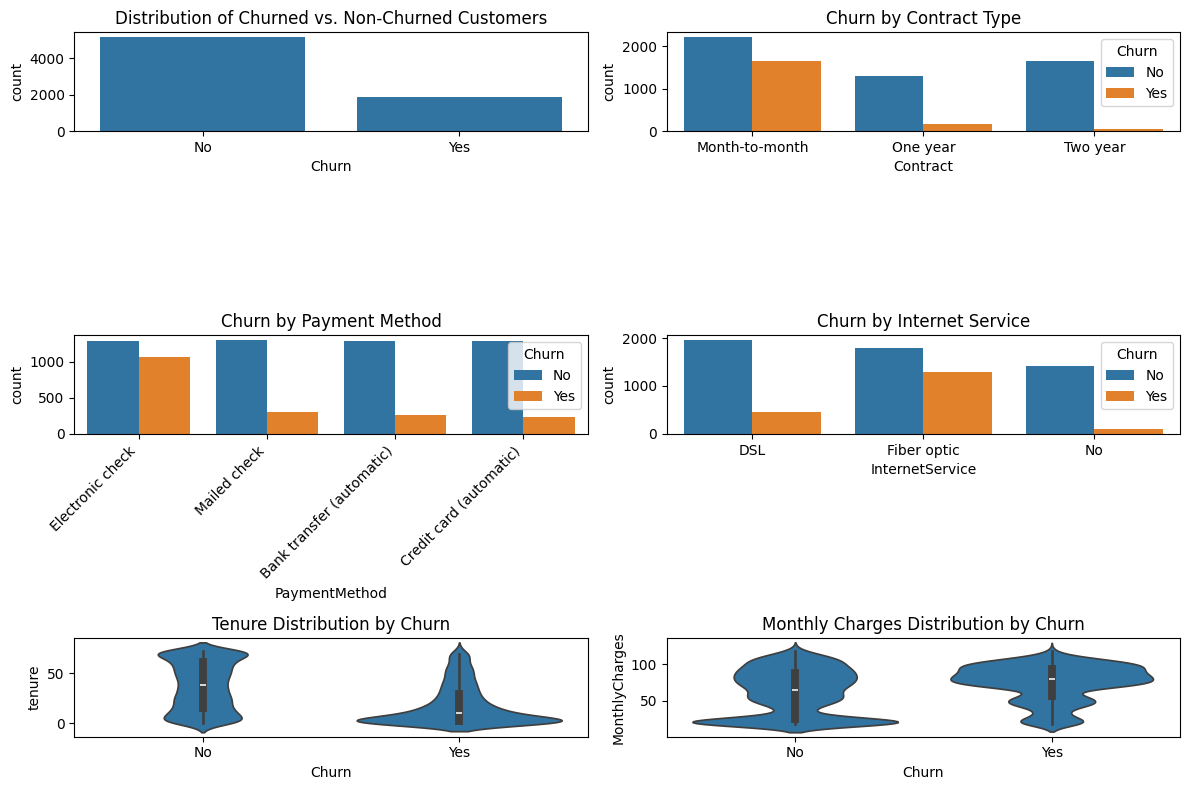

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Churn distribution
plt.subplot(3, 2, 1)
sns.countplot(x='Churn', data=df_telco)
plt.title('Distribution of Churned vs. Non-Churned Customers')

# Churn by contract type
plt.subplot(3, 2, 2)
sns.countplot(x='Contract', hue='Churn', data=df_telco)
plt.title('Churn by Contract Type')

# Churn by payment method
plt.subplot(3, 2, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=df_telco)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.title('Churn by Payment Method')

# Churn by internet service
plt.subplot(3, 2, 4)
sns.countplot(x='InternetService', hue='Churn', data=df_telco)
plt.title('Churn by Internet Service')

# Tenure distribution by churn
plt.subplot(3, 2, 5)
sns.violinplot(x='Churn', y='tenure', data=df_telco)
plt.title('Tenure Distribution by Churn')

# Monthly charges distribution by churn
plt.subplot(3, 2, 6)
sns.violinplot(x='Churn', y='MonthlyCharges', data=df_telco)
plt.title('Monthly Charges Distribution by Churn')

plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

There are no explicit questions in the provided data analysis task. However, the task implicitly asks for an understanding of the Telco customer churn dataset, including its characteristics, key variable distributions, and relationships between features and churn.  The analysis provides answers to these implicit questions through data exploration, analysis, and visualization.

### 2. Data Analysis Key Findings

* **Churn Rate:** The overall churn rate is 26.54%.
* **Contract Type Impact:** Customers with month-to-month contracts have a significantly higher churn rate (42.71%) compared to those with one-year (11.27%) or two-year (2.83%) contracts.
* **Payment Method Influence:** Electronic check payment methods correlate with the highest churn rate (45.29%), while bank transfer and credit card automatic payments show lower churn rates (16.71% and 15.24%, respectively).
* **Total Charges Data Quality:** 11 values in the 'TotalCharges' column were non-numeric and had to be converted to NaN, indicating potential data quality issues.
* **Internet Service and Churn:** Visualizations reveal the churn distribution across different internet service types.

### 3. Insights or Next Steps

* **Focus on Month-to-Month Contracts:**  Develop strategies to retain customers with month-to-month contracts, perhaps by offering incentives for longer-term commitments or more competitive pricing.
* **Investigate Payment Method Correlation:** Further analyze the reasons behind the high churn rate associated with electronic check payments.  Consider offering alternative payment methods or incentives to switch.
